A clear and concise overview of how to load CAO points information from the
CAO website into a pandas data frame pitched at your classmates.


A detailed comparison of CAO points in 2019, 2020, and 2021 using the functionality in pandas.


Appropriate plots and other visualisations to enhance your notebook for viewers

# CAO Project
***
<br> 
This project aims to provide a clear and consise overview of how to load CAO points information from 2019-2021 into usable pandas dataframes. It will also provide a detailed comparison of the points from 2021, 2020, and 2019 using pandas, and use appropriate plots and visualisations to aid in the understanding of the data. 
<br>

### CAO
***
The CAO(Central Admissions Office) was established in 1976 and is responsible for over-seeing the admission of undergraduate applicants to colleges and universities in Ireland. Its aim is to process applications in a fair and efficient manner. While universities delegate the administration of admissions to the CAO, they still retain full control of their admissions. 
<br>
Students applying for admission to 3rd level courses, apply to the CAO rather than to the individual institutions. The CAO then offers places to students who meet the minimum requirements for the course. If a course has more applicants than places available, the CAO makes offers to the highest scoring applicants. If the student does not accept the offer, the CAO makes further offers (round 2, etc), until all the places on the course has been filled, or the offers close. 



#### The points system
***
- Higher Level
    
|Percentage|Grade|Points|
|:------:|:-----:|:------:|
| 90+|H1 |100 |
|80 - 89|H2|88|
|70 - 79|H3|77|
|60 - 69|H4|66|
|50 - 59|H5|56|
|40 - 49|H6|46|
|30 - 39|H7|37|
|>29|H8|0|


- Ordinary Level

|Percentage|Grade|Points|
|:------:|:-----:|:------:|
|90+|O1|56|
|80 - 89|O2|46|
|70 - 79|O3|37|
|60 - 69|O4|28|
|50 - 59|O5|20|
|40 - 49|O6|12|
|30 - 39|O7|0|
|>29|O8|0|



The CAO awards points to students based on their achievements in the Leaving Certificate examination. A student's points are calculated according to these tables, counting their best six subjects only (resulting in a maximum score of 625 points since 2012 with the introduction of the extra 25 points awarded to those who sit the honours mathematics exam and pass)[2]. If a student has sat the Leaving Certificate examination on more than one occasion, their points are calculated according to their best year's performance.

[1]: https://en.wikipedia.org/wiki/Central_Applications_Office
[2]: http://www2.cao.ie/handbook/handbook2022/hb.pdf



## pandas

***
pandas is a library written for use with Python, designed to aid in data manipulation and analysis. It began development in 2008, with creator Wes McKinney realising during his time at a capital management company that there was a need for high-performance, flexible tool to perform quantative analysis on financial data. He discovered python on a colleague's recommendation, and realised that while it was far more suited to data analysis than the likes of Excel or R, it was missing some key features such as CSV compatibility, an intuitive way of dealing with spreadsheet-like datasets with rows and columns, or a simple way to create a new column based on existing columns. 
<br>
Thus pandas was born. 
<br>
In 2009, McKinney released the library as open source, and dropped out of grad school to focus on improving the library and adding new features. By 2012, it became clear that pandas was taking off, helping python become one of the primary data science languages. 


He has spent subsequent years adding features, and improving the code that forms the basis of the library. McKinney's work enables people to analyse and work with data who are not expert computer scientists. He has made the code intuitive and accessible, so that tasks that would have taken 50 complex lines of code in the past, now only takes 5 simple lines, because he has already done the heavy lifting. 


Today, pandas is used by millions of people around the world on a daily basis with many major companies that analyse data, such as Facebook, Google and JP Morgan also using the library.


pandas offers data structures and operations for manipulating numerical tables and time series. It allows data to be imported from various file formats such as comma-separated values, JSON, SQL, and Microsoft Excel. Pandas also allows various data manipulation operations such as merging, reshaping, selecting, as well as data cleaning, and data wrangling features, making it indispensible in data science.



[1]:https://en.wikipedia.org/wiki/Pandas_(software)

[2]: https://qz.com/1126615/the-story-of-the-most-important-tool-in-data-science/

### Importing the requisite modules for analysis
***

In [6]:
import re 

import requests as rq 

import datetime as dt

import pandas as pd

import urllib.request as urlreq

from IPython import display

from base64 import b64decode

## CAO Points 2021

***
This is the link for the cao website, and more specifically the 2021 points for the level 8 courses.
<br>
http://www.cao.ie/index.php?page=points&p=2021

The ```requests``` module allows a user to send HTTP/1.1 requests extremely easily. By using the code below a response object called ```resp``` can be gotten from the CAO website. This will be able to provide all the information needed from this object.[1] 
<br>
The response can then be checked be make sure it's successful using resp. HTTP response status code 200 lets the user know that request has succeeded. [2]

[1]: https://docs.python-requests.org/en/latest/user/quickstart/

[2]: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/200

In [7]:
# Getting the level 8 CAO points. Resp 200 means all okay 
resp = rq.get ("http://www2.cao.ie/points/l8.php")
resp

<Response [200]>

## Saving original dataset 

For transparancy, we want to save the original html dataset each time that the data is run. This is useful for a number of reasons, most importantly to ensure that if the data on the website changes, that the dataset updates too. It is important to ensure that the previous versions are not overwritten, so to avoid this, the file path can be set using ```datetime```. The datetime module supplies classes for manipulating dates and times, and ```now``` returns the current local date and time. ```strftime``` ```%Y%m%d_%H%M%S``` returns now as a string in the following format - *Year, Month, Day_ Hour, Minute, Second* [1].

Once the format for the naming of the dataset is set, the file path can then be created allowing the html file to be saved everytime the notebook is run. Note that at this point there has been nothing saved, this merely sets up the file name and path required. 

[1]: https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior

In [8]:
# Get the current date and time.
now = dt.datetime.now()

# Format as a string.
nowstr = now.strftime('%Y%m%d_%H%M%S')

In [9]:
# Create a file path for the original data.
htmlpath_2021 = 'data/cao2021_' + nowstr + '.html'

### Error on server
***
When the data was run as per the server details it specifies that charset is iso-8858-1\*. This information can be obtained by right-clicking on the webpage in question, selecting *inspect*, then selecting memory and reloading the page. The first item after reloading the page is selected and following that, the header section. Within that there is an option under *response headers* and this contain the contents. It states that the content type is as follows:

    *Content-Type: text/html; charset=iso-8859-1*
    
See picture below:

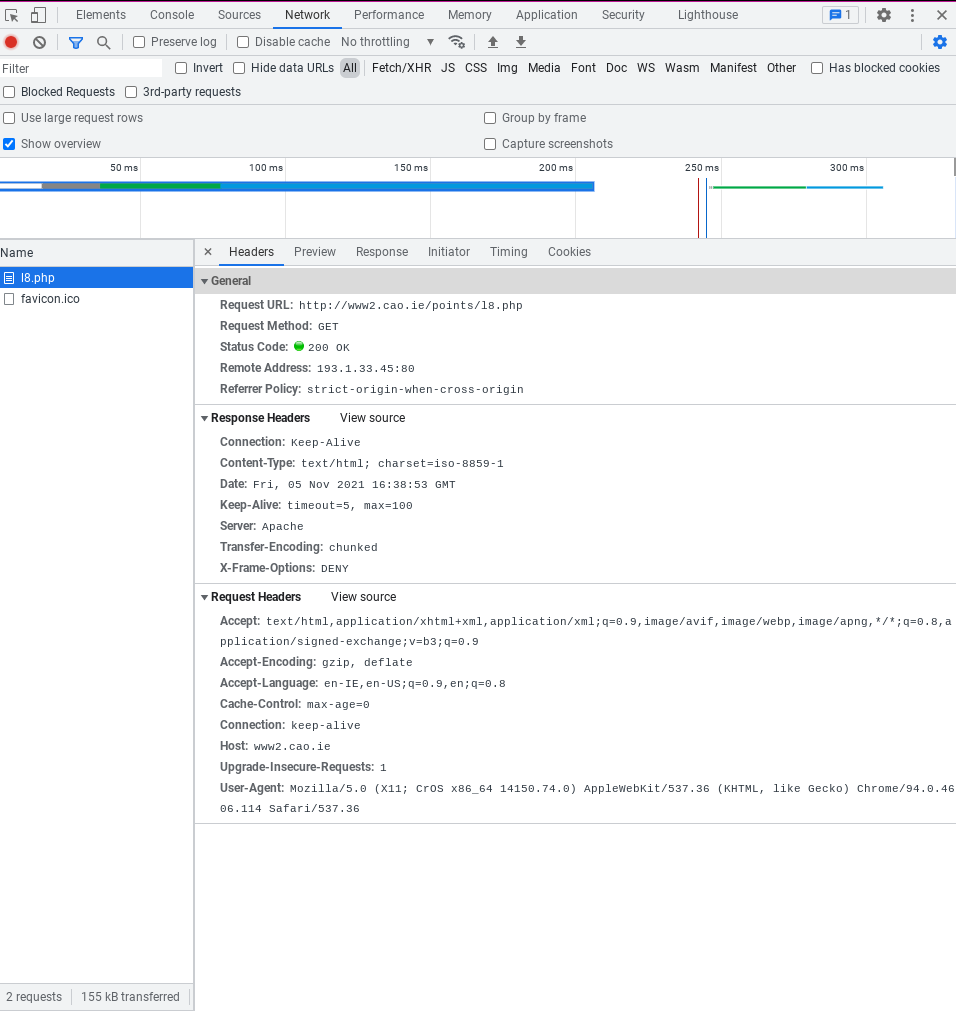

In [10]:
base64_data = "iVBORw0KGgoAAAANSUhEUgAAA7wAAAPzCAYAAACUTQCOAAAAAXNSR0IArs4c6QAAIABJREFUeF7snQVUVVkXx/924oiKHajYiY2OrTO22I3dii0gqAiiomKh2N2J3V2MHWNgi63YnfCtfZj7vsvj3ffuezzSfdaaNeo798TvnHvu+d+9z74JEiRIEAoAoaHif5yYABNgAkyACTABJsAEmAATYAJMgAnECwIJ9mSawUo3Xgwld4IJMAEmwASYABNgAkyACTABJsAE5AQSvPvwkQUvzwkmwASYABNgAkyACTABJsAEmAATiHcEWPDGuyHlDjEBJsAEmAATYAJMgAkwASbABJgAEWDBy/OACTABJsAEmAATYAJMgAkwASbABOIlARa88XJYuVNMgAkwASbABJgAE2ACTIAJMAEmwIKX5wATYAJMgAkwASbABJgAE2ACcZ7Au/cfEBz8Cr9+/YrxviRKlAhWVunxRxqLGG/L796AWCN4V61YgevXr6kaj8xZsqBvv/6q8lKmGzfvoED+vKrzc0YmwASYABNgAkyACTABJsAE4haB23fuI3u2LEiePFmMN/zr12949PgpbPJa62wL65PoG6JYI3hHuo6Ap9c4VT03Ji8LXlVIORMTYAJMgAkwASbABJgAE4jTBGKbiNTXHnO0ddZMXzx7+lSMmbEGwTg90EY2XqfgNcbaWr1GTdSoWdPIaiNmN0bEGpOXBW+kh4YLYAJMgAkwASZgNgLBwS9hZZUh1pZntobFgoLMzTqmuxTf+hPTPONj/YZE5OO3Idh88afBrpezToSy1okM5jOUIaoFL2kieVJrPDTUbn2/79yxHRfOn4ddxUpm0YCRaYvaa3UKXmMEpTF59TXKmHKMyWtuwRsSEoKBg4dH6EqH9m1QuFBBuLiOxoxpk9Xyj5J8k3ymoW6dv1C0SOEoKV9toXR+Yuu2nTh79hx+/vqFfDZ50ayZPSzTplVbhFnyffr0KVaMy507d+G/ZRuePn0GC4vUqFrlT1SvVtUsfYxLhdC8qF2zBvr1d0TTZs00TZ8xfRqSJk2KXr376O1Orx490LFzJ9jZVTR7t+/du4ehgwdho/9ms5etr0DtdSVZsmSwzpUTzZraI3PmTEa15cGDh1i+cg1ev34NZ6chsMpgPmFhVEPiQGaJe7lyZdC+betwLab7dLz3ZNSvVwd//1UrDvTGvE2cNmMWsmXNghbNm0a6YPka/PHjR0yY6AP3Ua5InDixSWXLn3HmKM+kRhh5UUys/9psYsvewBA66b50HzUC6dKl02RXO9Z07870mwsvz9E6q5JzMJTXUFv599hHQJ/A/PAVqDntI+j/atL+gSmRLW3CcFmfP3+OS5f/xaVL/6JxowbInz+f3qLMLXhJbH77+g0FCxdC4LXrOH/+XLj6S5UqrfktWfJkqFe/gZquGpVHEtlpLS0xZOgwo641JvPVK1fw77+X0bpNW52XrVm9CsWKFUeRokUNFsuC1yCi8BmkhdjDfSTSpv0j3I+xRVjFlofa6jXrERwcjDZtWsIidWrs2bsfN2/ewrChg4ykHrnssWFcPn/+DHePcWjdqjmKFS0Ceks9f+Fi1K9XF2VK20aug3HsaknwpkyVCkuXLkP6/wQZC97hkNaVb9++4cDBwzh77jxGubkYNcKr16xDkqRJ0ahBPSRJkgQJEiQw6vrfKbO0nidPnhyeY0aCXjRIyX/zNhw5eky8PPzdBO/r128wecp00MzxGDMSFHglMsnca3BsecapZRJb1v+4wk1J8KrlbUjEsuBVSzJu5tMnMM/c/wWHJV9Ud2xZpxQRrLzjJ0yGrW0JnDp9VuzpCkSj4L1/7x4WLpivuv2UsWu37rDOnduoawxlji4LLwlaEr0kaLVFr77fdLU/RgWvkuu0IR/02GDhVSN4g4IeYM26DXj16jWKFimE1q1aCKEzb8EiFClcCOfOXxRCsF271ti37wBu3LyJrFmzoktnB40VVFcZVN68BYthW7I4Av45hdSpU6Nzxw7ImjULhg4fge/fv4uxbtigHmrXqoGTJ//Brj178e3bdxQvXhRtWrWI9AbG0M1AD3jXkWPgNsIJ6dOHvaGlh5j3pCno0a2L+Ld794Owbv1GvHz5Crlz50KbVi1haZlWWECV+kflKPVHqTztzZYupmRZjMoU9OABZs+ZjwnjPDXVXP73Cr5//yEEr1LbHzx8iEWLlwlrCKUrV69h1+69GDZkoODkN2ce8tnYgKx6bq5OCAy8KayTb968hU3ePGjbphXSpLGAUp9jYm5Igrd0mTJi7o52HyP6pi14KYjdlMk+ePrsKezs7MRbxKb2jfH1a9ir2e49euDhg4fInScPWrRsibdv3qBF82bY5L8ZFmnSYM3q1Xjy5DEGDxmKa1evYtrUKXj8+LFYOIcOHYaMmTKBLLrDhw2Fra0tAgMDMcbDU2Ph/fDhA3r3JGtyZ9Su/VdUTg9xb5DniHxdIdE7zMkV4708kCpVSp1jSGuBfA7kzJlDiGRKOXJkF/NE330mv7Zzpw5GrU2BN26K+/f9+w/igU9eLiQcDd2/xs7RqAQvcS9YID9sbUvCrkI5zVo1cpQHsmXPirx58gjBa471XO1YZMxohdy5rcX6Tcln6gzhEVKmdKmoxKEpe+++/Xj79h2ePX+B6lWroFixIuI3Glt6UWeTNy8uXboMq4xWcOjQFhmtrPT+Jl+DtddjpfmgNL+0n3EV7cqH8+Ax9bkSlWANrf9K67MuNm/fvVX9TBg0sJ+GjTa3e/fux+gc08dbSfBqz52r165jw0Z//PjxA+XKlhH7IVovaZ76zpqDCuXL4mTAKeFRpbRHIk84pbzURlOezfr2KTGx/4jKuR0by1YreJ3rJEPhzOGtt1J/Nl38ic0Xf0CX4JXy0H7WvnHDaBW88vO6UjvouVuocJhH5/Vr1zR7JOl3Q5oqNo6hvE26hK2xYpfKi7TgjQwobb9zeVn6fNDjguClzaqH53jhwluoUEGsWrVWuCaWLFEcEydPFZsEWmg3btqCM2fPoWf3rkL0rVi5BunSWaKJfSMolVHKtqRwtWverAkqlC+HLVu34ePHT6ANKyX520vatIybMAlDBw8Qm+b5CxajTJnS+LOSXWSGzuC1t2/fwdLlK+E5ZpTOvJ8/f4Gn13jRz2LFiuLAgcMIDLyBIYMd8ezZc8X+KfWHmCiVR+JbcjVXYkpui1GZ6IE8wdsHNjZ58FftmkifPr2mOn0sHj56pHdzQ/OgdcvmKFmyBEJDQ8ScoxcoJEC279glxEjbNi11zsVKFe1iZG5IgnfuvPlwGj4MziNcUa5cuXCCl8asfbu26N/fEeXKl8dE7wnIlcsaXbp2hdylef++fTh65Ag8xo7Fvr17MXnSRDi5uKBGjZoY6eqKmrVqgYR1h3Zt0advP1T680+sXbMaZ06fht+cubh//z66du4kRHHVatXw8uVLIXg3bNwEFxdn5M9fQNQZ1Ulb8NJLqyNHj+PY8RNCBBtaC6Q5kDJlCixbvgokfKtVrQw195l07Zs3b1SvTfQywGPsBPTq2Q1Zs2TGgoVLkC+fDer8XVtsNpXWJ9qwGjNHo/q+lLiTO/PJgH8wcEA/MdT//nsV+w4cRI7s2ZAmTRrBMrLruTFjEXjjBg4cOCS8Yege9hg7Xrhnyi3QUTknvcZPFO70z5+/ALni0ktYSfDSJk86wkNrzOPHTwQ3Gnel35QEr9J8aN7MXnF+aT/j5GWrYaz03IxKnvrWf6V7W5pz2ut5zZrVjHomyI9ZyfcG5y9cjNE5po+3GsFLYz16zFi0bd1SuJTu2LkbFy5e1AhetXskfeuVqc9mpX1K2TKldK4jUb3OReXcjo1lqxW8BTMnhEVy3R5QT96Ggs76xjbBe/LECezauUODncQuWXBJ1FKi4FVkAZYMA/RvdevVR8VKlWLjUKluk1zg0kVKVl99BaoWvIsWzIelZTphFs+dJzfSprVU3VCljErC1ZCgNfS7dn2GDrAb0xFdZ3izZcsKp2GDIX/wXrx0WbgkDhnkKIqnt6nrN/qjXZtW8JszX3O2hCx2tGlwHj5E5Av45zSuXLmK7t06Q6mMDu3aYOasOfAa6y6uobecO3ftEdYc7c0AbUzHeI5D29atULRoYXFGMjoStWnr1h1wcR6qs7qz5y7g6LHjGDww7PNSxJUswo79ewOhUOyfUn/0lZfGwkIjeJWYDo8GN2uaHzt37cW58+dhlcEKf/9dS7z00Nd22ijps/DKzymRZS8g4BT69+stmNJGiiy/nz5/1jkXe/fsFiNzQxK8q9asxeVLl7B06RIsXrIUc2b7ac7wHjlyGOvWrMWs2bPD5viVK0IQz52/IJzgpXOq3bp0FlZtr7GeyJgxY9jZVZcRaNbEHouWLMXZM2fgv2kjZvqFlUX1N2/aBFOnT0doKMKd2ZXO8DZs1AhB94Mwyt09WlyCtdcVuk9JbDVt0lhYavWuBVpn1eSC1+B9JruWhIvatenHj5949+4dMmQIe3Fz8NARPHz4CB0d2gnho7Q+GTtHo/q+lLiP9RgF74lTMGBAX2GtJCsm3Zv37gUJb5RMmTJGej03Zizovqf1kJ4rN27eEi8DJdEZ1es3eZX4zZ6HcWPHCLFNLxLHeoxGihQpwsZWNmdojRnu7IYJ4z3x9s1bxd9Cfv3SrMHy56TSfLC2tlacX9rPuPDlmfZciWqmVL7S+q90b9eoXlXnek5n8tQ+E7QtonLBG5NzzBBvNYKXuO0/cEi8zKdEc3PGTD+N4FW7R9K/XinPJ33PZqV9SkzuPwwxj0+/qxW8BTInxB8ywfvuayhuPAsJhyK2CV5qnFz02lWsGOGMLrkbB5w8KfoRVWI3ulya5YMhiV76N10uzobmsGrBu2njBhGRS0p0UDlP7jyREsBxWfAacmk+fOQYNvlvCcffwsICfXp1D7epvH49ENt37taI1VOnz+Dixcvo2aMrlMro16dnuI0FlbF1+06xOdLeDNDfyS2KXNQePHyEEsWLoWWLplFuKbh/PwgLFy8T5+J0pUOHj4LcvDo5tNf8TNYBOneYNm1avf3T1R9yW1Iqj6xd0ltuJaZKwS0M3UCm/P7z508R8ICs+2Rde/X6tWLbU6VOpXpzQ30jgUveA/Kkr88xMTfkgjdz5swYPGggihYtCgpIIgWt2rhhA8h1R54sLS2FsNUOWtWlUyeMch8NtxEjMG/+AnTr2gUTJ02Gxxh3zFuwEBvWr0Pg9UC4jfq/t0H3rl3RvWdPWFlZRRC8PXt0R4kSJZA0SVJ4jR9vyhAbfY2+2ABUmNq1gPLKBa8x95m24NW3NkltIis0WYap/eRl0alj+wiiSL4+mTJHjYZpxAUSd1qnDh46isSJE6FatSoY6+UND3c3rFu/CeReTJbVyK7nxowFdWHFqjXIkjkzyFumfPmywjsoOtLGTZvx5ctXtG8XFsTLZ8oM4epdsWKFCGNLvzu5jBSig9Y17UBB0m/keSCtwXIRpjQf9M0v7WecvDxjGGs/N6ODLdWhvf6/fvNG59wid3Zd67mhYy7yMdAneGNyjhlirUbwHj8RAPKE6NalkyguguCVvZjRt0fSfokjz6tvPul7Nivtu8igoWsdic79hyH28eF3tYLXpU4ykJVXSoHPQjB+97dwCFjw6p4R0RW0Sl57tAleigLmv3FjhJ6TOb1p8+YoVMj4iMDxWfBeuHAJAadOoU+vHuGYGbOpVCpD3wKtvRkgcfHrVwiSJk0i3BsXLVkGOq9Wq2b1KF3XyCXVbZSHOMNLLtqU6CE2ZaovunTuIMQ3PUwG/edCGGbhdUef3j2ROFEiRcGr1B+yNCmVl84yrWazpcQ0SmEAuHbtOt69fw+7CuU1VW3bvhPv3r0XlneltidMkABz5y8Ubq2UtM/wyjc39Pb42PGT6N+3l4Y3ubqTS6KuuRhTc0Nb8D58+AC9e/ZEwYKFYJPPRkRpPnzoEHbu3CGEq3bSFrwzfWfgy5cv+PTxE9w9POA8fDiy58guIsBSWWQt3rB+PXxnzhJFUf1k/Z002QeJkySJIHgHDXCE/+YtGD58GGrWrIU6detG9fTQeYZXXqnatYCukQtemhNq7zNj1iY6hzZ/4RKQlwAd1aB5Ry+5DAleY+doVIOXv2ggF7BZs+eiapXKePHihTj/TizJuktW38iu58aMBfWbLLv+/lvxnrx0RrshSRLTIhobw5B40NnlDx8/hrssT57cGOjYN4LgJWYkanVZeOW/KVl4leYDvURRml/azzhtzyq18z06Ba++9Z/ieeiaW0psyHqo9plgSPDGxBxTMx/VCF6KgbFv/0GNF11UCF5996y+Z7PSszV9unQ6x1oNE86jnoBawaumxNgmeE1xaaYozWQJNmeKbgtvtLo0v337Bj6TJoXjRSKXxC6JXlNSfBa8JPg8vbxBZ5HINe564A1xNpUi9MrdBvVZUZTKICutXOhoP7hn+PqhRIniqPxnReHu7L95K8gqTBFbKXKyPBiKKeOm9hoKaENBumjjmDxFchGYiwKRkJuidG7J3r6hYEIukRTinT6jQpyU+vfvlas6+1OlciVxNkZXefIzvEpM6exhVKa7d+9h7vxF6OTQDjY2Nnj//p2wgNOZnop2FRTbTptGt1FjMKB/X/zxRxqsWbtBbICloFVyTiT6xtAZ3ratxBnevfsOiiBNdN5O11wkV/yYmBvagpe4L160CMuXLUXLVq2ESP3w/j0cOrRHf8cBqGBnhzNnTuNBUBA6OHTEwAGOqFKlKhrb24vga+S6M9LNFYOGDEH9+g2w2X8TZvv5geIA0Nlg6Txw7z59UKliJaxbtxZHjxzFwsWLxRle+WeI5J8levToERz798OcufOEq3RUJkMWXrVrgbbgNeY+M0bwkmcABeRz7NcLISGhwhpJRwfI7VbfCzlj52hU35fa3Ck4FLW/T+8eyJPbWiN4aS2N7HpuzFjQOIaGhmKUuyfy5wsLCBYdiYTZqjXrxAu2hAnDLB90HtHdwwsjXZ1FQETyxHFo3xaFChfEjh278OjR43BneHX9pnSGV2k+0EsHpflFbZI/46gM7RgNxj5XopqtvvW/fLmyOucWBSnTtZ6TB4/aZ4K24JVzo/GNiTmmhrUawUvPxtHuY8VXIPLns8G27btw8dKl/7s067HwyjnQOXWl/Ya+e1bfs1lpn1KpYgWdYx3V65wa5vEpjzkFr3+vlOGswHJOsSloVe7ceUTT7t27y0GrFCazapdmut5n8iQRCVVK9K2nJrLvaBp7w8Rlwavd15YtmomoyfIAEXRulyIIPnv+HFkyZ0Gb1i3EZWoFb9jkjVgGPaj0CV4KgkWueLSI1qxRDXv3HRBWHnKlKly4oDhHHB1neSkCMUXMJetUgoQJYEPf4W1iLyIxUyLXrHXrNuHZ82fImSOHeHDRN0MNWbCV+qNUnvZDXxdTEn9RnS5fviKiZdMDNlWqVELsNqhfV2wsldpObSK3v9179gq3ykIFC+Dho8c6BS/lJffHDZs2ixcNtAlo366NCFam1OeYmBu6BC9tpCl4FAWVkr7DK87tzpiOoPsUTTQ3hgwbLl4W7Nu3F9OmTIFDx45o1boNPn/6hMaNGoLOBJOL8tOnT9GxQ3ts3b5D8zLuxo0bmDbFB/eDglCgQAEMG+6EbNmyiSjNSoJXEuLXrl7BJJ8pUTo9DAletWuBtuA15j4zRvDSRnnt+o04d+6C8OCgiOA0L+lMvqH719g5GpXgtbnT0YiDhw4LzxSJJVl4KUqzOdZztWue1Oc5cxegcuVKIqp/dKSly1aK8aQI//JEZ5pzZM8ujsRM952FIoULgzb1VlYZ0LFDO+H2TeOu9Ju+KM265gO5QCvNL2qX/BlHkXjlz121jKPTwktt1rf+K63PSveK2meC9rNPe29A7YruOaZmHuuKlULXkZcBfR96xrQwzx96QbNugz9+fP+OIkUKCa8I8oYwtAbJORQuVFDvfsqUZzO1TenZGlP7DzXc40setYLXoUISxaBVxILcnWsVVPasiQnBG1s+SxRdcyXGPkskneMlyy598JhcnCMjeuOi4I2uQeZ6mAATYAJM4PckQC8UxFnNRcswaqRLlH9GTi1lfd83NfTtU7V1cL7oIRBb55gxvacjPrly5hAv8OmIEHnCOHRoZ0wRnDceEjAkePus/oIRdZOhSckk0dJ7fe0xJaguuROThwF9iog+QySPr0Qdsi1VSvMbeeCSS7O5U3S5NJPh499/L0f4Bq/UHxLExYoVF0GsDCWdFl7t7+NKnwiic7y7duwQlhaCKJ3rNVX0suA1NDz8OxNgAkyACfxuBMg6RFY8+qQYHYmJLYkFb2wZici3I7bOMbU9I8FOIvfCxcsi4GH+/DZo3aoFLFKnVlsE54unBPSJSPrU0IevYdbb6ErmFrza7db+xKu+z7qaq88xEbQqsm3XKXiVCqVzvOQuKA9QRaKXTOxNmzU3ui1x8Tu8RneSL2ACTIAJMAEmwASYABNgAkwgygmYYjWNykZFteClz8bS8SxKdPyrS7fuUdkdUXZ0WXjN2RGjBK85K6ay6LMj9JFkYxN9YLlvv7Dvt6pJsW3yq2kz52ECTIAJMAEmwASYABNgAkxAPYHbd+4je7YsSJ48mfqLoijn16/f8OjxU9jktdZZA+uTKAKvo9gYFbzR102uiQkwASbABJgAE2ACTIAJMIH4TODd+w8IDn4lPkEY04m+JGFllR5/pLGI6ab89vWz4P3tpwADYAJMgAkwASbABJgAE2ACTIAJxE8CLHjj57hyr5gAE2ACTIAJMAEmwASYABNgAr89ARa8v/0UYABMgAkwASbABJgAE2ACTIAJMIH4SYAFb/wcV+4VE4g2AoXcP0ZbXXGlouvu/GmMuDJW3E4mwASYABNgAkwgfhNIcPrcpdD43UXuHRNgAlFJwH5VpqgsPk6Wvbnt8zjZbm40E2ACTIAJMAEmwATiGwG28Ma3EeX+MAEmwASYABNgAkyACTABJsAEmIAgwIKXJwITYAJMgAkwASbABJgAE2ACTIAJxEsCLHjj5bByp5gAE2ACTIAJMAEmwASYABNgAkyABS/PASbABJgAE2ACTIAJMAEmwASYABOIlwQMC96QXwj98QP49SsMQKJESJAkCZAwUbwEwp1iAkyACTABJsAEmAATYAJMgAkwgfhBQFHwksgN/fwJoV8+I/THT+DXz/8Eb2IkSJIYCVKkRIKUqcLEbyxPN27eQYH8eWN5K6O2ecwgavlGtnQen8gS5OuZQOwlwPd37B0bbhkTYAJMgAlEDYHY9OzTKXhJ6Ia8f4fQT58Q8uUz8O17OMGLZEmRkARvqlRImOYPIXxjc4pNwGOKEzOIKfLq6uXxUceJczGBqCRw+d8rePz4CW7dviOqSZkiBbJlywobGxvks8ljctV8f5uMji9kAkyACTCBOErAHM8++zmfceNZiCBQMHNC+PdKaRKNCIJXiN23bxDy7i1CP3zA93On8e3iOfy8d1tUkDi3DZKVLI2kpcshgYUFEv6RFgnTWppN9D57+hQBJ0/iydMnoD9nzpIFWbNkhV3FiuLPpiRzADelXmOvof4ePHAAT589xds3b2CdOzdsS5VCqVKljS0qQn5jGLwMDsbuXTsRFBSkt95cuXKhTt16yGBlFen2/e4FxNbxCQ5+CSurDL/78Pz2/Y/P8+DLl684fOSo+I/+rJTSpU+Hun//hfLlyhg9H4y5v/UVfvLECSRIkEA8D6M6jXQdEa4KT69xUV0ll88EmAATYALxiIA5nn2F3D+GI3LdPbVJhMIJXnJjDnkVjJA3r/Hjzi18Xr0MPx/c11lw4pzWSNnGAUny5kNCy3RImN4q0u7Nhw4eEIJPKdWoWRPVa9Q0uqPGAteGq7ZCUweByj9//hz8N25EWktLZMmcBclTJMfTp0+F6CfB26RZM7XN0JnPGAYrli2Fra0t7Ozs9NYZEBCACxcuoL1DR535QkJCMHDwcM1vyZIlg3WunGjW1B6ZM2eKVH+i6+JPnz7BxXU0ZkybHKVVxvT4JEqUCJkyZcRftWuilG1J0dePHz9iwkQfuI9yReLEiY3u/9OnzzDTby68PEdHuDa6uOpqtL52Gd1JHRdI857medUqf2pyrN/gjyRJEsO+cUOjqpnkMw116/yFokUKw5xtl5dLDZL/XT4+kZ0HRnU2mjOTNXfFqjXCqkuJxGyxYkX/s+xmw+PHj/Hq9Wvcvn0Hp06fFXnI4uvYrw9SpEiuurXG3N9KhV6/fg2rVqwQP3dw6Ij8BQqort+UjCx4TaHG1zABJsAEmIBEwJRn3/jd3/DhK1CzUCIcuP4L/hd/hAPapGQSzW8WyQGXOslUAQ8neMmqG/IyGCGvXuL99ImKYlcqmURvmgHDkTB9BiTMYCWsvaYmErokeCnVrVcfpUqXRvLkyYXgu3btmuY3ErwkfI1JxgInwVvOOhHKWqsLzLU/8Kcwt5sqeKmPs2b6CjGv3bf79+5h4YL5gknFSpWM6Xa4vMYw8PL0gLe3t6q6nJyc4DpylM680sbfw30k0qb9A9++fcOBg4dx9tx5jHJzUVV+TGeKLmEW0+OTKlUq3LlzFytXr0XjRg1QprRtpNH/7oKX1i9Xl+H44480gmVcFbyRngixuIBN/ltw+MgxFC9aFE2bNkK6dOkUW/v69WvMW7gETx4/Qbu2rVC+XFnVPTPm/tZVaHBwMGb5zsCv/4JH0guqfo4DkCFD1HlfsOBVPbyckQkwASbABHQQMPbZd+b+Lzgs+WIUy2WdUqjSa/8XvCG/8OvFc/x6GYzvxw7j46olqipM3bYTklauhkQZrJAoYyaTojdLgk+qkFyXu3brLgSvlCThR3/v26+/Ue7NxgInf/Enb0OwrFNK4S+uLwU+C4HDks/ImjYhNpvoV05v7cmNecjQYTqr2rRxA65fu6YoLNUMlDEMokrwUjtJ9A5zcsV4Lw+8f/8efnPmIZ+JJ8SJAAAgAElEQVSNDR48eAg3VycEBT3AmnUb8OrVaxQtUgitW7VA0qRJcfLkP9i1Zy++ffuO4sWLok2rFqBNn678dK283Ow5siFXzpyoXq2KQLV4yXLkzZMbVar8qVifxFRb8N67H4R16zfi5ctXyJ07F9q0aglLy7AXPVevXceGjf748eMHypUtg4B/Tol+qkmxZXwuX76CLdu2Y6SrM7T7rjQGgTduCibv339Agfz50KF9G3HvkuCdMXM2bEsWx7nzF5EhQ3o4tG+DTJkyRShbadzl7AIDb2Kj/2a8efMWNnnzoG2bVkiTxgJK9dO1uq6hfvnOmoMK5cviZMApWFikRueOHZA1a9iRCTVt0Tem0oueggXyI0WKFOjcqYPIri149c0lqfyhw0fg+/fv4q8NG9QTVl6lthNv7ftJqQ7tcvfs3R+unop25TWeDfJ5QHXMW7BYjCnN79Spw7OLzD1g6D5ZtnQJbt28GSFbXhsbdOrcxdDlir+fOn1GI17pz2TJJYuulIoXK4pqVSvDxiYs8CH9Jv1ZbaXG3N/aZdJ8mjFtKl69ehXuJysrKyF6EybU/4xS20btfCx4TSXH1zEBJsAEmAARMPbZJz+vKxFMnQyoVSgsQPL+6z/w8Vt4tmrP9WoEb+i3r/j14gVCXjzHh3m++HHtX1WjlaRwMVj06I+EGTMhUcaMSJBMvZuXVAEJugvnzwsr5oUL5zVnd7VFr5SPzrU2bdZcVftMAU6mdIL+4WuIOBydLa3uDYUkdkNDgYODUoNM66Ykn8mTYJk2Lbp0667zcjq3tWvnDgwZNgxp01qaUoVRky6qBC9t3I8cPY5jx0+ArL60eR7vPRmtWzZHyZIlkChRQnh4jkezZvYoVKggVq1aK1yfK1W0w7gJkzB08ACkSpUS8xcsRpkypVG2TCmd+cklV17uzVu3cOz4SfTv2wu0eSQXZRenocIlUVd99evV0TCWb/Y/f/4CT6/xaGLfSLg9HjhwGIGBNzBksKM4+zd6zFi0bd0S+fPnw46du3Hh4sU4J3hpjEgMjRvrLs4KSu7cb9++0zkGJYoXhcfYCejVsxuyZsmMBQuXIF8+G9T5u7ZmfB06tEOxooWxd98B3Lx1G0MGOYYTvPQSRM04UJ527VoLUb19xy4hsJs3s1esn8ZO1zXUNpofzZs1QYXy5bBl6zZ8/PhJCFM1bTF0A0qCd9jQQZg9Zz46tGst5rNc8OqbS8RdnrRdmpXarn0/URlK85XqUOvSrC14leqnPkXmHjDElV6QTfKeECFbZNZFqTC6f+cvXKwRupbpLJEhnSVu3b6rqY8sumTZNSUZ+9CX17F0yWLcvnVLZ7UFChREewcHU5qk8xrpGauvQGOfv2ZrHBfEBJgAE2ACcYqAsc++pf/8wITd/1e0JHaXd/6/8ZF0V4fFn8OJXuc6ydCxguEvBv1f8H7+JCy8JHjfuA1B6Bd1JuUEKVLAcqzPf4I3k0nBq8idl6y8kmssufBKAavkoley8pIFmKy8apOxwKlcCWqaFAlRv2hiJNM6wvjtJ7Djyk+8/xISbjDUtkmejwQvndtt2769zsul873GWrblhRnDwNyCV2oHWWpzZM+Gpk0aI0eO7BHOI168dFm4PJMgonTv3n2s3+iP3j27YYznOLRt3QpFixYWFl9KSvk7tGsT7uwoWVzdRo6Bu7sbHj16jG3bd2LwwP6K1w8fOkiDTr7ZP3vuAo4eOy6upUTCxnXkGDj2743nz19g/4FDQpRTCrNu+sU5wUttHzLMBU7DByNVypQawfvhwwedY/Djx0+8e/dOWG8pHTx0BA8fPkJHh3YRxpfGgaz7Xp7uAEI1ZSuNo3wcyA0+IOAU+vfrLeohYUpeAdbW1or1K11DVsmZs+bAayy1I8wyv3PXHgwbMlDVnDB0j0uC133UCNy+cxe7du/DCOdh2Lxlm+YMr765lCVz5nBVRDjDq9B2bRdyQ3WYKnj1sYvMPWCIK/1++NBBHNi/X5O1XPnyaNiosZpLDeZZuWoNHj5+guZNGoez4FLk5p2796J61cpGuTGbuv7Kr9uxfRv+CQjQ23YKYFWvfgOD/VObYdGC+bh3757O7Llz51Z8Mau2fM7HBJgAE2ACvwcBY7SHREQueh0qJIlwRpfO+C77J+xcr1qxS3ljheCVXKekKJBfv34V51a1Re/bt2/gM2mS6KQxESNNAU51kOhtMuczrCwSoFXp/789ILG7+dIPBH8IhVrfcX1TmzYYX75+VRTxO3dsF5Grjemzdn3GMDC34JXO8Gq3SXuDTmfp6EydPFlYWIigR+Saunfffjx4+AglihdDyxZNEfDPaZ35+/XpGSFY0qLFy1CyZHFxfRoLC9SoXlWc3VOqT2qDXPAeOnwUQQ8eoJPD/19MeE+agkYN6uHV6zcIvHED3bp0EpfGVcEruZxrW3jF/aBjDCgQGXEky/2bN2/ESwCysHfq2F5ngKURbu4Y0L+3cIWVrMdqxoHykMB16NA2wq2kVL/SNdrz7vr1QGzdvhNOwwarmhOGHlNywUtnQskFObe1Nb58+aIRvPrmElmD5Ulf0Cp527X7ZagOkwWvLBCZvP7jJwIidQ8Y4ir9PnHCeNALGHIXH+E2Uu1lRuWjIFav3rxG9qxZw53rJXdmctOnIGL0n9pkzPqrVGZ0uRjLn7/ytug6aqS2/5yPCTABJsAEfj8Cpjz7ol7wxqBLs2Thlbum6RK9JIBJCEeHhVealhQdbMTmb6icLxFKZAsLYnXp8S8cu/UL4+yTgaKFRTZJ0TcpErP2J4ikPpMbWWTe4hsz6WJK8F64cAkBp06hT68e4ZBSoJZfv0KQNGkSkNvkoiXLQOcj06dLpzO/rmBJ5y9cxJUr1/Do8WP06tFVbGKV6pNXLhe8ZIkkETFoQD+RJczC644+vXsKsbdv/0GNdTquCl5iQu7CI93Cn+FVGoN8Nnkxf+ESYYUn93NyHb9/P0in4P3+/QeGO0e08KoZB2IvuaVL7MkNmbgr1a90DY2pPHq0XLSpaYuh+11b8L54ESzch3Plyons2bKKKM365hJ5QZhD8Bqqw9yClyyhkbkHDHGVfr944QI2blgv1sOo+DwPiV16kSUlstS/fv0GK1avFf/0+tVrcRyC1hA636tG+Bqz/sa04KX6pecOPYcp0Zl88rYy9dOAaseW8zEBJsAEmED8IWDss0/bpZmOisrjKUlHSenoqZQoSjNZgg2lWBG0Sjo3pB2lWFv0Wqa1BIlDY88QGQtcGxpFbaaIzeX/i9p86v4vUCQxU6My6xoUyYpLgjftf0GQqP/nz50D/Z/OLFO/TU3GMIgpwfv582d4enmLc5kUnOd64A08e/ZcfAbEf/NWkOU2SZIkWL1mPXLntkalihV05icLsPbncOhsKp0vpE0qua5SUqqPznhKSS54pfOd9vYNUaxoEeG+e+nSv3B2GiJcbEe7j0WbNi2RP58Ntm3fhYuXLsUZl+aUKVOI87XE1r5xA5QtUzrcOdt/r1zVOQY5smcXQcYc+9H56FDxiReyoHfp7CA7w9tWCIPde/aJSNCDBvYPV7aacSDr6Bg6w9u2lTjDu3ffQfHJmKpVKivWr3RNo4b1FQWvmrYYuge1BS/lJ5dp6j95FpDg1TeXtM/wzvD1Q4kSxVH5z4rCdV5JrGu/6DFUh7xcCnwk/zuxkyzw2md4leqndSoy94AhrvLf6cUnCbCoShS8auWqtZpozFI056zZsgqXZym4Ff3dedhgg80wZv2NDYKX2iAPFEms6bvwnJgAE2ACTIAJqCVg7LNPV9AqEr3lrcPOlZ66/1N8skieCmRWFzQ4VnyWSB6lWfvBqsu9ytizrMYCjwnBS3WSmN+5YwfevnmjaQK9BCABTN/ojcz3eI1hEFOClzpN53Yp0vGz58/FueY2rVsIwUsBj8i6+vPnTxQuXBDt2rQSZ3l15afNu67vvy5YtEREa65dq4aGr1J9ugQv/duDhw+xbt0mPHv+DDlz5BAC1+q/T4Ncu3Yd6zb448f37yhSpBBu3LyFMaPdVK0LMTk+1ECKeE0W2to1a6BUqbDv8GpHadY1BvQCYu36jTh37gLSpbMU0ZMfPnoszjmTAJs7fxHICnz58r/inG9Hh/bImNEqQtmGxoHaQ+6kGzZtRnDwS/FSoX27NiChrlS/0jUU/EhJtOmbg6oG8j/LP31/miyD0mdu6KzzBO/JKFasiOY7vPrmkryuM2fPYd36TSIQWOFCBVULXkPzVV5uzRrVIP87RbA2VvBSfZG5B9TypXwkxqJagNFniKTxo6BWTi5uGldmybW5W9dO4mWOoWTM/a1UVnS5NMvrp/gRlLQ9jwz1l39nAkyACTABJmDssy96PktEYWR+/EDIq2CEvHmNH3du4fPqZYrf4qVv8KZs44AkefMhoWU6JExvhQRJDJuUlYZf/h1eeriWLFUKWbJkwdOnTxFw4oQQg5Si4zu82m2MDguvvE4S+V+/fgkXkVmygpsqeo2ZdCuWLYWtrS3s7Oz03q0BAQG4cOEC2jt05LsawJWr15ArZw4hxCkwFlkLKUKxmsTjo4YS54ntBCJzD8TmvlFAK/pcEbkyV6taBeS+Ta7PFM15zChXg0035v42WBhnYAJMgAkwASYQBwiY8uyjoFTvvwI1CybCgcBf2HwxLECVlOxLJtH8liY5IgS1UsISzsJLmUI/f0LI2zcIefcWoR8+4Pu50/h28Rx+3rstykic2wbJSpZG0tLlkMDCAgn/SIuEaS1Nis6s3Si56NXVYFPELpVjCnB5/SR4yaReMHPYGd7AZ7+ESd2cLs1q5m1kRK8xDF4GB2P3rp0ICgrS26xcuXKhTt16yGBlpab58TpPaGioELkXLl7Gx48fkT+/jfiGsEXq1Kr6zeOjChNnisUEInsPxOKugay9u3bvxZfPX3H5yhWQK3N+m7wimnNUWni1rbpKjCIT0FBeZnTXF5vHnNvGBJgAE2ACkSNgzN5WqSbSYPJkqvaKIHg1ovf9O4R++oSQL5+Bb9+BXz/D6kuUGEiWFAlTpESCVKmQMM0fZhG7UmfIvfnkyRPCsitFaSZLb8WKlUwOmBFZ4GRiXxrwQ/iOUyJf8o52ScS53uhOSuedDbUjsgwMlc+/R44Aj0/k+PHVTCA6CJBVd5P/ZpQrV9aoTxTx/R0do8N1MAEmwASYQGwiYI5nX8clX3D6/i/RrXLWibC0UwqTuqhT8ArR++OHsPaGfvmM0B8/wwneBEkSIwEJ3pSpIuXGbFKLTbjIHMBNqDbKLiFLeMVKlUTkTLUpvjFQ2++4ko/HJ66MFLeTCRhPgO9v45nxFUyACTABJhC3CcSmZ5+i4NUgDvklxC9+halrJEoUJnITRr91M24PO7eeCTABJsAEmAATYAJMgAkwASbABKKTgGHBG52t4bqYABNgAkyACTABJsAEmAATYAJMgAmYiQALXjOB5GKYABNgAkyACTABJsAEmAATYAJMIHYRYMEbu8aDW8MEmAATYAJMgAkwASbABJgAE2ACZiLAgtdMILkYJsAEmAATYAJMgAkwASbABJgAE4hdBBKcPncpNHY1iVvDBJgAE2ACTIAJMAEmwASYABNgAkwg8gTYwht5hlwCE2ACTIAJMAEmwASYABNgAkyACcRCAix4Y+GgcJOYABNgAkyACTABJsAEmAATYAJMIPIEWPBGniGXwASYABOIQOD1m7f48OEjvn37jtBQ/SdHEiRIgGTJksLCIjXSWaZlmkyACTABJsAEmAATYAJmIpAg1NBOzEwVcTFMQB+B9x8/MSAmEC8I/PjxA0+ePsfXr99M6k/y5MmQNUsmJEmSxKTr+SImwASYABNgAkyACTCB/xNgwcuzIVYQYMEbK4aBG2EGAkEPHpksdqXqSfTmypk9Qmtu3LyDAvnzmqGVXAQTYAJMgAkwASbABH4PAix4f49xjvW9ZMEb64eIG6iCALkxBwe/UpHTcBYrq/QR3JtZ8BrmxjmYABNgAkyACTABJiAnwIKX50OsIGCK4H0ZHIzdu3YiKChIbx9y5cqFOnXrIYOVVazoq7GNiO5+Pnr8BNmzZTW2mZwfgDmsuxJIXVZeFrw8zX4nAg8ePEDOnDl/py5zX38TAjy3jRvo6N4HGdc6zm0MgZjaY6oWvM+fv0CmTBmN6RPnZQKqCZgieFcsWwpbW1vY2dnprScgIAAXLlxAe4eOivkaNm+HyePGoEB+G9VtNiVjj76D0cmhDSqWL6v6cnP189evX6hRtwk2rFoEqwwZNPVPmzkXSZMmQZ8eXfD23Tt07umIdcsXRDhDeu9+EAY5jcTmtctUt12e0ZjrTeFE5fcd5ISd/ms01T5+8hRtO/XEkb1bIfVf+tHSMi3sypWBY58eov/EZu3yBcgciXXu5q27OgNUjXJzQy7rXOjarbumbR8+vEfXzp2xbsNGyP8sZaBAVvnz5QnH2pDgpT6Wsi0dYXz8Zs9CpUqVFMetTeu26N27F6pUraKY5/bt2+jRvScOHjqgd/xnzfKDlVUGZMmcBSNGuGLrti2wtLQU18ybNx979+zF2nVhY0Rt3btvDzJlyqQpc/y48UiaLBmGDBksxkzen/Tp06NylcpwchqOlClTmjQPV6xYiX/++QczZ/qK68+dOwcfnym4fes20qVPh3Zt26KDQwejyqZz29Onz8CO7TtAfy5btgycnJ2QOXNmg3WYo/6qVarBb7YfihQpbFS7I5tZGp9GjRrCc6xnuOJovjRr2hx9+/VFjx7/n/f66pTPsTdv3qB5sxbYtXsnkiZNGtmmRphLUoGG7g1DFau5d7TLkM/rxIkTI0+ePOjWrSv+rvO3oeoi/TvN0w8fPsDNzVWU9e+//6JL5644fuIYkiVLJv6tcSN7ODs7wa6iXaTvD2Pri3QHzVCAuee1dpO05/bVK1fh5uaGx4+fYMPGDciZM4dRvTBlDlIFP3/+hO8MX2zbth1fv35FBbsKGDHCBRn+2x/Iy1W7/hvVcCMyR+c+yIhm6cyqb6/z7t17NGrRXuxJTEnG7KN0lR/Z69W2WakefXtMtWWbmk8jeH+FhKBrj74RyhkysB+sc+WCm7snfLy98OXrV/QfOAxLFswWed09x8O+cQOULF7M1DbwdUwApgheL08PeHt7q6Ln5OQE15GjFPPGZsFrrn6qEbz6YEZ2oTTm+qgUvJLgf/nyFcZNnoa81tbo1b2TWQQvCVLtFBwcDBen4SABO2fefCRKlEhkMSR4KY/2eV21gldbRBq6SdRsmNRueOwbN8GSpYuRNm1aOPYfIESku/toPHv2DPQbCYxSpUppBIgawSvlefHiBUa6jUS+fPkwdNhQQ93S+btc8L579w5169bD6FGjUK16NeEtMnDAIPTr3w/16tVVXf4Ydw9xrfsYd6RPlw7z5s3DqVOnsWbtauiro1KlimapP6YFb6rUqbB//75wLyEmT/bByhUr0btPb5MEr2r4KjNKIsbYe8NQ8WruHe0y5G2h++T8ufMYNWo0Bg0eZNS8M9Q2Xb8fPXIUM2fNwrp1a8XP8+cvgN8sP8yZOxvly5cXYpjm07FjR/Hz189Iz09j6qN5FBuSND7mmteG+uTuPgbJkyfHgAGO4v/0rDAmmTIHqXx6uXjz5i2M8RgjvhAwf94CnD17BmvWrkHChAkRmwRvbNkHqRkXFryAMfs9NUzNkSeC4J0yaRzS/fc2XlcFHz5+ZMFrDvJcRjgCsUXwkqVvxGgvVK1cETt270PaP/6Au+tw5M1jDY9xk1CwYH60bNpYtH30WG+UKFoETe0b4FrgTfhMm4Wnz57DrkJZDBvYV/x5qMto2JYojsCbtxD88pV4i0qpRxcHtGvdXNUsiM6FXvvt46kz50AWYHrR9addeRwPOKWx8OrqMz2s5Unf9WfPX4TPDD+8fv0WpW2Lw9VpMFKlTIm/G7WMwEkpr7wutRZeuYV7194D2LVnP6ZOHKsoeLft3IMly1fjy5evqFypAoYO6ockiRPrHDtdgnfTxo149eoVHj96hPoNG6Bs2XLi2pgQvGTN8fTwxKPHj1G1ShWMGj0K1avVwJcvX0SbaMPVpWsXBJwMgLf3RCFSS5cujTEe7nj79i26de0Oe/vG2LTJH+nSpcPESd7Inz+/hsXly5fFBtrXd4b4tydPnqCJfVMsWDgfy5YtF14D48Z5id+UBIguC69cpGzZshVbNm/BosULVd0/2pnkgvfKlSvo3asPjh0/qsl28OAhMf/UCl4StDWq1xSW7GzZsmn61rJFK8zwnQ6y5ijVQZacyNZPFUqCN3GiRBgwYAD+rFwZu3ftFmNElteFCxYKqzaN1WSfSRrL87GjxzB+/AR8+/YNZKWlcT1y9LBqrtIY2tlVwN9//40mTZto+l+rZm0UKFhAvNwgC6+uuZciRQocP34c48dNEHOwevVqOHTosPAioPlG/bp0+aIoMyDgH3iN9cLLly+FMKN5ZIxAMiR4L126DC8vLzx88BAlSpbA6NGjkSVLZtCLngGOA1G7di34+28W3grSvK9Q3i7CvaMGnq62HDxwEFOnTsO27WGWH6X2CBY67k/JKmeofpqvdM+fOHkcxL9rl65IkyYNcufJA0fH/qLsqVOnYt36dTDX/aG2PkPjvGHDRsyZPQefv3xGzRo1xPp1985do+a8IT7ytUnNvFaal/rmjXxuj3AZgR07dopmFS5cGKvXrFK8V3T1v/KfVUyagx8/fkS1qtXhv3kTcuQIsyiHhISgYYNGcHUbgcGDhoQrl7x/9K3/uu7vx48fo1fP3ihXriyuXLkq1khTU3Tug6iN+vYchvYEtBcZMMwV1SpXwoHDR5EtSxa4Og1Crpw5oL3HunotEFN85+DxkycoWrgQhg3qh0wZw47fnTl3ATP85uNF8EuUKFYEzkMc8e79e42nHemxHv0Go3OHtvirZjWd+1Dak+nbh8nHQ1d96dJZQl8blX6TC155O8uXKRXOwq20jzTE2JR5pErwykWu/M89+w4UD0pKLZrZo37dv3Hn7j0sWb5KPJRKFC+Gzg7txEZ/8tQZKFSwAO7dC8IEL3dT2srXxGMCsUnwdurRHwP69kS9OrUwe95i4eY7xs0JR46dhP/WHZg2yUts1sktZck8X6RKlQptO/aAY98eKF+mNCb4TId1zpyoUe1PUFlDB/ZFtSqVYJE6NUyxXEbnQi9fjD9+/ISWHbrCabAjbEsUw8KlK3Hk+EkheD9/+aKzz107tdPMUn3Xv3nzFm069cBEr9HIY20N1zHjUKpEMXRs31pcL+dkKK9UobGClx4iXhOnIr9NXvTq1lGn4A1++RIdu/XDnJk++MPCAq7uXqhdsxoaN9Bt/dMleAcNcETnLl3x+PEjXLt2DUOGDhNNjm7B++nTJzSo31C4Klb6s5KwKOXNk0e4nMrf5NNmrH69BkIoVahQHr6+M0Hnp3r26ilcVJ1dnNGkiT2m+EwRYm7S5EmaMZ8wfgJK2pZEnTp1NP82d85c+Pv7i28Sb9m6WeMuZ4rgJQHu6uqGQoUKYejQISatiHLBS8+v5s2ao3SZMsKlNHv2iJGxDVVy9uw5ODs5Y/+BfTqz6qvDHPVTpXLB26pVa4yfMA5VqlTBxImThJs1vYAgEefmNhJZs2QR1vH379+jzt91hfW9XPnymDVzFvbu3WuS4KW5snHjRixdukQwING6aOEiFCpUUMROaNeurc6559DRQbSBXqiUKVMWfrNmYf/+AxEEL70work7y2+msO4PHDgI5cqWFXNSbdIneIkFbfSHDhuC6tWrY8niJTh58iRWrlqJO3fu6J33pljXdLWFBD8J6MNHDgkvEKX2kGDVdX/K70NDTMjTwm2km3CBJ/5+frMwbtx4rFy1AvPmzkNw8Eshesw1P9XWp2+cnz9/jiZNmmLVqpXCe2TAgIFoUL8+ihcvDrVz3hAX6XdpfAzN62bNmirOS8mlX9d6qf0yh0Rv4SJF0L59Oyit081bNNfZ/xYtW4Rbv9X2kdYtF2cX7Nu/N9wl9G958uZF9+7dIlh4ldZ/pTaTiz5dM3LUSPz1V23xYsXUFJ37IH17DjV7AtqL0N5vpPMQVLIrj+Wr1+HCxcuYPWNyOMFLeoqOXPXr2RV/VqyA1es34fTZ85jr64P37z+IPZLLsIEoY1sS8xcvx6vXr9GpfWsheDetWQpnNw8UyGcD2ncp7claNbdX3MfJx4L2frrqo/2rUhs/fvqk+Nv9oAc62ynfYyq1uVGDv43ad6mdU5ESvFSJ3KWZ3ooPdxmFdm1bonjRIliweDmyZc2McmXLwG20Jzo5tEPZMqWEFYcTE5ATiE2Cd9BwN2xet1w0L+DUWSxetgrzZk3Bt2/f0aS1A9avWIRbt+9g7qJlmD19Eg4fO4G16/3FYkbpyrVATJs5B67DB0U48xobBK+umUeLIp3hlS9GR48HYM0Gf/hNmygukb+xU+rzAr9pmuL1Xf/9+3e8fPkaWbOGnXFcu2Ezbty6jVEuYW6qck6G8koVqhW88v7/Vau6sMbTBlPXGV568LV26I7hQxxRqUJZ4W6mL2kLXtosj/XwwIJFi4TFyrFfX8xbsFC8JIlKwStvI515pfOq+/btw9Ily7BiZdjcvnjxknBpo/O08k07WRs2bdqEhQsXiHy0mbl29Ros01mie7ceOHT4oPh3sg76+c0WFglK4iVQw8bYuGlDOE5v35JFqboQyWSRkZLSeWP6nYSQrjO89FuDhg0watRIzXlDY1dS7TO8NC6z/WZj585dIkBSj57dUbVqVdXFEgeyzG3y36h4jb46Ils/VSoXvL1799GcsyZ3UnphsX7DOtE2/03+OHz4CKbPmIb9+/dj0aLFQkBQog161y7dTBK8Bw7sR4sWLYUrOwUJHDhgoDgPTlZKsnrnzm2tc+6R5Xfp0mVYtnyppg3SOQ8zEioAACAASURBVHG5KCDhRe7skiVq2dJluHbtOiZ4j1c9Trrmm3Rv0NivXrUay1eExScQxz+q1xReBKGhoXrnvbkEL9Vbrmx5MVZXr15TbE9g4A2d92fZcurjQpALLc11enmwYf0GTJs+FbVr/YXNW/zFy5u69eqhfv16goU55qfa+vSNM4nhenXri5cjdH+SdZrSjcAbUDvn1U4Waa4YmtcdOzoozku6n5TWS32CV2mdpqMguvpPfTJlDtJLqdl+fsKSL0/k2ZM0SRLhXq/t0qzUH6U2e40bqyrug5pxMbfg1VWntA/St+dQsyfQduelvWNd+1bCWEDriXSGd//BI9i4ZbvYR0rrTpPWHTF98jjcvnMX23ftw/RJYR5RJA5v3LyNtH+kEfvKRvXrICjoIdzdwo5LKe3JHNq2UtzHyRnsO3hYZ32vXr1WbOOdO/cUf0NoqM52yveYSm2e5OVu1L5LzfyhPHrP8JYoXhSDHPtCycJLBcgF75lz57F7z36MHDE87OF15y6Wr1yD7l07YaLPdMyYou68pdrGc774QyBWCV5ZYKbTZ85j7sKlWDhnuoA92tMbVatUFAsPuf7TArnBfxt8Z88PNxgUEGmqt2esFLz6glbJF6Mt23bh/KXLwrpNSb6IK/VZHtBK3/VUHpWxcfM2PH8RHLbBrFoZo13DrJ/aLwb05ZXAqxW8Uv89xk9GlkwZ0b2Lgyagla6gVeTms3zVOty4dQdVKlXAIMfeSPnfZkv7DtQWvIsXLcLnT5/Qt39/kXWEszNq1KyJWrVrR6ng1XVOceXKlZjo/X9rLLWHgkCR+6h8Y0P5KIjKuPHjwnVP+wzviRMnMH3adM2G6dix49izew/GeoUPXjR1ylQhskiwbPLfJNxEpYe72qBVUn+cnVyQNVtW4XppatIWvFI5tMk5cOAAvCdMFIK6Rs0aqqogN+4hg4dGsJToulhfHabWT/UoCV4ao5m+szQvJcgdnDan9AJk/br1OBlA7qtTwp7XkRC8ZCWSXNY7dGgvXnzs2bsbXl7jYG1tjVSpUuqce71698SZ02c0XgLyOaYtCmherlq5Gk+fPhX3K1mPJk5Uv6fQZ+FdvnwFrvx7Bd4TJ2iGrWWLlhgwcIAIqCYP1qY9700RG7raQi+WKtpVEhbe7dt3KLbn/v37Ou9PVZP1v0yb/TfjyJEj4mVE9hw50Lp1K2Htq/3XXxjjPkbMl6xZw0fqj8z8NKY+feNM7tZ0ZII8Zej+dHUdgUcPH4UTvPrmvFpG0vgYmtf0wkapvfrWS32CV986rav/9PLUlDl49sxZuLiMiLBukbWZ3Nt1WXiV7gOlNs+bPzfWCl59+yBD+xNDewJd51cbt+iAGT7jxDE5SfCu27QFgYE3MWpE2L6HUtdeA9Cza0c8ePQYgTduwc15cLhpS2V37zMIpM/oxcR4z5Hid6U9Wef2bRT3cfKC6Xpd9elr4/2HDxXbT59V1NVO+R5T3z7SEGO197I8n1ktvHv3H8SqNevDtYNcGIYPGcCC15TR+Y2uiSuC9+CRYzgZcAa37tyB99jRIqLvoSPHxXnfyePHRFiYtKMaxwYLr1rBe+xEANZu3IKZU8I2gfJFXKnPcgD6rqdzG27uXpjo5Q7rXDmFq/i16zd0Cl5DeaU6X79+g2ZtO2PP1nWaqK50voTOZG9Zv1wjaqX+375zD45DXbBu+UKkSJFcp4X3x8+f4rrkyZKJF3/0wqNMqZJo26qZzrtTLnjpul49uougRfJUsGAheIwdG+2Cl6Ijb/L3x5w5YQEH5Um+YSJBtHbtOixYEPYSh/pBrsu0SdO38acNc6NGjURkVynR+brWrdtg+YrlWLVqFd6/e4ep06ZqyjVW8JI1p0uXrti9ZxcsLCxUrZC0sadzl+T6SGnBggUiUAuJJRLpwcEv0LRpU01ZM2b44sXzFxGEu1JlNL50XnXr1i3IkjWLpm8d2nfAZJ/JuHPnrmIdJNoiWz9VaIrgpbPK5HYsWfwjI3jphcSnj5/Qo0dPtGvfDvfv3ROBcGjzbJ07twh8qWvu0blVEspkGaakJHjpfCC5MZPLc16bvFizZi3oRYO5BC/N+RXLV2DpsjBLs2ThpUBOdO48OgQv3Z++vr7Ytn2beCmh1J5Hjx7pvD/VnuGl/pFo7tWrN9JYWGCyj4+ICkwvQ+heuXTpEsiySckc94cx9ekbZ4p+Ltbi5MmFO/7QIcNEVOFKFStGmeA1NK/pjK/SvDRV8Cqt00r979Kls0mCl4KT0dlqegkpRYWmM7z0ssplhLOI6q8vaJX8xY9Sm9UGOlSzkJvbwqtvH6Rvz6FmT6AteL9++4a6jVthy7rl4Sy8ZOFcv3ELZv3nRUfz276VA3wmeODJ02fYvHWnOEInrUkkFukMr+PQEdiyfgWGuYxGrepVUPfvWor7UH37MDl3aouu+i5fvaa3jUrtpzgnutopF7xK+0g1jNXMGe08ZhW8p8+cw9HjJzB0kGO4euibS2zhNWV4fp9r4orgJbf9Fu27IkumTMLNmdL7Dx/QvktvDOjTQwSsojMY9D1WYQ3U+oyP4xAXERDLvmE9TbReQ6McnQu9fDH69OmzOPvhPHSACM41b9EyTdAqpT53bNdK0x1919Pbu8nTZgnXnZBfISJacnpLS4wZGWZNlnM6f/Gy3rxyfvRCoWiRQuji0BZfvn6Bt48vsmbJjMGOvSMIXrpuiPMolCheBO1aNdcpeE8EnMbMuQsw1XsskiVNiolTfEX5SgHH5IL3wvnzmO03C7PnztOMNbnl9evTG9N9ZwqRre+zRNQ+c0ZpJmFGmxlnFydxvpPOKN67ew89evYQnyWpVasmWrVuhc+fP4szgh6eY0RwIAp4FHjjBgYOHKC48afzhy2atxRBSSi6p5QoIE6+/PnFuWESzXQucfyE8ahc+U+Tg1b16tkLpUqXVh35lwTu0SPHMGWqD358/4E+ffqgVevWwqpFnyvr389RWPbKlCkDiqhN1toGDeob9WmisWMp2NEDuI8Ji3ZKzE6eDBDu4vrqKFqsqFnqN0XwkkD966+/hYto2bJlQUJ//779Jrk0Sxb49u06CNFKL1XoLLckeFu1aqlz7rVt11acIfXw9BDBrXxnzNAZtIosWx4enli4aIGYNyPdRomz4BSAS23SZ+GVziDSufBq1aph6bJlggW559OxBH2CV37vSBHYDbVJ3hYyCpw+fRoU6Zvc+Os3qK85x6mrPRRsSNf9KX1my1Dd0u8kdlKnTq0JkkUeGOQyS/2XuJrr/qA61dSnb5wPHz6MyZN8QFZD+nwSuUnbliwphJncpdmcFl5D87pY0aKK89JUwau0TucvkF9n/ynIoClzkMbEa+w43Lx1E56eHuJ87fx583H6NEVpXi2eWfJy7927p3gfKLWZrPBqPmWnZs5G5z5I3/5EzZ5AOsNL1tnKFStg6cq1uPTvVXE8TNcZ1j49u6KSXTlxtOvosZNYPM8XtH9q07GH2H9RUM8VazYIr1my/kr7StJW/QY5Yd6sqUiePJnOfWhz+4aK+zg5d4q5oqs+sj5TjBpdbaRgpkq/SWd4yetP3k7aR0kWbqV9pE2e3Ebtu9TMH8oTacE7fuIUlCltixrVq+Lrly9wdnUXZ3jpM0X/Xr2Gp0+foZRtSRa8akfkN80XVwQvDY/bmPEoWCAf2suiLNO53ekz5+L+g4fIbZ0Twwf1R6JECSMI3r0HDmPKDD8RnKlNi/9blfQNe3Qu9LqiNE/1nQN6Q1m7RjXQOQ/JbVlXn23y5g7XFYoOqOv6kNBQTJnuhwOHjorve1MEwpu372jOssg5tWreRG9eeYXPnr/ADL95uHj5inD3qVq5Enp37ySsAsJqo/Ud4nMXLsHdayLWLJ2Hek3aRBgGCkpGDzhy6yGXvgrlyohIiUpneeWCd/q0qciYMSPatP1/IC+qYJK3N/LkzYO//v47WgUv1U3ndimw1N27d2Fjk1dEoqVIuhTYiEQbBQHq1KkjKKCJ9wRv8amdcuXLYezYsXj5Mlhxw0PnfskNerjT/12ztm3bhik+U8WGmjbWlFavXiMsV3Telb4/aqyFl8o4deoUhg9zElZe6RyfvvuHzgWO9Rwr3KpJjNevX18EJ5KEOVkZ58ydK8Q/BcOhs4uOAxzDCXdDyzK9CJvoPRF79uwV15UpWwbDhw/XuG/rq8Mc9ZsieKlPZMEb5zVORKWuUqWyYLt7z25D3dX8ri0iN27cBDpfS8HJKEmCl1w/leYeRWke5zU+LDJ2/XrYuWNnhKBVZHmiCM27du1GlixZULp0KVy/Hqg5c6umwYaiNNO5Wa+xY4VFvkiRIuITU2T5MuTKr33vGNMWyksWZFoPyFInD/am1B66Rtf9mTbtH2qq1uShyNNWGa003+OlH5rYN0HTZs1AbulSMsf8pLLU1GdonOnl1fJlK8Ra/GflP+HhMQYPgh5EueBVmtcU6E5pXpoqePWt07r6T2ugKXOQ6qHv8NKLrm1bt4V9h7dCebi6uiKDVQYx/PJy//yzkt4XP7ru70SJE8VJwWtof7Ji9Xq9ewISvM4jPUWwz6MnAkSU5pEjhiJn9mwRojTT8Tj6WgWdxy2Q3wZOQxyR7T9PIdrH0H6GBGOpksUxYtggEbhKbkhZtHQlrlwPhM94D1y9fiPCPpT2ZEr7MO0FQ1d9adJYiCN8Sm1U+k3byi21c5TzUDRu2UHzHWKlfaQhxkYtdv9ljrTgPfnPaSxbvgqNG9ZH3Tq1w87trlqLJ0+eInu2rOjcsb3YALCF15Th+X2uMUXwmutD5LGd8u/Sz9g+Dmrad/PWXeGyZI5EgSjy58sTrihD3+E1R72mlNG3Tz/06dMbRYoWMeVyviaGCFBQKxozeoHjO8NXuN+TBZ4TE2ACTCA2EeB9UGwajbjZFo3gjZvN51bHFwKmCF76VMruXTuFFUpfoqihderWE5/HiIvpd+lnXBwb7TaTK/vXr2GfaotsIhelXDnDfyYntgreyPaVr49+AmRNI5G7d+8+4W5O38qkKNr07V5OTIAJMIHYRID3QbFpNOJmW1jwxs1xi3etNkXwxjsI3KE4T+D1m7cIDn5lln5QlMN0lmnDlcWC1yxouRAmwASYABNgAkzgNyLAgvc3GuzY3FUWvLF5dLhtxhAwh5VXl3WX2sCC15iR4LxMgAkwASbABJgAE5AFrWIYTCAmCbDgjUn6XLc5CdDnI548fW6yazOJ3axZMolgNpyYABNgAkyACTABJsAEIkcgwbsPH80TYSVy7eCrmQATYALxigC5N3/48BHfvn03GMiKAlQlS5ZUfNJG2405XkHhzjABJsAEmAATYAJMIJoJsOCNZuBcHRNgAkyACTABJsAEmAATYAJMgAlEDwEWvNHDmWthAkyACTABJsAEmAATYAJMgAkwgWgmwII3moFzdUyACTABJsAEmAATYAJMgAkwASYQPQRY8EYPZ66FCTABJsAEmAATYAJMgAkwASbABKKZAAveaAbO1TEBJsAEmAATYAJMgAkwASbABJhA9BBgwRs9nLkWJsAEmAATYAJMgAkwASbABJgAE4hmAix4oxk4V8cEmAATYAJMgAkwASbABJgAE2AC0UOABW/0cOZamAATYAJMgAkwASbABJgAE2ACTCCaCYQTvC+Dg7F7104EBQXpbUauXLlQp249ZLCyiubmcnXmIMDjbA6KXAYTYAJMgAkwASbABJgAE2ACsZ1AOMG7YtlS2Nraws7OTm+7AwICcOHCBbR36Kgz369fv1CjbhPNb+nSWaJ2jaro3b0z3r//gEYt2uPI3q0msbl3PwiDnEZi89plZr1eu82WlmlhV64MHPv0QIoUyU2qy5wX9eg7GJ0c2qBi+bKRLtZc40wN2b3vIJYsX413796jZIliGD64PyzT/mGwjZEdR4MVADAnMzX1RUWe+NCHqODCZTIBJsAEmAATYAJMgAkwATUEwgleL08PeHt7q7kOTk5OcB05Sq/g3bBqEawyZMCTp88w3HUMOrVvjbKlbWO14JXa/PLlK4ybPA15ra3Rt1dXVUyiMpM5hY+5xvl+0EP0H+wMH28P5MiWDTP85iFhwoQYNqifQRQseA0iEhnMOe7qauRcTIAJMAEmwASYABNgAkwg/hCIFsFLuCZNm4W0aSzQspl9OMF79VogpvjOweMnT1C0cCEhljJlDHOVPnPuAmb4zceL4JcoUawInIc44t379xoL74ePH9Gj32B07tAWf9WshmuBN+EzbRaePnsOuwplMWxgXyRPnhynzpzDtJlz8eXrV/xpVx7HA05FsBBLFl5J8FL9u/YewK49+zHDZ7xi2Sf/OS3a+PXrV9SoVhkHjxwXZd+4eRsjPSdg3fIFoi8nT53BkmWrMW/WFPF3pbZu27lHWEy/fPmKypUqYOigfmjQtK0oXwigLg5o17o5dOVLkjixqplpLsH7/PkLPHz8BGVKlRT1/nP6LJYsX4M5vpNBgnaoy2jYliiOwJu3sGLRbFXjQNeNcPdCyWJFceT4SeTIng1uToPF/ymdPX8RPjP88Pr1W5S2LQ5Xp8FIlTJlhPqCX74Kx+zK1esoUqQQ2rduLsrp7TgUTe0boHaNahpmutqsNE5xcdxVTQ7OxASYABNgAkyACTABJsAE4hGBaBG8ZAkcNmK0ELMF8tloBC8J1radeqJfz674s2IFrF6/CafPnsdcXx/h+tymUw+4DBuIMrYlMX/xcrx6/VpYicmledOapXB28xDlde3UDp+/fEHbjj3g2LcHypcpjQk+02GdMydaNbdHyw5d4TTYEbYlimHh0pVCSGm7RGsLXhLZXhOnIr9NXnR2aKOz7BbNGqFl+67CjZdE39IVa3Dg8DGDgleprY0a/I2O3fphzkwf/GFhAVd3L9SuWQ2NG9QNZ+kLfvlSMZ+auWkuwSuv6/2HD/CZ7ieEabdO7YUA7dSjP4YO7ItqVSohARKoGge6rkuvAULkli9bWoz7nbv3MHOqN968eSvmxESv0chjbQ3XMeNQqkQxdGzfOkJ9FqlTh2N28MgxrF67CfP9puL16zdo06mnGCe5u7p2mxMlShSvxl3N3OA8TIAJMAEmwASYABNgAkwgPhGIUsErB1WuTClM8ByJjx8/aQTv/oNHsHHLdsyePklkJdHZpHVHTJ88Drfv3MX2XfswfZKX+I1EIllN0/6RRgjeRvXrICjoIdzdhiNBggQ4fOwE1q73x+wZk0X+K9cCMW3mHDi0bYU1G/zhN22i+HclV1rtM7yU969a1YWVmKyzusru0KYl1qzfpKnz9p17GDpitEHBq9TWSV7uaO3QHcOHOKJShbLCOi0luWsrCT+lfGomp7kF77AR7uJFRbasWTB3pg9IbGpzPno8QNU4aF9H417fvjW2b1qNJEkS4+XL18iaNbPo5toNm3Hj1m2Mchmqc1zlzL59+44mrRywcM50nDt/EWfOXcSYkU7hcGnXrTROcXXc1cwNzsMEmAATYAJMgAkwASbABOITgSgVvJJ7MAU0mjB5OvLkzhXOpXndpi0IDLyJUSOGaZh27TUAPbt2xINHjxF44xbcnAdHECXd+wxCieJFkTRJEoz3HCl+3+C/Db6z54fLS4GnOrdvg/OXLmOMW5i4MSR4pTZ7jJ+MLJkyonsXB9VlqxW8Sm0liyO5cS9ftQ43bt1BlUoVMMixN1KmSBHhLKdSPjWT09yCl+r89OmzsJ6/eBGMse4jInDesm2X4jiQezG5DlPynTIBozwnhLPA12/aRlj9s2fLKsZi4+ZteP4iWLwgqVG1Mka7DjMoeKns8ZOmwdo6Jy5dvoK6f9VC1coV9QpetXMqroy7mrnBeZgAE2ACTIAJMAEmwASYQHwiEC2Cl4BRNN+du/fBc5SLxsJLFrT1G7dg1n/WVxIw9q0c4DPBQwS62rx1J6b9Z+Gl30g40xlex6EjsGX9CgxzGY1a1aug7t+1cOjIcezYvQ+Tx48JNz7HTgRg7cYtmDllglGCl0SM41AXrFu+UIhQXWWT1XLtBn9N++XC5/bde3B28wQJaEryM7xKbf3x86cQccmTJQO5e4/29Bau0m1bNQsnePXlUzM5zSV4Hzx8JNyDKTqzeJkQ9ACDhrli87rlEQSo2nHQfiHx6fNn1G/SBjs2rUbQw0dwc/fCRC93WOfKCf+tO3Dt+g3Vgvfc+UuYOXeBOP+7fuVCJE2aVK/gVRqnuDruauYG52ECTIAJMAEmwASYABNgAvGJQLQIXnLBHes9Bda5cggXY+mzRNJZ1j49u6KSXTnhonr02EksnucrLIZtOvaA89ABIjjRijUbhJszWX+lzxI9evwE/QY5Yd6sqUiePBnad+mNAX16iIBV5GIb9OARmts3FGdHqZwSRYtg3qJlqoNWDXEehRLFi8C+YT2dZTdr3AAt2nWB01BHlLYtgcXLVoPOipKllly3yT3b12c8MqRPh8nTZwmhRUGr6Lyrrrba5MktBNlU77FIljQpJk7xRdEihUSQKschLsIiSW355/Q5xXxqJqe5BO+/V66JwFw+4z2QLWtmLF6+GnRe23vsqAiCl8ZTzThozvA6D0GFsqWxYMly3Lp9V5zhpRcPk6fNEi7vIb9CRBTt9JaWwjVZl+VezozO44aEhqJF284oVTIs2JV20i5DaZzi6rirmRuchwkwASbABJgAE2ACTIAJxCcCUSp4JVBpLCxEAKJBjr3w88fPcFGa6VwuRd2l87gF8tvAaYijOAtK6eLlK+JTNyRsSaSMGDZIBK6Sf4d30dKVuHI9UIiuq9dvYPrMubj/4CFyW+fE8EH9YZM3t4gOPNV3Dr5++yai8u47eNhg0Cqq/9yFS3D3moj1Kxbi9t37Ossmy+2MWfPEGWPqI4kyKSDW+k1bRSCrlClToGyZUrh1644mSjOdMdbV1hWr14Ncvb9//44K5cqIyNR0lnfvgcOYMsNPBGhq06IplPKpmZzmErxU16bN28XZ3HfvP6BEscIYOrAfMlpl0ClA1YwDic7+g11gV74MTgScFm7Mbi5DkDN7NiFYp0z3w4FDR5EpU0YRufvm7TviDLguwavNjNpLn8dq0qi+KN+Q4KXflcYpLo67mrnBeZgAE2ACTIAJMAEmwASYQHwiEE7wrli2FLa2trCzs9Pbx4CAAFy4cAHtHTrGJxaR7ovcpTnShUVhAbF5nKPq+7yhoaHi80ijPCZg9dL5SJw4kdkIx5VxN1uHuSAmwASYABNgAkyACTABJhBHCIQTvC+Dg7F7104EBQXpbX6uXLlQp249ZLAK+14upzACcUX4xOZxjirBSxZxsriT+3nF8mXNOmXjyribtdNcGBNgAkyACTABJsAEmAATiAMEwgneONBebiITYAJMgAkwASbABJgAE2ACTIAJMAFVBFjwqsLEmZgAE2ACTIAJMAEmwASYABNgAkwgrhFgwRvXRozbywSYABNgAkyACTABJsAEmAATYAKqCLDgVYWJMzEBJsAEmAATYAJMgAkwASbABJhAXCPAgjeujRi3lwkwASbABJgAE2ACTOB/7J0FdFTXFob/AMGd4K7FnVLa0hZrgZYWSpHgFKdA8QAhISG4u7sHC+4UK1A0BNdCkOISoDjkrXNo8ibJzGQmc++dmTv/XeutVzLnnH32t/eV/x65JEACJEACFhGg4LUIEwuRAAmQAAmQAAmQAAmQAAmQAAk4GwG3w8dCwp2t0+wvCZAACZAACZAACZAACZAACZAACcRGgCO8sRHi7yRAAiRAAiRAAiRAAiRAAiRAAk5JgILXKcPGTpMACZAACZAACZAACZAACZAACcRGgII3NkL8nQRIgARIgARIgARIgARIgARIwCkJUPA6ZdjYaRIgARIgARIgARIgARIgARIggdgIUPDGRoi/kwAJkAAJkAAJkAAJkAAJkAAJOCUBCl6nDBs7TQIkQAIkQAIkQAIkQAIkQAIkEBsBCt7YCPF3EiABEiABEiABEiABEiABEiABpyQQRfA+uH8fWzZvQmhoqFlncubMieo1asIjfXqndJqdJgESIAESIAFHI8B7sKNFhP0hARIgARLQA4EognfRgvkoVaoUKlSoYNa3gwcPIjg4GE2aNTda7vbtOxg3fhKGDxsU+fv9Bw8QMGgYJowbZRO3f//9F329B9jcjk2dcJDKI0ePQ43q36JokcIO0iN2gwRIgARIIK4ElLoHC/tv3rxF0Jp1CD4Rgg8fPiB3rpyo+3NtZMig/Ytq8Uwwacp0DA4YEFc0uH79BhYuXoZHjx6hj1cPpPfwiHNbrEgCJEACJOBaBKII3sEBAzF8+HCLCHh5ecHbx5eC1yJa6hSi4FWHK1slARIgAXsQUOoeLPoeuHwV7t67B8+G9ZAyRQrs2r0Xhw4fhY+3F+LFi6epe0oI3qXLlsM9YUL8+ENNuLu7w83NTVMfaIwESIAESMB5CdhN8B448Bc2b92G16/foHjxovBsUA/x48dHaOh1LFu+Eg8fPkLRIoXQsEE9JEyYMJJw9BHe8xcuYvmKVXj69Bk+KZAfTZt4InHixBA32CnTZiB/vnzyzXB/by+cOXsOK1cF4e3bt/i0XFkc/OsQhg4eKNuOza6x9kzVOX3mLFatXoM3r9+gVOmSCA4OkW+2r9+4gTlzF8DP11vaFOU2b9mGXj26mu2DMVZefX3w5s0bWa/WDzVRrWrlSEbG+nr1Wqjk9ODBQ+TOnROeDeojTZrUWLwkEFmyZEKlb77Gs+fP4eM7EEMG+SFp0qTYsXMXHjx8iIb1f4GpeDlv6rPnJEACJOBYBJQSvC9fvUI/7wHw7tsbHh7pIp1csXI1qlSuhNevX8e4P5q6R5i7b4l7zczZc5Evb16EhJxE+gzp0axpI2SIttxJlJswaSpKlSyOY8dPyD41a+KJjBkzYsbMOcidO1fkPWz02An4+qsvUbZM6ch+L1i4XBvRTgAAIABJREFUBEePHZf/zp49G5o0ahij/6aeBW7d+gczZs1BkcKFpO0UyZOjceOG2L59Jy5cvIgsWbLg15bNkCZ1aoueBRwrY9gbEiABEiABSwjYRfA+eRKGIcNGomf335EsWVLMnDUXZcuWQbmypTEwYCjq1q2NQoUKYsmSQGTKlBHf16xuVPA+e/YMAwcNQ/t2rZElcybMmj0P+fPnQ/XvqknBO3T4KCnWSpYsIesP8B+ERg3ro0CB/Ni4aQuCT5yQglfc/GOzG729+PHjGa1T6ZuvMMB/sHyrXvCTAtiydbu8ycYmeE314YvPKxhl9eUXFWBqhNeY7wGDh6JO7R9RrFhR7Ny5G+fPX0CP7l1w7HgwTpw4idatWuDIkWNYGrhCPkyULl1SPsiULV1aPowYi5foAw8SIAESIAFlCCgleG/cuImp02fJl5fGDmvuETdu3jT5ola0M3zkGPmiuXChgtiwcTOEwOz6e6coZiPsNWvaGMWKFsa27Ttx8dJl9OjWBceDT2Dnzl3o1bObfHE9cNBQeb9MlChRlDaE6M2RIzu++bpijPv7+/fvTD4LiP6MGDVWCnGx/GfV6rU4cvQY2rVpJV/+Llq8DGnTppH3R0ueBZSJNFshARIgARLQkoBdBK8Qqv4BQ9CoYQMULVo4cgT3RMhJ7Pxjt7wJiuPq1WtYsSoIvXt2Myp43759h7CwsMg32H/s2gNxo2/erLG8IRquGRJtixFLIbLF8fGN8xQpeC2xa6w9Y339tlqVKD6Im+2UaTNjFbym+tChXWujrIQP5gSvoe9HjwVj774/0b1rZ+m7WM/l7eOPLp07IFnSZBg2YrTsn3igEKO+4qGjSeOGsky/Pj1leWPx0jJRaYsESIAE9E5AKcF77vwFOcuofz8viUzcK8S9URxt2/yKdGnTRrk/mrtHiBlRpmYmRb8vCsHYu09/DBsagCSJE0eGK3o50WYvL28MDvBDwoTu8l7j1as7Lly8JF/GihHX6Ed0wWt4jzP3LGB4DxZtiplVQpj36d1Dmjj412GcPn0GbVq3tOhZQO85SP9IgARIQI8E7CJ4Bcjz5y9i2/YduH7jJkoUL4b69X6WN57VQWujcE6RIkWUjS6iT2nevWcf9uz9E48fP5bCrHSpkmjRvEkMwfvn/oM4f+ECWv/aIobgFW3EZjf6DdtUnRrVq+HSpSto2aKptGOp4DXXB2OsxNtvSwWvWLsVev06WjRrEslWvJUXa6HESPrQYaPQokUTOdIuXi4MGzEGHTu0wdx5C+VDiKl4RX8Dr8cThD6RAAmQgFYElBK8166FYtqM2Rg25OOSnYhDXOtr1aoZQ/Cau0ckS57MYsEr7IjlNuLFcvr0/99Uytga3n79/fB75w5yWvOiJcuQOVMmXL58BeXLl0PJEsWtEryisKlngeiC99y589iwaUvkUqJDh4/IWU7t2raSbcT2LKBVLtAOCZAACZCAcgRUEbxihNDXLwAjhw+Bu3sC2VuxPkgIKjHF6v3793j//oN8s/vixUvMmbdATv8Vb50PHjqEju3bmvTQUPCKNbQzZ8+DGAUVU5/3/XkA4kZvTPCePHUa23f8ETl6bDjCK9bYxmY3+g3bVJ2Qk6cgRpq7/Tely/BmK/57+szZGOjnI/0zXMNrqj1TrKpWqWSx4BWjx+KBJqJPH0d4/dCxQztkz5ZVjgSItdSvXr2Sb9bFVLgM6T3kmuraP9UyGS/RBx4kQAIkQALKEFBK8IqR1n79B6B71y7ImjVLrILX3D0inpubyftW9PuiuIcIwRvbCK/YQbp3n48jvGJZkxjZDQpah6di9teA/pHPDYZUzY3wmnsWsEbwWvIsoEyk2QoJkAAJkICWBFQRvMIBMfqYJ3cu1KzxnRRTS5YFwiNdOtSvVxenTp+Rn0vo1LGd3G1x6bIVcp3oF59/hoDBw/FL3dpyrY2YlnXnzl25JjfiMBS8YuRTbHDVpVN7fPgQLt8Si90ohWgzdiMe4DcInp71USB/PqzfsBknQkLklOYXL17Eajd6e6bqiM02fP0GoXGjBiiQPz82b9mK4/9tWvXy5Uv09/XH751/Q6pUKbEscKW8wYtNq0y1Jx5WjLESm1RNmDgFJUoUR8UvP4+y66axaWZijXLt2rVQrGgRKchDQk7JTzuInS6F8BbrnxvUr4sKn5XH3n37sWbterRp1UKOAJuKl+FGWVomLW2RAAmQgB4JKCV4BRtxDRcbOTVt7ClHWy9f+Rvz5i9Ch/ZtkDhRoihTmiPWrhq7RwgRa+q+FbGGt1mTRihUuCA2btyMmzdvmVnD2wjFixWVe1tcufI3uv23zCY8PFy+JBf3TLEe2NhhTvCaexawRvBa8iygx7yjTyRAAiSgdwKqCV7xrTyxOYSYopQgQQKULFkcP/34Q+R6XbFphRh1fPfuHQoXLojGng3kb2LdrthJ+c7du8icKbPc/MnwDbWh4BU3ycAVq3DsWLDcdCJf3jy4cfOWXKtqbArV2bPnsHxlEN6+eYMiRQrJt8ribbI4YrNrrD1TdSJ2aX716rX0TdyMI74/KKZMbdm6TW7IUajgJ7K/Ebs0m2rPFCux8cbyFavlC4Eqlb+JzFVjfRU7bS5fvhp37t5BjuzZpfCP+I6heKDp089X7h6dOnUquUP2oCHDMXxoQKzx0vsJQv9IgARIQCsCSgpeMZNn67YdOHDwEJ4/fy53Tq5S5Rv5hQJr7xGm7luinfETJ6NI4cLyxagQ1s2bNo7xrV9RbvrMOcifLy9Onjwl991o3qxJlHLTps9CxYpfyN2UrRW85p4FrBG8ljwLaJULtEMCJEACJKAcgSiCV8mP3ivXReVaEkI0Z47sUsSt37BJjqqKXSPVPKLfbNW0xbZJgARIgAScl4Cz3YOV+L6uEKvy00dzFsDXp69cSsODBEiABEiABJQkEEXwPrh/H1s2b0JoaKhZGzlz5kT1GjXhEe1be0p2TOm2xE1ViNzgEyfl2+4CBfLJb/yKb/KpeVDwqkmXbZMACZCAfgg42z1YCcErZjCJEeRGnvXlUiYeJEACJEACJKA0gSiCV+nG2R4JkAAJkAAJkAAJkAAJkAAJkAAJ2IsABa+9yNMuCZAACZAACZAACZAACZAACZCAqgQoeFXFy8ZJgARIgARIgARIgARIgARIgATsRYCC117kaZcESIAESIAESIAESIAESIAESEBVAhS8quJl4yRAAiRAAiRAAiRAAiRAAiRAAvYiQMFrL/K0SwIkQAIkQAIkQAIkQAIkQAIkoCoBCl5V8bJxEiABEiABEiABEiABEiABEiABexGg4LUXedolARIgARIgARIgARIgARIgARJQlQAFr6p42TgJkAAJkAAJkAAJkAAJkAAJkIC9CFDw2os87ZIACZAACZAACZAACZAACZAACahKgIJXVbxsnARIgARIgARIgARIgARIgARIwF4EKHjtRZ52SYAESIAESIAESIAESIAESIAEVCVAwasqXjZOAiRAAiRAAiRAAiRAAiRAAiRgLwIUvPYiT7skQAIkQAIkQAIkQAIkQAIkQAKqEogieBeHuMN3R0I8+Ne8TY9kwMCqb9C4xFtVO+eMjd+//wDp03s4Y9fZZxIgARIgATsSeHD/PrZs3oTQ0FCzvciZMyeq16gJj/Tp7dhbmiYBEiABEiAB5yAQRfDmHZ3MrNhNnQR48vKjY0L0XulhWhlfufI3gtaux+3bd5AiRXJ8/dWXqPTN1/Lfk6ZMx+CAAc5ByIpePn/+HMNGjIafrzcSJEhgRU0WJQESIAEScHUCixbMR6lSpVChQgWzKA4ePIjg4GA0adbcZLn3799j3fpNOHr0GN69f4/8+fKibt3aSJM6tU2YR44ehxrVv0XRIoVtasdZK9vyDOPq7Jw15uw3CZCA8xOIInhTDUxm1qM1zYFwAC2XfxS+Yb7GBe+LFy/gN3AIGjb4BcWKFoEY9Zw5ey6+r1kDWbNk1q3gdf50oAckQAIkQAL2IjA4YCCGDx9ukXkvLy94+/iaLLt02Qrcv38fnp71kSJ5cmzdtgMXL15Cr57dLGrfVCFXF20UvDalDyuTAAmQgF0IWCx4/aoBA6oBoY+BkuPMC97Q69cxddpMDBsSEOnUyVOn8ebNWyl4J06ehs/Kl8OBg4fk6G/L5k2RJUtmWfbqtVAsX7EKDx48RO7cOeHZoD7SpEmNxUsCkSVLJjlK/Oz5c/j4DsSQQX5ImjQpduzchQcPH6Jh/V+iQDTV1rwFi5AzRw5U+uYrWX7uvIXImyc3vvrqS4SGXsey5Svx8OEjFC1SCA0b1JP/PWXaDOTPlw/Xr99AtuxZjdYvU6YU+noPwIRxo2S7xtpasTLIaj/skhk0SgIkQAIkoCkBpQSveOns7eOP/v28kC5dWunDhw8fMHzkGLRt/av82/kLF+W99unTZ/ikQH40beKJxIkTy1lY4gV1vrx5ERJyEukzpEezpo2QIX169OzdD2/evJHt1fqhJj75JD/mzF0gZzWJ4/SZs9i8ZRt69egq2zG8b/b39jJ6T0yYMGEUxgcO/IXNW7fh9es3KF68KDwb1EP8+PFx/vxFrApag8ePnyBf3jxo5NkA//77r8U2TN3bZ8yai1Ili+PgX4eQPHnU5xFjfbl3736cnmGis6tWtTJM+app0tEYCZAACbgAAYsEb+0iQFBzIOwV8M004MQ/H8mYGuF9+/Ythg0fjXz58uDbalWQLl26SJTiJjh0+Cj8UrcOPiv/KdauW4/nz/9FyxZN8eLFSwQMHoo6tX9EsWJFsXPnbpw/fwE9unfBsePBOHHiJFq3aoEjR45haeAKNGnUEKVLl5Q357KlS6NUqRKRdsy1FXLyFPb9eQCdf2svHwKESO3r1RNJkiTGwIChctpXoUIFsWRJIDJlyojSpUrKPgtBXbJkCVy8dMlofXf3BJGC9/Xr10bbypgxg1V+uEAO0kUSIAESIAEASgney5evYP7CxQjwNz4C/OzZMwwcNAzt27VGlsyZMGv2POTPnw/Vv6smhaoQxkIAFy5UEBs2bsatW/+g6++dZIwMR3iv37hhVvAa3jfjx49n9J74fc3qkbF/8iQMQ4aNRM/uvyNZsqSYOWsuypYtIwWpuDc3btxQinPRJyHURX8tsVG1SiWz93ZjzyOm+iJejsflGcbNzS0KO1Ptf/mF+ensPFFIgARIgASsJ2BU8JbMAoj/zTv68f93tQPE+l0xlVn8LeIwJXjF7+LN66bN23Ds+HGk90iP776rKtf8yOlAk6dh8CA/2cyZs+ewafNW+Ub46LFg7N33J7p37Sx/E2JUvKXu0rkDkiVNJtfHirW/CxYukaO+4obXpHFDWaZfn55Iluz/U7LNteWRLh36+/jDz68/bt68hfUbNkmbJ0JOYucfu9GjWxdp/+rVa1ixKghNG3tGmYYtBL2x+sLniBFeU221b9vaKj+sDylrkAAJkAAJOCMBpQSvuK+uW7cRffv0NIrh7dt3CAsLg4fHx5fRf+zagxs3bqJ5s8Yx9tkQL2979+mPYUMDkCRxYqsEr+F+Habuib0NplgLIe4fMASNGjZA0aKFETH6e/TYcRw8eAidO3WQ/RV9ErOtxIisJTbEi3eT93YTzyOm+hLXZ5jMmTJFYWeqfWfMW/aZBEiABBydQAzBK4Tttb5AqsRAt/VA8zIfRe/4P4Gu66K6Y07wRpR89+4dxIjqqtVr5Qip2MHY8AZ17tx5rNuwCV69umPX7r0Q06FbNGsSaUi8af7xh5pyxHXosFFo0aKJfOsrbpLDRoxBxw5t5JRkUd/wiK0tMQ2rZMniuH7jJlKmSIHKlb7G7j37sDpobZR2UqRIgU4d28VYd2ysvqHgNdWWEOzW+OHoCcT+kQAJkAAJKENAKcF77VooZs9dgAB/H5MdE/eoPXv/xOPHj+XLZTGTqUXzJkY3lvTq6yNHXcX925oRXsN7vbl7omEnxdTlbdt3yHtzieLFUL/ezzj412EpcMXUasMj+npaUzbE9GFL7u2GzyPCjrG+PHr0OM7PMNHXPxtrP1GiRMokE1shARIgARKIJGB0hLdFWWBu/f9T2vP3x6nM0Q9Tgvfs2XMIe/oUFT4rH1lFjKKGhT1FlcrfmLxZiDfAQqh2+2/q1McRXj907NAO2bNlxarVa+S6nlevXuHXls0wdfosZEjvIdf31P6pVpTuxdbW8eATOH36LG7euoX2bVshbdq0CA4OwcFDh9CxfVuzN1Xxo7H6hoLXVFuirjV+MFdJgARIgARcg4BSgles4e3vO1Cu4U2bNo2EJ+6nY8ZOxK8tm+LZs+eYOXseOrRrLZftiCU+QiQbE7zifisEr7ERXjHVefrM2Rjo91FYR1/Dayh4zd0TI6IrdpZ+//4DEiZ0l0uc5sxbgIKfFJAj0RHLkCJ8EUuhxD3XEhuW3tsNBa+pvhQpXCjOzzCGgtdU+2L6NQ8SIAESIAFlCZhcwxsheg03qbJU8P7991VMnzkHLZo1Rr58+fD0aZh821yubGkU/OQTkzeLiHWvtWvXkrs7i2lWISGn0MerB8T6F3EzFWuNGtSvK8X03n37sWbterRp1UKOABsesbUlNt4Y4D9ICl0xnVoc4iEhYPBw/FK3tpx+fe78Bdy5c1e+ZY7+KSVj9Q0Fr6m2xJoja/xQNtxsjQRIgARIwFEJKCV4hX9iQyrxhQSxuVPiJImxfftOuVGVmB0lRhbF5oxdOol9LMKxaMkyOdNJvEiOWMPbrEkjFCpcEBs3bpZLfyLW8E6YOAUlShRHxS8/l1OL+/v64/fOvyFVqpRYFrgST589i9y0yvC+ae6eGBGPU6fPIGjNOjmryt3dHWKn6dy5c0Gsa/UXa3gbNZBreLdt/wO3bt3Cj7W+j3JvNmXjq4pfWHRvNxS8pvoing1MzVKL7bnDkJ2Ydm7MVzEazYMESIAESEBZAmY3rRKiV2xQFbFJlaWCV5Q7efK03Gnx7t17cm2tELs/fF9D/tvUzULUE5tgLF++Gnfu3kGO7NnlJxXSe3hI0+JNc59+vnJHyNSpU8ndkwcNGY7hQwMi1/oY9tFcW6LcrDnz5G7LhjcYsW535aog3Ll7F5kzZYZnw3qIFy+e0U8pRa9vKHhF+8baypo1i9V+KBtytkYCJEACJOCIBJQUvOKrCKuD1siZS27x3JBPfIe3Tm25/0V4eDgCV6zCsWPBcgRY7Hp84+YtuZeFELzjJ05GkcKFIUSfmMbcvGljZMiQXiI7cvQYlq9YLTeMEjO2xDTiLVu3QUzFLVTwE9lOxC7N0V8Um7onGsZi2/adcqaXWA5VuHBBNPZsIO/vYiOulavXSBFfIH8+NGnsiadPn8a4N5uyYcm9PfqUZmN9Ec8dcX2Gic7OlK+OmJvsEwmQAAk4M4Eogjfv6GR4YPzTujF89EgGXOlhYWFnJsS+kwAJkAAJkIAGBBYtmI9SpUqhQgXzO/UePHgQwcHBaNKsueK9suU7s4p3hg2SAAmQAAmQgAIEogjexSHu8N2RMFbRK8TuwKpv0LjEWwW6wCZIgARIgARIgAQe3L+PLZs3ITQ01CyMnDlzonqNmvBI/3HUVcmDgldJmmyLBEiABEjAEQhEEbyO0CH2gQRIgARIgARIgARIgARIgARIgASUIEDBqwRFtkECJEACJEACJEACJEACJEACJOBwBCh4HS4k7BAJkAAJkAAJkAAJkAAJkAAJkIASBCh4laDINkiABEiABEiABEiABEiABEiABByOAAWvw4WEHSIBEiABEiABEiABEiABEiABElCCAAWvEhTZBgmQAAmQAAmQAAmQAAmQAAmQgMMRoOB1uJCwQyRAAiRAAiRAAiRAAiRAAiRAAkoQcDt8LCRciYbYBgmQAAmQAAmQAAmQAAmQAAmQAAk4EgG38PBwCl5HioiD9+Wff/5BlixZHLyX7J4jE2AOOXJ0nKNvzCHniJMj95I55MjRcZ6+MY+cJ1aO2lPmkLqRmTFjhjRAwasuZ921zhNTdyHV3CHmkObIdWeQOaS7kGruEHNIc+S6NMg80mVYNXWKOaQubgpedfnqtnWemLoNrWaOMYc0Q61bQ8wh3YZWM8eYQ5qh1rUh5pGuw6uJc8whdTFT8KrLV7et88TUbWg1c4w5pBlq3RpiDuk2tJo5xhzSDLWuDTGPdB1eTZxjDqmLmYJXXb66bZ0npm5Dq5ljzCHNUOvWEHNIt6HVzDHmkGaodW2IeaTr8GriHHNIXcwUvOry1W3rPDF1G1rNHGMOaYZat4aYQ7oNrWaOMYc0Q61rQ8wjXYdXE+eYQ+pipuBVl68mrXfz8sXuffsjbR3dtw3x48fHyHGTsX7TNqRKlRK+fXugXOmSivWHJ6ZiKDVrSGzEfjQ4BGvWb0LGDBnQpUPrSNumcoU5pFl4nMKQuRzidcgpQmj3Tr59+w7+Q0Zi974DSJkyBXp3+w3fVPxC9ovXIbuHx2k6YC6PeC1ymjDataPv3r2D3+CR2LV3Pzw80mJAv14oXaIYr0V2jYp6xil41WOrWcueLdph5qQxSJ48WaTNU2fOYujoiZg6djjOXriIsROnYfnCWYr1iYJXMZSaNfT31VCMGj8FWbNkQsKECdGr62/StqlcYQ5pFhqnMWQqh4QDvA45TRjt2tGVazbgWHAIfPp0x+kz5zBoxDisW76A1yG7RsX5jJvKI16LnC+W9urxhi3bcejIcfTr+TuCQ05h+pwFmD9jIq9F9gqIynYpeFUGrEXzVb6viyRJEuPfFy/xe8c2qP1DDaxZvxl37t1D+1bNZRdq1GmIjauWIF68ePLfO3btxcKlK/Dw0SO8ePEKTRvVw85de/H3tVD8WPM79OnRBc+f/4te/f0RfOIU8uTJhREBPsiW9eO3dyl4tYisOja27tiFk6fPRgpeU7mybuNW5pA6IXD6VqPnkHCI1yGnD6smDjx4+BDu7gmRKmUKhF6/iRHjJmHymGEm71m8DmkSFqczYiqPeC1yulDavcMfPoTLWZLrNm7BuBGDeC2ye0TU6QAFrzpcNW31wqXLyJwpI+7ee4AOXXtjzdJ5WLtxC968eYOWTT1lX2rVa4rABTOQNEmSSMG7ZPkqjB0+SL5l9/IJwMJZk5EyRXLUa9oG61cuxImQ0xg7aTq6dmqL+/cfInHiRKjxbRUKXk2jq7yx6GJlceAqo7kStG4Tc0h5/Lpo0Zjg5XVIF6HVzIknT8LQo58ffPv0QM4c2cDrkGbodWUoeh4J53gt0lWIVXXm4cNHqFqrnny+nTd9Aj7Jn4/XIlWJ269xCl77sVfFcseuXujWqR1Onz2P23fvoWObFtLOxxHepYgXzy1S8B49fkKO5IobRuvfumPl4tnytwbN2mLK2GFInTqVPPHFm69/bt/FEH/vyPUNHOFVJXyaNBpdrAhhayxX1m7YzBzSJCLOZ8SY4DX0gtch54uplj1+9vw5xDpLMSOpWJFC0jSvQ1pGQB+2jOVRdM94LdJHrNX0Qozwnjx9BoOGj5XPwbwWqUnbfm1T8NqPvSKWb9+5i579/DF6qB9evXqFNp16YvXSObh+4xb8h47C9Akjcf7iZYybNEOO8EYcYkpzbIL3eMgp3Ll7Hz//VBPrN27FlavX4N27m2yCgleR8Nmlkehi5cy5C0ZzxdTfmUN2CZtDGY2eQ7wOOVR4HLoz/754gR59B6BD6xYoUaxIZF95HXLosDlc50zlEa9FDhcqh+3Q0hWrceXvUPTq2hFif4rePgFYv2IheC1y2JDZ1DEKXpvwOUbl+YsDMXfhUiRIkACd2reSa3jFMWbiNASt34TUKVPCz7sXypQqYZXgFe35BAzH0eATcsr04AH9ULBAPgpexwh7nHthbHTOVK4wh+KMWdcVjeUQr0O6Drlizq1au0GOpBgeYtPFsqVLmLxn8TqkGH7dNGQuj3gt0k2YVXXkxcuX8PYbir+OHEV6Dw/07dkFFT4ta/b5mdciVUOiauMUvKri1W/jHOHVb2y18ow5pBVp/dphDuk3tlp5xhzSirS+7TCP9B1fLbxjDqlLmYJXXb66bZ0npm5Dq5ljzCHNUOvWEHNIt6HVzDHmkGaodW2IeaTr8GriHHNIXcwUvOry1W3rPDF1G1rNHGMOaYZat4aYQ7oNrWaOMYc0Q61rQ8wjXYdXE+eYQ+pipuBVl69uW+eJqdvQauYYc0gz1Lo1xBzSbWg1c4w5pBlqXRtiHuk6vJo4xxxSFzMFr7p8dds6T0zdhlYzx5hDmqHWrSHmkG5Dq5ljzCHNUOvaEPNI1+HVxDnmkLqYKXjV5avb1nli6ja0mjnGHNIMtW4NMYd0G1rNHGMOaYZa14aYR7oOrybOMYc0wQy38PDwcG1M0YoeCPDE1EMU7esDc8i+/PVgnTmkhyja1wfmkH3568U680gvkbSfH8wh9dlf/Oc1Ba/6mPVlgSemvuJpD2+YQ/agri+bzCF9xdMe3jCH7EHdPjY3pE+HH+4/NGk8SfujeDnt43dYrT2YR9YSY/noBJhD6ucEBa/6jHVngSem7kKquUPMIc2R684gc0h3IdXcIeaQ5sjtZpCC127oadgCArwWWQDJxiIUvDYCdMXqPDFdMerK+swcUpanK7bGHHLFqCvrM3NIWZ6O3BoFryNHh33jtUj9HJCCd9SWZ+Fubm6IvpTX3N/i+psxl4y1FVHO2t+sLW+JHSXDYK5/1tqxV1vPnj1DihQprO1ujPL26r8tHdeqz9bmsbXlLcn7uJ7jllxLRA6lTJlSXnMsKW9LzFhXnwSUug7pkw69soSAkjmUyyM+6pZJYolZlrEDAQpeO0CnSYsJUPBajCrOBaXgzdLjDjetijNCViQBEiABEiABEnBlAhM8U1LwOnACUPA6cHDYNVDwqp8EUvAu3/23wwveZw+u483LMJy99kR9Kna04JYgHEc8TuLpWzH65WbHntCLZaHEAAAgAElEQVS0WgQexCuORO+TIuVrD7VMsF0SIAESIAENCMR7mwAP72cEBa8GsG0wQcFrAzxWVZ0ABa/qiOE0a3jPnTuHoKAg9YnY2cL7+AkwNOefeOn22s49oXm1CLi9aAO3t2XUap7tkgAJkAAJaESgyONnFLwasbbFDAWvLfRYV20CFLxqEwYFr/qIrbNAwWsdL2csTcHrjFFjn0mABEggJgEKXufICjUF78uXL5EkCddvO0cmOGYvmUPqx4UjvOoztsoCBa9VuJyyMAWvU4aNnSYBEiCBGAQoeJ0jKSwVvGIjxV27diFHjhy4dOkSSpcvB9+/FzuHkzrpZeqEyfGdR20sv+Lwqy0dinjfEimRM2VCh+qTI3WGgteRogGAgtfBAqJCdyh4VYDKJkmABEjADgQoeO0APQ4mrRG8f/zxB5InT45r166hQsWK8Lu5DHOvbo2DVVaJC4GsSTwwvfQo/LjpVVyqu2SdDEni46+fMlHwmok+N61ysFODm1Y5WEBU6A43rVIBKpskARIgATsQ4KZVdoAeB5PWCF6O8MYBsIJVOMIbN5gc4TXPjZ8liltesRYJkAAJkAAJkAAJSALcpdmxE8FSwRsXL7j+Mi7UWMeQAHNI/Xyg4FWfMS2QAAmQAAmQAAnomAAFr2MHV03Byx12HTv2ztA75pD6UZKCd9SWZ+FublG/+SoW7kf8LeK/bfmbcEWJdkz1QbQv+mtLHy1tW5SLbs/Y3yzx2ZJ2LGk7ru3Epe2nT58iRYoUJnlH9zuufdMrP0vzzBL/LT1H1Tw/ovfB8LJlytfnz5/LHIrtmqD+JZAWnJXAs2fPZA7xIIG4ElAyh3J5xEfdMtypN66xULseBa/ahNm+LQQoeG2hZ1ldp9m0yjJ3WEoLAjwxtaCsbxvMIX3HVwvvmENaUNa3DeaQvuNr6B0Fr+vE2hk95bVI/ahR8KrPWHcWeGLqLqSaO8Qc0hy57gwyh3QXUs0dYg5pjtxuBil47Yaehi0gwGuRBZBsLELBayNAV6zOE9MVo66sz8whZXm6YmvMIVeMurI+M4eU5enIrVHwOnJ02Ddei9TPAQpe9RnrzgJPTN2FVHOHmEOaI9edQeaQ7kKquUPMIc2R280gBa/d0NOwBQR4LbIAko1FKHhtBOiK1XliumLUlfWZOaQsT1dsjTnkilFX1mfmkLI8Hbk1Cl5Hjg77xmuR+jlAwas+Y91Z4Impu5Bq7hBzSHPkujPIHNJdSDV3iDmkOXK7GaTgtRt6GraAAK9FFkCysQgFr40AXbE6T0xXjLqyPjOHlOXpiq0xh1wx6sr6zBxSlqcjt0bB68jRYd94LVI/Byh41WesOws8MXUXUs0dYg5pjlx3BplDugup5g4xhzRHbjeDFLx2Q0/DFhDgtcgCSDYWoeC1EaArVueJ6YpRV9Zn5pCyPF2xNeaQK0ZdWZ+ZQ8rydOTWKHgdOTrsG69F6ucABa/6jHVngSem7kKquUPMIc2R684gc0h3IdXcIeaQ5sjtZpCC127oadgCArwWWQDJxiIUvDYCdMXqPDFdMerK+swcUpanK7bGHHLFqCvrM3NIWZ6O3BoFryNHh33jtUj9HKDgVZ+x7izwxNRdSDV3iDmkOXLdGWQO6S6kmjvEHNIcud0MUvDaDT0NW0CA1yILINlYhILXRoCuWJ0npitGXVmfmUPK8nTF1phDrhh1ZX1mDinL05Fbo+B15Oiwb7wWqZ8DFLzqM9adBZ6Yugup5g4xhzRHrjuDzCHdhVRzh5hDmiO3m0EKXruhp2ELCPBaZAEkG4tQ8NoI0BWr88R0xagr6zNzSFmertgac8gVo66sz8whZXk6cmsUvI4cHfaN1yL1c4CCV33GurPAE1N3IdXcIeaQ5sh1Z5A5pLuQau4Qc0hz5HYzSMFrN/Q0bAEBXossgGRjEQpeGwG6YnWemK4YdWV9Zg4py9MVW2MOuWLUlfWZOaQsT0dujYLXkaPDvvFapH4OUPCqz1h3Fnhi6i6kmjvEHNIcue4MMod0F1LNHWIOaY7cbgYpeO2GnoYtIMBrkQWQbCxCwWsjQFeszhPTFaOurM/MIWV5umJrzCFXjLqyPjOHlOXpyK1R8DpydNg3XovUzwEKXvUZ684CT0zdhVRzh5hDmiPXnUHmkO5CqrlDzCHNkdvNIAWv3dDTsAUEeC2yAJKNRSh4bQToitV5Yrpi1JX1mTmkLE9XbI055IpRV9Zn5pCyPB25NQpeR44O+8Zrkfo5QMGrPmPdWeCJqbuQau4Qc0hz5LozyBzSXUg1d4g5pDlyuxmk4LUbehq2gACvRRZAsrEIBa+NAF2xOk9MV4y6sj4zh5Tl6YqtMYdcMerK+swcUpanI7dGwevI0WHfeC1SPwcoeNVnrDsLPDF1F1LNHWIOaY5cdwaZQ7oLqeYOMYc0R243gxS8dkNPwxYQ4LXIAkg2FqHgtRGgK1bniemKUVfWZ+aQsjxdsTXmkCtGXVmfmUPK8nTk1ih4HTk67BuvRernAAWv+ox1Z4Enpu5CqrlDzCHNkevOIHNIdyHV3CHmkObI7WaQgtdu6GnYAgK8FlkAycYiFLw2AnTF6jwxXTHqyvrMHFKWpyu2xhxyxagr6zNzSFmejtwaBa8jR4d947VI/Ryg4FWfse4s8MTUXUg1d4g5pDly3RlkDukupJo7xBzSHLndDFLw2g09DVtAgNciCyDZWISC10aArlidJ6YrRl1Zn5lDyvJ0xdaYQ64YdWV9Zg4py9ORW6PgdeTosG+8FqmfAxS86jPWnQWemLoLqeYOMYc0R647g8wh3YVUc4eYQ5ojt5tBCl67oadhCwjwWmQBJBuLUPDaCNAVq/PEdMWoK+szc0hZnq7YGnPIFaOurM/MIWV5OnJrFLyOHB32jdci9XOAgld9xrqzwBNTdyHV3CHmkObIdWeQOaS7kGruEHNIc+R2M0jBazf0NGwBAV6LLIBkYxEKXhsBumJ1npiuGHVlfWYOKcvTFVtjDrli1JX1mTmkLE9Hbo2C15Gjw77xWqR+DlDwqs9YdxZ4YuoupJo7xBzSHLnuDDKHdBdSzR1iDmmO3G4GKXjthp6GLSDAa5EFkGwsQsFrI0BXrM4T0xWjrqzPzCFlebpia8whV4y6sj4zh5Tl6citUfA6cnTYN16L1M8BCl71GevOAk9M3YVUc4eYQ5oj151B5pDuQqq5Q8whzZHbzSAFr93Q07AFBHgtsgCSjUUoeG0E6IrVeWK6YtSV9Zk5pCxPV2yNOeSKUVfWZ+aQsjwduTUKXkeODvvGa5H6OUDBqz5j3Vngiam7kGruEHNIc+S6M8gc0l1INXeIOaQ5crsZpOC1G3oatoAAr0UWQLKxCAWvjQBdsTpPTFeMurI+M4eU5emKrTGHXDHqyvrMHFKWpyO3RsHryNFh33gtUj8HKHjVZ6w7CzwxdRdSzR1iDmmOXHcGmUO6C6nmDjGHNEduN4MUvHZDT8MWEOC1yAJINhah4LURoCtW54npilFX1mfmkLI8XbE15pArRl1Zn5lDyvJ05NYoeB05Ouwbr0Xq5wAFr/qMdWeBJ6buQqq5Q8whzZHrziBzSHch1dwh5pDmyO1mkILXbuhp2AICvBZZAMnGIhS8NgJ0xeo8MV0x6sr6zBxSlqcrtsYccsWoK+szc0hZno7cGgWvI0eHfeO1SP0coOBVn7HuLPDE1F1INXeIOaQ5ct0ZZA7pLqSaO8Qc0hy53QxS8NoNPQ1bQIDXIgsg2ViEgtdGgK5YnSemK0ZdWZ+ZQ8rydMXWmEOuGHVlfWYOKcvTkVuj4HXk6LBvvBapnwMUvOoz1p0Fnpi6C6nmDjGHNEeuO4PMId2FVHOHmEOaI7ebQQpeu6GnYQsI8FpkASQbi0jBe/hYSLiN7bA6CZAACZAACZAACZAACZAACZAACTgcAQpehwsJO2QvAp8UyGsv07RLAiRAAiRAAiRAAiRAAiSgAgG3sGfPOcKrAlg26TwELly8IjtLwes8MWNPSYAESIAESIAESIAESMASAhS8llBiGV0ToODVdXjpHAmQAAmQAAmQAAmQgAsToOB14eDT9Y8EKHiZCSRAAiRAAiRAAiRAAiSgTwIUvPqMK72yggAFrxWwWJQESIAESIAESIAESIAEnIgABa8TBYtdVYcABa86XNkqCZAACZAACZAACZAACdibAAWvvSNA+3YnQMFr9xCwAyRAAiRAAiRAAiRAAiSgCgEKXlWwslFnIkDB60zRUq6v9+8/QPr0Hso1yJYcioC5+Oot9nH1J671HCrQNnaGDGwEyOokQAIk4AQEKHidIEjsoroEHE3wvn//HtWqVEbgipVInz59pPMTxo9DwoQJ0b5DR0WAXL16FT27d8OqoDWKtKdkIx8+fEDX7r0jm0yUKBFy5cyBuj/XRqZMGW029fz5cwwbMRp+vt5IkCCBze0p1UB0v1OkSIEihQuh7s8/QTDgAfT19kWH9m2QI3t2kziix3fk6HGoUf1bFC1SGNbE3rCePdlPnTYT585fiNGFVKlSwatXtzjlsjUctPRdXP/Wrd+Eo0eP4d3798ifLy/q1q2NNKlTx7kbt2/fwaQp0zE4YECUNhyVQZwdZUUSIAESIAGjBNwePQkLr1yjDrp0bIO6tWtFFho3aToSJnRHx7a/Eh0J6JqANYL3n39uIWjVavzaujWSJEkiubx8+RJzZs1Cnbo/I0uWrDazouAFIoTfQD8fpE6dCq9fv8bOP3bj6LHj8O3f12bGjtpAdL/DwsKwaPEyZMmSGXVq/+io3da0X5YI3ugdiqtwjWs9NYF079kHffv0RHoPfc5OWLpsBe7fvw9Pz/pIkTw5tm7bgYsXL6FXz25xxmpK8Ma5QVYkARIgARJwKgKRgjdZ0qRYMHsKPNKllQ5Q8DpVHNlZGwhYI3jv3b2LmTOmy9G23zp3kVYnT5wgBVmbtu2QIaPto4+WCt5z585izKjRuH3nNipUqIAePXshceLEOHb0KMaOGY1Hjx6hdJky6NfPG0mTJZN9PXzoEMaPH4dXL1/iiy+/xP4//4wc4TXW3u3bt9G7V0+UKlUK58+fx4KFi7Bh/XrMnz9PCv2KFSuiR4+eSODubkMEYlaNLvxECcG4l5c3hg4eiKdPn2LKtBnIny8frl+/gf7eXggNvY5ly1fi4cNHKFqkEBo2qIcly5YjZ44cqPTNV9LI3HkLkTdPbpQpUwp9vQdgwrhR8u/G6q5YGYQsWTKh0jdf49nz5/DxHYghg/yQNGlS7Ni5Cw8ePkTD+r+o7vehw0dw6NARdOnc0Wg/xaj/gQN/YfPWbXj9+g2KFy8Kzwb1cO/efcycPRf58uZFSMhJpM+QHs2aNkKG/2YNXL0WiuUrVuHBg4fInTsnPBvUR5o0qSHEwYxZc1GqZHEc/OsQkidPjpbNm0rRLQ5jtuLHj2+yb4oCwv9HeN0TuJvs57///hsZ3569++HNmzeyG7V+qInPK5SPEvvzFy5KDk+fPsMnBfKjaRNPeR5Fr1etamWYYxY9H5X2O6K96ILX0Ndbt/7BjFlz5KyAY8dPSMHYuHFDbN++ExcuXkSWLFnwa8tmcrTUsF5sMT9z9hxWrgrC27dv8Wm5sjIvxHmo9PHixQt4+/ijfz8vpPvvWURcC4aPHIO2rX+VfzMVA9EXc/GJGOF98eIlRo35OOJfuFDBWK8Dps4vkfM8SIAESIAEnINApOAtW7okkidPBv/+XrLn0QXv0eMnMHrCFDx69ARlShWHt1d3CJF8+cpV9BswCJ99WhY7d++VN9K+PX/HomUrIerky5ML/j59kOG/tXJnz1/E6HGTcfvOXVT4rBx6df1NPlzwIAF7EbBG8Io+3rhxAwvmzY2cYiqEWLMWLZHdzBRLa3yzRPCKB8MmjRuhc+cu+LR8eYwYPgw5c+ZCnZ9/RpNGnhg2fARy58kD3/7eKFmqNJo1by6ncgpR08vLCyVLlsLcObOxd88eKXhNtVepcmW0atkC3Xv0xNfffINXr16hZYvmmDptGlKmTAUfb29U+7Yaav34kzUuxlo2uuAVgmXP3j+x78/9EKO+4gF96PBRUnCWLFkC8ePHw8CAoXLqY6FCBbFkSaCc+pw1axbs+/MAOv/WXo4aC5Hb16sn3N0TRD7oivgZq5sxYwacOHESrVu1wJEjx7A0cAWaNGqI0qVLSiFZtnRplCpVIlZfrCkQ3e/HT55g0aKlyJYtG2rW+NZoP7/4vAKGDBuJnt1/R7JkSTFz1lyULVtGCnshFISAEw/2GzZuhhBEXX/vBPHQHzB4qBw1LlasKHbu3I3z5y+gR/cuuHPnrmT7S906+Kz8p1i7bj2eP/8XLVs0xZMnYUZtlStb2mjfvq9Z3Rr3LSobMcIrBK+pfhqKOdGo4Uit4W/Pnj3DwEHD0L5da2TJnAmzZs9D/vz5UP27arIvhvUsYRaRj0mTfpz9ocYRm+AdMWqsfLEhpm+vWr0WR44eQ7s2reRLDTFbIG3aNDLu0QWvKZbC7wH+g9CoYX0UKJAfGzdtQfCJE6oI3suXr2D+wsUI8Pc1is5cDF6+fGU2p4XgHTTQF9NnzEb27NkgctOQganrgKnz68svKqgRXrZJAiRAAiSgAoFIwTtzylj06usH797d8Gm50lEE7+PHT+DZoi1GDB6APLlywdt/CEqXKIbmTRpKwdu6Y1f49OkhBezEKTOxfeduDA3wQdHChTBk5FhkypABv7VvhRcvX6JR87bo8ltblC9bBsNGj0euHDnQqkVjFVxjkyRgGQFrBa9o9dKlS5g5fZo00KZde+TPn98yYxaUihC8xorWb9BAruHds2c3li8LxOSpU2WxM6dPQ6zxnTh5Ch48eCBHcsSxPDAQFy9eQH8fX+zbuxeBgcswafIU+ZvhGl5T7fXp5x1lne/jx4/RyLMhevXujc8//0K1l1XR17KKUZbs2bLi5zo/yYfV6FMUT4SclFOee3T7OOp+9eo1rFgVhG6/d0J/H3/4+fXHzZu3sH7DJnTv2jnKg66puu3btpZrI8W6vwULl8jRTzEK2KRxQzkK1a9PTyT7b+TcgrBaVCS636JSuXJl0LB+PZw5e9aojx3atYZ/wBA0atgARYsWluu8xRGdkXig792nP4YNDcCZM+ewd9+fkoU4hF3hU5fOHYBwYNLkaRg8yO9jbp09h02bt6JXj64QAtGYLVMMe9swDdUUMEPBa6qflgret2/fQUwb9/BIJ839sWsPbty4iebNPt6TDAXv0WPB5pkZWSNqUdCtLBSb4J0ybWbkWtXTZ87KFx19eveQVg7+dRinT59Bm9YtYwheUyxFbMWMBvFCJSKvJkyaoorgFbm2bt1GOWXb2GEuBrdu3Y41Pl98/pl8oSNe3ri5uVl0HTB1flkZNhYnARIgARKwI4FIwRu4cBZCTp7GvEXLMH/mJEyZMTdyDa8YXXnw4JGc3ieOwJVrcOHSZfj27SkFb89+A7AmcIH87cChI5g1dyHmTJsg/71xy3bsP3gIQ/z7Y/e+/QhcEYSpEz5OIzx99jzGTZqGWVPG2REBTbs6AWsFr5jKGzGNWbCLmN4csabXVp6WjPCuWrkSkydNjGIqTZo0crRW/LZ69SqI6deiLTFK6+M7AOvWrkVw8HEM8POX9QwFr6n2Ro0ZG2Njq6NHjmDRooW4eOECKlb8Cr936yan+Sp5GJvSbNh+dDG3e88+rA5aG6ULYsMnIVbnzF2AkiWL4/qNm0iZIgUqV/o6yoOuubpDh41CixZN5KipEG/DRoxBxw5t5NRor17dlXRZthXd7/kLFssROTEV11w/z5+/iG3bd0gfSxQvhvr1fsajR49jbNTj1ddHChchhEKvX0eLZk0ifRCjwT/+UBOpU6eOUu/cufNYt2FTpL/GbAkhZYq/0pCiCF4DkWnYT0sFr+ib4CpmD4iXOYJ/6VIl0aL5Ry6GgnfX7r0WM1PaZ8P2rBG8gsmGTVvkywpxiOnxYtZCu7atYgpeEyz/3H8Q5y9cQOtfW8g2xLmnluC9di0Us+cuQIC/j1GE5mJw5+49s/ERI99iAyyxSV3bNh/3JjHME2vPL24ip2aWs20SIAESUJZAFMGbKWMGdO3lLde/iSlshptWrQxaj1Vr1uPuvfvyIbry1xUxwLtXDMF7+MhxzJq3CDMmj5E93bxtJ/bs249hAb4QbUycOjPaQ3rqSLGsrGtsjQQsI2CN4DUUu2IaszgipjeLNb1KiF5LBO/uXbuwadNGjBj58eVRxCHW4fr274+hw0cgV65cWLsmCGfPnpWC9899+7BieSDGT5wkixsKXlPtRd/J+d3bt/L8T5Q48cfRvgEDUKZsWXg2amQZbAtLWSt4g4NDcPDQIXRs3zaGhePBJ3D69FncvHUL7du2Qtq0aaM86Jqru2r1GrkuVkzlFmsfp06fJZdniPV7tX/6/yZ/FroVa7HofospyBMmToHfAG8IoWnMRxGP9+8/yOu1mPI5Z94CFPykgFzHabgzrfBBCF4xwnvhwkUI8SBGwMXxcYTXDx07tEOC+PFNCl5TttKlTWuSf6xOW1lAScEr1m7PnD0PYhRPTIEX09+F6DImeMVIp6XMrHTJquJaC96Tp05j+44/ImdPqCl4xdKK/r4D5Rpe8aInIjfHjJ2IX1s2lS90TMXg4cOHZuMjRPqQQf4QO16XLl0Kn5UvZ9F1wFTOV61Syaq4sTAJkAAJkID9CMQQvNdv3kK737qjUMECyJc3t9ylWay77e83GCMG+8lPgwSt24iz5y5YLXh37flTjviOGvpxhIkHCTgCAWsE76ULFxAUFATPxo0j1+yKNb1LFy9GnTp1kP+TT2x2yRLB++zpUzRr2gSdu/yOzypUwJEjh3E9NBSFChXGmNGjMGbceClihg8dgrRp02GAv798uBNreHv36YPixUtg1swZkZtWmWrvy4pfRRnhPbB/P6ZMngQx8itGOEaNGIGixYrCs5GyyxKsFbziQTlg8HD8Ure2XLsoPuEipi6KtZhihopYgyiEbsRIl+HIjrm6YiRUrOtsUL8uKnxWHnv37ceatevRplULuVZY6cOY31OmzkDevHlQ8cvPjfoo1ikHrVmHTh3bwd3dHWKX29y5c0kOYtS2WZNGKFS4IDZu3CyndYs1vBHrFWvXroViRYvIqbwhIafQx6uH5GYolA1HTk+dPmPUlpgqaoq/0oziInjFS4MSJYpLhuKlVcSGZeIlgtjorEsnscY7HIuWLJOzAMTLDXEY1hMbNom13pYwU9pnw/a0FrziRckAv0Fy1+QC+fNh/YbNOBESosqUZuGn2EBMfBu3kWcDJE6SWG64JTYWEzMszOWtOM8tiY9oe9z4SejZsysSurtH5oKp64Cp80tsYsaDBEiABEjAOQjEELyi23PmL8b8xYFo8EttKXiPHAvGqHGTMX7UEHx4/wFDRo1DujRp4O/jZdUI79Nnz9Dk1w74vWNbud738NHjCL1+E80bN3AOWuylLglYI3gFgKdhYUiZKlUUFsb+FldYlghe0bZctzthPEKvXUPu3LnRo1dv5M2TB2PHjsEfO3ciY8aMKF6iBC5dvIhJUz6u9ZW7NI8bK0csq1arhh3bt0fu0mysPTGSGf1bvYsXLcLKFculkCz/2Wfo7dVH8bW81gpe4ZtYtyt2kr1z9y4yZ8oMz4b15KZV4pg1Z57crTniITX6lFdTdQWnPv185fd6xeeRxA7Qg4YMx/ChAZFrZeMaZ2P1jPktPskyd/5C+A/oLzedMubjtu075ejWu3fvULhwQTT2bCD7On7iZBQpXBhCqKZP74HmTRsjQ4aP33a+fuMGli9fjTt378hv2gpBIz51E326ePQpzcZsiXXD5vgrySguglds3LR8xWr5AkSM7EUI3vDwcASuWIVjx4LliGK+vHlw4+atyLXNhvWqVP7GYmZK+hu9La0Fr7B/9uw5LF8ZhLdv3qBIkUK4cPGSzEc1jjdv3mJ10BqImRdu8dyQT3yHt05tuYbeXN5ak9NiTbrIV7FWu19/v8jd2k3lsKmcV8N/tkkCJEACJKA8AaOCVzzItmjbGV9+Xl4K3g/h4Rgzfgp27toLsXNpiWJFcPHyFUwdP9IqwSu6L9btjp80Hdeu30DuXDnQu1tnOZLMgwTsRcBawWuvftIuCVhDgN8etYYWy5ojIGY65MyRXb7kERu/idHQZk2VndXBCJAACZAACZCAWgTcwp49D1ercbZLAs5AgILXGaLEPlpLgILXWmIsb4yAGAUXIjf4xEn5abMCBfLJb1yLb/zyIAESIAESIAFnIEDB6wxRYh9VJUDBqypeNk4CJEACJEACJEACJEACdiNAwWs39DTsKAQoeB0lEuwHCZAACZAACZAACZAACShLgIJXWZ5szQkJUPA6YdDYZRIgARIgARIgARIgARKwgAAFrwWQWETfBCh49R1fekcCJEACJEACJEACJOC6BCh4XTf29Pw/AhS8TAUSIAESIAESIAESIAES0CcBCl59xpVeWUGAgtcKWCxKAiRAAiRAAiRAAiRAAk5EgILXiYLFrqpDQCvBW8jvuToOOFGr5/z4KRMnChe7SgIkQAIkQAIkQAJOT4CC1+lDSAdsJRAheG1tJ7b6tZdkjK2I7n9f0+iu7n2kgyRAAiRAAiRAAiRAAo5DwO3wsZBwx+kOe0IC9iNQrnRx+xmnZRIgARIgARIgARIgARIgAcUJuGXpcYeCV3GsbNCZCESMOlLwOlPU2FcSIAESIAESIAESIAESiJ0ABW/sjFhC5wQiBG/qFEl07indIwESIAESIAESIAESIAHXIkDB61rxprdGCFDwMi1IgARIgARIgARIgARIQJ8EKHj1GVd6ZQUBCl4rYLEoCZAACZAACZAACZAACTgRAQpeJwoWu6oOAQpedbiyVRIgARIgARIgARIgARKwN4EYgndlhzSokHmp88UAACAASURBVDeh2X4dvPIGv0x9bO++0z4JKEKAglcRjGyEBEiABEiABEiABEiABByOQAzBe2tURmTtaf5bmbGVSZssHk75p49sRwjoQXVSIEfa+Dhy7S26B4bhTtgHi2EUzJQAy9qlQUn/+xbXYUESsJQABa+lpFiOBEiABEiABEiABEiABJyLgOqCN54bEDwgPfzXPcPWM68RUDsFkidyQ9sFYRaTouC1GBULxoEABW8coLEKCZAACZAACZAACZAACTgBAdUFb8aU8XDI2wO5vO5JHGK0d2S9lPhy2IMoeISondMyNcR06e+LJ8aV++/QeUkY/r7/HuK35e3TIPDISzQqnwQPnn9A+4VhOHf7nfzNVD0n4M8uOgABCl4HCAK7QAIkQAIkQAIkQAIkQAIqEDApeMW0ZWOHmO5szZTm+PGA3b08MHb7cznC61srBcLDgT6rnsYQvNu6p0OXpWH44/xr9KmRHIWzuKP2pEdS1O7smQ79g55h2eGX8KmVHOmSxUO7hWHyN1P1VODFJnVIQEnB+/r1a2zfvh3nzp3Du3fvkDFjRlSuXBm5cuWyC7m///4bCxYsQPXq1fHZZ5/ZpQ80SgIkQAIkQAIkQAIkQAL2IqD6CK9wrGL+hFjaNg3c3IB7zz6g8siHePwi6hre6NOWxbTnc4MyoLDPPWRNHR+B7dOghN/HNbxVCiVCz++Soca4j2LYcH2vYb1nr8LtxZV2nYiAkoJ30aJFuHz5MkqWLIl06dLh2LFj+Pfff9GxY0ekSZNGcyoUvJojp0ESIAESIAESIAESIAEHIqD6CG+65PGwo3s6/LYkDCeuv0Xbr5Pi87wJUX9a1F2eja3TPReQATXHP0SiBG5RRG2lgonQr2ZyVBvzMIbgFWwj6l198N6BULMrjkpAKcF7584dTJs2DUWKFEG9evWku9evX8fevXvx6aefokCBAlIMb926FWFhYciePTt+/PFHXLlyBevWrUO5cuVw8eJFvH37Ft999x1KlCgh2zBW58aNG1i5ciXKli2Ls2fPolGjRrLu8ePH8ebNG+TOnRs//fQTRJ84wuuomcd+kQAJkAAJkAAJkAAJqE1A9RHeaoUToUuVZKg18ZH0JVkiN1wcnAF5+97Dq7f/H4GNLnhTJHaTwrXQfyO8hqO45gSvYT2O8KqdPvpo35zgffXqNWbNW4iwsKhT8IXnqVKlROsWTZE4cSIJQohNIVy///57KV6jH0+ePMGkSZPkyG+pUqWkEBZTnosVKybrZc2aFcWLF8e+ffvw/v17eHl5wVSdMmXKSMGbMGFCOV06T5482LJlC8TfRZubNm2SIrtgwYIUvPpIU3pBAiRAAiRAAiRAAiQQBwKqj/Dm8oiPLV3Todnsxzh58x2aVkiC5p8njdy0qkR2d4TceBu5FldsVCXW8HrVSI6iWf+/htec4BVreI3ViwMPVnFBArGN8IZev4FFS1fEINPEsx5y5sge+fcDBw5g27ZtqFu3rhSxQtw+ePBxc7avvvoKiRMnlr83bdoUefPmlWt99+/fj5o1a0qB2rBhQylQ16xZgxMnTkjBGxwcbLSOGL1du3YtfvjhBznKa3iEh4dj6NChyJQpE7755hsKXhfMabpMAiRAAiRAAiRAAiTwkYDqI7zCyM+lE6PHt8mRKVU8nPnnndyw6uw/75A6aTzs7Z0OVUY/lJtQrf4tDXacfYNviyTC1Qfv0GnxU7lbc/TR3+gjvKbqMcgkYAmB2ASvaGP7zt04fPR4ZHOfli2NalW+idJ8xAivELBidPXatWsQU4937twpBa+Yqnzw4MEYXapUqRJ27doVKXjFaK9oq2fPnlIQG6vz7bffSiH8yy+/oGjRonKDLCGaL1y4gBcvXkCI3mzZsskNszil2ZIsYBkSIAESIAESIAESIAE9ElBF8MYFVFy/tRvXenHpI+vok4Algld4PnPuQty7dx8ZMqRHm5ZNY8C4d+8epkyZgkKFCqFBgwbydyF6582bJwVvkiRJ5PpdMTor1u+KQ0xdFqJ4w4YNRgXvqVOnjNa5e/cuVq9eHSl4hTAWI8b169eX9keOHIm0adNS8OozZekVCZAACZAACZAACZCAhQRiCN6VHdLIb+WaO8S3cn+ZGnXTKQvtmSwWV+Ea13q29pf19UPAUsF79959zJq7EK1bNkXGDOmNAli6dKkcZRVTmjNnziz/OzQ0FFWrVpV/mzx5MlKmTIny5cvjn3/+kWt0I9bwRkxpNhzhFYLYWJ2INbwRI7xihHjPnj2oWLEi3N3d5YixsC/scoRXP7lKT0iABEiABEiABEiABKwjEEPwWledpUnA+QlYKniFp2LzKrFZlalDTFvesWMHzpw5g5cvX8pRVrHb8ueff4548eLJXZvFKK8YDRbCV0w5Ft/uFSLXmOBNnjy50TpiyrLYtCpC8IppzKtWrZKjxTly5MDTp0/x/PlzuZ544cKF/A6v86cpPSABEiABEiABEiABEogDAQreOEBjFX0RsEbw6stzekMCJEACJEACJEACJEAC+iZAwavv+NI7CwhQ8FoAiUVIgARIgARIgARIgARIwAkJUPA6YdDYZWUJUPAqy5OtkQAJkAAJkAAJkAAJkICjEHALF4sBeZCACxM4cvyk9D51iiQuTIGukwAJkAAJkAAJkAAJkID+CFDw6i+m9MhKAhS8VgJjcRIgARIgARIgARIgARJwEgIUvE4SKHZTPQIUvOqxZcskQAIkQAIkQAIkQAIkYE8CFLz2pE/bDkGAgtchwsBOkAAJkAAJkAAJkAAJkIDiBCh4FUfKBp2NAAWvs0WM/SUBEiABEiABEiABEiABywjEELzzFgci9PoNs7Vz5ciO5o0bWGbBhlLXb9xCjuxZbWjBsqpa2bGsNyylNQEKXq2J0x4JkAAJkAAJkAAJkAAJaEMghuD1HzoKA/r2NGvdkjJnzl2AT8Aw/HP7LlYsnIns2awTro+fPEG9pm2wafUSJHR3V42GVnZUc4AN20wgQvCWK13c5rbYAAmQAAmQAAmQAAmQAAmQgOMQUE3wClGcOHFidGnfGokTJ4Kbm5vjeM2ekIABAQpepgMJkAAJkAAJkAAJkAAJ6JOAKoLX238INm3dKYkVKlgAS+ZMxV+Hj2HwyHF4+OgRPi1bGoN9+yJZsqTo4zsIRQsXRJOGv8jyvfsPROkSxVC9WmVUqvkzgg98bOfg4aMYMXYy7t67h9Ili8O/Xy+kS5cWJ0+fxZCR43Hj5i2UKFYEvn17IFPGDLj891V06+2DqpW/QtD6zUiTOjVGBPggf748USL55EmYTXb0mRau5RUFr2vFm96SAAmQAAmQAAmQAAm4DgFVBK/AJ0Rv4YKfoHGDunj46DF+rNcUE8cMRf68udG9jy/KlS6Ftr82xc7dexG4ci1mTBqN9+/fo1KNn7Fi0SwkSpgwUogKUVqrflMM7O+F8uVKY9K0OXjw8CH6e3XDj/WboWeXDvim4heYvyQQB/46ikWzJ+PK1Wuo16Q1vLp3Ru0famDspOkQ05dHDPI1KXjjYocj185/slDwOn8M6QEJkAAJkAAJkAAJkAAJGCOgieB98+YN7t1/gGxZs8g+LFy6AmfPX8RQf2+8fv0aVWvVw+bVS3H+4mVMmDoLC2ZOhOHIqxgtDlq/ETMnjZH1/33xQtZ/8OAhlq5YI8uLQwhm0dasyWMQHh6Odp17YufGVfK3fQf+wtRZ8+Vos+Fhq528uXMxs5ycAAWvkweQ3ScBEiABEiABEiABEiABEwQ0EbzC9pLlq7F0+WrcvntPCtPvqn6DYQN9ZLd6efujaqWvcfb8BXikS4umnvWiCF5R98y58xg8oF8UNxYtW4nTZ89j2MD+kX9v0Kwtfu/YBhkyeKB9l17YsWGl/O3AX0cwfspMBC6YYVLwxsXO55+VY3I5OQEKXicPILtPAiRAAiRAAiRAAiRAAvYUvKfOnEP3PgMwacwQiBHRwFVrcerM2UjBu3XHbuzdf0CO8E4cNQRZMmeKInh37NqL5as+TnsWhxDMYmQ2+ORpCNE7b/qEyL9X+eEXTB03Au7uCawWvHGxU+iT/EwuJyegpeC9eOkyhgz/mMfiSJYsGfLny4tGDX9BhvTp7U7y/YcPaNX2N5QtUwqdOrSN0p/jwSGYMHkaGjWoh2+rVZa/LVu+Clu27YBPv97yvDTnW4Tvtb6vgbp1frS7r+wACZAACZAACZAACZCA/gloMsIrNpwaNHwsZk4ajQ8fPsB30HCkS5sWIwcPkIRfvnyFGj97SqEbMeXYcKrxs+fPUeuXJvD37i03vJqzcAkuXLyCoQO95drg7mIN75efY8HS5di5a59cAyzW8Job4RWjyWKNsa12uIbX+U8SewjeYkUKo0SJYnJa/tbtO5Ejezb4+0adwWAPskoIXlO+KSF4y39dHYf2bDGJpmNXL0wZN9zo7+Z+s5X14WPBWLR0JSaMGhyjKXO/2WrXGetH3yjQWh+U5BnXvtiaS9F9WLpiNbbt3IMLly7jwM6N1iKxunxs55HVDbICCZAACZAACTgwAU0E74cP4Rgychy2bP8DmTNllLssn7twKXLtreDTo+8AFCn0CX5t1kjiiv4gciw4BMPHTsL1G7fwaZlSCPDxQqpUKeU06MEjxuPva9ekgPXr11N+81fs0mxK8IY9fYY6DVtIYRw/XrwouzRba8eBY8uuWUjAHoLXcJRz5JgJOHP2HGZMmYCECd1x6vQZLF2+Co8ePkK+fHnwa/OmSJs2DTZt2YYtW3cgUeJEyJolC06EnMT40cNx4uQpzJ2/CF27dETJ4sUwZ/4i7N23X/4mzhFj7aVJkxorV6/F3j/3y5HZ4kWLonnTRujeux9evnwpyYmRZ+8+//8mt6UjvKZ8uxYaKkeAjY3w3rt/X/5W/duq8n+mDnMP6uJl2k/1m2H9ykUxqpv7zcI0MVlM7BfQtPVv8PPuhXx5ckcpZ+43W+0a1hezU2bOXYT48ePJz8CJl4PWfvtcyf7E1pbY1yFhwoSxFYvxuxo8re2LrblkygdxHlb89scYgnfDlu3YsHmb3Mjx3fv36NujS+R+GFYD/K8CBW9cybEeCZAACZCAMxJQTfA6Iwz22TUJ2FPw3n/wQAq99+8/YMKY4XLEt6+Pv/y0VsUvPse6jZuQPVs21KtbGwMHD0e+vHnkdOMNm7bg+fN/YxW8b9++Ndpe1cpfY+KUGfihZnV4eKTDvAWLpdAsWaI4ho0cg08K5EejhvWQM0f2yKSwVvBG983cCO/Tp08xa+5CVPyyAsqVKW0yEb+o8gOaNqqHo8dD8PTZM7nreq7/+tiiXRf5AqxIoYKy/oB+PWP9TYiXyjV/Rv2ff8LR4BN4/fqt3EwvR/askX0QYnLQiLHYvTnIaL+EIBEvygb0/f/LgYiC0X8TewyMHuaPbFkyR7Y1fsoMKU7FbvVx+e2H6tXkbvWL50xFurRpMH9xIP6+FipFb2yH+FzcjLkL4OYWT75sES8SPdKlk9XErJwbt/4BwsPlC5dBvn0QP358+duefQcwb3GgFNfuCdzh27d7ZD1zNqfMmIsjx08g5NQZHN+/I0rR/QcPY8GS5XBP6C43Hezfu5t8QWp4ROcZW/zM9dNUX0Sb1Ws3RN2ffpB9FS9fxWyk3LlyyK6Yy7Nde/djyfJVSOieULIZ5NsXSZIkNutDxI/GBO+//75AzZ8bYdu6QCRKlEguBxI5HltsY+Ni6jyKrV5s+cTfSYAESIAESMARCcQQvOIhJvT6DbN9FQ/BLRo3cER/2CcSsJqAPQSvYSfFOt52rVugeLGi2Lx1OwJXrEbPbl1QtEghBK5cjc1btuOHmt9hw6atGNC/D3Lnyon5C5dg1559sQreA38dMtpesyaeWLBoKX78oQa+q1YFT8Keygf01KlTK7aGV/ho6JsSU5pLf1FVrtEXnyebNW8xnoSFoefvHSVOIUwaNG+LrWsDY+SAud9KfV4FY4cPlJ82W7F6nRRjgwb0jWzDnOAVo4MNmrfDjImjkN7jo1CMOIz91nfAYNSq8S0MN7vr2rs/Wjb1xLKVa+L0m/j+uOExe/4S+TKgW6d2Zs8FIabqNv4Vi2dPkd80F/Vu3b4N3z49YtTr2c8PP/1QHRU//0y+aKnt2QKB82dIgS32Ubjy9zX5gsHSI/oIo9h5/9f2XbFw1iQ58iuEo5gRNDzg48aG4jDF2lT8LO2nsdHO6HkmPmnXq+tvseaZeKExfuQg+cJq7qJlSJUyBX7+8ftYfRAFjAleIUB/adJKfpJPfNJvzMTpyJY1s9zYMbbDXF6bO49iOx9is8vfSYAESIAESMDRCMQQvI7WQfaHBNQmYA/BK9e5Fi+K5auCkDlTpsj1u0sDV8o1vdGPz8qXw1+HjmDc6GFInSqVxYJXTIM21l6AX39s3bYDB/86jHAAhQt9gpbNm5gXvCdCMGFS7JtWmfJNCcFrKE627tiFffv/ihSntgjew3u2yo3uLl3+Gz4Bw7Fs/nSL0k6ImpcvXqJj25Yxyhv7bea8RUieLCkSJ0qMyTPnYtPqJfilcSu5d8HSlUFx+i158mSRtrf/sQfzFgVi2oQRSJE8uVkfTpw8jQlTZ2LO1PFGy02dNQ/BJ04hZcoUcglKu1+b4cfvv0NwyMd6c6d9rCeWj/TxGYSVi2dbxEwUii4yxSaGnbr3Q0GDTQCzZMoYRUSbYi0EmrH4WdpPY4I3rnk2bfZ8/LF7Hyp9/SUqffUlChbIF4WJuXwxNaV5zYbN8mVEhvQeEC8pxMuZ6CPfxsCb4hKdf/TzyFw9iwPMgiRAAiRAAiTgQAQoeB0oGOyKfQjYQ/BGrGOdu2Ax9uz9Ez26dYYQikKcCtHbqmUz5Mv7cT3ou3fvcexYMNas3wh/n77ImTNHFMErxMKsOfPRpVN7lC5ZIsoa3r8OHzHanhg5evHiJXLkyIYjR4/L9iqUL4dWvzY3OcL799Vrclp1zerfov4vdWTfps2cI4X42JFDETGF2ZRvSgjez6t8H7nGUTyo791/MPJzZXEVvGW+rIoje7chXrx4uHj5CgYMGoGl82IXvGFhT9G8XWc5lThZ0qRRktfUbzt378PR4BD8889tOfU6b56cGD1hmhS+cf1NGBZTgCfPmIPQ6zflWuLo/TF2ZgnBKz7VFiFcDcucO38RvfsPxOql8+SLADHC+9UXFSIF78Rp/xfKl65chbffYCxfOMviEzi6yBSflwsYNibGZ+MiGjTH2lT8hOC1pJ/GBG9c80z099Y/dyA2alwZtB6e9evgp++rSzfM+SB+NyZ4RTy7evlgxcKZSJAgAQ4dOY5Z8xdFfpPeHHBzeW3Ov7ieDxYHnwVJgARIgARIQGMCFLwaA6c5xyNgT8F7+84d9PMZKNfM9unVDY8ePZZrbsWmUt9WrYyr10Llut6G9etiwMAhKJA/n1zDu27Dpsg1vEJoDho6EkUKF0KxooWxfsNmiCmiYtMq8RBtrD0xorsqaB1aNGssRwInTZ2Bryt+If/doXM3JEmcBPXr1cFnn/7/O9Pv3r1D/wGD5DTi6t9Wwdu376RAF1OsxeZW0QVtdN8ifi9erAhKlSgemQilSpZAvPjxMGvOgljX8Jp7UBc+f/dTA+zZsiZyrWmEEXO/iRGtWZPHoEypEli5ZgNOnj4jp5BGHKamNI8YOxm5cmaT63+jH6Z+uxZ6HQOHjUbaNGnkVGyfgGFyvefkscMQ19+E7cEjxkKM9P7eMeqnpMz5IEYL63i2wJK5U+X6W7E+VApPHy+5dnXUuClSgN785zaat+mE39r9KqfniqnCdTxbyt/Spkkt1wyLMt69usbKLKJAdJEpduqvWbeRjIP4dN36Tdtw9959tG7RWFYxx9pU/Czpp2jbWsFrKpfEuda8bWfMmTYeCd3dsXf/X9i158/IUWpzPpgSvOJlQvc+vghaOlcK3gOHjsjNyQxfUpjKT3N5be48iu18cLwrOHtEAiRAAiRAAuYJUPAyQ1yegD0Fr4A/ZvxknDx1Gr7eXsiTO5cUjuL7tjdv3ULaNGnxc+1a+LRcGfm9242bt8p1scmTJcPlK39H7sQsRmgPHjoipz0K8XL8REjkb8baE6J5+coguUuzGB0UYrlF08ZSNAk7a9ZtRK6c2dGnV/co+SFEyNJlK3Dp8hU5IirqNWxQV06zNjaCa+ibEMyG3+mNaFgIfbEpkvhNrCeu8V01kzlp7kFdVBLTkcWmPmlSp0a9Oj/iu6rfRLZl6rfPKtVEq2aeUuw9fhKGwQP6Rtnh2JiguHnrH3Tz8pVTnyM2coowZO43IYrEhkG+fXui5ndV0KxNJ5QsXhTdO7eXLyfi8puYUlyvSWsULVwQEZ9Jy5Y1C4b4/f8zV6ZEkdgoasbchXIH4KTJksKndze5nlfEqlOPvnj9+g2yZs4kXwYsClyJccMDJJs9fx7EvEXL5LrvJIkTw6dPd8ncnMAW4k3s1i8OsU46Yu3xtPEj5IZMYlR06sx5SJo0iXwJ4N+/l2zTHE/Rlrn4mepnbH2Ja56t27gVazZsQtKkSfHh/Qf07t5JbpxmzgfxnfoxE6dJLuJlS/GiH9dkR4jauQuXYve+A/Lc/B97dwFWVdaoAfgzQBE7UVEM7Bq7x+7u7hm7MEEJEVAQQcVGFFFBWlBRQAzsxHbsmLG7HQO5z1pezg94ziFGOMS3n2fuP7L3XvGufbzznbXWRuxjnj55fKyl0qrGVp2Luv7F93nI8P8PgwAUoAAFKJDmBBh409yQscG/WiAlA++vanvMl1aJXz3EI+kC/BUtSbdLDXdy/JSPQlJdknpfangW2AYKUIACFKCAMgEGXj4XGV6AgTdjPwL8D/y0Pf4cPwbetP0Es/UUoAAFKJDcAgy8yS3M8lO9AANvqh8iNpACFKAABShAAQpQgAJJEmDgTRIbb0pPAmkx8KYnf/aFAhSgAAUoQAEKUIACySXAwJtcsiw3zQgw8KaZoWJDKUABClCAAhSgAAUokCgBBt5EcfHi9CjAwJseR5V9ogAFKEABClCAAhSgAMDAy6cgwwsw8Gb4R4AAFKAABShAAQpQgALpVICBN50OLLuVcAEG3oRb8UoKUIACFKAABShAAQqkJQEG3rQ0Wmxrsggw8CYLKwulAAUoQAEKUIACFKCAxgUYeDU+BGyApgUYeDU9AqyfAhSgAAUoQAEKUIACySPAwJs8riw1DQkw8KahwWJTKUABClCAAhSgAAUokAgBBt5EYPHS9CnAwJs+x5W9ogAFKEABClCAAhSgAAMvn4EML5CSgff6jZtYYOegMNfV1UU5w7IY2L83ChcqpPGxiPz+HaNGT0Cd2jUxcdzoWO2J2XZTk5kwLFtGcd7ecRkuX7mKypUqYtb0KSr7Ebf88ENH4Oq2BVMnj8dv1asluf9umz2wP/wQljnYIU+e3EkuhzdSgAIUoAAFKEABCqQvAQbe9DWe7E0SBDQReKtVqYwaNarh+fMXCNmzFyVL6MPSfE4SWv9rb0lo4G3buiUG9u8jK3/3/j2mTpsNcS8D768dD5ZGAQpQgAIUoAAFKPDfBBh4/5sf704HApoIvF06dUCvHl2lnr2jEy5f+QvOq5ygra2Fi5cuY6u3H16+eAlDwzIYOWwI8ufPh13BoQgOCUO27NlQvFgxnDt/Qc5onrtwMdYs6Qa3LTh46IhitlNZefny5YWvfyAOHj6CyMhIVK9aFcOGDMS0WXPw6dMn2S4x8zzXeIZihKNneMWstGin46IFyJQpk5xZ3bRlK3R0sqOUgYFihldZvXMtrGKV36RxQ9n2Fs2a4sLFy/j67RsGD+iLenVry3ojzp2Hj28AXr56hTKlDTBs8EDo6RWR53aH7MHu4D3ImVMXOXPmhGif8Pj85bOcRW/ftrX8R9Vx/OQZLF3pjH8//4vcuXJj3pwZso6Hjx6ja9+hKFG8mOLW0qVKwtF2Ptasd0PInv34/OULXrx4iWJF9eQ1S+zmo5RByXTwaWAXKEABClCAAhSgQPoSYOBNX+PJ3iRBQJOB99nz5zKcRUZ+h5OjnZzxNTGzhF6RwmjauBG2B+1CCX199OnVHfNt7OQyYrHceOeuYLx//yHewPv161el5bVu2QzLVzmjc8f2KFiwADZucpfh8Lca1WFr74gK5cvJGVyDkiV+CryNGtTD0eMnZRgWoXiRwzJERUXh0aPHKFasqAy8qvrRrUunWOXfvfe3DLyiX/Xr1cH2nbtkfcuX2OPx4ycQAbmEfnE0bFAPQbtDZai2sTTDP/cfwNLaVt5Xu9Zv2BG0Gx8/fpIemTIBLq6b0bRJQ9StXUvpEyHsOvcehNXL7FGpQjnsCz+M0L37YTvfTAbeEWOnICTQS+XTdPHyFVjbLYXXJuckPHG8hQIUoAAFKEABClAgpQQYeFNKmvWkWgFNBN6YGGLGdMwfw1G9WlU5a+nl448ZRpNRtUolePn6y1nMzh3bYeeuEFiYGqN0KQPE3LOqbob36PETSssbOniAnJXt2rkD2rVphddv3iJ79mzImzdvvHt4B/brg92he1CnVk107dwRU6bPxrDBA+Dp44fSpUrJwKuqH6ucHDB+8nTFHuG4e3hdNrjh8NHjWLlsMcL2HcC2wJ2I3i8cumcfPLx8YDJrGv66eh0B23cqPERgP3DwcIL38B49fkrO1m5at+Kn55KBN9V+VNkwClCAAhSgAAUokGgBBt5Ek/GG9CagicAr9/BWrwpvv20oqqen2L+71ctX7umNezSoXxfHT5zCUgdb5M2TJ8GBVyyDVlae1TxThISG4djxk4gCULlSBYwYNjhBgbd3z254++4dTp46IwOv+1ZvOTs9yWgWKlYoLwOvqn5YW5rB1MJKZeCNuRxbzPbu3R+u6POZiLNyVvrPkcNw+87dWOcS+9KqoJAwBIfuw3KHBbBfuhLhh4/i338/I2ynr2JJc6kY0FtQxgAAIABJREFUs9sD+vZAr26dFcPCGd709rcA+0MBClCAAhSgQHoVYOBNryPLfiVYQBOBN3oPr+smd4QfPIzpRpMgQrAIpyIsjhoxFIZlS8s+fPsWiTNnziJgRxAszUxgYFAyVuAV4UvMjE6eOBa1fquBmKHx+MlTSsv7/v27XAJcsqQ+Tp2OkOU1rF8Xo0YOi3eGV4RcEdatFiySb0QWe1cnjR+DP8ZOUry0SlU/ihQuhNHjpyQo8B4+egw+fgGKWdzQsH3w8PSB8UwjXLt+Q87+Rnskdob35OkILFmxFls3rpXGr1+/Qe/BoxSBl0uaE/zx4YUUoAAFKEABClAgVQsw8Kbq4WHjUkJAk4H30ePHmGM2X+6ZFUHu5ctXcs+teKmUeBPynbv35H7Y/n17wWL+ApQvZyjDopj9jN7DK/YBWy+0R5XKlVCtamXs2LkbHz5+lMt7xQuplJUnZnT9tm3H8KGDkCtnTqxY7YxmTRvLP4+bZASd7Dro26cHGtSrqxiC6JdWRYf1Gcamsm2j/xiBurVr4s9xkxWBV1U/Zs+YGqv8z5+/qHzh1pcvX2TbxT7iRg3ry33LWbNmxUIrCzx4+EjhUfO36rH38GbOBJcNm9Tu4RVld+49GLZWZqhVo5rcEyxCbvQMLwNvSnzyWAcFKEABClCAAhRIfgEG3uQ3Zg2pXECTgVfQOC5biQsXL8F87myUKV1Kvm3Y09sP9x88QP58+dGzexf51uLg0DAE7Q6B2PObU1cXN2/dVuxZFTO0x06cQuFCBVGwQAH5duPo30mrrDwRmr19t8m3NIsXTomwPHzIIPnGY1FPwPYglDIoAeOZ01QGXh+/bQgN24/lSxYhS5YssQKvuEldP6LLb9igvto3TIs3N3v7+stgXapUSQwdPFDxZuRojxw6OnJZuNjLHPMtzWJvcod2bVQ+fZeuXIWtgxNE6NbVzYF+vbqhQ9tWSt/SLArx3uwCLa2ssjwuaU7lH2o2jwIUoAAFKEABCvy/AAMvH4UML5CSgfdXYSd2z+qvqpflUIACFKAABShAAQpQIC0JMPCmpdFiW5NFgIE3WVhZKAUoQAEKUIACFKAABTQuwMCr8SFgAzQtwMCr6RFg/RSgAAUoQAEKUIACFEgeAQbe5HFlqWlIIC0G3jTEy6ZSgAIUoAAFKEABClBAYwIMvBqjZ8WpRYCBN7WMBNtBAQpQgAIUoAAFKECBXyvAwPtrPVlaGhRg4E2Dg8YmU4ACFKAABShAAQpQIAECDLwJQOIl6VuAgTd9jy97RwEKUIACFKAABSiQcQUYeDPu2LPn/y/AwMtHgQIUoAAFKEABClCAAulTgIE3fY4re5UIAQbeRGDxUgpQgAIUoAAFKEABCqQhAQbeNDRYbGryCDDwJo8rS6UABShAAQpQgAIUoICmBRh4NT0CrF/jAgy8Gh8CNoACFKAABShAAQpQgALJIsDAmyysLDQtCTDwpt7ROvAkHGvurEEBnYL4GvUFb/99i7Glx6J5kWapt9FsGQUoQAEKUIACFKBAqhFg4E01Q8GGaEogpQPvX1evw9c/AH//cx/Zs2VD3Tq10LdPT2hpaWHU6AmoU7smJo4brZIj8vv3BF2XGM9Pnz7B3dMHZ89dAKKiUM6wLPr36wW9IkUSUwzcNntgf/ghLHOwQ548uRN1b9yLzS5bIE+OXKiRpwYQBWTKlElecuHdRbx69xpWVS3/U/m8mQIUoAAFKEABClAg/Qsw8Kb/MWYP4xFIycD76tVrzJpjjly5cqJNyxZ4+PgxDh0+iiaNG2LEsMEJCrLJEXjtFi/Btes30aJZU+jq6mLfgXBk084Ga0sz6OhkT/Az9KsC74Fn4TC7Y4ouhbvIujPhR9iNDr17nofBpKQJmhfiTG+CB4cXUoACFKAABShAgQwowMCbAQedXY4tkJKB9/yFS1jitBI9u3dF184dZEPWu26CCLFidlXMtIpDzLDOmT0d/gE7cPDwEXz+9zMqVaqAkcOHYJaJeazrRFh2dduCqZPH47fq1bDBbQsOHjoiZ1lz584FX/9AWUZkZCSqV62KYUMGxgqxN2/dhvVCe7Ru2RyDB/aT9e8/cBBuW7Ziwtg/5Qx0xLnz8PENwMtXr1CmtAGGDR4IPb0fs7+7Q/Zgd/Ae5Mypi5w5c+L6jZuKGd6Lly5jq7cfXr54CUPDMhg5bAi+RX7DAjsHtG/bWv6j7KhzsD7+znwHzXM3/xFyo2d4//9/T7w7gfzfCuH07yd+uj1s/0Gsc92CLFkyI3v2bLCcOwsl9IvL646eOIWVa12ROXMmFC5UEOYmM5And654z6n7zBw4dAQr1mzA129fUbqUASxMpiNf3rx4+OgxRoydgpBAL3n7hk0euHDpChwWWiJLliz8GFKAAhSgAAUoQAEKpIAAA28KILOK1C2QkoH33bv3coZXJLhOHdrJmd28efJIoKvXbsDW3hEVypfDwP598PTpM6xcsw7Nfm+CkiX0sdndE61aNEPdOrVjXXf33t8qA+/NW7ewfJUzOndsj4IFC2DjJncZMvv37aUYlNCwffDw9MG40aNQv14d+fOoqCh8j4pC5kyZ8OTJU8y1sJKhsWGDegjaHSoDs42lGf65/wCW1rYwLFsGtWv9hh1Bu/Hx4ycZeL9+/QoTM0voFSmMpo0bYXvQLpTQ18e40SPh4roZTZs0RN3atZQ+HDp7cuLfrB+QI1MO5M+SH1qZtOR1kYjEu+/v8CryFfBvZkR1iIx1/5cvX9C171C4b1iNAvnzwc3dC7fv3pOh9/Pnz+jefzjcnJfLsCsC6KvXbzB98ji159Q9vS9evkKP/sOxyWUFSpUsgWWrnPHs+UtYmxvHCry7QvbCf3sQVi2xhba2dur+QLB1FKAABShAAQpQIB0JMPCmo8FkV5ImkJKBV7RQBFQRPMX/ZsmcWYbIQQP6QTubtsolzSKAjptohJIlS2D2TKNY14UfOqIy8F64dFnOIIvZ5HZtWuH1m7dy1rNA/vwKrMAdQdgWuBPTp05EtapVfkKMPm9qMlMG29A9++Dh5QOTWdMg9iMHbN8JC1NjObsp+nXg4GEZeI8ePwEvH3/MMJqMqlUqwcvXX84Er1mxBNmzq18mrROWE/9m+aB2QLN/18WnVu/VXrPezQNv372D0cQxcnZ1tctGrF66SN7z9z8PMHOuJbw2Oas9p66CkLD9CNwZjFVL7eRl9x88xKCR4xEeEqAIvNYWJli20hlrltnLWXAeFKAABShAAQpQgAIpJ8DAm3LWrCmVCqR04I1muH3nLvbs3Y9jx0+iQf26+HPU8FhBVsyQbvHwkkud371/L2ddy5YpjTnGMxIceHV1c8gQKuqIAlC5UgW5Vzhm4BUvmRJ7b8eNGYX6dX/M8MY8xMzy3v3hWOpgK2ejz0SclbPGf44cBtGHmOdi7uHdFRyKkD17fypvgZUFihXVU/s01DlZH2c+nJTX/HhXlfg/ogfynVryaJ6rFfbXCVNZzp594di4xQtrnBYhV86cCD98DLtCwtCmZTNYL1qCbVtd0X/YGLnkWN05dQ319A2QYXnBvDnysg8fPqJJmy44fSgUT54+Q5/Bf6Bzh7a4duMmVi6xhW6OHKn0U8BmUYACFKAABShAgfQpwMCbPseVvUqEQEoGXrEcWLwQSiwfFrOl4phhbCqX/zraL4wVZMVsqJgVnTDuT9SpVROTjGaiSOHCPwXew0ePw2WDGyZPHItav9WItYdXBGWxjLpkSX2cOh0hg23D+nUx+o8RCqHoPbxiBnhAv97y52KWdquXL0aPGo7HT57Axy9AMYsbvQTaeKYRrl2/IWeHLc1MYGBQMtYM7/GTp2QZo0YMhWHZ0rLcb98iUVSvCLJmzap2hA68CkeLcy1RSCcHsmfVQpQi7Ebh38hvePHxI/bX3I/m+X5+aZX4YmCl8wbc+/s+5s2dqQiZcWd4xQy7sbkNPN3W/jTDG/OcuoaKUO0XuFPO3opDzPAO/mMCDuzeJmd4+w75UwbqYydPI3TvASyyFsvZeVCAAhSgAAUoQAEKpJQAA29KSbOeVCuQkoFXzIiKF0SJfa3Nf2+KV29eIzgkDNWqVsa0KRMxbpIRdLLroG+fHnj06AnEcmKx/zZbNm35AqtSBiVl8Ix5XcECBWSZVSpXkuXs2LkbHz5+lMuKxcuq/LZtx/Chg+Qs54rVzmjWtLH8c8xD7B2+ceMWWrZoBh0dHRnKRSi1mW+Ojx8+yr24BiVLoFHD+ti5K1ieW2hlgQcPH8Fi/gKUL2eImr9Vj7WHV7wkS9yXL19etG3dEnfu3sPz5y/kTLLLhk1q9/CKthnfmYPAl66onVdfxl0RekWYPf/mEbrmHwHb0jZKnymbRUvk0uEp42P/aiexv7fHgBFYv2qJ9F+xdr2cLZ40dhTUnVP34L5+/Qbd+g2D27rlcg+v02oXiDdxW8yZ8dNLq+bMW4AqlSpgUL//7Z9OtR8KNowCFKAABShAAQqkEwEG3nQykOxG0gVSMvCKVl68fAUBgTvl7+EVQbZKpUryJVXi99YGh4YhYHsQShmUwMRxY7DaeT3EDGx5w7LyDclv376D05JFcqlw9HXGM6fJmdtjJ07JlzGJACzeqiwCr/j1R96+22TwFWFRhOLhQwb9tJdU7HN19/DG+YuX5BuMxexz/z69UKxYUQl74eJlePv6y8BaqlRJDB08ULEsWbQ5aHcIcujooKieHs5duKh4S7N4Y7Ontx/uP3iA/Pnyo2f3LvJ+8ZZmMaPcoV0btQN34E04TO+ZIGumV3Jtc9T3fLA0WIDmeZT/OqKbt+/IZcRVK1dU/Aoj/eLFFEuOT545i6UrneW6aPESLnPj6RDLvsWh7py6Rorl0CvXrse3yEgZei3Em5/z5P4p8IrZ9gHDx8DGYg5qVPt5r3TSn2DeSQEKUIACFKAABSigSoCBl89GhhdI6cCb4cEJQAEKUIACFKAABShAgRQSYOBNIWhWk3oFGHhT79iwZRSgAAUoQAEKUIACFPgvAgy8/0WP96YLAQbedDGM7AQFKEABClCAAhSgAAV+EmDg5UOR4QUYeDP8I0AAClCAAhSgAAUoQIF0KsDAm04Hlt1KuAADb8KteCUFKEABClCAAhSgAAXSkgADb1oaLbY1WQQYeJOFlYVSgAIUoAAFKEABClBA4wIMvBofAjZA0wIMvJoeAdZPAQpQgAIUoAAFKECB5BFg4E0eV5aahgQYeNPQYLGpFKAABShAAQpQgAIUSIQAA28isHhp+hRg4E2f48peUYACFKAABShAAQpQgIGXz0CGF2DgzfCPAAEoQAEKUIACFKAABdKpAANvOh1YdivhAgy8CbfilRSgAAUoQAEKUIACFEhLAgy8aWm02NZkEWDgTRZWFkoBClCAAhSgAAUoQAGNCzDwanwI2ABNC6Rk4L1+4yYW2Dkouqyrq4tyhmUxsH9vFC5UKFkpIr9/x6jRE1Cndk1MHDc6UXV9+/YNU6bNxtdvX7HMYRF0dLIrvd9tswf2hx/CMgc75MmTO9Y16s4lqjG8mAIUoAAFKEABClCAAgkUYOBNIBQvS78Cmgi81apURo0a1fD8+QuE7NmLkiX0YWk+J1mR/0vgjTh7Hk4r18j2/TFiKJo0bsjAm6yjxcIpQAEKUIACFKAABX6FAAPvr1BkGWlaQBOBt0unDujVo6t0s3d0wuUrf8F5lRO0tbVw8dJlbPX2w8sXL2FoWAYjhw3BjZu3sNp5Pdq3bY0zZ8/hw4cP6Ne7J27cuo2Tp06jqJ4eJo0fg4IFCyDi3Hn4+Abg5atXKFPaAMMGD4SeXhGMmzQNnz59knWKWeW5xjOU1pU/f76fxnPlmnW4eOkKsmXThn7xYpg5bYrimt0he7A7eA9y5tRFzpw5IWaxo2d4VZ27eu267E+L5r/j9OkIGE2ZIPsUt9/58uWFr38gDh4+gsjISFSvWhXDhgxE9uzZlP783ft3cgZdOIl/VB2vX79B2IFDcHBahc0uK2FYprTiUk+fbQjYGSzHoqheEZibTIdujhzyfPCefdi4xQuZs2RG9mzamDdnFkqWKB7v86+uPnU3q6svqW2Jrk/0Y9kqZ5w4sBva2tryx+2790ehggWQKVMm+ee+vbqhc/s28fZvZ/Ae7Nwdimza2vgWGQmT6ZPlcyKOoydOYeVaV2TOnAmFCxWEuckM5MmdK94yeQEFKEABClCAAhT4FQIMvL9CkWWkaQFNBt5nz5/LgBYZ+R1OjnZyxtfEzBJ6RQqjaeNG2B60CyX09dH89yYyIJYuZYBGDesjcEcQ3r//gAb16qJQoQLYERSM1q1aoHWLZphrYYUS+sXRsEE9BO0OlcuPbSzNcPPWHdjaO6JC+XIY2L+PDHHK6po9Y2qs8fz3338xedosVKtaBTl0dHD46HEsWbwQefPkwZ2792BpbQvDsmVQu9Zv2BG0Gx8/fpKBVwRuVeeiA2/2bNlQoUI5tG/TGo5OK3/qd+uWzbB8lTM6d2wvw/zGTe4yyJYzLKP05x3bt4GL62Y0bdIQdWvXUvpc3r33N5xWu6B2zRrYHhQCm3kmisD7z/0HGDN5JvzcN0g3181b8fnLF4wdNUx69xnyBzzdnGVgc/fyw42btzFv7ky1z7+6+tTdqK6+pLYlur69Bw5h/8EjOHDoCPYF+SkCb7N23REeEqCyWWH7D8J60RIc2L1Ncc2HDx/RsedAhG73QrZs2eDlF4grV6/Bcu4sfP78Gd37D4eb83IZdjds8sCr128wffK4NP13BhtPAQpQgAIUoEDaEWDgTTtjxZYmk4AmAm/Mroh9vGP+GI7q1apCzIh6+fhjhtFkVK1SCV6+/nL2VCwjdnHdhHGjR6F+vTpYuXodTp2JgPOqZTKs/DluMipVLI+yZUpjW+BOmJrMlCE0dM8+eHj5wGTWNBgalo21h1dVXWtWLEH27P/bo3vk6HGs2+CGEUMHIYduDln3gH690a5NKwRsD0LA9p2wMDWWYVwE0gMHD8vAK/byqjoXHXjFbG2LZk1V9nvo4AHYtGUrunbuIOt7/eatnN298tc1rHfd9NPPC+TPn6inZODIcZhvOksReO/9fR/jjWbD32ODDG/btu/CrtAwrFvhGKtcMWNr6+iEGtWqYECfngmuM259Cb1RXX2Jbcvlv67JIG873xQtOvbE3p2+8hn68PEjROAtb1hGfgGTK1dOGVqLF9NTNFNZ4P3+/Tt6Dx6F+aazUa5saTguXwv94kUxZEAfXLh0BatdNmL10kWyjL//eYCZcy3htck5oV3ndRSgAAUoQAEKUOA/CTDw/ic+3pweBDQReOUe3upV4e23TS5Hjt6/u9XLV+7pjXv079sLnt5+isC7eu16nDh1GutWO0FLSwtjJkyVYVcswd27PxxLHWzlDOyZiLNyJvTPkcPQoEG9WIFXVV0LrCxQrOj/Qs7iJU64dPkvOC5aAB0dHUycOkPOIM8zM8Fmd89Y9cV8MdX2nbtUnosOvNEBXlVbrOaZIiQ0DMeOn0QUgMqVKmDEsMHIkzu3DNdxf/5fA69wd9noLkNuoYIFZYA7HXEenm5rFUPi6RuAda6bZUheZGORqOW5SQm86upLbFseP3kKW8flWDhvrpzBbtq2qyLwxn3mRNlHj5+C02KbeD/mATt3Y72bh5zFFTO+S+zmy2cx/PAx7AoJQ5uWzeTM8Latrug/bAxCAr3iLZMXUIACFKAABShAgV8hwMD7KxRZRpoW0ETgjd7D67rJHeEHD2O60SSIECzCrgh/o0YMhWHZH/tKv32LxD/378PZZWO8gbdK5Yrw8QtQzLiGhu2Dh6cPjGcaoVw5w1iBV1VdIqhkzZpV1v323TtMnW4MMYsX91hobYGTp87IGWVLMxMYGJSMNcN74OAhlefiBl5VbRH1iiXSJUvq49TpCIhA3bB+XXTs0A7v3r3/6eej/xiRqGcxvgAqlv4G7NiN5Q4Lfio3MCgYu4LDsHb54gTXGV996gpSV19C2xISth8iyEYfYga2WpVKWOtkL2e0Yx73Hz7CmEkzEOTnrrZ/YlZ86mwz+GxeJ5+bE6ci4OK2Rc6Kx53hFcu7jc1tYn2BkGA8XkgBClCAAhSgAAWSIMDAmwQ03pK+BDQZeB89fow5ZvPlvloRSl++fCX31YqXNbVt3VLukRX7eqP38EbPiKqa4RXLjsX9BiVLyL2+O3cFyxCy0MpC/u+4SUbQya6Dvn16oLyhodK6Yu7hDdu7H1u2eqNB/bpyibQ4xD5XEdK7du4o9+1azF+A8uUMUfO36rH28L5+80blubiBV1W/xYyu37btGD50EHLlzIkVq53RrGljFCiQX+nPe/boCpcNm9Tu4Y359MYNoNHLc9ctd5BjMHbyTHTq0AbdOrXH3b//wdRZpvBwXSP3MouXMa1Ys17+OfpQtuRXXX3q7lNX369oi6g75gyvGNfJM+Ziy/pV0NXNgU0e3rh05SoWWZur7d+NW3cwzdhczt6KZ0y4rHPdAtc1y/Dlyxf0GDAC61ctkfuzV6xdj6goYNLYUenrLxH2hgIUoAAFKECBVCvAwJtqh4YNSykBTQZe0UfHZStx4eIlmM+djTKlS8m3HIvly/cfPED+fPnRs3sXREVFyZdWxRd4Z02fggsXL8Pb118G5VKlSmLo4IGKJcrBoWFy320pgxIwnjlNaV316tZW0FstWITbd+7K5cwiAIrj06d/MWX6LOTJkwf2C60gygzaHSJDoFiefe7CRcVbmlWdixt4RbnK+i1+Z7C37zb5lmZhUKVyJQwfMgg5cugo/fnHTx/lS8DEft8O7ZS/XfjR4yeYbWYl+3Lz9h35NmHx8qw1TvayD+Ltx2JZc5YsWdCwfh1MHvcHMmfOLK/38PZHwI5d0NLSRpYsmTHLaCKqVq6oNhDGV5+4WVVQVldfUtoS9zMVd0mzKNMvcKfse6ECBWBpOhMFCxSIN9CLPcEHDh2Vb+oWIXf65PGoWN5Q3nfyzFksXekMkXTFUnhz4+kyUPOgAAUoQAEKUIACKSHAwJsSyqwjVQukZOBN1RBsHAUoQAEKUIACFKAABdKZAANvOhtQdifxAgy8iTfjHRSgAAUoQAEKUIACFEgLAgy8aWGU2MZkFWDgTVZeFk4BClCAAhSgAAUoQAGNCTDwaoyeFacWAQbe1DISbAcFKEABClCAAhSgAAV+rQAD76/1ZGlpUICBNw0OGptMAQpQgAIUoAAFKECBBAgw8CYAiZekbwEG3vQ9vuwdBShAAQpQgAIUoEDGFWDgzbhjz57/vwADLx8FClCAAhSgAAUoQAEKpE8BBt70Oa7sVSIEGHgTgcVLKUABClCAAhSgAAUokIYEGHjT0GCxqckjwMCbPK4slQIUoAAFKEABClCAApoWYODV9Aiwfo0LMPBqfAjYAApQgAIUoAAFKEABCiSLAANvsrCy0LQkwMCblkaLbaUABShAAQpQgAIUoEDCBRh4E27FK9OpAANvygzsq1ev4enjh7atW6JsmdIpUylroQAFKEABClCAAhTI0AIMvBl6+Nl5IZCSgff6jZtYYOeggNfV1UU5w7IY2L83ChcqpHZATp85Cy9ff7x+/QZGk8ejcqWKKTKAcdusra0tA+vAfr1RooS+2jZcvnIV9o7LMLBfH1SoUA4OS5ZjQL/eaNigXoq0nZVQgAIUoAAFKEABCmRsAQbejD3+7L2GAm+1KpVRo0Y1PH/+AiF79qJkCX1Yms9ROx7Gc+fh7bu36NWjG36rUQ0F8udPkfGLDrzRbX779i1C9uxDNm1t2NtaIVu2bCrbETPwtm3TMkXaq66S8VNnY9VSu0S3Q3zJ0KJjT5w9ujdR9ya1vkRVEuPipLYzqfclpZ31m7XHifDgpNzKe1QIJHX8knofB4ICFKAABSiQlgQYeNPSaLGtySKgiRneLp06oFePrrI/9o5OuHzlLzivcoK2thYuXrqMrd5+ePniJQwNy2DksCFwWLocDx4+UvR/+VJ73L1776frbty8hdXO69Gi+e84fToCImT6bduu+LPRlAn48OFDvPeJ68qULiXriw68Mdu81ctXBnXjmUaoWKE8Is6dh49vAF6+eoUypQ0wbPBA6OkVQczAW7x4McVsr2hXxNnz8PUPwMuXr1C+fDmMHDYYixyXyX6vdHJA5syZMWHKdOTJnQdGU8bLmfH2bVvLf5JyfP/+Hd36DsUO3y1JuR1fvnyBmN1O6PFf60toPXGvS2w7o+9P6n2JbScDb2LFEnZ9UscvqfclrFW8igIUoAAFKKB5AQZezY8BW6BhAU0G3mfPn8sgFxn5HU6OdnLG18TMEnpFCqNp40bYHrQLJfT10bd3DzguXQEdHR2MHD4Y+fLlhamF9U/XNf+9iQy82bNlk0uIK1esiK3evoo/t2/TGo5OK+O9b0Df3jKwKgu8IjAvX7UWV6/dgK3NPCAKmGthhRL6xeVS5aDdodDRyQ4bSzNcu35TEXJjBt7q1atgrtl8lC9viGpVq2Bb4E7UqF4VRQoXRtDuEMyZPR1Zs2bFfBs7dOrQFu3atIKL62Y0bdIQdWvXUvnE7D94BB7eftDW0kb27NlgbW4i2yKO4WMm48rVa6jy/0vBLebMQKmSJeQ5ywWLUaf2b9geFII7d++hQ9tWMJo4Rp5b5eyKUxHncP7iZUQcCYtV9/GTZ+DsugmZMmWWX1ZYmc1GwQIF4q1P3SMffugoNrp7yfZrZdWCuck0RZlJbae3fyD8AoJQuFBBVKlcAfcfPIK1ubHa/onA3r57f/Tq1ln2X8wG2ttYoHSpkmo/sf2GjoaDrSX0ixVVXLdslbN8Pnp27YTGrTpjyMA+OB1xHm/fvcMia3PFOBw5dhKbPLyhpa2FqKgomM4yQlG9IkhqW0QD1I2ROk9146DuOVN3Lj2Pu4b/Gmf1FKAABShAAZUCDLx8ODK8gCYCb0z4sVhCAAAgAElEQVR0sY93zB/DUb1aVewO2QMvH3/MMJqMqlUqyT27u4P3YM2KJTII58yZE1YWc1Ve98eIoXBx3YRhQwaiRbOmOHHytAzA0X9WVX7c+2K2L+4e3uhzYpZW7M0N3BEkA6upyUwYli2D0D374OHlA5NZ0/DtW6TSwPv5y2c582w1z1QGoeDQMDnTW69ubVgvtEf3rp1k4PX1D1SUm5AHVYStZfY/vghw3eKJPLlzyZAlDhHY+g0bjZBAr5+Kct28FZ6+AVg43xS1alRTWlXcmckPHz6i16CRcF+/CgUK5Md6Nw88ePQI5sbT461PVV/ev/+A7gOGw8vNGQXy58MWT1/cun0XIpyLI0nt/PgRnXoNwnbvTcidKxemzjJF7ty5MN90dqxmKJt5rdW4NVYvXYT6dWvBZaM7Xr1+jZlTJ6gdChMLG3Tp0BaNGtRVXCfqHDFkAGpUq4K4Zb5+8wYzpozHh48fMXLsVGx2WSFn0kVwDN6zD3ZWZrKcpLQlvjFS5RnfOKh7ztSdS8/jnpDPJ6+hAAUoQAEKaEKAgVcT6qwzVQloIvDK/bDVq8LbbxuK6ukp9u9GLxWOC7TAykIGx+jAq+q6/n17wdPbD+NGj0L9enUUgTf6zwm9T1ngjd7Dm0NHBwYGJVH8/2fwNrt7Yu/+cCx1sEXePHlwJuIslq9yxp8jhyFv3rxKA++Tp0/lPU5LFskQFn2IWb0p041RpHAhGXjFMu5lDrbIlClTgp6ZNevdsO/AIbRo1gQtfm+CiuUNFfepC7wi7EacuyBnG1UdcQPhuQuX4LR6HTasXqb0FnX13bx9B0azf9RVrmxpONrOl/9+9vyPMl3X/ChTXGdsZg1f9/Xyz0lp5/Wbt2BhvQhbN66VZQTs3C37mpDAG7PPIWH7cejIcVhbmCjapqwP6zZuQU7dHMieLTtWrnPFLn8P9B40Ch4bViNnTl2oKvPi5SuYOG0OKlYop/AspldEEfaT0pb4xkiVZ3zjoO45U3cuPYx7gj6IvIgCFKAABSiQigQYeFPRYLApmhHQROCN3g/ruskd4QcPY7rRJIhAKfbFilA6asRQGJb98at7xCypWNY508RMEXhVXffP/ftwdtmoMvAm9L6YI6FsD2/M82IJso9fACxMjVG6lAFCw/bBw9NH7u8VS7Wj39Icc0nz5y9f4LctENbzTKGvX1zuARYBsWXz37F+42YcPXocmTJnRuOG9TFi2OBEPRgPHj7GsZOn4bttBwb07YFundrL++MLvA8fPca0SWNV1qUs8C5b9b9wGvdGdfWpqkQEreVr/heib9y6g7nzbOC92UUReBPbzqvXb8LazhFb1q+SZfgG7MSFS5cTFHgbteqEo3uD5H0i8B48cgw2Fupfrrb3wCGcPnseDx8+ksvHy5YxgIPTGhl8xaGqzEtXrsLK1hFem5yV8iSlLSLwqhsjEXiVecY3DqKBqp6z+M4p61x89alqZ8yy4j6fKT3uifqQ8mIKUIACFKBACgow8KYgNqtKnQKaDLyPHj/GHLP5qFC+nAyIYlmvWLos9uiK31cr9pOKfb2zZ0yF0UwTReBVdV30Hl5VM7wJvS8xgffZs+eyzQYlS6BRw/rYuStYzs4utLJQvYe3WhXMMZ+PypUqoEb1avAP2C5/PdO0KRNl+HVasUY2Yerk8fitejW519Nlwya1e3gjIyMxbPQkbFizDNpaWjh45Dj2hx9WzBCKJbPtuvVDeHAAsmTJEuthTEqgEMtlewwYDg/X1XKPrZdfIGRoM/uxVFhdfao+CWIpbY8BI2Toy58vL9zcvXD/4SPMnTk1yYH33fv36Np3KIL83CFm56fMnIs8eXInW+C9e+9vzLd1QP58+eRSZTMrW7mneuUSW7WB99Onf9Gx10C4rHRE2dKlsGNXKJ48fYY/hg9Se5+6v1XiGyNV465uHNQ9Z/E9g+l53FPn3+5sFQUoQAEKUABg4OVTkOEFNBl4Bb7jspW4cPESzOfOlm9GFjOqYlny/QcPkD9ffvTs3kXubY0ZeMV9yq4TS4LFnl1VgTeh9yUm8IprL1y8DG9ffxnOS5UqiaGDB6JYUT21b2kWS599/bfj+YsXqCje0jx8iAz64q2xE6fOkC+CWrHUHlpaWnj67Jl8uZd4eVWHdm1UPrPipVMBO3chR44c+B75HbOmTVS8EEncZGZlJ19clS9vXvTp0RXtWjdXGyTFDOsC+6XyGvHSKrEHVRxrli2Sv45JvGTJ2XWz/BVNOXRzwGyWkdzPG32oqk/dhy788DFs3OIpX1qlkz07zIynyfaKQ1VAi6+dYj9z0O49MCipL1cOPH32HBYmMxDffUmZVRWhT7yYytxkBjq2a4Whf07Eb9WrKmbP1ZUpZuZXr9uIHDl0ZEi2NJ2p6HtS2iLM1I2Rui861I2DuucsvmdQ1din9XHP8P+PhAAUoAAFKJBqBRh4U+3QsGEpJZCSgTel+pTW65k9xxz6+vqYNH50Wu9Kqmu/84bN0NLKKl8ixSPjCHDcM85Ys6cUoAAFKBBbgIGXT0SGF2DgTT2PwIsXL+UbqMP2HcD4MX/ImW0e/11AzGSKNx6LWens2bTli6dy5cz53wtmCalagOOeqoeHjaMABShAgRQSYOBNIWhWk3oFGHhTz9iIpdErVq9Fndq15FueE/p25tTTA7aEAhSgAAUoQAEKUCA1CTDwpqbRYFs0IsDAqxF2VkoBClCAAhSgAAUoQIFkF2DgTXZiVpDaBRh4U/sIsX0UoAAFKEABClCAAhRImgADb9LceFc6EmDgTUeDya5QgAIUoAAFKEABClAghgADLx+HDC/AwJvhHwECUIACFKAABShAAQqkUwEG3nQ6sOxWwgUYeBNuxSspQAEKUIACFKAABSiQlgQYeNPSaLGtySLAwJssrCyUAhSgAAUoQAEKUIACGhdg4NX4ELABmhZg4NX0CLB+ClCAAhSgAAUoQAEKJI8AA2/yuLLUNCTAwJuGBotNpQAFKEABClCAAhSgQCIEGHgTgcVL06dAdOBNn71jryhAAQpQgAIUoAAFKJBxBRh4M+7Ys+f/L8AZXj4KFKAABShAAQpQgAIUSJ8CDLzpc1zZq0QIMPAmAouXUoACFKAABShAAQpQIA0JMPCmocFiU5NHgIE3eVxZKgUoQAEKUIACFKAABTQtwMCr6RFg/RoXYODV+BCwARSgAAUoQAEKUIACFEgWAQbeZGFloWlJgIE3LY0W20oBClCAAhSgAAUoQIGECzDwJtyKV6ZTAQbedDqw7BYFKEABClCAAhSgQIYXYODN8I8AARh4+QxQgAIUoAAFKEABClAgfQow8KbPcWWvEiHAwJsILF76nwXu3r2LUqVK/edyWAAFKEABClCAAhSgQPwCDLzxG/GKdC7wqwLv6dOn0afvAIVW3rx5ULt2bZiZzYVByZJpXjG6fxMnjMf06UayPx8/fkSVqjXQskVzrF+/7j/1ca6pGTw8PHHyxFEUKlToP5WlqZsnTZ4KvSJFMHeuiaIJ379/R/0GjbFwgTVq1aqJ9h064/ChA9DW1tZUM1kvBShAAQpQgAIUyDACDLwZZqjZUVUCvzrw/v57U7Rq2QL//HMfG1w3olKliti5IzDNDwADb/xDGBa2F/MsrWSgjT5OnDiJMWPH49TJY9DS0oq/EF5BAQpQgAIUoAAFKPDLBBh4fxklC0qrAr868MacAR0ydDgOHz6Cv65cRPbs2REefhA2Cxbi4YOHqFW7FuxsF0BPTw/29g7w8vbBt2/f0LzZ77CxscL+/QcweYoR2rdrixMnTyJ3rtywsrJE06ZNJPWePWGwW2SPR48eoUaNGrC2mo8yZUrDy8sbxiZzMWTwIITt3Yd///0XpnNN0LNnD0RFRSmtK2fOnErbVrRoUcWwJiTwKutfkSJFsGTJMtm/jx8+oGGjhlhktxD58uXDunUuWOvsgnz58iJv3nwQdUTP8Cor6/TpM9Jk0KAB2LUrGBvWr0No6J6f7ER/NHGI8atbrwE2ubmiWrVqsgkW8+bjy5cvcob31atXqFW7Hu7cviHPnTt3HnPmmsovR8SXJAsW2MBi3jxUqFABf4waiRcvXqBBg8Y4deoExIqBtWvX4d7ff2OBjVWs7m3d6ollTsvx4cNHtGvXVtYlwnVExFmYmVvg3t178nmzXWiDYsWK4eLFixg3fpIimO/btx9Llzph+/ZtuH79OoYOG4GGDRrg/IWL2Lc3FIcOHYblfCv5rNWrV0+On5iFV9b+HDl0NEHPOilAAQpQgAIUoIBSAQZePhgZXkBd4P348RPMLK3x4sXLn5wKFMgPKwtTRP8HftxAKEJM33798e1bpJzdu3//AVq3aYfSpUujT+9eWLFyJSpVrIQhQwdj3LgJGD9uLPT1i2POXDP8+ccoVKtWVYa7alWronv3bliz1hnfvn3F0SOH8PDhI7Rr3xGVKlZEt+5dsWaNM0TICwkOwrZtATLw1qhRHT26d8PKVWvw9esXnI04jeCQUKV1DR06RGnb3N03JTjwWlrOU1qGCKcTJk5G//795Gy3hYUlhg4ZjN69e6Jrt54/lvm2a4sVK1fj7du3MvB+/vxFaVn9+/eVJro5cqB+/Xr4vdnvmDdv/k92c+YYa+y5NpljKsPp7Fkz5RcMjRo3xRJHBzRoUD9W4P3w4QOaNW+FeRZmaNbsd8yaZQzDcuVQtmwZ7N4djLVrVinGcrG9Hbp06YzRY8ahW9cu6NSpo6J/jx8/Rpu2HRAY4C+/OBg9epx8Xjp37ogWLVvDdO4ctGnTGs7OLgg/eAiBAX64dOmS2sDbrn0nGao7duwAsSRbtFO0oUmTxrBf7ICnT5/J0Kus/dOnTdWYPSumAAUoQAEKUIACcQUYePlMZHiB+GZ4r167Dlv7JT85Gc80QsUK5X8KhDEvFMHH0XExWjRvLmczFyy0k7N/YpZ2oa2dDCFi1tbMzAITJ07AqJEj8PTZU+TU1cWZMxEy3DktWyLDjrhW3OO51R1imeySpcvg5+stA+OGDRthZW0DL08P3LlzRwZeEZjatm2DmbNmw9fXXwbePWFhMljFrSsoaJfStl26eA66urqyS3H3KMfsp9jDKwKdsv7FLEMEwGrVfkOlypXRpHEjLF3mJANY9erVZdAXM5Ui8AYEBCoty36RLWbOMoaNtRUGDuwPH18/pf0Rs5iaOo4fPyH9D+wPw+kzZzBp0lQcORyOzJkzxwq8ItQ6r3PBNn9f2dQzERHyywDXDS5yn+/pU8cxdeo0FC1WFM+ePYfD4kWoW68hQkN2ydnx6OP58+f4vVlLuVqgVatWii9gArfvgJvbJvj7+chLv0VGol69hvD0dMfnf/9VG3gHDR4mv6QRR0DgdrlqYKvHFvlnEdQvXLiI169fK21/eli+r6lnh/VSgAIUoAAFKPDrBRh4f70pS0xjAvEFXtEdD08fhIbtU/SsbeuWGNi/T6yeRgdCsYdXBEBbO3s5WxcdAKytF2D9BtefdHbv2gmX9RsQGBCIKACNGjWUS0/jBt7tO3ZiyhQjrFzhBBGqNm9xx4njR1G4cCHFzK0IRV+/fo0VeI2N58glvyJI5s2bF2IGMm5dIjAra9ue0GAYGpaNFXij9yiLH375+hU2Ngtlf8XMtbIygnZux6bNWyD2t758+VLOev72Ww1Ur1ZN/jy6DzFfWiWW7iora84cEyxYsFDxJYDoq7L+aDLwihnRxk1+x4b1LvD180OWLFkxx2S2NIy5pNnV1Q3zraxjPQ8FCxaUQbNdu45YvmIZRv85Fjt3BqJDx87yi5KJk6ZAeMY9xJLjFStXyZnbtm3bwtrKEp5e3jh//oK0ij46duoiZ57z58+X4MAr2nnhwgUsWeIQq1p17U9jfwWwuRSgAAUoQAEKpGMBBt50PLjsWsIEEhJ4RUlmljZyr2WJEvqwspj7U+FxlzSLIObp6QW3jRsgQqIIcCL0Llpki1o1a8r7xVLjyO/f8fbNW1SuXAm7du2GqZkFunbtIkOkshleMYsrZgMXLVqsmB2NDh9iFu7evXsqA68IXGJ5dty6qlatorRtZcuWVbxoKb49vI0aN1Jaxv794VhkvxirVi6X+0vr1K0PAwMDOestZql3bA+AqD/mDK8I98qsrl69BqNpMxSBV+w3VdafJY6LEzb4yXSV+BIgu44O/P23wXntalSpUvmnwCtm1cUXESLIxj3EftmPHz7i3bt3WLVqBYaPGIXSpUtBK6sW4i7XFqFf7B3W0dHBmzdvMGHCZLn02MCgpHzmfH28ZPE/ZnjF/uKNyJIlC0aO+hPHjh6S5+Lu4Y05wytmosWXKx7umxXlvHr5EidPnlLZ/mRiZbEUoAAFKEABClAg0QIMvIkm4w3pTSChgffvf+7D3NIG8y3momQJ/XgD761bt9GmbXu511QEUfHCH7GHV7ykasSI4bh44aLc19uwUQM4OCyReybz58+P8RMmoV+/vmjYoL4MvCIMij2/q9esxdev3+Ty2CdPnsqyRJDq0aM7Vq9eI3/NTdieEBmyYi5pjjnDKwKWsromTRyvtG2J2cNrbT1faRl16taGk9MKuc9WJ4eOfIFVlSpV5IuVOnfphjp16qBtm1ax9vCKAKfMKnoPb/QybzGrqaw/cV/qlNLP7MVLlzBw4BAUKVJYjkn0EXOG9/XrN2jZqg3mzTOXL6w6ePAQbt68hUmTJmDv3n3yzc421vPls7Bp02bYLLCV4Vns9415iJlz8eXAli2bkD17Nsw2noM6dWrLfdJij614YVnr1q2wzmU9gneHIDg4SAbpevUbwdvLA4ULi1+jZCqXTUe/tCpm4BX7qps1bwn7RXZo1KiRfNauXLkCB4fFKtuf0t6sjwIUoAAFKEABCqgSYODls5HhBRIaeAXU8+cvULBgAaVmymZAR478E/sPHEDANj/5EilxjbXNQly7dh3iDcjiBT/t27eDnZ29nC0Ty2GbNmkMGxtrHD58WAbeVq1a4uzZc8iVKxcWLLBCo4YNZf0HDoRjoe0iPLh/H1WrVZVvaRbLj6Pf0hy9hzdm4BWBWlld4mVHytoW8+VI8c3wit/Dq6wMEZImT5mKiIgIGW4fP3qMZ8+f48zpE3IGcvXqtbJvYvm3mGmMfkuzsrKET8xZ78jISJX90fSD3ap1W3Tv1k0GWGWBV/xMzNSLl27duHET5cuXl0vZxez7+/fvUbNmHRw6dEB+QSJWFohwfP5chGKPbsz+rVy1GuvXu+LL589o3qI5FtnZyuvE25jnmlrg5s2b8iVo4kVTYnZdHGIZu9PyFXKPtliBcPnSZaWBV1wr9oyLX7d09+5dNGrYAIsX28sXZKlqv6btWT8FKEABClCAAhSIFmDg5bOQ4QUSE3hTEmvHjp2xwl1K1s26KEABClCAAhSgAAUokB4EGHjTwyiyD/9JgIH3P/HxZgpQgAIUoAAFKEABCqRaAQbeVDs0bFhKCTDwppQ066EABShAAQpQgAIUoEDKCjDwpqw3a0uFAqk18KZCKjaJAhSgAAUoQAEKUIACaUqAgTdNDRcbmxwCDLzJocoyKUABClCAAhSgAAUooHkBBl7NjwFboGEBBl4NDwCrpwAFKEABClCAAhSgQDIJMPAmEyyLTTsCDLxpZ6zYUgpQgAIUoAAFKEABCiRGgIE3MVq8Nl0KMPCmy2FlpyhAAQpQgAIUoAAFKAAGXj4EGV6AgTfDPwIEoAAFKEABClCAAhRIpwIMvOl0YNmthAsw8CbcildSgAIUoAAFKEABClAgLQkw8Kal0WJbk0WAgTdZWFkoBShAAQpQgAIUoAAFNC7AwKvxIWADNC3AwKvpEWD9FKAABShAAQpQgAIUSB4BBt7kcWWpaUiAgTcNDRabSgEKUIACFKAABShAgUQIMPAmAouXpk8BBt70Oa7sFQUoQAEKUIACFKAABRh4+QxkeAEGXvWPwKtXr+Hp44e2rVuibJnSGf55IQAFKEABClCAAhSgQNoRYOBNO2PFliaTQEoH3k+fPsHd0wdnz10AoqJQzrAs+vfrBb0iRZKph4krNvL7d4waPQF1atfExHGjce/vf+CwZDkG9OuNhg3qJa4wXk0BClCAAhSgAAUoQAENCjDwahCfVacOgZQOvHaLl+Da9Zto0awpdHV1se9AOLJpZ4O1pRl0dLJrHCVu4NV4g1JhA7b6+CN0bziu3biJo3uDfmrh69dv0KJjT5w9ujcVtp5NogAFKEABClCAAhlHgIE344w1e6pCICUD781bt2G90B6tWzbH4IH9ZIv2HzgIty1bMWHsn6hbpxYizp2Hj28AXr56hTKlDTBs8EDo6RVB+KEjcHXbglYtmuHs+Qv4+uUr+vfthcaNGqg9J+q4eOkytnr74eWLlzA0LIORw4Ygf/58iDh7Hr7+AXj58hXKly+HkcMGw8TMEmIWWhxi9rl7186wd1yGgf36oG2blklq39Nnz7DAzgHt27aW/yg7Hj56jBFjpyAk0Eue3rDJAxcuXYHDQktkyZJFI8+v6xZPrFm3ETt8t6BwoYKx2hAZGYmmbbsqDbziwi9fvkBbW1sj7WalFKAABShAAQpQgAI/BBh4+SRkeIGUDLyhYfvg4emDcaNHoX69OtI+KioK36OikDlTJjx58hRzLaxQQr+4XD4ctDtUzvraWJrhyLETMvCWKV0KjRrUw45dwfj2LRIrly1WBF5l554/fyFDrF6RwmjauBG2B+1CCX19DBsyAHPN5qN8eUNUq1oF2wJ3okb1qmjdsgVs7R1RoXw5DOzfB+/ff1AE3urVqiSpfW/fvoWL62Y0bdIQdWvXijfw7grZC//tQVi1xFYRGo8cO4lNHt7Q0taSZqazjFBU78cycFXnvn//jpYde6Jvz244ffYcPn/+ioWWc1GyRPEEPfd9Bv+BNi2bIXPmzPhj+KAEBd5Vzq44FXEO5y9eRsSRMMU9Ht7+uHL1OqzNjeXP3rx5iy59hmCXvwdy5tRV2YcENZQXUYACFKAABShAAQooFWDg5YOR4QVSMvAG7giSwXL61IkyZMY9os+bmsyEYdkyCN2zDx5ePjCZNQ2PnzyVgXfyhLGoVbMGXFw34fCRYzLwno44p/LcwcNH4eXjjxlGk1G1SiV4+fpjd/AedOvSEYE7dsFqnqkM2MGhYXKmt1/fXrH28F6+clUReD/9+0m2P7HtE0u34zuiZ3itLUywbKUz1iyzl0FQHB8+fsTIsVOx2WWFDMD7Dx5B8J59sLMyU3tO3FuzUSsssZuP5k0bw8d/uwyioo74jjNnz8PLLxBmxtNk3d6b1yFTpkyK2+Kb4a3frD1OhAcrrn/z9h269R2C3ds85ZcYnj7b8Nf1G7CcOyvePsTXVp6nAAUoQAEKUIACFFAuwMDLJyPDC6Rk4N0ffghumz0wbswo1K/7Y4Y35rHZ3RN794djqYMt8ubJgzMRZ7F8lTP+HDkM3yIjY4XaDW5bcPDQESxzsMO5CxdVntsVHIqQPT/vJW1Qry6OnzwFpyWLkDtXrv8FuTgvrYoZeJ88fZqk9uXJkzve50wEXjGj2rlDW7k3duUSW+jmyCHvu3j5CiZOm4OKFcopyimmVwQWc2aoPRcdeE+Gh0BLKytu3LwNMys7eLqtleXcvH0HRrPN5b+XK1sajrbzFeWbWi5E107tUK9OLcyZtwC9unVC7Zo1/ucUz5LmuIFX3GhsboUmDevLPg4YPgbG0yejRrUq8fYhXjxeQAEKUIACFKAABSigVICBlw9GhhdIycAbvYe3XZtW8q3H4jhw8DC2evli9KjhePzkCXz8AmBhaozSpQwQvQTaeKYRnjx9lqTAK0KtKH/UiKEwLPvj1wqJpdBi/+62wB2wnmcKff3icm+ueNlSs9+bqJzh/frta5Lal9DA23fIn3IP77GTpxG69wAWWf8Io5euXIWVrSO8Njn/9LyqOycurt2kNU4dDJXLkq/fvAUL60XYuvFH4FV1iGXc3foNRZEiheUlXz5/kWE7ejmy+FliZ3jFPcdPnoHYFzxjyniYmFvD1319vP3L8B9QAlCAAhSgAAUoQIH/IMDA+x/weGv6EEjJwCvExP7YGzduoWWLZtDR0ZFvac6aNSts5pvj44ePcr+tQckSaNSwPnbuCpbnFlpZKPbwRi9pTugMrwhmosx8+fLK36V75+49iH29wwYPwBzz+ahcqQJqVK8G/4Dt8iVV06ZMxLhJRtDJroO+fXogV85ciiXNNX+rnqT2ZcqcCS4bNiV4D69wErOqVSpVwKB+vfDp07/o2GsgXFY6omzpUtixK1R+ASD21ao7J8oRS5rFfWJ21jdgJy5cuoz5prPVPrxiKbOYcTaaOEZe9+3bN3TqNQj+Hq7Q1f0x65yUwCv2HnftOxQN69dBqZIlMLBvT1lWfH1IH5809oICFKAABShAAQqkvAADb8qbs8ZUJpDSgfftu3dw9/DG+YuXkDlzJrlXt3+fXihWrKiUuXDxMrx9/WUoLVWqJIYOHohiRfUUL6ZKbOAVs6vXb9yEp7cf7j94gPz58qNn9y6oV7e2XDLt678dz1+8QEXxlubhQ2QwFvt5A7YHoZRBCXTp1DHWW5qT0r7PXz7LtzSLme0O7doofQLivqX53fv3ctmvjcUcuexXzPquXrcROXLoQFtLG5amM5Evb15ZlrpzDVp0xKihA+Qs8avXb2BjYSL3LKs7RL1zZxmhauWKisssbBahetXKKG9YFo7L1/wYq0uXUf3/92K7rlmGG7fuYIH9UnlO7BUW7RbHmmWLkC1bNvnvzhs2w83dC7u2bUWe3P9bSq6uD6nsI8PmUIACFKAABShAgTQjwMCbZoaKDU0ugZQOvMnVD5arXEDZXlpaUYACFKAABShAAQpkDAEG3owxzuylGgEG3vT9eDDwpu/xZe8oQAEKUIACFKCAOgEGXj4fGV6AgTfDPwIEoBecid4AACAASURBVAAFKEABClCAAhRIpwIMvOl0YNmthAsw8CbcildSgAIUoAAFKEABClAgLQkw8Kal0WJbk0WAgTdZWFkoBShAAQpQgAIUoAAFNC7AwKvxIWADNC3AwKvpEWD9FKAABShAAQpQgAIUSB4BBt7kcWWpaUiAgTcNDRabSgEKUIACFKAABShAgUQIMPAmAouXpk8BBt70Oa7sFQUoQAEKUIACFKAABRh4+QxkeAEG3gz/CBCAAhSgAAUoQAEKUCCdCjDwptOBZbcSLsDAm3ArXkkBClCAAhSgAAUoQIG0JMDAm5ZGi21NFgEG3mRhZaEUoAAFKEABClCAAhTQuAADr8aHgA3QtAADr6ZHgPVTgAIUoAAFKEABClAgeQQYeJPHlaWmIYGUDryfPn2Cu6cPzp67AERFoZxhWfTv1wt6RYokWS3y+3eMGj0BdWrXxMRxo5NUTnxl2Nguxo2bt5SWPd9iLkqW0E9SvbyJAhSgAAUoQAEKUIACySXAwJtcsiw3zQikdOC1W7wE167fRItmTaGrq4t9B8KRTTsbrC3NoKOTPUlu8YXVhBQaXxlnIs7i1es3ePXqNYJ2h6BC+XKoW6eWLLp+vTrIlTNnQqr5ZdeMnzobq5ba/bLyREEJKfPkmbPYstUXTottfvS9WXucCA9W2Y6ElBn35q0+/gjdG45rN27i6N6gX9pHZYXF14dkb0CcCpJiJop4/foNWnTsibNH96Z0k1kfBShAAQpQgAKpVICBN5UODJuVcgIpGXhv3roN64X2aN2yOQYP7Cc7uf/AQbht2YoJY/+UATLi3Hn4+Abg5atXKFPaAMMGD4SeXhGEHzoCV7ctaNWiGc6ev4CvX76if99eaNyoAcZNmgYxcywOMWM813gGLl66jK3efnj54iUMDctg5LAhuHj5SqLKUDYKf/9zH+aWNrIdQwb1xxzz+bKOlU4OyJw5MyZMmY48ufOge9dOWO28HrVr1cS169eRQycHhg4egKpVKslilbXvW+Q3LLBzQPu2reU/qo7v37+jW9+h2OG75Zc9KAkpMyoqCkP+mIB5c2fCsEzpeANvQspU1YHIyEg0bds1wwXe/2ImLL98+QJtbe1f9lyoKmhn8B7s3B2KbNra+BYZCZPpk6FfvJi8XN259t37o1DBAsiUKZO8tm+vbujcvo38d0+fbQjYGQxtbS0U1SsCc5Pp0M2RI96+iKAfduAQHJxWYbPLSsWzGe+NvIACFKAABSiQAQQYeDPAILOL6gVSMvCGhu2Dh6cPxo0eJWdFxSFC1PeoKGTOlAlPnjzFXAsrlNAvjoYN6iFod6ic9bWxNMORYydkWC1TuhQaNaiHHbuC8e1bJFYuW4yr127A1t5RzroO7N9H/keyiZkl9IoURtPGjbA9aBdK6OujQf26CS7DoGQJpXBxA6+PX4Cc8Z0zezqyZs2K+TZ26NShLUqWKCEDbymDkmjUoD6CgkMgQpzjooV4+/at0vaNGz0SLq6b0bRJQ9St/WP2WNkxfMxkXLl6DVUqVZSnLebMQKn/b++RYyexycMbWtpa0tZ0lpEMD0+fPceYyTPhssIBBQrkh+vmrXjw8DFMZxvJMtSVGd0GEWTOnD0PC5MZimY1btUZQwb2wemI83j77h0WWZsr2qKqzM1bfXD5r2u4e+8ftGvdHMdPRSBvntywszJTlKsu8IbtPwjrRUtwYPe2BH+8j588A2fXTciUKbMMVFZms1GwQAF5v7o+WNstwT8PHsrl9/nz54O1uTGyZMki77NcsBh1av+G7UEhuHP3Hjq0bQWjiWPkuf0Hj8DD2w/aWtrInj0brM1NFCsYVI1RQsdBWadXObviVMQ5nL94GRFHwmJdoq4t4YeOYqO7l2yjVlYtmJtMU7iowv3w4SM69hyI0O1eyJYtG7z8AuXzaDl3FtSdE+U1a9cd4SEBPxX9z/0H8vn0c98gncTz+fnLF4wdNUztGN+99zecVrugds0achxs5pkw8Cb4U8ELKUABClAgIwgw8GaEUWYf1QqkZOAN3BGEbYE7MX3qRFSrWuWndkWfNzWZCcOyZRC6Zx88vHxgMmsaHj95KsPq5AljUatmDbi4bsLhI8dk4M2uoxNrD+/ukD3w8vHHDKPJckbVy9cfu4P3yFnlLR5eCSpDFVrcwBs9ay1mdEXg9fUPhGj/ixcvZeCNDveiftEO45nTcOfuXaXtW7NiCbJnj39Zt5jR6jdsNEICvWI188PHjxg5dio2u6yQs3wi6ATv2acIkuGHj8E/cCcmjhkFiwX2cF29VAYWcagqM7oCMXPYb9gYOC9fLGfooo9ajVtj9dJFqF+3Flw2uuP1mzeYMWW82jLdvfxw9fpN9O/dHTPmzEOQnzvadu2LPTt8FDN/vzLwihDWa9BIuK9fJcP+ejcPPHj0CObG02U71fUhJrBoa7fO7dG0UQP5YxHKPH0DsHC+KWrVqBZrLPoNHY1l9tbySxfXLZ7IkzsXenbthPjGSNU4HDxyHGvWu8WqQ1tLCxvXOsX6mbLl2ara8v79B3QfMBxebs4okD8ftnj64tbtu/ILFHWHmIXuPXgU5pvORrmypeG4fC30ixfFkAF9oO6c6LsIvOUNyyAy8jty5copQ3LxYnq49/d9jDeaDX+PDfKZ3LZ9F3aFhmHdCscE/w0+cOQ4zDedxcCbYDFeSAEKUIACGUGAgTcjjDL7mGoC7/7wQ3Db7IFxY0ahft0fM7wxj83unti7PxxLHWyRN08eiH2zy1c548+Rw+SyyZiBd4PbFhw8dATLHOyQM1fOWIF3q5cvQvb8vI+xR/cu2BawQxF41ZVx9PhJOLu4yubp6Ohg9fIf/+EdN/CKWdQp041RpHAhGXgfPHyEZQ62OHnqTKzAe/zkKaxx3iCXbouQrKx9C6wsUKyoXrxPrKpQJJZsT5w2BxUrlFOUUUyvSKwAY+e4HPvCD8uQKpaMRx/xBV4R2j59/ITxo0eoDFghYftx6MhxWFuYyGtUlSkC76dP/8rZ3Xk29li/eim69BkCP48NECFOHL9ySfO5C5fgtHodNqxeptQ2ZkiM24fVLhtx9txF5M6dC39du4ExI4eia6d2shwRdiPOXZCz2nEPEU73HTiEFs2aoMXvTVCxvKG8JL4xim8c4ns4lAVeVW05e/6Hi+uaHy43b9+BsZk1fN3XK/5sNPtH32SwtZ2vqD5g5275xUHhQgXlrO4Su/lyJYE41J2L2X7hd/T4KcV+cPGFiQi5hQoWlPWJVQOebmvjbUt0mQy88T0dPE8BClCAAhlRgIE3I446+xxLICVneKNnQ9u1aYUB/XrLdhw4eBgioI4eNRyPnzyBWCJsYWqM0qUMEL0E2nimEZ48fZbgwCvCpChz1IihMCz7Y6+pWP588+YtuV84epZYXeB99vw5bty8Le/NmiUL6tWtLf89buAVP1u/cTOOHj2OTJkzo3HD+hgxbDBOnDytdIZXzFaLZZjK2icCgwjN8R2qQtGlK1dhZesIr03OKouYbmKB23f/hvG0SXJWNvpQF7TevHmLYWMmwX3D6p/2VDZq1Umxz1aExYNHjsHGYo4sVl3gFTPGrVv8DsuFDnBZ6fgj8LqvV+w//dWBd9mq/wW7uDiq+vDX1euYZTof/ls3Qksrq5yN/r1xw1iB9+Gjx5g2aaxSb7Fk/NjJ0/DdtgMD+vZAt07tEd8YJccMr2icsraIwLt8zf++CLhx6w7mzrOB92YXtY+gmI2dOtsMPpvXyef1xKkIuLhtkbOx6s7FLfT+w0cYM2mGnOGPe+w9cAgBO3ZjucOC+D4OivMMvAmm4oUUoAAFKJCBBBh4M9Bgs6vKBVIy8IoWiL22N27cQssWzeTMqXhLs/iPZpv55vj44aPc2yr2zzZqWB87dwXLcwutLBR7eJWF1Tx5cmPcJCPoZNdB3z49UN7QUJaTL19etG3dUu6vfP78hWIPb0LKaFCvrlIwZYFXvGjLacUaef3UyePxW/VqisBrYFASTRs3lPt8I79FwmGRDd69e6+0fWLm22XDpnj38Iqloe269UN4cIBiP6moW8yaduw1UAbIsqVLYceuUPlFwR/DB8m2efsH4vqN2/hzxGCMmzoL61ctQb68eeU5VWWKc4uWrEQpA3307dntJxN1gVdVmWKG978EXhGGzK3sEPp/7N0FWFRZ4wbw1yAtwC4s7Fpbsbs71u61CwPpEDDALhRBFAxQQAwUe+1cW9ded9XV3bUbBf0/5/gxf8CZYUDCGd77PN/zrcy9557zOxeGd06wbROyZUt8UyMxAtm1z2Bs8PeW61PFmlMZPB2ny/aoaoNYEzt34XL5AYIIZ4N+GYexI4fKqcniECOUygKvCOuDRozH6hWL5Ii1mI588NBROdKeWB+p6wdNfoYlHOFVVxcxpblrnyGyfWamJli7Pli2037aJLW3EsF4so0Ttmz0l9+fx0+dwSr/dXKkWN1rYp3uhKn2WOe3XPabWGsu+kGMkMdOhV61ZJ78vh01YRrat20pPyTQ9GDg1VSK51GAAhSgQEYSYODNSL3NtioVSOvAKzY2Wr9hEy5evoLMmTPJtbq9e3ZHoUIFZf0uXb6KTSFhMqAWL26Ogf37ymm+sbs0qwqrkXv2IXxbBIoXKyrXyd68dRtBm0Lx4OFDmJmaoVuXjnj/4YPKUWIRmhOWoQxMWeAV4W3cpKlyQ6SlC72gp6enCLw/Va2CO3fvwtjICIMH9kP5cmVlscrqJ9ordmkWI+BtW3/duVbV4eg2R24UJAJrz66d5PRgcYgRRe9Va2BsbCQ3THJ1mCbPEdNV7VxmYu3KJXJTILG2NyJyn5xOGrtjrrIyHzz8G2Jaq5haGrtZU9w6qQu84jxlZaoLvDdu3cH8JV8/PLh05Sqq/G+td+y0W/F18fqHqCjYTZ2o8Xe12CjKxz9Q7ipsnM0YjtZWcj2vOFS1ITo6GuOm2CIq6iMKFywgN0ZaFxyChXO+bqymKvCKMsUGSuE7dsLY2BifYz7DevI4xWZeqvootjGq+lZVY0XInOm1UL4sNq2qWvnr+vgVizzlelh1dRHrutesC5KbVhkZGsLRZrLiQxB1uGL98q9HjiN79mzyw4spE8Yopm2re23DpjCEbt0hn6W8uXPL5zN28zDxTIppzeK1enVqYsLo4XLnc3XHo8f/YLqjmzxFPONip2hDAwOsWOwlv+d4UIACFKAABTK6AANvRn8C2H6kdeDVVfLpdk4oUqQIxo8ZIZuYcEqzrrY7Pdoldn8Wu0vH/mmk9KgD70kBClCAAhSgAAW0QYCBVxt6iXVMVQEG3u/jFbsxi12h9x34FWNGDles9WXg/T5XVVd/+hSNidPssXzhnNS5AUulAAUoQAEKUIACOiTAwKtDncmmJE+AgTd5brFXiSnYS71XomaN6nI36djpwQy83+fKqylAAQpQgAIUoAAFvl+Agff7DVmClgsw8Gp5B7L6FKAABShAAQpQgAIUUCHAwMtHI8MLMPBm+EeAABSgAAUoQAEKUIACOirAwKujHctmaS7AwKu5Fc+kAAUoQAEKUIACFKCANgkw8GpTb7GuqSLAwJsqrCyUAhSgAAUoQAEKUIAC6S7AwJvuXcAKpLcAA2969wDvTwEKUIACFKAABShAgdQRYOBNHVeWqkUCDLxa1FmsKgUoQAEKUIACFKAABZIgwMCbBCyeqpsCDLy62a9sFQUoQAEKUIACFKAABRh4+QxkeAEG3gz/CBCAAhSgAAUoQAEKUEBHBRh4dbRj2SzNBRh4NbfimRSgAAUoQAEKUIACFNAmAQZebeot1jVVBNIy8N68dRsz58yT7ciaNSsKFiyA9m1boW7tWmrbFvP5M4aNGIuaNaph3OgRqeLAQilAAQpQgAIUoAAFKKBrAgy8utajbE+SBdIj8FauWAEVypfD2XPncefuHxgyqD8aN6yvsu4/UuB98eIlmrbrhvPH9yfZmhdQgAIUoAAFKEABClAgLQUYeNNSm/f6IQXSI/B2bN8W3bt2QnR0NGwcXBAVFYWF8+Ygc6ZMCAvfjsNHjyHqQxTKly+LoYMHwNrWCe/fv5d+pS1Kwd5mKi5fuYqNm0Lx7OkzWFiUxNBBAxAdEy1HkNu0aiH/p+qwbN4eefPkRuZMmeUpxcyLYKGnu8b98/HjR+jr62t8vroTj586g2Ur/ZE5cybky5sHTrZTkStnDnlJmy69ZT0zZcok/92re2d0aNNS7X3/fvQY7bv3k+1p3KAerl2/IctftmB2itRXWSH7Dh7GKv91yJIlMwwNDeBqb42iRQrLU9W1T9114oOFfb8ewbzFyxHouwwWJUtoVH911z3+5184e3jh9Zs3yG5sDC8PZ+TKlTPRciP3HsCadcHILNpnoA8XO2uYF/3avh2Re7Fj1x4Y6OsjOiYGtlMmoEjhQomWqa5v1d1PXcEnT/+Ghct88CHqA3LmyAkXu6koWaIYDh4+hsk2TtgStAbFzYtipV8ANodvx77tm7HCby127z2IqI8f8fTpMxQqWEDeYsGcGShezDzRdvAEClCAAhSgAAV+bAEG3h+7f1i7NBBIz8ArmhewbiMO/HoYrk52+Pff/7BsxSo0btQA5kWLIHB9EJo3bYxaNWtgttd8lC1TGn1790Q2Y2PYOrqiQP58aFjfEtsidqJokSIYPWIofP0D0bBBPdSqUV2lngi8u7cGI0f27N+c4zpzLmrW+AnbInbjj3t/om2r5rAaN1Ket9zHH2fOXcDFy1dx7ti+7+4dEfS79B6MtT5LZNhdHbABz1+8xJQJo2XZjVt3waHd4Um6jwi8w8dORp7cuRGwask3gffQkeNYsz5YBlO9rHpwsv167oZNYbh2/SbcnWzk/V6+fIWOPQdgZ9gGZM+eTWUdRPjv1Gsg1q/2Rm4zU6xdH4y79/6UoVdd+9Rdd+/Pv7DY2xc1qlWV/eDhYqtR4E3supETpqF1iybo1qm9rOfnL18wpH9vRdtEAHf3XIBfd21RfO3Nm7foOWA4gtb6yA8i1geH4tbtu3Cxn4a3b9+hXbe+2LMtGAYGBggO3Sq9RdtjD2VlqutbdfdT9yCI6zr06AfvRV4oX7Y0Dhw6ij37D2L2DEcZeIVn8yYNMG7kMPwybjIeP/4X20PWKYq8fPUa3OcsRHCAT5KeN55MAQpQgAIUoMCPLcDA+2P3D2uXBgLpHXi3bN2BrdsjMG3yBFSsUF7R4i9fvmD0OCuYmxfF9GlW8dbw7tq9F8GbwzDVagIqVSyP4JAw7IrcixVLF8DQ0DBRNXWB1z9wI4JCwjFrhgOqV62stKw6jdvg1KHIRO+T2AmXrlyDt+8aeC/0lKf+df8hptm7ytDx9t07GXjLWJRETMxn5MiRXQapwoW+jsCpOkTgtXX2kAG6W+f2MqTFjvCKUNSlz2AEr/WR4XRdUAju3L0HZ7upePnqNTr3GoBdW4JgZGSIoM1b8PvNW/HCW2LtEa/7rd2AV69fyw8J1LUvYVlxr4v7Wt+hozHDwVqjwKvuOhFO23TtjYM7w+T6cWWHqnAae64YPZ49fzGqVq6IPj274fPnz+jRfxhmOExH6VIlMH/JShQpXBAD+vRUFK+sTE37NuH91PkfP3lGjtYGrFr6zWki8J468xvOnrsIZ7sp2LXnIH49ckx+mBF7MPBq8nTzHApQgAIUoID2CTDwal+fscYpLJDegVcxwutoi0KFCmLdhmCcv3BJTjsVobdUyRKws5kaL/BuDA7B7r3frqGd6easmJKpjinhlGYxoms/bZK8RITdcxcuwdPdSWURKRV4Dx09gZ2796Fls8ZyZHHLRn/0HjRSjj4nPES9RKhZPNdD7RMgAq+Nkzvspk2C18JlmDJhlCLwnr94BYu9V8F/xSJZxu27f8DG0R0h6/3kv22c3NCgXh10aNsKfQaPhM2UCTLcaXrsPXBITv1dsdhTjp5r2r6E18W9X0oFXjH6O8XORX6IcffeX3KK/PTJ4zVun/Bf5R8og7enmAr9v2nn4Tt2yZAvPmAQoVpMBS5YIL+mZIpnLmHfqrqfqoIjdu9D5J4DWDJvpuz3Q0eP48OHKOzbESJHeM9fvIxXr17j8b//ylFea4cZDLxJ6iWeTAEKUIACFNBOAQZe7ew31joFBdIz8MbExGC6vTPev3uPxQs8sWfvATlaO3b0L6hZvRrGW01D/nz5vgm8IuyK0DtsyEBYlPq6tjM6OkYGDVWjd3HJ1I3wiqAhQuPk8aNSPfAmHAEVoczGyQNBa1d+c+8Hfz/CyPFTERG6XqPAK0b6xk2xhWWdWjh24rRcwysC75IVq7Da+2vgvXXnD9i7eGBToK/8t1gD6r8uCFMnjoGt0/8H4cQeN/HBxDKf1fjzrwdyqq+Yci6OxNqn6rrUCLxPnz2XU353hW2EiUkunP7tvFzvumG1d2LNi/f61ohI7Izch5VL5sr2TpruiM2Bq+Rzd+rMOfiuXYdVS+cnqUx1fRv3fuoKPX32HBYsXYmNa74+O2J0WIw+xw28Yk2325z5CA9aK6dic4Q3Sd3EkylAAQpQgAJaKcDAq5XdxkqnpEB6BN4qlSvK6ctnzp7D7Tt3MaBfb7lWN3Z6c4d2bWBgoC83sBIb5zg72GD0eCsYGRqhV8+uKGNhIdfwmpqaoFWLZnKt7ZMnTzF65DD4rg74rjW83xN4ew0YjqaNG2D08MEadZFYx9q1zxD4LV8g1yMvXemHL1+A8aOG4f6Dh5gw1R7r/JYjWzZjBGzYhCvXrqsdeRY3jR3hFYH3wqUrcJnphcIFC8rAK6Y0i/uJKdNmpiZyHasIW7Gj2yKAivW49erUlJsb9e3VTaN2eHgukOt8J46J/yej1LVPFKzqutQIvKJMMVo829VBbjglNtMSG23FjnaL15VNP773131MsnbABv8VMDYyktctXeEn/y0+MJCbQW30l4FX0zLV9a26+6nrDGHdoUd/zHZzlKPY4h5DRk2MF3jjfojDwKvRo82TKEABClCAAlovwMCr9V3IBnyvQHoEXlHnLFmyyBHZtq1bor5lXdkMEci8ffxkCC5jUQrPnj+X0zDF6K8Y1Q3fFoHixYrCZtpkiL/pG7QpFA8ePoSZqRm6demI4sXN5S7NrVs2l+WqOpIzwivCzUyvhbJIsWlV7FTfFYs85YZFYjpr03ZdsSNkvZzequkRO9Iokq7Y2djJZooMuOIQG0mFbt0hrfLmzg1Xh2lygyl1R9zAK84bNsYKhgYGil2axTTjNeuC5KZVRoaGcLSZDFMTE0WRPqsDZRDeuWWjYtquuvuJadE9+w9HpQrlFLtJi12KZ7rYyctUtU/ddY8e/4Ppjm7yenGeKE+0YcViLxk6VR2JXSc2m5qzYCk+fvwEsfG13bSJKFvaQlGcqjW8oh/Ct++Enp6+3Ina2mqcbK84xJrvX48cl4FfhM4pE8agXBnNylTVt+rup64vxAcis+ctRlTUR/kM/dy9s9x0LXZKMwOvpt+VPI8CFKAABSigOwIMvLrTl2xJMgXSMvAms4pacdmJ02cRtjVC/qkbHhSgAAUoQAEKUIACFPgRBBh4f4ReYB3SVYCBN2X4xd82rV6tCmpV/yllCmQpFKAABShAAQpQgAIU+E4BBt7vBOTl2i/AwKv9fcgWUIACFKAABShAAQpQQJkAAy+fiwwvwMCb4R8BAlCAAhSgAAUoQAEK6KgAA6+OdiybpbkAA6/mVjyTAhSgAAUoQAEKUIAC2iTAwKtNvcW6pooAA2+qsLJQClCAAhSgAAUoQAEKpLsAA2+6dwErkN4CDLzp3QO8PwUoQAEKUIACFKAABVJHgIE3dVxZqhYJMPBqUWexqhSgAAUoQAEKUIACFEiCAANvErB4qm4KMPDqZr+yVRSgAAUoQAEKUIACFGDg5TOQ4QUYeDP8I0AAClCAAhSgAAUoQAEdFWDg1dGOZbM0F2Dg1dyKZ1KAAhSgAAUoQAEKUECbBBh4tam3WNdUEWDgVc76/PkLBG0ORasWzVCqZIlUsWehFKAABShAAQpQgAIUSE0BBt7U1GXZWiGQloH35q3bmDlnHjq2b4vuXTvhQ1QUXGbMwr///YdpkyeifLkyaWIWHR2NiZOn41P0Jyya5wkjI0N536vXrsNr/iL0/bknypYtjXkLlqDPzz1Qr27tNKkXb0IBClCAAhSgAAUoQIGUFGDgTUlNlqWVAukZeH381uD4iVPo1qUTOnVom2Z+585fxOJlK+T9hg8ZiAb1630TeFu1bJYm9RkzaTqWL5yj9F4vXrxE03bdcP74/jSpi7qbqKtnuleOFaAABShAAQpQgAIUUCrAwMsHI8MLpFfgLZA/H1atXovKFStg8qRxyJQpk+yLy1euYuOmUDx7+gwWFiUxdNAAmJmZKv36rdt34O3jhxrVq+HGzZswNjLGwP59UKliebX9umzFKly+cg0GBvooUriQHF0WR9wR3sKFCylGe0+f/Q0PHjzEsiXzkTlTJkywsoaJqQncnO2V1is6JlqOZLdp1UL+T9Xx+fNndO41ENtD1qk85+PHj9DX10/X51STeiqrYJsuvZE3T25F3/bq3hkd2rRM17Yk9ebiQ4d9vx7BvMXLEei7DBZxprcfP3UGy1b6I3PmTMiXNw+cbKciV84c8hbqXktqHXg+BShAAQpQgAIUSK4AA29y5XidzgikR+CtW7sWLly8BCNjI8xwtkeO7Nml55MnT2Hr6AoRhhvWt8S2iJ0oWqQIhg0eoPTrTRo1kIG3eDFzWNatg4jI3YiJicF8z1nQ19dT2kcfPnzAhMnWqFypIoyNjHD0+EksmDsLJrlyqQy8n6KjsTl0CxztrGFgYAAHZzd06tAOjRpYKq3X6BFD4esfiIYN6qFWjeoqn5XBIyfg2vUbqFi+nDzH2W4qipsXlf+93McfZ85dwMXLV3Hu2D5FGYEbN+Pq7zdw78/7aN2iCU6e1WRDkAAAIABJREFUOQeTXDkxx81RnnPsxGkEbNgEPX09fPnyBQ7WVihYIL987dCR41izPhiGhgbQy6oHJ9vJyJM7t3zNsnl7HN8fIf97976DOHzsBDyc7eS/1dVT3TdC49ZdcGh3eIp9ryTWdvc5C3D/4d/Aly/yQxJ3JxtkyZIF//73BCMnTIPv0nnIndsM/oEb8fDvx3CYbqW2bvf+/AuLvX1Ro1pVbIvYDQ8XW0XgjYqKQpfeg7HWZ4kMu6sDNuD5i5eYMmE01L2WYhgsiAIUoAAFKEABCmggwMCrARJP0W2B9Ai8saJ58+aBh6uTIpzu2r0XwZvDMNVqghylDQ4Jw67IvXK9b+iWbd98XUxH9vUPwOgRw1Cndk15rrjGZtpklCtbWmnHHTt+Uo4sDxnYD8bZjLHMe5Vcp9u6ZXOVgbdSpQqwc3RFz+5dYGhoiMD1QXB2sMH1GzeV1nfF0gXyvMQOMXr486AR2L01WOWpdRq3walDkYrX1weH4vrN2+jdowum2rkgInQ9WnXqhb3bN+Pd+/cYOmoSAn2XylHhg4ePIXLvARmG37x5iy59BiN4rQ9ym5liXVAI7ty9J0N2YoFXVT0PHzuJFX5r49VdX08Pa1Yuxtt37yACbxmLkoiJ+YwcObLD1d4ahQsVSIxF5evq2h47QyD2YmHTuUMbNLSsK7906OgJhG3dgXEjh8F5phf8vRfKDy/UtSFuRfoOHY0ZDtaKwHvpyjV4+66B90JPedpf9x9imr0rggN8oO61ZDeeF1KAAhSgAAUoQIFkCDDwJgONl+iWQHoEXhFOKpQvh6vXfkf7tq1lkBTHxuAQ7N777XrV+pZ1IYJqwqN3r+4I2hSqCLwnT5/BCp/VGDvqF4hRWR9ff3mJkZERvJfMl/89d8FiXLn6O+Z7zpRfHzdpKooWKQwXR1uVgVes551u7yyn5xoZGuH23bvyenFvZfWd6eaMQgUTD3bJDbzv33+Qo7suHl7w816Ijj0HIHTDaty4eQvjJtvFC/uFCuSXofb8xStY7L0K/isWSYfbd/+AjaM7Qtb7yX+rG+HVpJ6JfVcEhYTj+MkzWDzXI7FTVb4uAq+qtougLQLo+QuXkTNnDvx+4xZGDh2ITu1bK8qbM38JDhw6KkNqyRLFklSPhIFXBOidu/ehZbPGcPdcgC0b/dF70Ej54YW615J0U55MAQpQgAIUoAAFvlOAgfc7AXm59gukR+Bt2rgh+vbuCXsnNzx99gyuTnZyLa0IjyL0DhsyEBalvv4poOjoGFy5ek2OpCb8+v0HD+Dju+abEV5b68lySuut23dlGVmzZEHtWjXw6vVrTJpiA7EmNeExy90Zz569UKzbjbuGVwReEW4PHjoiR6Nr1qiOQf37qKyvmEKcNWvWRB8OTYKkshFesa63RdNGcJ01D77L5n8NvOv9cPP2XbjNni9HGRMeIvAuWbEKq72/Bt5bd/6AvYsHNgX6fhN4d0TuxYlTZxRTmpMzwpvw/g/+foSR46fKEenkHiLwqmq7GK22dpiBsI1roKeXVY5+N6pfL17gnWLrjLv3/oLN5PGoU+vrVPOUGuEV059tnDwQtHblNyO8cV9Lbtt5HQUoQAEKUIACFEiOAANvctR4jU4JpEfgjf2zRJcuX8X8RUthUaok7G2mQvztW7GG19TURP792z/u/SnX9f4ydJDSr8eu4S1WzBwN69dDxK7diImOwTxPD+jpfbuGd9/+g1i3cRPq1qkl7ymO+w8e4tDho3JNbtkypVUGXjF6Osvz6yjx5InjUKVyRTx79lxpvUaPHAbf1QGJruEV035bd/4ZhyLD5VpTZUdSAq+YOtyue18ZgkuVKI7tO/fgn3//w/DB/eSU5q59hsgwbGZqgrXrgyFCqP20SfK2Tdp0QXjQWpiY5IKzhyfEn26KXcOrST0T1l24Tphqj3V+y5Etm7FcV3zl2nV4ujspTu01YDiaNm6A0cMHa/Q9pS7wXrxyDXMXLpftE+0a9Ms4jB05FN06tZdlbwrbipu37uKXIf0xepI1/JYvgKmJiUb3FSclHOEVwVt4inLEmvOlK/3E0mGMHzVMhnJVr2l8Q55IAQpQgAIUoAAFUkCAgTcFEFmEdgukZ+AVckuWr8Rv5y5g0IC+ECO/4m/1itHUBw8fwszUDN26dJSjs8q+LjZlEptW/VS1Cu7cvSs3oRo8sB/KlyurtFPcZnri7h/35HRkEarFIabITpxijVy5cmHwgH4qA68YFZZ/u/fTJyxdNFcxgqusXsWLm8tdmsW64Lat1e9K7Og2R25cJcJXz66d5FRlMfo602uhrJ/YtKpq5Yryv1cs8kRI+A6Vo5xi3e6J02fhvWoNjI2NoK+nD1eHaYpgJ6barlkXJDetMjI0hKPNZMVrIgCH74hEqRLFUKK4OR48fIRZrvYKR2X1TOzJ37ApDKFbd8gwnzd3blmX2E2y3r59h6btumJHyHq56ZMmh7rAmzlzZoybYouoqI8oXLCA3GhqXXAIFs5xQ9THj7BzmYm1K5fIv7ks1jVHRO6T06sTrv2NW49Hj//BdEc3+SUxBVzMQjA0MMCKxV7yWTv923ksXOYjN8kS0+KdbKbIcC8Oda9p0laeQwEKUIACFKAABVJCgIE3JRRZhlYLpGXgTWmoUyLc+fgppjSndPksL/UERDAP2xoBLw/n1LsJS6YABShAAQpQgAIZXICBN4M/AGw+wMDLpyA9BFb6BaB6tSqoVf2n9Lg970kBClCAAhSgAAUyhAADb4boZjZSnQADL58PClCAAhSgAAUoQAEK6KYAA69u9itblQQBbQ68SWgmT6UABShAAQpQgAIUoECGE2DgzXBdzgYnFGDg5TNBAQpQgAIUoAAFKEAB3RRg4NXNfmWrkiDAwJsELJ5KAQpQgAIUoAAFKEABLRJg4NWizmJVU0eAgTd1XFkqBShAAQpQgAIUoAAF0luAgTe9e4D3T3cBBt507wJWgAIUoAAFKEABClCAAqkiwMCbKqwsVJsEGHi1qbdYVwpQgAIUoAAFKEABCmguwMCruRXP1FEBBl4d7Vg2iwIUoAAFKEABClAgwwsw8Gb4R4AADLx8BihAAQpQgAIUoAAFKKCbAgy8utmvbFUSBBh4k4DFUylAAQpQgAIUoAAFKKBFAgy8WtRZrGrqCKR14P39+k2EhIXjr/sPYGhggFo1q6NXz27yv3lQgAIUoAAFKEABClCAAiknwMCbcpYsSUsF0jLwPn/+AtZ2TsiRIztaNmuKvx8/xpGjx9Ggfj0MHzJQSwVTptp1GrfBqUORKVMYS6EABShAAQpQgAIUoAAABl4+BhleIC0D78VLV7Bg8TJ069IJnTq0lfZ+/gGI+fwZI4YNxuUrV7FxUyiePX0GC4uSGDpoAG7dvgNvHz80bdIIZ8+eg4lJLvz33xMsWzIfmTNlwgQra5iYmsDN2V6j6wcP7IfADUFo06qF/J+6w39dEFasWoPtIeuQL2+eVH1WGHhTlZeFU4ACFKAABShAgQwpwMCbIbudjY4rkJaB9/XrN3KEF/iC9m1by5Fdk1y5ZHWePHkKW0dXFMifDw3rW2JbxE4ULVIETRo1kIFXTHkuW7Y0ChUogF179sHRzhoGBgZwcHZDpw7t0KiBpUbXd2zXBtsiItGwQT3UqlFd7cPQs/9wtGzWGJkzZ8bwwf3kuZ8/f0azdt3Qq1tnnD1/AVFRnzDL1R7mRQvL193nLMD9h38DX77AzMwU7k42yJIli3zt5Onf4OMfgEyZMkNfXw9ujtORJ3du+Vr95h0woG9PnD13Ea9ev4anuxOKmxeVrx07cRoBGzZBT18PX758gYO1FQoWyM8HmQIUoAAFKEABClCAAmoFGHj5gGR4gbQMvAL73p9/YU3Aevn/WTJnRr26tdGvz8/49fARBG8Ow1SrCahUsTyCQ8KwK3KvnOrs6x+AQQP6omnjhvj70WPYObqiZ/cuMDQ0ROD6IDg72OD6jZsaXa9ph/92/iKCQ7fC0WYyho6ahE2Bq5ApUyZ5eTXL5lgwZwaaNKyPzWHbcPHyVbg7235T9FQ7F3Tu0AYNLevi7dt36N5vKNb7LUfu3GbwW7sBDx89gpPNFHld9fot4L3QE3VqVYfvmvV48fIlpk4cg7fv3sn7B/ouhb6+Pg4ePobIvQcwx81R06bwPApQgAIUoAAFKECBDCrAwJtBO57N/n+BtA68sXe++8c97N1/ECdOnkbdOrWQK2dO7N67/5uu6d2rO4I2hWL0iGGoU7umfH26vTPy5skNI0Mj3L57F/M9Z8pzNL1ek/53cJ2FTu1bo3bN6rBzmYnundujRrWqisB7+tBu6Ollxa3bd+HoNgdBa1fK17x91+D8hcvImTMHfr9xCyOHDpTlXLh0BYu9V2G19yKlt487pXn3voM4cuykDNGXr17DuMl2KFe2tOK6QgXyw9luqibN4DkUoAAFKEABClCAAhlYgIE3A3c+m/5VIC0Db8SuPTjw6yEZXi1KlZT3n2rjgE+fPqFdm1bYGByCYUMGwqJUCfladHQM7j94AB/fNfECrwi3Bw8dkdOCa9aojkH9+8iwq+n1ifX9mzdv0fnngcifP5889WPURxk4xfRkcdRo0AJnDu+RU51v3r4DZ3dPbFyzEmIHamuHGQjbuEaGYTHC26h+PUXgXbR8FfxXKA+8ls3b4/j+CFm+CLyHj52Ah7Mdrly7DrfZ8xEc4JNYtfk6BShAAQpQgAIUoAAF4gkw8PKByPACaRl4xaiu+ywvuU63SaOGeP7yBSJ370PlShUweEA/uQbX1NQErVo0wx/3/pTremPX8MYd4b1x8xZmec6XfTd54jhUqVwRz5491+h6sT7Wd3WA2jW8YiqzmDptNW7k/4J3NNp374ewDf7Ils1YTmn2XTZfjviGhO/ApStXMcNhOs6cu4C5C5fLcPrg70cY9Ms4jB05FN06tZdTmrv2GYwN/t5y3a64hwyzjtPlPVQF3vfvP6Bd977yfqVKFMf2nXvwz7//KdYUZ/gHmAAUoAAFKEABClCAAioFGHj5cGR4gbQMvAJbTNEN37pD/h1eAwN9VCxfHn1790SuXDlx89ZtOTX5wcOHMDM1Q7cuHeUmTWLTqriBV2wcNXHydDkyvHTRXGTNmlX2oybX//vff5g5Zx5at2yOtq1bKu3/PoNHwt7aCpUqlFO87uzhiSqVKqB75w6o27Qdhg3sIwPr8xcv4eFsi6JFCiM6OhrjptgiKuojChcsIAPxuuAQLJzjJl8Xm0/5+AfCQF8fxtmM4WhtJdfzqgu84rUTp8/Ce9UaGBsbQV9PH64O02BqYpLhn10CUIACFKAABShAAQqoF2Dg5ROS4QXSOvDqAjj/hJAu9CLbQAEKUIACFKAABXRfgIFX9/uYLUxEgIE36Y8IA2/SzXgFBShAAQpQgAIUoEDaCzDwpr057/iDCTDw/mAdwupQgAIUoAAFKEABClAghQQYeFMIksVorwADr/b2HWtOAQpQgAIUoAAFKEABdQIMvHw+MrwAA2+GfwQIQAEKUIACFKAABSigowIMvDrasWyW5gIMvJpb8UwKUIACFKAABShAAQpokwADrzb1FuuaKgIMvKnCykIpQAEKUIACFKAABSiQ7gIMvOneBaxAegsw8KZ3D/D+FKAABShAAQpQgAIUSB0BBt7UcWWpWiTAwKtFncWqUoACFKAABShAAQpQIAkCDLxJwOKpuinAwKub/cpWUYACFKAABShAAQpQgIGXz0CGF2DgzfCPAAEoQAEKUIACFKAABXRUgIFXRzuWzdJcgIFXc6sf6cznz18gaHMoWrVohlIlS/xIVWNdKEABClCAAhSgAAV+EAEG3h+kI1iN9BNIy8DrMXsubt2+o7SxM5ztYV60SKpBnP3tPIJDwvDixUtYTRiDCuXLJeteN2/dxsw58765tmf3LmjftnWyytT0orWBG3Dw0BEsmjcHL16+xLwFS9Dn5x6oV7e2pkXwPApQgAIUoAAFKECBDCTAwJuBOptNVS6QloH3t3Pn8fzFS4jRyYhdu1G2TGnUqlldVqxO7ZrIkT17qnWTjb0LXr1+he5dO+OnqpWR28wsWfeKDbyVK1ZA1aqVFWWULlUSxYqZJ6tMTS+KG3hz5cqp6WWpel6dxm1w6lBkit5j5IRpGDVsEKpVrZTsciN278PZcxfgbDs12WXwQgpQgAIUoAAFKKDtAgy82t6DrP93C6Rl4I2t7F/3H8DJ1QPNmzbGgH695ZdPnT4Lbx8/NG3SCGfPnsOkCWNw4eJlHD56DFEfolC+fFkMHTwA585fhP/adfLa8xcv4dPHT+jdqzvqW9bFly9fEBK2VV4TExODKpUqYdCAvnCf5YmHfz9SWC1Z6IV79/7Exk2hePb0GSwsSmLooAFy9DluHawmjkXJEsXjGccG3o7t26J7107xXjt05JjKuokTRd1DwsLx7NlzlClTGkMH9YeJSS6cu3ARm0PC8ez5c5QsUQyD+vdFgQL5Zdm7du/Frsi9yJ49G7Jnzw5xfzHC++Dh3/Cavwh9f+4JA0MDtfc9dPgowrdH4PPnzzAvWhSXr1yFs4MNsmUzlqPVbVq1kP9LzsHAmxw1XkMBClCAAhSgAAXSRoCBN22ceZcfWOBHC7yGBgYoW7Y0KlUoj/VBm9G4UQM51TlwfZAMuebmRWW4E0HUsm5tbN8ZiejoGCxbNBdiBHnJch90aNcGefLkxpqA9TLIidHj+QuXwsjICEMH94epqQkcnN1RIH8+NKxviW0RO1G0SBE0adRABt7YOvTp1UMRPGO7MDbw/lS1CmpW/0l+2cDAQI5UxwZeZXV7/M8/sHecgTJlLFC5UkVs2boDVatUQo+unWHv7IaiRQrLqckRu/bAyMgQHq6OuP/gIVzdZ8OiVEnUqP4Ttkfswrt371UGXmX3FUHfwdkNRYoURkPLetiz/wCePHkqA29uM1P4+geiYYN6qFXj60i7suPk6d/g4x+ATJkyQ19fD26O05End255av3mHTCgb0+cPXcRr16/hqe7E4qbF5WvWTZvj+P7I+R/7953EIePnYCHs50M3m269Eb3zh1w5twFOc3cy8MZJYp/HSGPHeH9qUpF2LnMRJnSpTCk/9cPRo6dOI2ADZugp68nP+BwsLZCwf99OBC0eQu2RkRKS9EnWbNm4QjvD/yzh1WjAAUoQAEKUCD1BRh4U9+Yd/jBBX60wCtGZJs2bhhPTQSb0eOsZNgVI7ki8E4YOwrVq1WFr38Ajh47IQPvuQuX4OcfgE4d2qJ1y+Z48fIVDA0N5PRlq2m2coTUzdlejpoGbw7DVKsJqFSxvFzbK0ZRhw8ZKMtTVoeEgTduBUWAXuA1SxF4ldXtwK+HEbplG9xcHGQgi9yzT470ilFWEX4dbKfJYLtn7wFsCN4MW+vJ+P36TYRv2yHDaYnixWSA//XwUZWBV/l9jyB0y1ZZnphCLsoL3xahKDOxx/Pt23fo3m8o1vstR+7cZvBbuwEPHz2Ck80UeWn1+i3gvdATdWpVh++a9XJt8dSJY9QGXmXXPX/xAtMmjY0XeA8fO46oqE+wtvr69bfv3mHoqEkI9F0KfX19HDx8DJF7D2COm6MM2117D8a2zYHIZmwMGyd3+cEBpzQn1sN8nQIUoAAFKEABXRZg4NXl3mXbNBL40QLv6BHD5Ijsp0+fsG5DMM5fuITXb97I0TyxG3GjhvXjBd7Va9fh8JFjMgSK8ChC4YmTp/EFQIXyZTFkUP9vAu/G4BDs3rv/Gx8xNTpoUyhi63D85Gn4+PrL88TosPeS+XJKsZgGrG5Kc2zwjFu3bTt2Yv/BQ1i8wBM5c+RQ3FuMXIuvL5w3Gya5cilGqX8ZOgh3/7gX77W4a3iVTWlWdt8dOyOxd/9BzPecCTMz0yQH3guXrmCx9yqs9l6k9HmKO6VZjOIeOXYS7s62iQZeddeJEd68uc3w14O/sdZnMTJlyiTLu3z1GsZNtkO5sqUVdSlUID+c7abi8tXfMW+xN9asXCxfC926A1euXWfg1einAE+iAAUoQAEKUEBXBRh4dbVn2S6NBX7UwCtGXMXI69jRv6Bm9WoYbzUN+fPlUxt4RTB+/foNzM2L4MzZcxABsV6dWhgxfEi8EV4RdkXoHTZkICxKff2TPmJa9P0HD+Dju0YReP978gS3bt+Vr2fNkgW1a9VIduA9fPS4HGl1d3GQ04vFul0xlff9+/fYHBquGHHds+8ANgRths00K9y4eUuO/ro62soNsTQd4Y0btI8cOy7XNdvbTEVpi1LJCryLlq+C/wrlgVfVtGVhFve1HZF7ceLUGTmlOeFrcac7i9dE4DUvWhgXL12BvbUVqlauKK8RAdZt9nwEB/h883yLMDxv8QpF4N0ctg3Xbtxk4NX4JwFPpAAFKEABClBAFwUYeHWxV9mmJAn8qIFXBL2t2yPkelwDA32EhW9H8WLmaNK4ocoRXrFZlZg2PHhgP7nj81JvHzRuWF/+O+6UZjGV2NbRVa7lFX/H9o97f8p1rbFreGNHeJVBxo7wVqlcEdWqVlGcItbP3vvrvsq6iWBr5zRDjjpXrVIZYeHbZAAd0Le3rEsx86KwrFcHYkQ2a9asmOXmLDfacp4h1rBaoNpPVRJdw6tshFdMA7Z3miHXQdevVzf+Gt7cZvBdHaB2Da+Y0ty1z2Bs8PeW63aDQ7d+DZ6O0xMNrk3adEF40Fq5MZezhyeio6M1Drxil2ZjY0NYO8xAoO8yOSr+/v0HtOveF77L5qNUieLYvnMP/vn3Pwwf3A8vX75C596DEBGyXo70W013golJTgbeJP004MkUoAAFKEABCuiaAAOvrvUo25NkgR818L5581ZuIHX7zl2UsSgldzB+9eo1enTrDP+A9Yo1vHFHM3PkyI5NIVvkLs1iCnTFCuUxeEA/ucNx3MArkERwFdOXHzx8CDNTM3Tr0lFeI+6pSeBNCN2tSyeIPxUUd31x3LqJ18SmWiFh2/Dk6VOUE7s0Dx4gQ/ely1exKSRMhu7ixc0xsH9fFCpYQN5CrPUVf8LJ2MgIBQsUwIVLlxNdw5vwvmLKd9jW7ciSOQvy5csj1wa7ONrC2NhITs8W653btm6p8tkRG0X5+AfCQF8fxtmM4WhtJdfzikPdCO/a9cEI3xGJUiWKyQ2pHjx8hFmu9oleF/fPEgVu3IyLl69i7kwXed0JsZv3qjWy7vp6+nB1mAZTExP5mrifCMFFihSCeZHC8nlxsZ+W5O8JXkABClCAAhSgAAV0RYCBV1d6ku1ItkB6BN5kV5YXJkvg/v0HKFq0iLzWb00gjhw9Dq9ZbsibN0+yyuNFFKAABShAAQpQgALaIcDAqx39xFqmogADbyri/gBFi6nUVlNt0aplM7lLtfg7wAXy58cM568jrTwoQAEKUIACFKAABXRXgIFXd/uWLdNQgIFXQygtPk1shCX+FNPbt29RtnRp+WeXxN8p5kEBClCAAhSgAAUooNsCDLy63b9snQYCDLwaIPEUClCAAhSgAAUoQAEKaKEAA68WdhqrnLICDLwp68nSKEABClCAAhSgAAUo8KMIMPD+KD3BeqSbAANvutHzxhSgAAUoQAEKUIACFEhVAQbeVOVl4dogwMCrDb3EOlKAAhSgAAUoQAEKUCDpAgy8STfjFTomwMCrYx3K5lCAAhSgAAUoQAEKUOB/Agy8fBQyvAADb4Z/BAhAAQpQgAIUoAAFKKCjAgy8OtqxbJbmAgy8mlvxTApQgAIUoAAFKEABCmiTAAOvNvUW65oqAgy8qcLKQilAAQpQgAIUoAAFKJDuAgy86d4FrEB6CzDwpm8PPH/+AkGbQ9GqRTOUKlkifSvDu1OAAhSgAAUoQAEK6JQAA69OdScbkxyBtAy8m0K2YGfkHvTo1hkd2rXBly9f4ODshkeP/4GbiwMKFyoYrwk3b93GzDnzvmnWhLGjUL1a1eQ0N8Wu+fjxIzaFhuP06bP4+OkTypUpjT69eyJ/vrxq7xHz+TOGjRiLmjWqYdzoEfjzr/uYt2AJ+vzcA/Xq1k6x+rEgClCAAhSgAAUoQAEKMPDyGcjwAmkZeN+/fw9rWyd8/vIFc2e748LFS1jp64/GjRpgyMB+3/RFbOCtXLECqlatrHi9apVKyJsnT7r23YLFy3Dx0hUZUk1y5cKBXw/DyNAQHm5OyGZsrLJuCQNvujaCN6cABShAAQpQgAIU0GkBBl6d7l42ThOBtAy8oj779h/Euo2b0KlDW5w6fRYvX77CnJkzkCtXTpWBt2P7tujetVO818W13j5+aNqkEc6ePYdJE8bgwsXLOHz0GKI+RKF8+bIYOngArl27Ls9r06oFfjt/AW/fvsXPPbrh1p27OH3mLAoWKIDxY0YiT57cuHzlKjZuCsWzp89gYVESQwcNgJmZ6Tf1+vPPv+DsNkuG3ZHDh8jXjxw9Dr81gejVoytym5nJe9aoXg03bt6EsZExBvbvg0oVy2P0+MkQwV8cpS1KoUunDvCavwh9f+6JVi2b4dyFi9gcEo5nz5+jZIliGNS/LwoUyI9DR47Bf+06NG/aGOcvXsKnj5/Qu1d31LesK0fKQ8K2yrbHxMSgSqVKGDSgL16/eS1HyEXbxf+UHX8/eoxOvQaiaJHCyJw5ExrVr4tRwwbBwMAAitcKF1JcWqK4OebPniFfa9+9HxZ6uqNxg3q4dv0Glq30x7IFs7HKPxB/P/4HzrZT5XXPnr9Av6Gj4Ld8IQoVLKDJY8lzKEABClCAAhSgAAVSQICBNwUQWYR2C6R14BUjnPaOM/DPv//KoNatS0d06tBOKWLsCK+6wGtoYICyZUujUoXyWB+0WY4WmxctgsD1QTIcliltIcNnieLFYFmvDrZuj8CbN29Rt3Yt5M2bG9sjItGieVO0adkcto6uKJA/HxrWt8S2iJ0oWqQIpk+d9E3d9h1a+NWMAAAgAElEQVT4Fes2BGPE8CGw/N80ZBHcJ06Zjuo/VUWd2jXlPYsXM4dl3TqIiNwtg+h8z1m4+8c9zPaaj7JlSqNv756yLrGBt0rlirB3dpPhU4TpiF17YGRkCA9XRxw7cUoG3pIlist7bt8ZiejoGCxbNBe/nTuPJct95DRxEdzXBKyXAbddm5bw9Q9Ewwb1UKtGdZWBd8ioidi9NRhRUVGYMXueHLGeNmmsDLWxryW8WLw2fOxk5MmdGwGrlsQLvNHR0eg/bCysrcai+k9VYOvsgaqVK6J3jy7a/c3C2lOAAhSgAAUoQAEtE2Dg1bIOY3VTXiCtA69oQcSu3dgcGo5MmTJh4dzZSkd3xXnK1vCamppggdcsOTosQqUYyWzauGE8GBGkR4+zgrl5URl6xXmjRwyTQXSZ9yqc+e0cfJYvgr6+Pn4ZPQHly5VB+XJlEbw5DFOtJsiR2OCQMOyK3IsVSxfA0NAwXvkiNG/ZugOTJ46DCKniECFv+KjxMsg2a9Io3j1FOaI8m2mTUbp0qXhreK9eu64IvO8/vJflOthOg0Wpktiz9wA2BG+GrfVkPP7nXxl4Y9cv+/oH4OixEzLwnrtwCX7+AXLUvHXL5njx8hUMDQ3kSHNiR8JQK+7Tf9gY7NsRkmjgFUE2X9486Na5PXLlzKEY4RX3/P36TTi5e2LsyCEI2LBJju6K/uZBAQpQgAIUoAAFKJB2Agy8aWfNO/2gAmkdeD99+gQbBxeI3Yk/f/6M9m1boWf3rjh+8jR8fP2lkpGREbyXzFcE3rhreMWIboP69RSBNzbIinLFqOv5C5fw+s0bOXosdj0Wux/HDbzeK/1w6sxZrPJeDD09PYwcO0meJ0ZVd+/d/00viSnKYrOtuPVSNsL76tUrTJgcf4Q3tm4nT5/BCp/VGDvqF1Sv/pPKwCtGvfcfPISF82bLUdbYkdtfhg5CdExMvMC7eu06HD5yDIvmzUG2bMZyVPfEydP4AqBC+bIYMqh/sgKvGImu1ag1zh7ZI0O2mO5c3LyowqVPr67o3rmDDMM2Tu6wmzYJXguXYcqEUfECr7hg8fJVCA7divX+3vHK+EG/FVgtClCAAhSgAAUooHMCDLw616VsUFIF0jrw7tgZKdebijW5IqD9+98TzHZ3wRd8wa3bd2X1s2bJgtq1aigCr7opzbGhMnYUdezoX1CzejWMt5qG/PnyaRx4xUZYG4NDMGzIQFiU+vrngcSUYb2sWXH33p/x6iV2VnaeMVNOix41Yqh87djxk1i1em28NbwJ6yZGai0sVI/wfor+JEe+nR1s5BTsPfsOYEPQZthMs8I///6nMvCKgP/69RuYmxfBmbPnsDZwA+rVqSWnXCd2JBzhffD3IwwZORF7t29KdIRXBN6AVUsxbootLOvUwrETp+Ua3thDrOt191yIDau9E6sGX6cABShAAQpQgAIUSAUBBt5UQGWR2iWQloH31evXmG7nBD09fXjNmoFLV67KKcZ1atXE6JHDvoHTZA1vbKgUU4HFVGOxjtXAQB9h4dvlGlqxllWTEd7hQwbKNbxiyrQYFf7j3p948uSp0jW8oqILl3jLXabFumAzU1OIUV9x35luzrhy5Zq8Z7Fi5mhYv56cwh0THYN5nh5yVHn0eCsYGRqhV8+uyJE9h2JKczWx3tXRFcXMi8pyxYcDWbNmxSw3Z8Ua3tgpzXFHeMVmVaFbtmHwwH7IkT07lnr7oHHD+ujWtRN8VwdovIb306doOHt4In++PJg4ZoTGgffCpStwmemFwgULMvBq17c/a0sBClCAAhSggI4LMPDqeAezeYkLpGXgFSOPBw8dQb8+vdCyeVM57djFfTbErseOdtZyanHcIymBV2z+JELm7Tt3UcailNzl+NWr1+jXt5ecThwbjFVNabaeMlGOKAdtCsWDhw9hZmomN9QSI83KDvF3eMWaXzGiKv67TBkL9OvdC/nz51NMt/6pahXcuXsXxkZGMoyKdcLiiNyzD+HbIlC8WFF0bN8u3i7Nly5fxaaQMBm2ixc3x8D+feXOxrG7NCsLvDlyZJfTrkXwFaYVK5TH4AH98O79O7lLs1jX27Z1S6XtiLsT8+cvn9HQsi7GjxqmcpdmUcimQF/89+SJnNIsRnjFMWyMFcR0c47wJv49xzMoQAEKUIACFKBAWgkw8KaVNO/zwwqkZeD9YRFSuGKxG2rFhuwULp7FUYACFKAABShAAQpQQCMBBl6NmHiSLgsw8KZ87zLwprwpS6QABShAAQpQgAIUSLoAA2/SzXiFjgkw8KZ8hzLwprwpS6QABShAAQpQgAIUSLoAA2/SzXiFjgkw8OpYh7I5FKAABShAAQpQgAIU+J8AAy8fhQwvwMCb4R8BAlCAAhSgAAUoQAEK6KgAA6+OdiybpbkAA6/mVjyTAhSgAAUoQAEKUIAC2iTAwKtNvcW6pooAA2+qsLJQClCAAhSgAAUoQAEKpLsAA2+6dwErkN4CDLzp3QO8PwUoQAEKUIACFKAABVJHgIE3dVxZqhYJMPBqUWexqhSgAAUoQAEKUIACFEiCAANvErB4qm4KMPDqZr+yVRSgAAUoQAEKUIACFGDg5TOQ4QUYeDP8I0AAClCAAhSgAAUoQAEdFWDg1dGOZbM0F4gNvJpfwTMpQAEKUIACFKAABShAAW0QYODVhl5iHVNVgCO8qcrLwilAAQpQgAIUoAAFKJBuAgy86UbPG/8oAgy8P0pPsB4UoAAFKEABClCAAhRIWQEG3pT1ZGlaKMDAq4WdxipTgAIUoAAFKEABClBAAwEGXg2QeIpuCzDw6nb/snUUoAAFKEABClCAAhlXgIE34/Y9W/4/AQZePgoUoAAFKEABClCAAhTQTQEGXt3sV7YqCQIMvEnA4qkUoAAFKEABClCAAhTQIgEGXi3qLFY1dQQYeFPHlaVSgAIUoAAFKEABClAgvQUYeNO7B3j/dBdg4E33LtCZCty7dw/FixfXmfawIRSgAAUoQAEKUEDbBRh4tb0HWf/vFkipwHv27Fn07NVHUR8Tk1yoUaMGHB3tUczc/Lvr+b0FRMfEoHTpcmjbpjWWL18ar7jYuo8bOwZTpljJ1969e4eKlaqiWdMm8PNb9V23t3dwxIYNQTh96jjy5s37XWWl18XjJ0xCgfz5YW9vq6jC58+fUadufcya6Y7q1auhTdsOOHrkV+jr66dXNXlfClCAAhSgAAUoQIE4Agy8fBwyvEBKB95GjRqiebOmuH//AVb7r0H58uWwY/vWdHdm4P2+Lti3bz9cXN1koI09Tp06jZGjxuDM6RPQ09P7vhvwagpQgAIUoAAFKECBFBdg4E1xUhaobQIpHXjjjpIOGDgYR48ew+/XLsPQ0BCHDh2Gx8xZ+Pvh36heozrmzJ6JggULYuXKVVjl64ds2YxRunRp7N9/QI6GHjhwEDa29vDz9UGzZk1hY2OH4E2bFSOlysorUKAAvLzmyfOio6PRpHEjeHi4wbJ+I7x+/Vp2T80aNbB5c5CiqzQZ4VV2r/z582PBgkXyXu/evkU9y3rwnDMLpqamWLXKFyt9fGFqagITE1OIe8SO8Cor6+zZ3zBhohX69euDnTsjsdpvFfbs2ftNO7Jnz54uj5iwrFW7LgLW+qNy5cqyDs4uM/Dx40c5wvv8+XNUr1Ebf9y9JV+7cOEi7Owd5Acf4gOQmTM94OzigrJly2L4sKF4+vQp6tatjzNnTkHMBhDPwJ9//YWZHm7x2rdxYxAWLV6Ct2/foXXrVvJeIlyfO3cejk7O+PPen/JZmj3LA4UKFcLly5cxesx4RTAXz9DChYuxbdsW3Lx5EwMHDUG9unVx8dJlHNi/B0eOHIXrDDc8evQItWvXlv0nRuGV1d/Y2Chd7HlTClCAAhSgAAUokFwBBt7kyvE6nRFQF3jfvXsPR1d3PH367Jv25s5tBjdnB8SGgIShUQSdXj/3RnR0jBwBfPDgIVq0bI0SJUqgZ4/uWLpsGcqXKw9r66no0rU7atSojjZyurE3nj9/kWjgjYr6qLS8AQP7Y/TosRgzehSKFCkMO3tH/DJ8GJo3b4beffqhdu1acHJ0QMWKFTQOvK6uLkrvJcLp2HET0Lv3z3Ik29nZFQMH9EePHt3QqXO3r9N8W7fC0mXeePXqlWyTqnr37t1LBt5sxsaoU6c2GjVuBBeXGd+0w87OJt2ePVs7BxlOp1tPw5cvX2BZvyEWzJ+HunXrxAu8b9++ReMmzeHi7IjGjRvB2toGFqVLo1Spkti1KxIrVyzHli3h8sOMuV5z0LFjB4wYORqdO3VE+/btFO17/PgxWrZqi63hYfKDgxEjRqNLl87o0KEdmjZrAQd7O7Rs2QI+Pr44dPgItoaH4sqVK2oDb+s27WWobteuLcSUbFFPUYcGDerDa+48/PvvfzL0Kqv/lMmT0s2eN6YABShAAQpQgALJEWDgTY4ar9EpgcRGeK/fuInZXgu+abPNNCuUK1vmm9AY90QRjubPn4umTZrIEc+Zs+bIEcKGDRtg1uw5MqiIYLrce4UMK1WqVEHc9a7qRnjDw7cqLc/NzRWOjs4YN24shg0dgn//+xfZs2VDvvz5E13Dq6xjxRpeEeiU1f3K5QvIli2bvEwEwMqVf0L5ChXQoL4lFi5arGiTCN1ipFIEXlX19vKcjWnWNvBwd0Pfvr2xOSRUBsWE7RCjmOl1nDx5SobUXw/uw9nffsP48ZNw7OghZM6cOV7gFaHWZ5UvtoSFyKr+du6c/DDAf7WvXOd79sxJTJo0GQULFcR//z3BvLmeqFW7Hvbs3ilHx2OPJ0+eoFHjZnImQPPmzRUfrmzdth1r1wYgLHSzPFVMV69dux6CgtYj6sMHtYG3X/9B8gMYcYRv3Ybg4E3YuGGd/LcI6pcuXcaLFy+U1v9HmJqfXn3P+1KAAhSgAAUooJ0CDLza2W+sdQoKJBZ4xa02BG3Gnn0HFHdt1aIZ+vbuGa8WsSO8Yg2vCImz53jJEb3YkODuPhN+q/2/qXmnTh2xbdt2nDp5HPny5dU48IopsMrK27VzB3z9VmNr+FZ8AWBpWU9Od9Uk8MauPxaV/PjpEzw8Zsm2iFFpZfeK2LENAYHrINa3Pnv2TIben36qiiqVK8uvK2uTqnrb2dli5sxZWLxogRzx/PTpE8SIasJ2pGfgFSOi9Rs0wmo/X4SEhiJLlqyws50u+zTulGZ//7WY4eYer6/z5Mkjg2br1u2wZOkijPhlFHbs2Iq27TrID0HGjZ8I4ZnwEFOOly5bLkduW7VqBXc3VwQFb8LFi5ekVezRrn1HOfJsZmaqceAV9bx06RIWLJgX77bq6p+C33osigIUoAAFKEABCqS6AANvqhPzBj+6gCaBV7TB0dVDrscsWrQI3Jztv2lWwinNIqwFBQVj7ZrVEEFSBEYRej09Z6N6tWry+k+fPiJy9x4sWrQE27eFo1KlivEC7+HDRzB12nT4rPSWU1fjruHdtn2H0vJiPn/Gq5evUKFCeezcuQsOjs4QodrLa06iI7yqdmm2rG+p9F4HDx6Cp9dcLF+2RK4vrVmrDooVKyZHtBcsXKRoU9wRXlX1vn79BqwmT1UEXrHeVEwlT9iOBfPnpusjJT4EMDQyQljYFtkvsVPD4wbeiIidcu2xCLIJD7Fe9t3bd3I9tdgte/CQYShRojj0suoh4XRtEfrF2mEjIyO8fPkSY8dOkFOPixUzl89TyOZgWfzXEV6xvngNsmTJgqHDfsGJ40fkawnX8MYd4RUj0YHr1mPD+kBFOc+fPcPp02dU1j9d8XlzClCAAhSgAAUokEQBBt4kgvF03RPQNPD+df8BnFw9MMPZHuZFiyQaeO/cuYuWrdrI9ahiyqjYFEis4RWbSg0ZMhiXL12W63pFyOnQsTNq1aqJtm3aYMnSpYo1vCJgd+/RS4YcEZqXLfOWwUdMDRZBSFl59SzrYt68BXKdppmZGcaMHY+ff+4l/125SjWITZ9sbaejU8cOijYktmmVu/sMpfeqWasGFi9eKqdlGxkbyQ2sKlasKDdWEm2qWbMmWrVsHm8Nr6p6x67hjR3hFaOaqtqRnk/h5StX0LfvAOTPnw/79u5WVCVu4H3x4iWaNW8JFxcnuWGV+ODi9u07GD9+rNyQTOzs7OE+Q/ZLQEAgPGbOluFZrPeNe4iRc/Ehybp1ATA0NMB0GzvUrFlDrpMWa2wd7G3RokVzueFZ5K7diIyMkEG6dh1LbAregHz5xJ9RcpDTpmM3rYobeMW66sZNmsHLcw4sLS3h7b0C165dw7x5c1XWPz3teW8KUIACFKAABSiQVAEG3qSK8XydE9A08IqGP3nyFHny5FZqoCw0Dh36Cw7++ivCt4SiatUqcqdid49ZuHHjptydWWwCJDYpElOQvb1Xyg2RTExM5A68sTsaizW9W7dul6N6hQsXxt69+xSvKStPbHw1Z46XHKETU3AbNqgPDw93uemRuI/YsVeMJAdtXK9x4BV/h1fZvURImjBxEs6dOyfD7eNHj/Hfkyf47ewpOQIp2pQjRw45tVuMNMa2SVlZoq5i06rYwBsTE6OyHen9EDZv0QpdOneWATb2SLhLs1i3KzbdunXrNsqUKSOnlYvR6jdv3qBatZo4cuRX+eGH+FBDhOOLF84p1ujGbd+y5d7w8/PHx6goNGnaBJ5zZsvzxG7M9g7OuH37NipXriQ3mhKj6+JYvXoNFi9ZKtdXiw9Krl65qjTwinPFn1YSf27p3r17sKxXF3PneslnRVX909ue96cABShAAQpQgAJJEWDgTYoWz9VJgaQE3rQAiLtplfjzMDwoQAEKUIACFKAABShAgeQJMPAmz41X6ZAAA68OdSabQgEKUIACFKAABShAgTgCDLx8HDK8AANvhn8ECEABClCAAhSgAAUooKMCDLw62rFsluYCP1rg1bzmPJMCFKAABShAAQpQgAIUUCfAwMvnI8MLMPBm+EeAABSgAAUoQAEKUIACOirAwKujHctmaS7AwKu5Fc+kAAUoQAEKUIACFKCANgkw8GpTb7GuqSLAwJsqrCyUAhSgAAUoQAEKUIAC6S7AwJvuXcAKpLcAA2969wDvTwEKUIACFKAABShAgdQRYOBNHVeWqkUCDLxa1FmsKgUoQAEKUIACFKAABZIgwMCbBCyeqpsCDLy62a9sFQUoQAEKUIACFKAABRh4+QxkeAEG3gz/CBCAAhSgAAUoQAEKUEBHBRh4dbRj2SzNBRh4NbfimRSgAAUoQAEKUIACFNAmAQZebeot1jVVBBh4U4WVhVKAAhSgAAUoQAEKUCDdBRh4070LWIH0FmDgTe8e4P0pQAEKUIACFKAABSiQOgIMvKnjylK1SICBV4s6i1WlAAUoQAEKUIACFKBAEgQYeJOAxVN1UyA9Am90dDQmTp6OT9GfsGieJ4yMDNMMN+bzZwwbMRY1a1TDuNEj0uy+vBEFKEABClCAAhSgAAXSWoCBN63Feb8fTiA9Au+58xexeNkKaTF8yEA0qF8vzVy+J/COmTQdyxfOSdG6alLm6d/OY93GECye6yHvXadxG5w6FKmyHpqUmfDijZvDsGf/Idy4dRvH90ekaBuTWlhidXnx4iWatuuG88f3J7XoZJmlxv1iK5Kwb9U1SBf6PbG+TbEO1aCgxOqSGv2u7nszNe6XnOdMHV1iZhqw//CnpGY/JLfxSfk5kdg91LXvwKGjWO7jDwMDA5ia5sLSebMSK06+rstmls3bp8p7oi6bafTQJOOk9+8/wHXWXMye4aDyamXfK5pcl4zqaNUlDLxa1V2sbGoIpEfgXbZiFS5fuQYDA30UKVwI0yZPVDRNhOGQsHA8e/YcZcqUxtBB/WFikguqvn75ylVs3BSKZ0+fwcKiJIYOGoBbt+/A28cPNapXw42bN2FsZIyB/fugUsXyGD1+Mt6/fy/vV9qiFH4ZNggz58xDm1Yt5P9UHZ8/f0bnXgOxPWRdinWDJmV++fIFA4aPhYv9NFiULCHvrS74aFKmqgbExMSgYatOqfLmnlS0xOry8eNH6OvrJ7VYpedrYpaS94uthLK+Vdeg9Oj3j58+4fadu6hQrmyKWItCEuvbFLuRBgUlVpeU7Hdtec4SY0vMLLHrk/L68VNnsGylPzJnzoR8efPAyXYqcuXMkWgRQZu3IHxHJPT19VCwQH442U5BNmPjRK+LPSEl+13jm6o4Mak/JzS5n6r2ifeaaZPGokqlCpoUE+8cXTVLrcAr8HTVLMkPjwYX+K8LwueYzxCBNpuxEaytxqFA/nzxrlT2vaLJdRrcXuNTkvsza0fkXuzYtQcG+vqIjomB7ZQJ8vfjlDoYeFNKkuVorUBaB94PHz5gwmRrVK5UEcZGRjh6/CQWzJ0Fk1y58Piff2DvOANlyljI17ds3YGqVSqhR7fOSr/eu2d32Dq6yh96DetbYlvEThQtUgRNGjWQgbd4MXNY1q2DiMjd8pfs+Z6zcPePe5jtNR9ly5RG3949YWqSC77+gWjYoB5q1aiush8Hj5yAa9dvoGL5cvIcZ7upKG5eVP73sROnEbBhE/T09SB+4DpYW8lfsv797wlGTpgG36XzkDu3GfwDN+Lh34/hMN1KXqeuzNiKiB+Cv52/CGfbqYq61W/eAQP69sTZcxfx6vVreLo7KeqiqszAjZtx9fcbuPfnfbRu0QQnz5yDSa6cmOPmqCg3Ob/Ius9ZgPsP/wa+fIGZmSncnWyQJUsWiF/um7Xrhl7dOuPs+QuIivqEWa72MC9aWO1rsZVRVRcx+nDm3AVcvHwV547ti9dfJ0//Bh//AGTKlFn+ouvmOB15cueW56iqZ2L9oO5+h44cx5r1wTA0NIBeVj042U6W9xNtb9OlN7p37iDrKj7J9/JwRoni5vHqm7BvE3te0qPfnz59BnfPhVgwZ4ai7urqyedM+feDtjxn39t/+w4ehrvnAvy6a0u8Zz02gObNkxtFCheUr02fPF7t+2ZUVBS69B6MtT5LZNhdHbABz1+8xJQJo9Ved//BQ/lzN3T9arlcRvzcjfr4EaOGDUr0fVrV93tiLup+vmwK24rQ8AjZhooVyuLBw0fy56S69464FVX2HqDqfhs2heHa9ZuK8l++fIWOPQdgZ9gGZM+eTY7eKvv5Kd7bvBYux+83bsGiZHHo6emhXBmLRPtI1FMbzH4eOALzZruiSKGvz544Fi33QdEihdGtU3uV7+HivAYtOuLnHl1w/uIlfPz49X1MXKfuPS6xB00bzNS9byb2/q7u/U/d94M6t8+fv8j396CQcPgtX4BSJYp/c7qy75XErvsRfma9ffsO7br1xZ5twXJ2RXDoVvn7pqu9dWKPktrfbeJezMCbKCVP0HWBtA68x46fxKrVazFkYD8YZzPGMu9V6PNzD7Ru2RzbI3YhdMs2uLk4yDeUyD375EhvjhzZlX7d1NQEwZvDMNVqghy9DQ4Jw67IvXKatK9/AEaPGIY6tWvKr4nXbKZNRunSpZK1hleElp8HjcDurcHxHom3795h6KhJCPRdKkccDx4+hsi9BxRB8tDREwjbugPjRg6D80wv+HsvlD/QxKGqzNgbiE9/fx40Ej5L5kL8ohh7VK/fAt4LPVGnVnX4rlmPFy9fYurEMWrLXB8cius3b6N3jy6YaueCiND1aNWpF/Zu34xMmTLJa5MTeONiiHI7d2iDhpZ15ZerWTaXQalJw/rYHLZNhlR3Z9tEX9OkLglHO8UbRvd+Q7Heb7n8cMFv7QY8fPQITjZTvvkWTljPxPpBFJDwfm/evEWXPoMRvNYHuc1MsS4oBHfu3pMfhIgjYR89f/FCjpwk1rfqnpf06HdlgVe0QVU9+Zz9/+Omjc/Z9/afsl8exYdyXX4ejO2bA5EtmzFsnNxlEBUf4h0+dhIr/NbG+x7V19PDmpWLcenKNXj7rpE/68Tx1/2HmGbviuAAH7Vvy3/+9QBjrKYjbMNq+bN2y7ad2LlnH1Ytna/x23nC73dNXGILj9vv4v2hffd+2LYpADlz5MAkawfkzJkDMxymI7H3DlGeqvcAVT93X756jc69BmDXliBpLD5o+P3mrW9+cVY1W6Rr78FYsdgL+fPl1dgq9sQf2czW2QMd27aCZd1ainaJvhgyoA8sSpVQ+x4u3sfEciLxviaCyOWrvys+UFD3HqcJ4I9slrD+SXl/V/X+p+77QRMvGyc3ZM2SFd27dES1qpXiXaLue0XddT/CzyzxAUKP/sPkz4XSpUpg/pKV8oPBAX16asKiOCdhH8W9mIE3SZQ8WRcF0jrwzl2wGFeu/o75njNhZGSEcZOmynDr4miLwPVB2H/wEBYv8JS/HMQeqr6+MTgEu/d+u46zd6/uCNoUqgi8J0+fwQqf1Rg76hdUr/5Tigbey1evYdxkO5QrW1pR30IF8iuCj/jinPlLINZGiV/cSpYopjgvsaAlpuK8f/ceY0YMiffoxX2T3L3vII4cO6kIkqrKFL+wiXUsYnTXxcMLft4L5Sf/oRtWQ/yCKY7kBF7xC+n5C5flL3FidGDk0IHo1L61LE/8MnD60G7o6WXFrdt34eg2B0FrVyb6miZ1SfiLwoVLV7DYexVWey9S+m2qrp6J9YMoMOH9zl/8ej//FV/vd/vuH7BxdEfIej/5b3V9JF5X1bfqnpe07Pcj4oMp/3UQG8yJWQnFzIvIUR/xyXrsoey55nOm+vtBG56z1Og/ERDmLfaWIVYcoVt34Mq16/FmrSj7phUfquzcvQ8tmzWWo8ZbNvqj96CR33zoqOxa8UGgCLl58+SRv0CK2TCxP3s0eR9XFkTU/fxU9fPl5u07cHb3xMY1X3/uhe/YhXMXLslfbDV571D1c0LdzzPxy32DenXQoW0r9Bk8EjZTJqBq5Yoq30PivpDSgfdHMVu1Zh2yZzOGoYEhlv0fe2cCV3P2/vGPpVKym7GFkH3JvloAH1cAACAASURBVBvD2IYZBmOnsjOWUZSiBWXJkm2IRNJCSRIl2SMMprLvxsxgfjNjXwfF/3WOf3eKu1Tq1q3P9/Xyeul+z/ec57yfc7/3fr7P85y7zkdGvL8fMhKBGzzx62+/qf0Mb9K2E07FRCN//vwQ/nR2XZjmzzFNa02X15m6z3dVn1Xq3g+aWL14+RIrVq+D1dBB2L4zAuNHWaW6RNV7RdN1ysbNjnuWuDeIB/UiE0Q8wBfBApEpqOlQdy9IeS0FryaSPJ/rCWhT8Ion/VOm2stUoA+P+W4uOP1LArZt3wG3WY4wMamAuIQzMgoq3vzKXn/z5g2E6B053EI+pRVHYmIS/rh9G17eGz+K8DrY2cDMLHMjvOKLm+sCD7VRh6kOLrh563fY20ySUdnkQ90XYJGKZjl2EgI2eH5Ue5aypkgI3pjY45jrMkN2q07wiiegnTp8gdnzl8B7lcd7wRuwXlELm17Be+nyVdg5zkHo5o1S1Iqni1+0aaUQvB9+UUj5xU/dOTEPTbYoE7zLV/8nQFOuL012ZlSIrFzzn8C+duNXzJw1F8F+3nJodT5S51txrar1kh1+VxXhVWWnEExcZ8rfD7qwzrLCf0LYLV7uKVOTxSFSGsXDsfRGeG/99jvsneemS7iK8fYfOoKwnbuxcsm8NH+eKxMiqta1yOxQdR8UWTVu7h7wX79ajh0Stgtnz1+QglfTZ4eq+4Sm+5ko7RBf/kXWj4Pzfw/hUk5eWxHenMJMrIHT8Wdw9+6fsiypWtXKWLJijRS+mvzQtF0XnIrZIzOhxINbZzd3xQMMTZ9jmhacLq8zdXNX9Vml7v2giZW685o+U9Pbt7bvWSIrZcp0J2z1W4eCBQvi51Nx8Pb115iVouleQMGbXs+zfa4moE3Bu2//QfhvDkbLFs1gVq2q5CrqrQ7HHEXPb7qjdcvmmOE8B3Vq14R5g/oIDQuXG0sNHtBP6etWw4bIGl6R2tylU0f8eus33Lt3X1HDW7lyJbRr0woRu/cgKTEJSxbOlVGq8ZOsYVjIEP379Uad2rXgvWGTxhpekYrTtdcAHI4KkzWqyYd4gt2972ApIEVNyc7IaPz19z8YZTVE8eXu6rWbGD18KMZPsZMRshLFi8tzqvoU5xYuXQXTyiayBvbDQ53wUdXnp36R7T9sFDq0b5vqqaqoBVu8bLUU+7fv/gnL0RMxYewIWRMlDvEEWHBp0sg81Rc9TefE+fQKXvFQpPcgKwT6eMo6WpF6Jr/IOE2XNWvq7FTnh2T2ylKaew8aLudeskRx+AYESQYzbafIS9T5SJ1vhRhQtV6yw++qBK8qO7nOVL8fdGGdfar/hLBwdnVHdHiwTF8Wh0yzHWAhU5qNCxeG9XQnec9OuS+Bsg9ZIZbEe0zcM8U+DT+tXS+2CsCkcSMVzZWlIyanB65buUSOM26yLXp83Rm9enRTXKfsfqZOEKrjcub8RZX3l6fPnqFnfwtZQiL2rPjRdiaKFSsqBa+mzw5V9wlN9zOxj4QYs1WLpnJvh8H9+3yENyOCV5eZiYclcxYsQckSJeSDACfXBdDX08eqpQs0+kF8jomMqMbm9WVpzvlLlxUp4uo+4wR0XWamaZ2pm7uqzyp174fkRaqJmbJ7hbrPVE1f4HPCPUs8MLexd5ZZLELwio2vRIZVcgaZqrWkyUcp584Ir6aVwPO5noA2Ba/rvIVy0yiRziy+iIhDfOj/ONUOxYoVw6L5rvglLh4hoeG4d/8+aoldmq2GybaqXr967bpMX7595w5KliiJPt99KzeOEptWNTRvgBs3b8ovGlYWQ1D7/3eaFbXBYeERMK1cUfYvdmkWNcRfd+2s1t8iJVdsJCAEa7/ePWV6sDiOnzwNz3UbYWRkKD9EZzvayjYizXXGrHnwXbtS1lOJ2t6IqH2yHii5blZZn7fv3IX1dGcZyUgprpONUyd8RBtlfar7wnbl2g14rHz/M1Ei+tCg3vv0t+SbrRCTHbr3xq6QAJluk3yIdNeJUx3w6tVrVChXVgpb/6AQLHN3lWnqLTt0x0iLQVJ4is1m5ro4yNfFoeqcSCVSZYv4UJi3aJm8XtQDJ6fprVm+UNbqic3DvHz85C6Hoj7cyc5a1vNqslMVM03jiZTLjf5b5KZVhoUKwcneRvEwQ5WP1PlW03rRtt8FF/FeEilhKXe4VWen2DRHVVSH60z5ezMnrbNP8Z9YL+K9+++rV5gx7b+d98Xr4v4jamlLly6JKqaVITYv1CR4xXViR9Zlq7zkpnji3iFq8pOFtDivasMZca8Vac3i/imE3+Txo2RKqjhU3c/U+UFEZlWta9GvuvugiLZG7N4rywJEJpLY9C157qo+O9TdJ9JyP/Pa4CcfwkVu36zY1VrTOhNsVKU06zoz8QBVbPondvnu3vUrWIyeiIYN6sFm0ji1n+Fyc6YefTHo+97ys//hoyeYN3uGYvMrdZ9xus5M0zpTN3d1n1Xq3g+qmKn7Yqbp+5KmL/E55Z4lNtc7dOSY3FxO3GumTv5Bbhyn7p6lyUcp507Bq2kl8HyuJ6BNwastmD8LAeq1XpHSrK1xc+s44ktZ6I4IudNweg51P6Oj6Tdl0zMO2+YOAlxnuu9HsUu82IU++SfUlM0oYs8+nI5LSJPgzQoiGV1nmWGLEKKi/ENslqRLB5kp95a6z7HcziwzPsM/fD9kB7O8cs+i4NWlOy5tzRICFLxZgjVXdbp2/SY0btQAzRo3TNe8KHjThSvPN+Y60+0l8OZNokzZXb3MXe1EslvwZnSdZdQ74mdURMRZZKEUMtCXGwwWMTbOaHfZch2ZpV/w5nZmGRW86t4P2maWl+5ZFLzZcuvkoDmJAAVvTvIGbSEBEiABEiABEiABEiCBzCNAwZt5LNmTjhLIjYJXR11Bs0mABEiABEiABEiABEggUwlQ8GYqTnamiwQoeHXRa7SZBEiABEiABEiABEiABDQToODVzIgtcjkBCt5c7mBOjwRIgARIgARIgARIIM8SoODNs67nxJMJUPByLZAACZAACZAACZAACZBA7iRAwZs7/cpZpYMABW86YLEpCZAACZAACZAACZAACegQAQpeHXIWTc0aAhS8WcOVvZIACZAACZAACZAACZBAdhOg4M1uD3D8bCdAwZvtLqABJEACJEACJEACJEACJJAlBCh4swQrO9UlAhS8uuQt2koCJEACJEACJEACJEACaSdAwZt2VmyZSwlQ8OZSx3JaJEACJEACJEACJEACeZ4ABW+eXwIEoCuCd/PWUETvP4wr167j2P6Ijxz36NFjdOjeB/HH9meaU3+YMh2rl7kr7S8rxkse6OQv8fDfHIIVi+emaS5ZaYs6AyL27MPpuAS4OExLk52Z3ahF+274+XBUZnebY/pr/VUPpWs9xxhIQ0iABEiABEiABHI8AQreHO8iGpjVBHRF8AoOSUlJaNelp0oR8Pr1a+jr62cKsrdv36JXfwvsDPFX2V9mjpc8yLt37zBs1ATMmmkLs6pV0jyXrLBF0+AUvJoIfdp5dYI3au8BbPQPQv4C+VHIQB+zZtihUsUKnzagmquP/XwKq9b6IH/+fPj8s9JwdpiGYkWLaBxvy9btCNsVBX19PZQrWwbODlNR2MhI43VsQAIkQAIkQAIkkDkEKHgzhyN70WEC2hS8QkR27N4H/fv0wun4BLx69QbzZ8+UX9TVnUvGq0rwrvbywam4BJw5dwFxsftSeePEyV/g5bMJ+fLll1+6XZ2mo3SpUrKNm/tS/HHnLvDuHUqWLAE3Z3sUKFBAnrMaOxkXL19B3dq15N8uM6bBtFJF+X914x0+cgwbA4JQqJAB9ArqwdnBRo4n5tftu4Ho2+sbaauIyi6a64IqppVS2bsrai9+iT+TKmp6MCYWgcHboK+nL/t1c3aAoWEhjbYEh+7AtrAIKVDq1qmJ23f+lHPUZEvs8ZPYFBgMPX09CAHuaGctxYo4hIDZERGFiiYVYGBggIIFC6Qpwquqz7//uYexk23h/dMSlCpVEj5+m3Hn7v/gON1ajqfOf22++gbDBvfD6bgzePL0KRa6OSt8pMq3muauipmwRR0XcX7fwRi4LVyKQ7u3K3waGByKi5evSu7iePz4Cb7tNwyRoYEwNi6s9s7RttO3GPD9d4g/cxavX79/rwjuz549R79ho7DF10uKzoCgbbh2/aZ8SJJ8KLMl2X9CgH5WuhRMKpSTzafbTFJrx6tXr/DdQCv4eq2Ua2nDpkA8fPQYUyePV3vdH7fvSN9uC9gg16vw7avXrzFupKUO3zFpOgmQAAmQAAnoFgEKXt3yF63NAgLaFLzC/Eatv8JS9zn4sl0bbA0NlyLVzcVBzkzdOXFeU4T3wxTX589foO+QEQhYv1qKqfW+gbjz559wtp/6EclpM2ah1zfd0K51S3lOCNIBlmOwZ0eQSuofjieEyHeDrBDk64VSJUvAf0sIbty8JcWyOBq36QTPZQvRolljeG8MwMNHj2A7ZYKifxGlHWA5Fl4rF0tBknwMsBiD5YvcULbM5/Dx3yJFTp+ePVLZ9dHcX7xAj75DEB68CUWLFMEUO0cULVoEcxynq7Xl+YsXGDFuCvy8f5LRciG2RTTR3dVJisreA60QvtVPRunsnd2kkNGU0qyuT2HM4aPHEbpjFyaOHQmXeYvg47lMimlN/vuQ56PHjzHtxx80+laVH4SdqphpmoMYVJnIfPzkKXr1H4bd27dIVuKBwaWr1zB7ph1iYk9gzXrfVPbq6+lh49oViveDSGsXazJo2w6cu3BJIZyTLxLrdIHHCpjXr4tB/foo+lJmi/DfdwOssFP4r3Bq/6mz5ez5i/D03ijXrjh+/+MObGfORtAmL7V3pN9+v40frKcjNHCD9Of28EhERu/Dup88suBOxi5JgARIgARIgASUEaDg5brI8wSyQ/CePLwHenoFZVTKydUdW3zXKr7gqzonGqRX8CacPY8VnuuwwXO5Uj+LL/HxCeekELx05RrGjrBAzx5dZduMCN74M+/H81nzfrzrN3+FvZMbQgLWy79TitI9+w7iSOwJhdgX54WYffniJX4YMzyVvUIUHTh0BB3at0WHL9qiVg2zj+bzoeC9ev0GXNwWYvPG92zDdu1GXMJZheBVZcu5Cxcx0WYGatWsrhijfNkyUrQLwbVkhadCkG3bsQvnL15WCF4xX+vpzvK66tWqwGPBHPl/dX0mD+LusRIHDh+VoqpqlcryZU3+U8dTnW9VXaeOWVrmoOpmYu/siratWuCbr7tgkNVY2E+dLAWqpqNJ2044FRON/PnzQ9jm7LpQ8V4R124JCcM6Hz+Z+r5wrovGFGNN/lNlj3ggEblnHzp3bC8j2Ns3+2Cg5Vi1D4OS+xIPdoTI/ax0abkmRDQ++f2uaf48TwIkQAIkQAIk8OkEKHg/nSF70HEC2ha8H36JTynK1J0TmDMieJev/k+ApnTVpctXYec4B6GbN0rxLSK8X7Rp9cmCd+Wa/wT2tRu/YuasuQj285ZDp6zJFII3JvY45rrMkOdEqqvl2EkI2OCptMZRpPkeP3kaIdt3YlD/3ujVo1uqlfeh4L189Trc3D3gv361bBcStgtnz19QCF5VtggB67rAQ2n0Toi+JSvWKASviNBfvHJVY4RXXZ/Jk5jq4IKbt36Hvc0kGQFPFryq/KeOpybfqpq7OmZpmYOqW4FIyxYPM0T02cH5vwcgmiK8Tdt1wamYPciXL598OOTs5q54gJFyLJFiHhm1D2tXLlZ7NxL+W7zcU6Ymi0Okb4sHPSJCn54I763ffoe989x0C9f9h44gbOdurFwyT8fvmjSfBEiABEiABHSHAAWv7viKlmYRAW0LXpG27L3KA00amX8kwtSdy4jgFSmxvQdZIdDHU9bRirRQKVycpss62sXLVkthd/vun7AcPRETxo5QpAqLFNauvQbgcFSYoq73QxcoS2nuPWi47LNkieLwDQiSfc+0naJR8C5cugqmlU1kfXPKQ4h8yzGTsGHNcoh0VyFMDh4+qkiTTm77oS1Pnz1Dz/4WiNgWACNDQ/xoOxPFihXVKHhfvvwX3fsOlj6qVsUUOyOj8dff/2CU1RApynsNtERESIBMiRXR3OLFi2oUvOr6TBZeV6/dxOjhQzF+ih3Wr16KEsWLy5RmVf5TJ3g1+VaV4FXHTNMchD1C0Dm7uiM6PFjyST5EHbTwRasWTWWN8eD+/6Ueq3tbi/fDes9laGxeX6b/n790WaZC3/r9D5miHuizRvpWbCj105r18u/kQ5ktMr16gIVMaTYuXBjW051QokRxjf4TqfZiXQu/iLT6n9auF2XvmDRupGI8ZSnUol76+6EjsW7lEjnOuMm26PF1548e1mTRrY3dkgAJkAAJkAAJAKDg5TLI8wS0LXhbduiOkRaDpPAUG9/MdXGQG/GIQ9U5kYrpsfL9l3kRpWxQ7306qEgdFlHUeYuWyb9FPXByquia5Qtl3aDYaMjLxw8G+vowKmwEJztrWc+bmJiIiVMd8OrVa1QoV1YKcP+gECxzd1XYI9KtxcZVQnz1690TXTt9qXE8kf650X+L3FzKsFAhONnbyOvVCbTbd+5K8ShSPZM3zUq5MMMj9iBsVySMjIzwNukt7GwmSuGkae4iqhixey8qVzKBWbUqEBtEJdfbqos2i0iy57qNMDIylBtlzXa0VcxBiHghgk1MyqOSSQU8efI01WZJqt5QqvoUadAzZs2D79qVssZV1AtHRO2TP8kkIpuq/KeOpybfqpu7OmbquAh7xBr999UrzJj240cYvDb4yQcgkds3a0w9FhfLTdx69MWg73vLNfjw0RPMmz0DJuXfbzQlNsMK2xkJPT19FCiQH3bWE1GvzvsN1tTZIja4ErW0pUuXRBXTyvj33381Cl7Rn/iprGWrvOQGb+L9KurgU4p6VZtkCX+KtGaxroXgnzx+lEzR5kECJEACJEACJKAdAhS82uHMUXIwAW0LXnW/nZrbf1c1O5eBEFwidXv4sEHZaYZOjZ1eZmJnb7G7dHp+TiqrgKTFluz+Wamsmjv7JQESIAESIAES+I8ABS9XQ54nQMGbe5eA2NRIRNhEpFv8VqvYDbuIsXHunXAmzCyjzN68SZRp46uXuWeCFZ/WRVptoeD9NM68mgRIgARIgAR0gQAFry54iTZmKQFtC94snQw7JwESIAESIAESIAESIAESUBCg4OViyPMEKHjz/BIgABIgARIgARIgARIggVxKgII3lzqW00o7AQretLNiSxIgARIgARIgARIgARLQJQIUvLrkLdqaJQQoeLMEKzslARIgARIgARIgARIggWwnQMGb7S6gAdlNgII3uz3A8UmABEiABEiABEiABEggawhQ8GYNV/aqQwQoeHXIWTSVBEiABEiABEiABEiABNJBgII3HbDYNHcSoODNnX7lrEiABEiABEiABEiABEiAgpdrIM8ToODN80uAAEiABEiABEiABEiABHIpAQreXOpYTivtBCh4086KLUmABEiABEiABEiABEhAlwhQ8OqSt2hrlhCg4M0SrJnS6cOHj7Bl6zZ06dQR1apWyZQ+2QkJkAAJkAAJkAAJkEDeIUDBm3d8zZmqIJAdgjcxMRE/2kzHm8Q3WL5kIQwNC2nNP0lv32LkmAlo2qQRJo4fo3Tcq9euY577ko/O9ev7HXp83TVLbfX1C8TBw0ewfIk7Hj1+jCVLV2LQgO/RqmXzLB2XnZMACZAACZAACZAACeQ+AhS8uc+nnFE6CWSH4I2LP4MVq9ZIS0cNt0DbNq3SaXXGm6dH8NavWwfm5vUVg1WvVhWVK1fK+OBpuDKl4C1WrGgarsj+Jo8ePUaH7n0Qf2y/Vo2J2LMPp+MS4OIwLU3jHjh8FKu9fGBgYIASJYrhpyXz5XWbt4Yiev9hXLl2Hcf2R6Spr+RGP0yZjtXL3NN1DRuTAAmQAAmQAAmQgLYIUPBqizTHybEEskPwrlqzDufOX4SBgT5MKpSHrc2PCj5CDIeEhuHBg4eoUaM6RlgORfHixaDq9XPnL2Bz8DY8uP8AZmZVMcJyGK5dvwFPr/Vo0rgRrly9CiNDI1gMHYR6dWtj/CQbvHz5Uo5X3awaZtp/LJaSI7zf9vgafXv3TOW7w0di4ePrj686tEf8mbN48/oNBvbvizatW8p2Ku1POIOtIWF48PAhqlapDMuhg1G2bBl5ze49e7E7ai+MjQvD2NgYYnwR4b195y4WeSzH4AH9YFDIQO24h2OOImxnBN6+fYtKFStCcHFxtEfhwkYyWt2tSyf5L6uO169fQ19fP6u6V9pvegXvsFETYDtlAhrUq/NRf0lJSWjXpWe6BK9g3au/BXaG+Gt13hyMBEiABEiABEiABNJKgII3raTYLtcS0Lbg/ffffzHZxg7169WFkaEhjh47gaWL56N4sWL4319/YabTHNSoYSbPb9+xC+YN6uH7Pr2Uvj6wX184OM1G2TKfo12b1giPiERFExN8+UVbKXhNK1dC65YtEBG1B0LQeCycj5u/3sKCRR6oWaM6Bg/sh8qVKn7k22TB29C8AZo2bijPi6hgs6aNkSx4q1YxReuWzbEzMgqJiUlYtXyxavt798JMF1dUNKkgU5MjdkfLNO65s53wx+07mO22AGbVqqJJ44bYGbEbL168VCl4lY175+6fcHRxhYlJBbRr3QrR+w/g3r37UvCWKlkC3j5+aNe2FZo1aaxyHQeH7sC2sAh8/llp1K1TE7fv/Ak3Z3vZftQEG8V1v976Df369MS4kZbyNRExPRWXgDPnLiAudp+inRCDHbv3Qf8+vXA6PgGvXr3B/NkzUalihU96L23Zuh07IqIkS+GTggULKCK8scdPYlNgMPT09fDu3Ts42lmjXNkyuHj5ChYtW41LV67BrKop9PT0UKuGGabbTFLYokrwurkvxR937gLv3qFkyRKSSYECBeR1VmMny77r1q4l/3aZMQ2m/7+eVNnySZPnxSRAAiRAAiRAAiSQTgIUvOkExua5j4C2BW/ssRNYt8EXwy2GwKiwEVZ5rpM1ql07fyXF3rbt4XCd5SgFTVT0PhnpLVLEWOnrJUoUR9DWUEyzniyjt0EhoTJSKtKkvX02YfyYkWjRvKl8TZyzt7VB9erVMlTDK8Zaumi+QvBOnjAOjRuZy3GOxh6XgvfAoRildoooqxDvjg62UthG7z2AwKCtcLCzwaXLVxEWvkuK0yqmlbFxUwAOxRxVKXiVj3sE27bvkP0JIS/6CwuPUPSpadU+f/ECPfoOQXjwJhQtUgRT7BxRtGgRzHGcnurSy1evY9bcRfBe5SGj0SmPFu274efDUalea9T6Kyx1n4Mv27XB1tBwKYrdXBw0maPy/JOnT9F7oBXCt/qhsJER7J3d5IMDkdIs5jBi3BT4ef8kI80HY2IRtfcA3F2dFP2Ja9esWIQyn3/20RhpifBOmzELvb7phnb/H80XqdwDLMdgz46gVP2lxZYMQ+CFJEACJEACJEACJJAOAhS86YDFprmTgLYF7+KlK3D+wiV4LJwHQ0NDTJwyTYrbWU4O8AvYgv0HD2PF0oVSeCUfql7fHBSCPXs/rhsVKcZbgrcpBO+Jk6ewxmsDJowbjcaNG6YSvMdOnISXt48cStjjudJDphSLNGB1Kc3JwnODrz9ijsRKgRq+K1Kt/cuWLJCR7F/i4rFytRdGj7CUEWcx5+RzKWt4laU0Kxt3V2QU9u4/KJmKKGR6Be/V6zfg4rYQmzeulRzCdu1GXMLZVIL34aNHGDtpGha6OcvI+YeHKsF78vAe6OkVxLXrN+Hk6o4tvu/HyMhx7sIlLFnhiY1rV8jLt+3YhfMXL0vBe+7CRUy0mYFaNasrui5ftoyMuiYfGRG8nt4bEZ9wTj4AEBHisSMs0LPH+43LVAnetNiSkfnzGhIgARIgARIgARJILwEK3vQSY/tcR0CbgldE6KZMtZd1ph8e891ccPqXBBmpdJvlKNNz4xLOSFHx/PkLpa+/efMGQvSOHG4Bs2rvf7ZHpBf/cfs2vLw3fhThFRFQM7PUEd5/7t2TYkwcBQsUQPNmTTIseGOOHlNqp6gZ3rotTBFxjd53AIFbtsLe1hpXrl6T0d/ZTg5yQ6y0RnhTCu0jsccQErpD1iOLuuT0Cl4RuXVz94D/+tWSQ0jYLpw9f0EheMWu2uOn2GHYoP74os37WuUPD2WCt0nbTjgVE438+fPjQ1GdkTeSEJJLVqxRCF4RNb545aoUvEL4ui7wQNAmL5Vdp1fwiui7neMchG7eKEW7iPB+0aaVRsGbFlsyMn9eQwIkQAIkQAIkQALpJUDBm15ibJ/rCGhT8O7bfxD+m4PRskUzmdorDlHDKjZc6vlNd1kTO8N5DurUrgnzBvURGhYuBZzYtEnZ61bDhsgaXpFuLH6rVtSXitrV5BpeISDbtWmFiN17kJSYhCUL58r6zfGTrGFYyBD9+/VGy+bNPvJpcoS3Qf26aGTeQHFe1M/e+v0PuXmUskirELbK7Bw2eKC0U9QLt27VAiIiW7BgQcx3dYGov3WZMw81qpuhUcMGGmt4lY0rUmhnOs9BpYomaNOqZeoa3lIl4b1hk9oa3qfPnqFnfwtEbAuQddU/2s6E2CE6OaV5/uIV+Kx0KYyyGqJy/auK8Ir05yaNzD8S0aKj/sNGoUP7thg/yipN76vHj5+g10BLRIQEyM24rKc7o3jxolLwvnz5L7r3HSzTratVMcXOyGj89fc/qWxOr+AVtcmLl62WIvr23T9hOXoiJowdgT49e0h7BfeuvQbgcFSYoq5XvJ4WW9I0YTYiARIgARIgARIggU8kQMH7iQB5ue4T0KbgdZ23UKbwitRbIVKTxcGPU+1QrFgxLJrvKtN9Q0LDce/+fdQSuzRbDZNtVb0uxKlIX7595w5KliiJPt99KzcsEptWiU2nbty8KUWclcUQSEJ9pQAAIABJREFU1K5VU44paoNFjatp5YqyrvfDQ9Xv8Pb5rqcUgqoErzinys6z5y4gOCRUCnJT00qwGDoY5cuVVdgjRLmws1zZskg4e05jDW/KCK8YV6RVh+7YiQL5C+Dzz0vL2mCRJm5kZCjTs0WN9NddO6tcsD7+WxCxey8qVzKR0fK//7knheT1m79igMXoVMK/Tq0asJk0Dtdu/Ip5i5bJPkV9rnn9uvL/a5YvlBtKtezQHSMtBsno68NHjzHXxUGmr0ux+PwFOnTvjV0hAXKjrLQevgFBUsyamJRHJZMKePLkKWbNtJWXHz95Gp7rNso56+vpY7ajLUoUf7/OxKFM8Io0aY+V738iS0S1G9R7PwefNcshItsTpzrg1avXqFCurBTu/kEhWOb+fgMycYg0bbFxlRinX++e6NrpyzTZktb5sh0JkAAJkAAJkAAJfAoBCt5PocdrcwUBbQpebQH7WQgfr/WKlGZtjZud4/zxx21UrGgiTVi/0Q9Hjh6TDxA+S4eYTLbfa4OfTOEdPmzQJ01JWdQ3uUMhTkN3RGDRXJdPGoMXkwAJkAAJkAAJkAAJqCZAwcvVkecJUPDq/hIQqdTW0xzQpXNH+Tu+4neMy5YpgzkuM9M8uS0hYXJXYxGZLWSgL3dTLmJsnObrlTVUJ3jXrt+Exo0aoNn//+zTJw3Ei0mABEiABEiABEiABJQSoODlwsjzBCh4c8cSEBth7d6zF8+fP0fN6tVhOWwwSpculTsmx1mQAAmQAAmQAAmQAAlkiAAFb4aw8aLcRCA3Ct7c5B/OhQRIgARIgARIgARIgAQySoCCN6PkeF2uIUDBm2tcyYmQAAmQAAmQAAmQAAmQQCoCFLxcEHmeAAVvnl8CBEACJEACJEACJEACJJBLCVDw5lLHclppJ0DBm3ZWbEkCJEACJEACJEACJEACukSAgleXvEVbs4QABW+WYGWnJEACJEACJEACJEACJJDtBCh4s90FNCC7CVDwZrcHOD4JkAAJkAAJkAAJkAAJZA0BCt6s4cpedYgABa8OOYumkgAJkAAJkAAJkAAJkEA6CFDwpgMWm+ZOAhS8udOvnBUJkAAJkAAJkAAJkAAJUPByDeR5AhS8eX4JEAAJkAAJkAAJkAAJkEAuJUDBm0sdy2mlnUB2CN7ExET8aDMdbxLfYPmShTA0LJR2gz+xZdLbtxg5ZgKaNmmEiePHKO3t6rXrmOe+BN/2+Bp9e/f8xBF5OQmQAAmQAAmQAAmQAAlkDwEK3uzhzlFzEIHsELxx8WewYtUaSWHUcAu0bdNKa0QoeLWGmgORAAmQAAmQAAmQAAlkMwEK3mx2AIfPfgLZIXhXrVmHc+cvwsBAHyYVysPW5kcFCCGGQ0LD8ODBQ9SoUR0jLIeiePFiUPX6ufMXsDl4Gx7cfwAzs6oYYTkM167fgKfXejRp3AhXrl6FkaERLIYOQr26tTF+kg1evnwpx6tuVg0z7ad95AR1Ed53794hNGwnYo7G4tW/r1C7dk2MsBom7fPx9cdXHdoj/sxZvHn9BgP790Wb1i1l/4djjiJsZwTevn2LShUrQtjt4miP3/+4La+bMvkHNGxQHxt8/RFzJBbLl7ijaNEiSscqYmyssr8qppVl3x8ySUxKlFHrbl06yX/aPCxGT8K9+/dx//4DlC9XFgO+/w4Dv/8Od//8H3r2t0DFCuUV5lQxrQSPBXO0aZ4cK/7MeSz9aQ02rftJ/n3l2nXMnDUfIQHr5d9r12/CwZhY6OkVRL58+eDsMBVmVatkmZ3Hfj6FVWt9kD9/Pnz+WWk4O0xDsaJFNI63Zet2hO2Kgr6+HsqVLSPtLGxkpPG6nNQgo3PfFbUXu3ZHw0BfH4lJSXCYOlneX3iQAAmQAAmQQF4mQMGbl73PuUsC2ha8//77Lybb2KF+vbowMjTE0WMnsHTxfBQvVgz/++svzHSagxo1zOT57Tt2wbxBPXzfp5fS1wf26wsHp9koW+ZztGvTGuERkahoYoIvv2grBa9p5Upo3bIFIqL2ICkpCR4L5+Pmr7ewYJEHataojsED+6FypYrpErynTsdBCPb2X7RFpYom8AvYIkVupUoVpXCtWsUUrVs2x87IKCQmJmHV8sW4c/dPOLq4wsSkAtq1boXo/Qdw7959jYJXCG9lY3Xs0F5lf0IMK2MyfswIePv4oV3bVmjWpLHK1R97/CQ2BQZDT18PQtw72llL4SSEerfvBqJvr29wKi4Bjx49xqK5LhACNS3HuQsX4ea+DEGbvBTNheAdPu5H7NkRlJYuUrXJbDvVCd7f/7iDcT/aIjx4EwoWLIjd0ftx+OhxLJjjqLBp38EYuC1cikO7t6eyM1mAfla6FEwqlJPnpttMUjvfV69e4buBVvD1WinF7oZNgXj46DGmTh6v9ro/bt/B2Mm22BawQZYJ+PhtxqvXrzFupKVGvp/CMyfM/fnzF+jeZzCiw4NgYGCAoG07cPHyFcyeaadx7mxAAiRAAiRAArmZAAVvbvYu55YmAtoWvLHHTmDdBl8MtxgCo8JGWOW5DoMGfI+unb/Czojd2LY9HK6zHFHRpAKiovfJSG+RIsZKXy9RojiCtoZimvVkGb0NCgnF7qi9Mk3a22cTxo8ZiRbNm8rXxDl7WxtUr14t02p4hSAcP9Fail0RyRWCd/KEcWjcyFyOfzT2uBS8Bw4dwbbtO+BgZyOFdlj4LoSFR2gUvMWKFVX4MOVY4mGAqv4uX7mqlMman5aiUCH1tdLPX7zAiHFT4Of9E/T19WVEM2rvAbi7Okk7GrfpBM9lC9GiWWN4bwzAw0ePYDtlQprWWWYK3qywU53gFeK+z+ARmG4zEW1btUDhwh9HTJWJvidPn+K7AVbYudVPXmPv7CaFqIvDNMTEnsCa9b6p2Onr6WHj2hU4e/4iPL03StbiEILbdubsVA8LlEH/7ffb+MF6OkIDN0jRtz08EpHR+7DuJw+1PvpUnjlh7uKBzPdDR2KO43RUr1YFHivXygcMwwb1S9P6ZCMSIAESIAESyK0EKHhzq2c5rzQT0LbgXbx0Bc5fuASPhfNgaGiIiVOmSXE7y8lBRkv3HzyMFUsXomiR/9I3Vb2+OSgEe/bu/2iuIpV4S/A2heA9cfIU1nhtwIRxo9G4ccNUgvfYiZPw8vaRfQh7PFd6QF1K85s3b+AfGIT4hLN4+uyZjIJWq1oFX7Rrk0rwpkxN3hUZhb37D8o5lyxZIs2C18jIUOlYIoqsqr8TP59SymSeq4tMJ1Z3CFE60WYGatWsrmhWvmwZuMx4n/bdon03/Hw4Sv5/z76DOBJ7Am4uDvLv6zd/hfV0Z/l/KTg+SEtWJXhFSrNpiij7oP69ZRRZ23ZqSmn+9dbvCA2PwKlfElDYyBATxo1EY/P6Guy8hCUrPKWIFce2Hbtw/uJlKXjVHSJ6HLlnHzp3bC+jxts3+2Cg5dg0RcLFgwghcj8rXVr64XTcGWzxXZtlPFV1fO6C9ucetms31vsGyqi4iPgudZ8jsxN4kAAJkAAJkEBeJkDBm5e9z7lLAtoUvCLiNWWqvUyP/fCY7+aC078kyMil2yxHmf4bl3BGps6KL6/KXhfiU4jekcMtYFbtfT2lSCP+4/ZteHlv/CjCKyKsZmapI7z/3LuHa9dvymsLFiiA5s2aqBW8ydHiCeNHo2njRphkbYsyn3+uVvAeiT2GkNAdsl5Y1A2njPCKdGfvDb6YPHEcGjc0T1XDe+z4zzIy/eFYjRo2UNmfEOvKmIgv/iIdV90hxJjrAg+VkcTWX/XAsf0RsgsheGNij2Ouy4w0vZMyM8KbFXYKgTZ/8XIE+rzfTE2MMW/RMsXfKScpxLH1dEcciNwua2xVi76LWLzcU6YmiyM4dAcuXbmW7gjvrd9+h73zXI3C9UM79h86grCdu7FyyTyt+134W5tzF9HtKdOdsNVvnVznP5+Kg7evv8bodpoWLxuRAAmQAAmQgA4ToODVYefR9MwhoE3Bu2//QfhvDkbLFs1gVq2qnICoOxQbOvX8prusfZ3hPAd1ateEeYP6CA0LlwJx8IB+Sl+3GjZE1quK1OYunTri11u/ydrY5BreypUroV2bVojYvQdJiUlYsnAu9PT0MH6SNQwLGaJ/v95o2bzZRyCTI7wN6tdFI/MGivONGprj4OEj2LEzAt907yY33RIbWIla4S/bt1MZ4RUpozOd58ia3zatWqaq4RW1xW7zF6FundqoX68Odu7aDdFebFp14FCM0rFGj7RS2V+xokWVMhk/diS8N2xSW8P78uW/6N53MLxXeaBaFVPsjIzGX3//g1FWQySD7BC8/YeNQof2bTF+lJXCD1lh54OHj9B7oBXCt/rJzaE2+gfh2o0bUtCLzZAOxRzDQjcn5M+fX6YYDx35Aw5FhSkErxCXzq7uiA4PVqQ8P37yFL0GWMiUZuPChWE93UmuVU0R3tevX6P3oOFYv3qprE//ae16vHsHTBo3UsFAWRpxclrvupVL5DjjJtuix9ed0atHN8V1WcEzJ8z92o1fYWPvLKPhQvCKja/W+fjDZ83yzLlRshcSIAESIAES0FECFLw66jianXkEtCl4XectlJtGidRe8YVcHEK8/DjVDsWKFcOi+a74JS4eIaHhclffWmKXZqthsq2q14U4FenLt+/cQckSJdHnu29lmrHYtKqheQPcuHlTbo5lZTEEtWvVlGOK2mBRQ2tauaKs6/3wSBa8H75ub2sNkwoVZN/Xb9xEDbNqePDwIZ48eSo31vLZFKCo4U2Z0ixqccXOy6E7dqJA/gL4/PPSuHT5qkzjFmLZ1y8Qx38+JVMxS5cqJSPbQvAWKFBA6Vgi5fvI0WMq+1PGxNS0ktylWdRKf921s8oFdPzkaXiu2wiRTq2vp4/ZjrYoUfy9rzIqeNOzS7MYJ9jPW+6GLCL7Hbr3xq6QAMkm5ZEVdgYGh8oobMECBSF8NtvRDibly+HNm0QsXr4av8SfQaFCBtIMIcDbtGquMMlj5Rr8++oVZkz7b8dxcTIgaJuspS1duiTEDtpi0zZNgldcd/KXeCxb5QWhdEXKv7P91FS1w6o2ihI11yKtWaydVi2aYvL4UVKkiyOreOaUuYtNug4dOQZj48IQDw2mTv4BtWqYZd7Nkj2RAAmQAAmQgA4SoODVQafR5MwloE3Bm7mWq+7tZyHavNYrUpq1Na66cf744zYqVjSRTdZv9JOCVQj8zz4Qcmm1NbP7S+u42mwnRG3ojgi5G3ROP6zGTobjdGu1P1UUsWcfTsclpEnwZsV8s4qnLsw9K3iyTxIgARIgARLQBQIUvLrgJdqYpQQoeLMUr+xc/O6v9TQHdOncEcbGxvJ3hsuWKYM5LjMzNHhm95chI7Rwkfjt28aNGqBZ44ZaGC3jQ4gI8I+2M7F6mbvaTrJb8GYFT12Ze8a9yytJgARIgARIQLcJUPDqtv9ofSYQoODNBIhp6CJ63wHs3rMXz58/R83q1WE5bDBKly6VhiuVN8ns/jJsCC8kARIgARIgARIgARLIsQQoeHOsa2iYtgjkRsGrLXYchwRIgARIgARIgARIgARyMgEK3pzsHdqmFQIUvFrBzEFIgARIgARIgARIgARIQOsEKHi1jpwD5jQCFLw5zSO0hwRIgARIgARIgARIgAQyhwAFb+ZwZC86TICCV4edR9NJgARIgARIgARIgARIQA0BCl4ujzxPgII3zy8BAiABEiABEiABEiABEsilBCh4c6ljOa20E6DgTTsrtiQBEiABEiABEiABEiABXSJAwatL3qKtWUKAgjdLsLJTEiABEiABEiABEiABEsh2AhS82e4CGpDdBCh4s9sDHJ8ESIAESIAESIAESIAEsoYABW/WcGWvOkSAgleHnEVTSYAESIAESIAESIAESCAdBCh40wGLTXMnAW0L3pcvXyJgy1bEJ5wF3r1DdbNqGDigL8qWKZNuwIePxMLH1x9TJv+Ahg3qp/v6lBdkpl3J/Sa9fYuRYyagaZNGmDh+TLrsu3DxMhZ5LMfgAf3QpXPHdF3LxiRAAiRAAiRAAiRAAiQgCFDwch3keQLaFrzui5fiytXr6NC+HQoXLowDhw7DQN8AbrOdYGhYKF3+yEzBm5l2UfCmy41sTAIkQAIkQAIkQAIkkEUEKHizCCy71R0C2hS812/chNv8RejU8UsMHTxAQjp4KAa+/psxYdxoGQkNDduJmKOxePXvK9SuXRMjrIahiLEx4uLPICQ0DA8ePESNGtUxwnIozpw7LyO8QjyfPXcBbxITMXRQfzRv1kT2fe78BWwO3oYH9x/AzKwqRlgOQ8mSJT5yjia7mjVtjLiEM9gaEoYHDx+iapXKsBw6GGXLlkGy6P6qQ3vEnzmLN6/fYGD/vmjTuiXGT7KBiByLQ0Syxbw9vdajw5df4PTpOFj/OAGPHj9W2m/KCG/DhvUxz30JunXpJP/l1ePYz6ewaq0P8ufPh88/Kw1nh2koVrRIXsXBeZMACZAACZAACZCARgIUvBoRsUFuJ6BNwRu97wACt2zF+DEj0aJ5U4n23bt3ePvuHfLny4fTv8Rj1Zp1aP9FW1SqaAK/gC0QQrJzpw6Y6TQHNWqYoX69uti+YxfMG9ST/xeC16xaVdlf+K5I2efKpYtw7959ODjNRtkyn6Ndm9YIj4hERRMTTJ825SOXarLrr7/+xkwXV1Q0qYBWLZsjYne0jEbPne2E2OM/SxuqVjFF65bNsTMyComJSVi1fDEuX7mGBYs8ULNGdQwe2A//+99fUvAWMjBAzZrVpQBettJTab8iCp6c0tyyRVN4+/ihXdtWaNaksdIl6bd5Ky5cuoJbv/2Brp2+xIlTcSherCjcXZ1kezf3pfjjzl2ZRi5Ev5uzPQoUKIC//7mHsZNt4f3TEpQqVRI+fptx5+7/4DjdWuPSV9WnuDA4dAe2hUVIYVq3Tk3cvvOnHFMcscdPYlNgMPT09aT/He2sUa6s+pT2V69e4buBVvD1Win73LApEA8fPcbUyeM12skGJEACJEACJEACJJBXCVDw5lXPc94KAtoUvDt2RkixOnXKRClW1R1CCI2faI1KlSqifr062LY9HK6zHKU4jIreJyO9FSqUT1XD673BF0ePnZBiM+boMQRtDcU068moV7c2gkJCsTtqL9b8tBSFCqVOndZkV/J5RwdbKa6j9x5AYNBWONjZ4H9//S1tmDxhHBo3Moe3zyYcjT0ubShkaJiqhvfnk6el4LUcNlhGpdX1K0Rzemp4A4K24fLV6xj4/XeYNmMWIrYFoEvP/ti7cyvy5cuXCrU43+ubbmjXuqV8/fDR4wjdsQsTx46Ey7xF8PFcBgMDg3S9S1L2+fzFC/ToOwThwZtQtEgRTLFzRNGiRTDHcTrEuRHjpsDP+yfo6+vjYEwsovYekMI8JvYE1qz3TTWuvp4eNq5dgbPnL8LTeyM8ly2U53//4w5sZ85G0CavdNnJxiRAAiRAAiRAAiSQlwhQ8OYlb3OuSgloU/AePHwEvn6BGD92JFo0ex/hTXm8efMG/oFBckOrp8+eyehftapVYFq5EvYfPIwVSxdKAZV8fFjDu8HXHzFHYrF8iTsio6KxZ+/+j8bo/31vBIdsl68bGhrCc6UHNNklIs1i/GVLFqB4sWL4JS4eK1d7YfQISyQmJaUSvCltMC5irFTwJke41fVbvHjxdAvely//ldHdWXMXYb3nMnzbbxi2BW6AEI1CLMYnnJPC89KVaxg7wgI9e3RV8HH3WIkDh49KQSlStpOP6zd/hfV0Z/ln9WpV4LFgjuKcqj6vXr8BF7eF2LxxrWwbtms34hLOSsF77sJFTLSZgVo1qyv6KV+2DFxmTFP7DhWiPHLPPnTu2B5uC5di+2YfDLQciz07gvjOJgESIAESIAESIAESUEGAgpdLI88T0KbgTa6V7dr5Kwwa8L1kfyjmKDYHhWDMSCv8/fc/MhI7YfxoNG3cCJOsbVHm88/R0LwBtm3fAbdZjjAxqSDraR89eixTclPu0pxSbJ44eUr2O3K4BcyqVZFjiaipXsGCuHnrN/l3wQIFZL2vJrv+99df2LotDC6O9qhiWhnJKdD2ttb46+9/Mix4I3bvUdlvUtLbdAve169fo1OHLzB7/hJ4r/J4L3gD1uPGzVuwc5yD0M0boadXUEaAv2jTKpXgnerggpu3foe9zSS0aKY8bTrlm+XS5asq+xSRZjd3D/ivXy0vCQnbhbPnL0jBe/7iZbgu8FAamU1PhPfWb7/D3nkutvi+F9U8SIAESIAESIAESIAEPiZAwctVkecJaFPwCtiipvXatRvo2KG9jLCKXZoLFiyIuXOcZaqwSPP9pns3GBjoyw2sRHR37KjhmOE8B3Vq14R5g/oIDQuXm0A1adxIpeBNSkqSNbwlShRHl04d8eut32Rdr7IaXk12vXj+QvZVuVJFtG7VArsio6TN811dFDW8ySnNKUV3sWJFMX6SNQwLGaJ/v97Ih3wypTk5wvvPP/dU9puqhrdlM3hv2KS2hlekNKsSvGfOX8TiZaulyLx9909Yjp6ICWNHoE/PHnL9i3rbq9duYvTwoRg/xQ7rVy9FieLF1b43TsUlqOxTROd79reQadVGhob40XYmBAsheEUUunvfwVKQV6tiip2R0fKhwSirIWrHE3PrPWi4tE3UZf+0dr0oR8akcSPz/HuYAEiABEiABEiABEhAFQEKXq6NPE9A24L3ydOnCAgMljssi912RU3swH59Ub58OTx79lwKQhFxrWFWTe6I/OTJU5nKHBefgJDQcNy7fx+1xC7NVsNk1FBVhFcIrKvXrmNL8DbcvnMHJUuURJ/vvlXs4Pyh49XZJdqKXaCDQ0KlaDY1rQSLoYNRvlxZxS7NqgSvqDcOC4+AaeWK6ND+i1SCV12/ynZpFpHxr7t2Vrpm1Qne/PnzY+JUB7x69RoVypVFk0bm8A8KwTJ3V7x6/RozZs2D79qVciMuUU8bEbUPKxbP/aj2N+XAiYmJKvsUddY+/lsQsXsvKlcykRF2sTmWi8P7tOXjopZ53UYYGRlCX08fsx1tNQpscd3JX+KxbJWX3HhLjOFsPxWFCxvl+fcwAZAACZAACZAACZAABS/XAAmoIKBtwUtH5D0CXhv8ZCr18GGD8t7kOWMSIAESIAESIAESyEYCjPBmI3wOnTMIUPDmDD/kNiu2hITJaLHY7bmQgT7cXBzk7ynzIAESIAESIAESIAES0B4BCl7tseZIOZQABW8OdQzNIgESIAESIAESIAESIIFPJEDB+4kAebnuE6Dg1X0fcgYkQAIkQAIkQAIkQAIkoIwABS/XRZ4nQMGb55cAAZAACZAACZAACZAACeRSAhS8udSxnFbaCVDwpp0VW5IACZAACZAACZAACZCALhGg4NUlb9HWLCFAwZslWNkpCZAACZAACZAACZAACWQ7AQrebHcBDchuAhS82e0Bjk8CJEACJEACJEACJEACWUOAgjdruLJXHSJAwatDzqKpJEACJEACJEACJEACJJAOAhS86YDFprmTAAVv7vQrZ0UCJEACJEACJEACJEACFLxcA3meAAVvnl8CBEACJEACJEACJEACJJBLCVDw5lLHclppJ0DBq57Vw4ePsGXrNnTp1BHVqlZJO1i2JAESIAESIAESIAESIIFsJkDBm80O4PDZT0Dbgvfly5cI2LIV8QlngXfvUN2sGgYO6IuyZcpkPwwASW/fYuSYCWjapBEmjh+D337/A0uWrsSgAd+jVcvmOcJGGkECJEACJEACJEACJEACaSFAwZsWSmyTqwloW/C6L16KK1evo0P7dihcuDAOHDoMA30DuM12gqFhoWxn/aHg1aZBYyfbYtxISzQyr6fNYdM91uatoYjefxhXrl3Hsf0RH13/6NFjdOjeB/HH9qe7b15AAiRAAiRAAiRAAiSQeQQoeDOPJXvSUQLaFLzXb9yE2/xF6NTxSwwdPEASO3goBr7+mzFh3Gg0a9oYcQlnsDUkDA8ePkTVKpVhOXQwypYtg8NHYuHj64+vOrRH/JmzePP6DQb274s2rVuqPSfGOHf+AjYHb8OD+w9gZlYVIyyHoWTJEoiLP4OQ0DA8ePAQNWpUxwjLoXBwmg0RhRaHiD5/1/MbLPJYjsED+qFL544Zsu/vf/7BPPcl6Nalk/yn6tAVwSvsT0pKQrsuPZUKXnH+9evX0NfX19F3Bc0mARIgARIgARIggdxBgII3d/iRs/gEAtoUvNH7DiBwy1aMHzMSLZo3lVa/e/cOb9+9Q/58+fDXX39jposrKppUkOnDEbujZdR37mwnxB7/WQreqlVM0bplc+yMjEJiYhJWLV+sELzKzt27d1+K2LJlPke7Nq0RHhGJiiYmsBw2CDOd5qBGDTPUr1cX23fsgnmDeujUsQMWLPJAzRrVMXhgPzx79lwheBvUr5sh+548eQJvHz+0a9sKzZo01ih4Gzaoixmz5qFG9WoYPnSgbB97/CQ2BQZDT19PMnO0s0a5su/TwFWde/v2LTp274P+fXrhdHwCXr16g/mzZ6JSxQoaV4yb+1L8ceeuTDsXDwfcnO1RoEABxXWqBO9qLx+cikvAmXMXEBe7T9E+MDgUFy9flf2I4/HjJ/i23zBEhgbC2Liw2vlpNJYNSIAESIAESIAESIAElBKg4OXCyPMEtCl4d+yMkMJy6pSJUmR+eCSfd3SwhVm1qojeewCBQVvhYGeD//31txS8kyeMQ+NG5vD22YSjscel4D0dl6DyXMzRYwjaGopp1pNRr25tBIWEYnfUXvT6tjt27IyE6yxHKbCjovfJSO+A/n1T1fBeuHhZIXhf/vtS2p9e+0TqdlqO5AhvTOwxKU7trCfIy56/eIER46bAz/snGTU9GBOLqL0H4O7qpPacuLZR66+w1H0OvmzXBltDw6UQdXNxSIs5ijbTZsxCr2+6oV2qybIcAAAgAElEQVTrlhoFb3KDFu274efDUYr2j588Ra/+w7B7+xb5EGPL1u24dPUaZs+00ziHdBnLxiRAAiRAAiRAAiRAAgoCFLxcDHmegDYF78HDR+DrF4jxY0eiRbP3Ed6Uh1/AFuw/eBjLlixA8WLF8EtcPFau9sLoEZZITEpKJWo3+Poj5kgsli9xR8LZcyrPRUZFY8/ej2tJWzZvhhMnT2HF0oUoWqTIf0Lug02rUgrev/7+O0P2FStWNE3rTAjez0qVxO+378LXawXy5csnrzt34SIm2sxArZrVFf2UL1sGLjOmqT2XLHhPHt4DPb2CuHb9Jpxc3bHFd63s5/rNX2E93Vn+v3q1KvBYMEfRv6f3RsQnnEPRokVw6co1jB1hgZ49uv7HSUNK84eCV1xo7+yKtq1a4Juvu2CQ1VjYT50M8/p1Nc4hTfDYiARIgARIgARIgARI4CMCFLxcFHmegDYFb3INb9fOX8ldj8VxKOYoNgeFYMxIK/zvr7+wdVsYXBztUcW0MpJToO1trfHX3/9kSPAKUSv6HzncAmbV3v+skEiFFvW723fshNssR5iYVJC1uWKzpfZftFUZ4X2T+CZD9qVH8Ip04zNnz2OmnbUUg+I4f/EyXBd4IGiT10frVd050bhJ2044FRON/Pnz4+r1G3BxW4jNG98LXlXHpctXYec4B6GbN0qhLCK8X7Rp9cmC98TJX+DjvwXTfvwBDs5uCAlYr3F+ef4NSgAkQAIkQAIkQAIk8AkEKHg/AR4vzR0EtCl4BTFRH3vt2g107NAehoaGcpfmggULYu4cZ7x4/kLW21auVBGtW7XArsgoeW6+q4uihjc5pTmtEV5Rayr6LFGiuPwt3V9v/QZR12s5dBBmOM9Bndo1Yd6gPkLDwuUmVTY/TsT4SdYwLGSI/v16o4hxEUVKc6OGDTJkX778+eC9YVOaa3iNjApJwennvUpGn1++/Bfd+w6G9yoPVKtiip2R0fIBwCirIWrPCd4ipVlc16SROULCduHs+QuY4zhd7eIVNbiLl62WAvv23T9hOXoiJowdgT49eyiu07RplbIIr6g97tnfAq1aNIVppYoY3L+P7E/d/HLHu4yzIAESIAESIAESIIHsIUDBmz3cOWoOIqBtwfvk6VMEBAbjzLnzyJ8/n6zVHdivL8qXLyepnD13AcEhoVKUmppWgsXQwShfrqxiY6r0Cl4RXb167Tq2BG/D7Tt3ULJESfT57ls0b9ZEpkyHhIbj3v37qCV2abYaJoWxqOcNC4+AaeWK+LZH91S7NGfEvlevX8ldmkVk++uunVV6P+UuzX6bt8p628XzZsn2x0+ehue6jTAyMoS+nj5mO9qiRPHiGs+17NAdIy0GySjxw0ePMdfFQdYsqzsSExMxcaoDXr16jQrlykqx7B8UgmXurnj0+Ak8Vq5576vzF9Dg/2uxfdYsx7Ubv2LeomXynLA9OUK9ZvlCGBgYyNe9NvjBNyAIkds3o1jR/1LJ1c0vB71daAoJkAAJkAAJkAAJ6BQBCl6dcheNzQoC2ha8WTEH9qmagLJIK3mRAAmQAAmQAAmQAAnkDQIUvHnDz5ylGgIUvLl7eVDw5m7/cnYkQAIkQAIkQAIkoI4ABS/XR54nQMGb55cAAZAACZAACZAACZAACeRSAhS8udSxnFbaCVDwpp0VW5IACZAACZAACZAACZCALhGg4NUlb9HWLCFAwZslWNkpCZAACZAACZAACZAACWQ7AQrebHcBDchuAhS82e0Bjk8CJEACJEACJEACJEACWUOAgjdruLJXHSJAwatDzqKpJEACJEACJEACJEACJJAOAhS86YDFprmTAAVv7vQrZ0UCJEACJEACJEACJEACFLxcA3meAAVvnl8CBEACJEACJEACJEACJJBLCVDw5lLHclppJ0DBm3ZWbEkCJEACJEACJEACJEACukSAgleXvEVbs4QABW+WYGWnJEACJEACJEACJEACJJDtBCh4s90FNCC7CVDwZrcHOD4JkAAJkAAJkAAJkAAJZA0BCt6s4cpedYiANgXv1WvXMc99Cb7t8TX69u4pKf376hXGTZgC8wb1YD15QrrJJb19i5FjJqBpk0aYOH5Muq/nBSRAAiRAAiRAAiRAAiSQWwlQ8OZWz3JeaSZAwZtmVLmq4aNHj9Ghex/EH9ufq+bFyZAACZAACZAACZAACfxHgIKXqyHPE8hpgjcu4Qy2hoThwcOHqFqlMiyHDkbZsmXw7t07hITuQMzRWCQlJaFBvXqwHDYYNnYz8PLlS+nH6mbVMHqkpYwid+vSSf7T5rHvYAzW+fijQIH8KFTIALNn2qGiSQVtmpCusV6/fg19ff10XcPGJEACJEACJEACJEACukOAgld3fEVLs4hAThK8g/p/j5kurlIktmrZHBG7o2FoWAhzZzvhzNlzWLnaC99074bSpUth46YAKWgbmjfAgkUeqFmjOgYP7IcSxYvB28cP7dq2QrMmjZVSG2AxBksWzIZJ+XKK88tXe8lxg0J2ZOjcN906o2d/CwRs8ESpkiXgGxCEm7d+k6JX03Hi5C/w8tmEfPnyQ19fD65O01G6VCl5mZv7Uvxx5y7w7h1KliwBN2d7FChQQJ47fOQYNgYESXGtV1APzg42iuvUjbnaywen4hJw5twFxMXuS9U09vhJbAoMhp6+nnzI4GhnjXJly2iaAs+TAAmQAAmQAAmQAAnkQAIUvDnQKTRJuwSyQ/Aqm6Go4a1axRTbd+yCo4MtzKpVRfTeAwgM2goHOxv8/c89rPfZhJ7ffI2unb/Co8dPpNArXrx4umt4HVzm4tuvu6B1y2YKU6bYOWL4sEHYEhKWoXPm9eummtZ630A8efoU1hPHqnXo8+cv0HfICASsX41SpUpCXHfnzz/hbD/1o+umzZiFXt90Q7vWLfHs2XN8N8gKQb5eUmD7bwnBjZu34DJjWpoXUIv23fDz4ShF++cvXmDEuCnw8/5JRn4PxsQiau8BuLs6pblPNiQBEiABEiABEiABEsg5BCh4c44vaEk2EcgOwVu/bh2Ym9eXM05MTMSW4G1y0yoR1dx/8DCWLVmA4sWK4Ze4eBnVHT3CEi2aN5VR3eMnTuIdgDq1a2K45dAMCd51G/1hXNgIhQwKYdU6H0SGBuL7ISMRuMETm0O2Z+icsXFhhQf3HjiMjf5BWLNiIYoYG6v1bMLZ81jhuQ4bPJcrbefpvRHxCedQtGgRXLpyDWNHWKBnj66IP/P+Op8176+7fvNX2Du5ISRgfZpX0oeC99yFi5hoMwO1alZX9FG+bJl0ieg0D86GJEACJEACJEACJEACWU6AgjfLEXOAnE4gOwSvql2aa1Q3w9ZtYXBxtEcV08qI3ncAgVu2wt7WGsbGxnj69BkqVTLBqdNx8PULRKsWzTByhGW6I7z7Dx3B6fgzuHv3T9StXQvVqlbGkhVrpPDN6DnhZ5ECvMprA377/TZmzbRFYSMjje4Xgnf56v+Ea8oLLl2+CjvHOQjdvBF6egUhIrxftGmlELwr1/wnlK/d+BUzZ81FsJ+3xjGTG3woeM9fvAzXBR4I2uSV5j7YkARIgARIgARIgARIIOcSoODNub6hZVoikJME79BBA+DgNBuVK1VE61YtsCsyCgULFsR8Vxfs3rMX27aHw8piiIya/uTphfbt2si/x0+yhmEhQ/Tv1xt1ateC94ZNamt4b/32O+YsWIKSJUpg2o8/wMl1AfT19LFq6QJk9Jxw19yFSyEivT/+oPznkcSmVm4Ll+LQ7u0K74qU5t6DrBDo4ykj3EHbdkAKT6fpss528bLVUoDevvsnLEdPxISxI9CnZw+Z0tx70HB5rmSJ4rJmWLSZaTtF0bey8VIuqw8F78uX/6J738HwXuWBalVMsTMyGn/9/Q9GWQ3R0mrkMCRAAiRAAiRAAiRAAplJgII3M2myL50kkJMEr/gd3rPnLiA4JBT37t2HqWklWAwdjPLlyuLt27cIDtkud2kWkdS6dWrDatgQKTCjovchLDwCppUrYoTVMLlLs6jz/bprZ6U+Ebs8t/nqGzg7TEP3rl/BYvRENGxQDzaTxskdoDNyTqQU9xs6CvXq1EK+fPnkuCYVymPerBkaBajYKMrLxw8G+vowKmwEJztrWc8r0r0nTnXAq1evUaFcWTRpZA7/oBAsc3+/sdfho8ex0X+LrGU2LFQITvY2KFG8uNrxRCR43qJlso3YtCq59njN8oUwMDDA8ZOn4bluI4yMDOVDgNmOtqn61MlFTqNJgARIgARIgARIII8SoODNo47ntP8joE3BS+4kQAIkQAIkQAIkQAIkQALaI0DBqz3WHCmHEqDgzaGOoVkkQAIkQAIkQAIkQAIk8IkEKHg/ESAv130CFLy670POgARIgARIgARIgARIgASUEaDg5brI8wQoePP8EiAAEiABEiABEiABEiCBXEqAgjeXOpbTSjsBCt60s2JLEiABEiABEiABEiABEtAlAhS8uuQt2polBCh4swQrOyUBEiABEiABEiABEiCBbCdAwZvtLqAB2U2Agje7PcDxSYAESIAESIAESIAESCBrCFDwZg1X9qpDBCh4dchZNJUESIAESIAESIAESIAE0kGAgjcdsNg0dxKg4M2dfuWsSIAESIAESIAESIAESICCl2sgzxOg4M3zS4AASIAESIAESIAESIAEcikBCt5c6lhOK+0EKHjTzootSYAESIAESIAESIAESECXCFDw6pK3aGuWEKDgzRKs7JQESIAESIAESIAESIAEsp0ABW+2u4AGZDcBbQreuPgzWLFqDQYP6IcunTvKqW8J3oao6H1wmmGHalWraBWHr18gDh4+guVL3FGsWNE0j33v3n1Ms3dE29YtMWqEZZqvy4kNr167jnnuSxSmFS5cGNXNqmHwwO/x+WefZbvJSW/fYuSYCWjapBEmjh+T7fbQABIgARIgARIgARLQJQIUvLrkLdqaJQQoeCl4heCtX7cOzM3rQ4j5PXv3o1JFE8x2npElay49nVLwpocW25IACZAACZAACZBAagIUvFwReZ5AThK8Qmx5eq1Hk8aNcOXqVRgZGsFi6CDUq1tb+ulwzFGE7YzA27dvUaliRZw7fwEujvb4++9/5HUdvvwCp0/HYcrkH5Bw5hxijsbi1b+vULt2TYywGoYixsbYvWcvdkfthbFxYRgbG0NEOJMjvKK/zcHb8OD+A5iZVcUIy2EoWbLER2vkwwjv4SOx8PH1x1cd2iP+zFm8ef0GA/v3RZvWLfHu3TuEhO6QtiQlJaFBvXqwHDYYhoaFpP3KxhOR8JDQMDx48BA1alTHCMuhOHPuvBxDzK1hg/rY4OuPmCOx0vbLV66mmr/1jxPw/PnzNM0lOcL7bY+v0bd3TznXRR4rcOHiJXitXgF9fT2VdkZGRSNqzz4YFDJAhfLlkXDmrLQn4ew5lbaKSLqyeZcoUVwpJxu7GXj58qW0S0SeZ0yfqrTd02dPZaS6W5dO8p+q49Gjx9h36AiWrFgNP+9VMNNyVkGev+EQAAmQAAmQAAmQgFYJUPBqFTcHy4kEcqLgNa1cCa1btkBE1B4pEj0Wzsc/9+7B0cUVJiYV0K51K0TvPyCjkSkFbyEDA9SsWR316tRGwJataP9FWxmp9AvYIsVo2zatMNttAcyqVUWTxg2xM2I3Xrx4KUXamzdv4OA0G2XLfI52bVojPCISFU1MMH3alDQL3qpVTNG6ZXPsjIxCYmISVi1fjF/i4rFytRe+6d4NpUuXwsZNAVKQder4pdLxLIcNwkynOahRwwz169XF9h27YN6gnvy/JsGbPP9unTvBY8WqNM3lQ8ErOAvhmJT0Fis83CVjZVz69f0Oc+a6S5Yi3XhXZBSePXuuUfCq4typY3ulnBqaN8CCRR6oWaM6Bg/sh3v37ilt171bZ3j7+KFd21Zo1qSx0rfard9+xwpPbzRpZI7wiD2YO8uBgjcn3pRoEwmQAAmQAAmQQKYRoODNNJTsSFcJ5ETBO37MSLRo3lRGYoNCQmFva4Nr129g2/YdcLCzkeInLHwXwsIjUgleETnt0L5dKleICOv4idaoVKki6tSuJa8TIrmKaWUpPg/FHJUi7diJnxG0NRTTrCfLiLIYV4y/5qelKFSoUKo+VUV4J08Yh8aNzOHtswlHY49LwRuXcBbrfTah5zdfo2vnr/Do8RMUKmSAk6d+UTper2+7Y8fOSLjOckRFkwqyvllEeitUKK9R8CbPX0Sx0zqXD2t4xURFHe/YUVZoUL+ejIgr6+ub7l2xK3KPgmXKemh1EV5VnEUkf5P/5o84FS9ePFUN75HY40p5lipZMl1vwcEjxmOOox0Fb7qosTEJkAAJkAAJkICuEaDg1TWP0d5MJ6BVwZtwBit+Ur1pVXJKc7LgPXHyFNZ4bcCEcaNl6vHe/QfhsXCeTDNWJniTrxNRRP/AIMQnnMXTZ89kWrHYEEtEjvcfPIxlSxageLFiSCnSRHquqF398Oj/fW8Eh2yXLxsaGsJzpYeMeqbctCo5pTlZ8KZMNy5c2EgK6+MnTuIdgDq1a2K45VBE7z2gdLyWzZtBzHvF0oUoWqSIwpzkMdSlNCfPf3NQSJrnkix4ZQ1vg3oI3rYd5cqWVdTvquqrZYtmOPHzKaUs1QleVZyFwN8Tve8jTh8K3sTERKU8KXgz/dbADkmABEiABEiABHIBAQreXOBETuHTCGhT8N789ZZMg+3erQuEkBTHmnUbpHBaumi+FLWiFvfDCK+I6ooIr6iFnWk/TdZyqhO8yZHhCeNHo2njRphkbYsyn3+OBvXfpwjPdnJA5cqVUkV4hcgU4m7kcAuYVXu/W7RIS9YrWBA3b/0m/y5YoACaN2uSLsErBPfTp89QqZIJTp2OkyK7VYtmcnxl44n63e07dsJtlqNM345LOANRd6qvrw/vDb6YPHEcGjc0V1rDm8xNCPe0zuXDlGafTQGyVnqq9SS5kZWqvn75JV7WUyezTPnw4NyFiyptVcVZ1GWL9PIPOY0cYZkqwnv7zl2lPMeMGp6uNwIjvOnCxcYkQAIkQAIkQAI6SoCCV0cdR7Mzj4A2Ba+Izjm6uOHR48fo1uUrvHmTKAWVSC8WQvbnk6el4BVisF2bVojYvQdJ/9fefUBJTbV/HH8A6U0pigpWqmIBKyJiRVSU3lSKoIL03nuRKr23pXeW3osUxYI0K3akCSoKKCBI+Z/n8p99Z5cpGdhsNplvznnPeWUyNzef504mv7lJ9tx5ea9/b/n9j6PSsUsPc09u8WKPBryH1xf4NNQuXrrc3DebNm0aiV201Mzu1q75mnTt8a7kz5dXitx/b7x7ePVeYb1XVR+eVOrZp+Xnvb+YYBvJPbyBZnj1YVULFi4x29aHZo0YPU5Kligur5R5MeD2ar1eXTp06WFmgu+79x6JXbTEBHxdv1efAXL3XYXknsJ3ydJlK+XkqVPxHlrl23+9BNrqviQMvL8ePiwdOvcwl423a93cXE4dqC19KJfPUu/hXbJsRdw9vHofcLC+BnPW/Q3kpG7vNG4u6dOllyqVy8vvv/8RcL0K5V+RCZOmhryH1/9TQ+BNvGMILSGAAAIIIIBA8hUg8Cbf2tCzJBJIysCru3Tkt99l1ux5ZsY2ZcqUJsBVq1rRXGLsC7z6oKIff/pJMqRPb4JioYIFjIY+lTh28VJJlTKVXH99Dvlmz3fSrXN7OXLkt3gzw/rwJA3OP/z4k+TPe6f8+ddfcuLE3+YyYQ3YGqS1bb10Vy+/9T2lWcOf/l3gAwcPSrbrskmFci+bGd2ESySXNGfOnMlcEq3BVy+t1v2tXeM185ToYNvTB13Nj10ifxw9KgX1Kc21a5ggrrOoH32yTa7PmUNyZM9uZn/9n9LsC7zaX6v7EugpzYOGjpTPv/hSunRsK/ogrmBt6f3Faqn3/GbKmNF4+yyD9VWf0hyoPQ3NwZx0O3q/9m235pE2LZsFXO/U6VPmYVt6n/QLzz8X8NPz6+Ej0rZzT/PaDz/9LLlvvkn0QV9jhg0w44EFAQQQQAABBBDwmgCB12sVZX8iFkjqwBuqg77A6x/c/Nffv/+A5MmT2/zTxMnTZMsHW2VAn56SM2eOiPebNySugP8lzRpqWRBAAAEEEEAAAQScFyDwOl8DeuCwgFsCr/4t1uat2kup5542fz9X/05trhtukB5dOzosyOZVgMDLOEAAAQQQQAABBJKfAIE3+dWEHiWxgFsCr7KsWbfB/JmckydPSoF8+UT/DI/+bVsW5wUIvM7XgB4ggAACCCCAAAIJBQi8jImoF0hOgTfqiwEAAggggAACCCCAAAKJKEDgTURMmnKnAIHXnXWj1wgggAACCCCAAAIIhBMg8IYT4nXPCxB4PV9idhABBBBAAAEEEEAgSgUIvFFaeHb7fwIEXkYDAggggAACCCCAAALeFCDwerOu7FUEAgTeCLBYFQEEEEAAAQQQQAABFwkQeF1ULLpqjwCB1x5XWkUAAQQQQAABBBBAwGkBAq/TFWD7jgsQeB0vAR1AAAEEEEAAAQQQQMAWAQKvLaw06iYBAq+bqkVfEUAAAQQQQAABBBCwLkDgtW7Fmh4VIPB6tLDsFgIIIIAAAggggEDUCxB4o34IAJCUgXfHzt0ybOQYebVqZSn13NMGf/bcBbJqzTrp3KGN3HnH7bYV5Ny5c9K0RVv579x/MvS9/pI+fTpbtnX+wgWp+3ZDefCBItLonbdt2QaNIoAAAggggAACCCBgRYDAa0WJdTwtEC2B1xe2tZhvvlFTHi9ezJa6JrfAe+zYcXnqxQqyc+v6ePs7a16srFm/Sb79/gfZun655deson26fadMnzVfhg3sbfUttqzXs+8gKZD/TqlSoawt7dMoAm4Q+O+/c1K3QTNp3ayB3HP3XY52OdSxx46OPfbMS5cd46xuJ9jxU9/foFlbGTWkX8imkstx0Or+RrKeV4+t4cZnsDFRr0lrqV+3lhS5r3AkjEm+7pX2045jyCMlS8snm1YluUG4DXrxc0vgDVd1Xve8QHIKvHfcfpvMj10smz/4UM6fPy/3Fi4stWq8amZjv/jyK5k1d4H8efRPyZv3DqlTq4Z8/8OPMnrcRHnqySfks892SPOmDUXbCLSMHDNevvjya0mbNo3kvvkmad2iadxqmzZ/IIuWLpcLFy7ILXnymG117dRObr/t1oDb/eKrryVmynR55qmSsnP35/Lf2f+kWpWKUvyxR+Wdxi3k9OnTpu18ee+Ut+rWknf7vSelSz1r/hdoeX/zh9KiXRdZOHuy3HZLHhk7carMW7RU1i2dlyjj7+zZs5ImTZrL2lLjEqVeCXgyGOq1cJ26ePGi1HizoXTr2Fry/v+sfely1SRnjuySIkUK8/YqFctKmdLPhWtKtn6yTUaOjZGUKVPI9TlzSJf2rSRrlsxh36crfPrZDhk7aZpMHDU4bv3PduyWAUNGyvSJoyR16mtE//u9YaNk6viR5r/1ZGbdxi3m36ZNGBnXf20g1GuWOhRgpW07dsmgYaPl9L//SuZMmaRT2+ZSIF/esM1t3PKhjBgzyVyxoOO0a/uWct2115r36fjRMaX7o95d2reMtx9hGw+wwrJVa2XZyjWSNk0aOXf+vLRv2cR8jnQ5fOQ36dp7gPz9zz+SKUMGGdC7q2TNmiXsZqy8b/L0OTJ01Dj5ZOPKgGM44Uas1ChQm6HeF2rsXsn4/PXwEWnbuWdc1/85eVJuujGXjHivT7zdiXTfw/Xlh59+ltYde8iCGRMlZcqUYevjWyFm+mwZM36yLJ0/3XwGE2OJ9PiiP9otmjU53rgaP3m66El4g7dqh+xSsMB76NfD8kb9prJ68Rzz/klTZ8rnX34t7/XpLqlSpYprM9DxU78rylapaUyCLZEeB1et3SBa85SpUkq6tGmkW4c2ckuem8XqeAnUj2BtXs3nNtixNZTnkd9+j2e9+cOPZc78RTJycF8ZM3GKrF77vpw5e1aOHv3TfBZ0Gdyvh/z8y/6Q340a3l6rWlGeKP5oYgzLuDbCjc9AY+JKg2Sojn/86XYZMnKc/HvmX8mSOYt069BK7rj91qva16vp55UcQ0J9xyXHwBvoczt73kJZtGyVpEmTWm7MdYP5Ts2YIYOtx+twRQ70/RDqO5XAG06U1z0vkJwC77Fjx2T4qHFS5sXSkiNHdpk8dYYJic8+/aS079xdct1wvZQo/pgsWb5C8uTOLU8+8bgJvOnSppUCBfJJ9SqVJFeuGy6r2b///itNWrSRewrfLRnSp5cPtn4sgwf2kWuzZpWDh36VTl17Su7cN0uJx4rJmvUb5I8/jprAqwEk0HYffeQhE3g1XD/26MOydMUqOXfuvIwcOlD2fPu99B2gs4r55NVqleW6a7PKhJhpUuLxYvLQA0UDjicNJ8NGT5BnnnxcGtWrK281aiGHD/8WdzK1actWmTxjjqRLl1ZSX5NaurRvITmyZzdtvdmwRVybP+/9RSpXeMX8yqzLqHExol82u7/4SnZ8uO6ybV9J4O3Vb7DsP3hI5OJFyZbtOunVpV28k0PdiIaj7Tt3S9f2reK2WfL5crJp9aKIPk9nzpyRctVqy5Rxw82Jtp6Q/nXsuLRs8o6ldnQGRk+Gihd7ON76g0eMNWGwTs1X5fW6DUxAu/P222TvL/tMHR4ocp8sWb5aendrHxcUQ73ma3zd+5ulV//BsnHlQkv9O3nqlJSp9LoMG9DLzLrpSeD8hUvjZsW7vztQHnzgftMXre0LpZ6R5o3qydE//5Ly1WrL1AkjzA8kGgh//+NPU4t9+w9K/aatZcncqXLNNdfIyjXrZdMHH0nfHp1C9um33/8QPRGaMOI9yZ49m8RMmyUHDx02AfzkyVPyYoVXZc2SOZI2bVqZs2CxfL3nW+nesY1pU9/3/LNPSoVXXpIpM+bIhYsX5Y3Xq4U1CPe+9fqRzUcAACAASURBVBu3mOCu4X7D8gVhA6+VGgVqM9z7go3dqx2fPqDWHbtL1Yrl5MGi98WZRbrvVvvSrG1neeXF5+Xpko+HrY9vhcqvvynPPV3ShOQ3a79m/lkD39MvVjBXTny2c5ecOfOf9One0QS0UK/52gx27Pnwo09l6sy5kjpNatETz05tmpsTzLrvNJOWTd+Rf06eEv1cLF8wQ3SG8aEH7pfSzz0twd6n23v82ZelaqVy5sfJs2cv9TNP7pvFP6CtWL1eYpcsl1GD+8aNs1DHz9r1mpjPwN2FCppd6tqhlfks+i+RHAf/+eekVK7xpsyeMs78oDdjzgL5/oefzI+GCZdA4yVQMcO1Ge7zF2qABDq2hvJMGIb9A69vO/pDcq9+Q2TO1HFxmw733ZjUgTfUmPAFyfvvvVs6dHtX8ue7M+44GGp8BnPW+pWp9JqMHjpAChXIJxs2fSBr1r8vfXt0Nm8J1aYG5XExUyVFipQmpPXs3DbunCFUP0Oda/j6GckxJNx3XPFnykiNVyubH55P/P239O/VJe5zFOz7T/sRrJ/TZs2Tr775Vvb+st98J328bYdcmzWL9OsZ3sy3fwk/t/sPHDTfcQtmTDKTL/rdqD/O+M6z9H12Ha+DjY1g2wv1mSbwWv7KY0WvCiSnwKtfihNjpsorZV6Q5597Ro4dP2FC3qfbtsucebHSqnkTKXx3IZkzP1ZWrlprLk2eEDPVzAI/VbJE0BJ9uPVjGT9pirxR8zXJkDGDjBw9XqpXrWS2sXT5KlmwcLG0b9PChNRFS5bJoiXLTeDd8+13Abf7+qtVZfrMOdKkYX0pWuQ+04cPPvzIBN506dNHfA+vfql/sm27Oeh37dBSVq5535zkr4idKfqlV656bZkzZZxkz3adTJ89X378aa85wfJf9nz3g3TrPUAmjBwkmTJljPdasF9RryTw+jfcqkM3KVumtJR47H+/rusv31Vr1ZNxwweaGV1d9EtPQ0P+vHfI+fMXJHPmTCYs3XzTpV/ygy062zJ6wmQZPaS/WUXDnJ7s+Z8QBXuvzvw89UJ52bAyVtKkTh1vNX2t1tuNzA8ejz/2iLxapcJlzbxa5x3p0alNwJnRYK9FGnh1Rk5PoHS2OdCiX6yz5y+SPj06SdH77olbZfW692XxslVxl1MeOHhIXqvTwPygoDOVFV6tI21bNJLHiz0iGTPG/xU6lLcG49jFy8yPLl3fHSAxo4eYgKsBptLrdaVHp7aS787bZdDwsZL75hulRvXKJgyXLl9N3l8RawK21SXc+/SkRfdfg7rO7q1fNj9s4PXfdqAaWWkz4ftCjd2rGZ++vuqY2bL147gfD/TfrfQzobPVvsxftMzcxtCxdTNLpdIfrvQHjs7tWkid+s1k7rTxcVdpFHnsGTML92SJ4jIvdon5Ya1X1/am3VCv6euBjj1qrduYNmGEqbUeF3WGUk9We/cfLA8/WNSE1PUbP5Dh770r7bv0kqYN3zJXGgR7n68vemuFHqd0X7746hvz45AvhGmfh44cJ2OGDrjs2KnvD3T81M9Z1Vpvx80OJ8S8muOgtt130DC57567pXrl+MemQOPFSiETthnu8xeqzWDH1lCeVxN4g303ah+TOvD6XAKNCV+Q3PzhVvMDUJvmDc3qocZ1KOetH28zs99Tx4+4bLVQbWptK75WR2ZMHGV+vJw4ZaYc/PVX6dKupWknWD+tnmtEcgwJ9x1XtPiz5vv9kYeKyoTJM+TY8ePSqmkD089g33+h+qk/FOm5ULVK5UTPT/SHsVKvVJG1S+fJqdOnQx4ndJuBPre/7DsgDZq3ldiZk8z34cIlK2TFmnUyfsQg0087j9eBxkew7YX7TBN4rRwpWcfTAkkaeHftlmEjgj+06tZb8phZ3Y8+/lQuishdhQrIG7VelzVrN8jqtfHvQdWi6GXE+tCrd96uK488/KBs/fhTGTchxtQrffr0Mnr4pQPSwMHD5MuvvpFB/d81/96oWSvzC3+3zu1lxqy5snb9++Y1nbH0D7wff7It4HbLl3tZFi5aGhd4J02ZLpu3fChD3+snmTJnuqLAu3P3F3LixN9y+LffTOBo06mHCbw7d38pw0aPl5gxQ82+6CVF7Tr3kvkzJsaNy7+OHZN6jVtd+nX01lsuG6+JGXg1gO7c9YVkyZJZvvn2e6lXp6a88tLzcdvUyx9PnzotDd5+I+jnRkOcfpmHu79XA9iK1evM7JLOnC6cFSPVatULepLpv0G9tOeN+k1k5cLZAfuhPxyMGDNR1iydK1kyX36J9JUE3kgPFMtXr5NVazaYk/dAizrt2PW5qav/ov+uAefdbh3MP+sX3ePPvSyfbVljZtt/3rvPzFZt275LMmZILw3r140XmEP1s9+g4WYmQU9C/C+dW7RspTlx0pl23Z4GHZ1509nRlh26mfZ/2rvPXM7ftkVjc7Ieagn1Pq1d30HDpU+3juYXdb3s/moDr9U2Q9Vd98d/7F7N+NS29IeEKjXekqEDesf9+GO1nwltrfZFT0BnzV0YdMwlbLdT9z7m861hU2etKpZ9yVwBoYuG2k83rTZXS+hsZOee/WT2lLFhX9MVAgVeneFr1KKDFCyQL64bN+W6wfy4p/dV6uzs9z/+LPcWLmSOc33fGyazYsbIdz/8GPR92tADjz8r2zavMTPUum6Xnv1NPzWE6ex1mRdKmR8B9PLahJcp6vuvJPBe6XFQx9f4mGnmh7b+emuA3+0bgcaLlWNOoDav9HOr2wt2bA3lqa+9XLlG3OXK//57xvwAqua+JdgMb7DvRn1fcgu8ObNnk30HDsmUccPifhgKNa5D1c//+0Fvw9n0wVZRt3XL5kuoNnd9fumcYdLoS+cMCRc1C9RPK+ca2lYkx5Bw33H+ny39IXfLhx/H/WgW7PsvVD818J4+/a+Z3dUJgImjh5hxt2DmJPn2u+9DHid034J9bjWMa8jNmSOH+dFXJyf0GGL38Tph7UJtL9xnmsBr5WjJOp4WSMrA+9PPe6VH737yYulSUqVSeeM6Zvwk0WA5eEAf80vo33//I7fcklu2fbZDpkybKcUeeUhuvfUWmTVnvtR9o6bkvfPSk5z1EuL9Bw7IuAmT4wLv73/8YU68dLkmVSp5+KEHzGUyzVq2MyeXCZc+vbrK9h27zH3DHdu1Mvfc+gfe777/IeB2f/jhR5kyfVaiB96SjxeTnv0GyaLZU8wlpL7AO3zM/7689ISvY7feMnfahP93OCfvNGsjNapXCXofU2IF3m/2fGeCeOysyeYkV39BfaJ4sbjAe/z4CalVr7HMmDQ64Imjz//AoV9NQNdfX0MtCWet9IDerkvvuJPqUO8NFXj1nji9JK/cyy+YX4P1EseES1IEXr3HWO/PmhkzJuCu6Be+nii2aFw/3utrN2ySBYuXmRkpXXSG9/U3Gwa8lFpPDpq37SQbViw090GHW1q272qCa7sWjc2v7rroL9x6Gdu8aePNLO4n23bIhCnTzS/cenm1Xna3MnaWXHttVtGHfZh9mjQ65KZCvU9PfHTffYuOg3vuLiRjhw0wv7BbWRLWz2qb4QKv/9i9mvGp+6Azu3oJuwZe32K1nwkNrPYlkpNVnUkpW7Wm3HDD9WZzZ8+cNWFUZ0d1SRgku/bqL7MmXwq8oV7T1wMF3i+/3mMuUw50BYdeorlh8wfmR8E6NauL/rde6q8//IV6n27rwRKlZNvm1SaA6PdDl179TD/1s6U/OOg9vB99+pmsWb/xsh+X9P2RBt7EOA4uXr5KVqxaJ2OHD4wrdaDxYuWz4FvHv80r/dxqW6ECbzDPq5nh1cAb6LtR+5LcAq9e0r/78y+lY5vmcT/6hRufwWqo3w96+43vM6Wz9HqljQbeUG1q4B066n8/kidsX80C9VO/K0Kda/jaieQYEu47zv/+ej32bf7wI+nd9dIPucG+/0L1UwOvztI++9QT0r3Pe+aKNxN4Z0yU7374KejxRbdn9XOrlxMvWrrS/Gho9/E6Ye1CbU9v9wj1XUzgjeRoybqeFEjKwKt/GqhT117mspXSpZ4xDxzRmVt96I4GzqXLV8qChUukds3XzP2zI0aPk5IlissrZV4099Jed921UurZp839jHqfre8eXt8Mb6ACrVv/vkyfNVf0vtu8d95hVtF7MvRBVdqu/nvHLj3kljy5pXixR+Pdw5s1S5aA2/Xdw+u7pNl/hlcf1vNO4+aSPl16qVK5vNxVqKBMmDQ17D28+qXuH2x8gVdPOstXf8OcBGa77lpzj6SedPsuSewzcJi5dNh3b10gg8QKvHo/8MAho0xftA+13mokDevVMfdu6tJ/8Ei57dbclz0RWb2btOpoLt3VS2z1Hj39wvafuQx0ObB+cem+60On9P7tEWMn6q3D0rh+3bCfxWCX3V24cFHebtxSalSrJCVLPGb69UKpp839sf7LlQRe/SLs0rOfrFky19KlxHrfZZlKNaRfr85mhlRnZvXhTzFjhpiZ2mBf+HriU7ZqLZkyfri530nvO/7rr2NmJkzvP9q4eav079XZzGjpZeB6n/LGVYvCBt65sYvlu+9/krfeeN38iKLu+iAs/ZHFPFRtVowJvHrCMz5metxVB2rVt3sncxKV8LVQhbL6vsSY4U3Yj2BtJqx7qLFrZXyGusxdw12hgvmlUrkyQZkC9fNqPiuRXI6ol/9qUNH7xnXR4/dLFV+T2JkxZnzrDK+eUOqMr7b7+ZdfmcvedQn1mr4eKPDqzMyLFV81beo99UtXrBF92JEe2/Qe8669+5uZ3dZNG0i7Lr3MTI6edIZ6n68vOtOjnzG99PrLb/aYS8gThjCdwb67UAFz37//Euj4qT/OPl+2qmxateiyZxhcyXFw77790qxNJ/Pjlz5nQj9HegWK/49hocZLoDERrk2rn7+EgzPcJc2+h4D5e15t4A303Wgl8Fap8aY8VfJxeefN0A82S7iP4R5aFeqS5gwZ0pkfhvWhh3r1ULjxGezDr8cXfcZD356Xvh/0WKQPWdPAG6pNvQKnfPXaMjNmtLlvVz/HJiB3vvTZ9F3SnLCf4c41fP2M5BgS7jvuSgJvqH6GCrx6O1Ww40uo8xffLT3jh79nzkHrN2ktL73wnJR9qfRlpUvM47WVW6QSbi/UZ5rAG/a0kRW8LpCUgVct9QRm1ux55gnLekJ+912FpFrViuZ+Sj2wzJ2/0DylWR9Yoq/VrvGaua9KZ1v18uUDBw9KtuuySYVyL5t19KFVoQJvz3f7i84s6yXLerDSRb8smrZsI1mzZpUBfXqay5FjFy+VVClTyfXX5xCdydTLnfXkKtB29Ym6+tCqYIFX/66w3gd82615pE7tGuYpzXq/8AvPB34qsd6rFizwan/1csXJ02eb+5nTp0tn7qfTIKKXN1et+ZYUue/euGF6V8H8JjhrSHl3wBDz73pvne8S0zFD+5tfOgcNvzSrqCep9xa+dPmpXjat97cFe01PeBu1bC9nzpyVm2/MZU50p8+ZL0P69TSzJ83bdjGzr/5POPV1bObcWDMrqa/lzJ5dundqHfcQDV0n2MHdN2OoSVcvQ9f7kKzel6oPb6pZvYo89uhDcT76ZEN1881S/XH0qLxRr6mMHznIjCff03N1Hb03UB+INmbYAPPrb7DX9ARVF3X798wZ6dDqf08AD3f8MMF/8Eg5eeqkmb1s3bRh3J+1CBZ4fWNi5NiJ5onJGnr1AWH6Y4uejA4cOso8NEzHiy56spfwwV0J+6X7qyeoU8YON5cR672Ty1etM5eda231fqqNW7aaz6KeiLVs0kAK5r/0NGmdNes3eIS55FQfwt2hdVNLT5q2+j6rgdf/abYJ6+erkW+//dsM975QYzfc+Ax10lK3QXOpV7emPPxAkaDDxOoJlDYQri+6jn5Gy7zwnDzzZPBnHvg6U712PTNTVfiuSw9m0kVD572F75KKZcvIo0+9KHVrVjcn0/owud5d25vPqC7BXgt1fNH36Uzr6PGTJUOG9JImdRpznPA9fVzvxWva8G156flnpWGLdiYU+4JQsPeZB2i9VFGqVypvHjL117ET8m73DpL7phsvC7z6lHHdZ51hypAhQ9Djp+8qA72EW9vU/lUu/4q5jFKvtrjS46COs0VLV0jq1GkkVaqU0qZ5o3j2ocZLsHEWqk2rn79AgzPQsTVhqPX31B9l/Z+IHclDq0J9N2p4+2XffvO9qMt112WNu5RXg99TL5aXZfNnWH66eKjxGeo7VceE/9OP9eFJ+r078N1upl+hxnWo7wj9bOml+/qdq997VSuWjftxNlSb+kCrcTHTzFP19bklnds0N/fz6hKqn8HONfz7GMkxRN8X6jvuSgKv7/sv0DlRqMCrzwUIZhbuc6vfh3pZs56/FHvkQWnyzpsBn3SfmMfrKwm8oT7TBN5wZ2O87nmBpA68yRF0//4DkidPbtO1iZOnyZYPtpognDOR/gRHctznaOiTXk41Lma6mTFKikWf3KpPNfb9Kaak2CbbQMCqwI8/75VWHbpH/GeJgrUf6k+KJMc/N2LVifXCCyT1sTV8jy5fQ8NN7OLl5in8LIkjkNjHkMTpFa1YESDwWlFiHU8LRHvg1YfsNG/VXko997RkypRJ5scuklw33CA9ul5+X6enB4JHd07/jFL+fHdcdpl1Yu+uzqw2bd0x7snJid2+29rTSwL1CaOBloL581maYXTbPifn/ur4rNugmXkCqs7QJsZC4E0MRfe2kVTH1isV0r9HXrTIvfJQ0fuvtAne5ydgxzEE4KQTIPAmnTVbSqYC0R54tSxr1m2QlavXysmTJ6VAvnzmzxzp3wFmQQABBBBAAAEEEEDAzQIEXjdXj74nigCBN1EYaQQBBBBAAAEEEEAAgWQnQOBNdiWhQ0ktQOBNanG2hwACCCCAAAIIIIBA0ggQeJPGma0kYwECbzIuDl1DAAEEEEAAAQQQQOAqBAi8V4HHW70hQOD1Rh3ZCwQQQAABBBBAAAEEEgoQeBkTUS9A4I36IQAAAggggAACCCCAgEcFCLweLSy7ZV2AwGvdijURQAABBBBAAAEEEHCTAIHXTdWir7YIEHhtYaVRBBBAAAEEEEAAAQQcFyDwOl4COuC0AIHX6QqwfQQQQAABBBBAAAEE7BEg8NrjSqsuEiDwuqhYdBUBBBBAAAEEEEAAgQgECLwRYLGqNwUIvElb1w2bPpBR42Ikbdq0ct11WWXEe32uugPHjh2Xp16sIDu3rg/a1qfbd8r0WfNl2MDeV709GkAAAQQQQAABBBBwhwCB1x11opc2CiR14N36yTYZOTZGUqZMIdfnzCFd2reSrFkymz08fOQ36dp7gPz9zz+SKUMGGdC7q2TNmiXs3mvgW7dxi7w3bJRMmzBS8t5xe9x7Qr3mW2ny9DkydNQ4+WTjSkmTJk3Y7Y2dOFXe3/yhpE59jaRIkUK6tG8Zb5uhGqjxZkNp3ayh3Fv4rrDbiWSFs2fPBu37xYsXRbfbrWPruH6WLldNcubIbvqvS5WKZaVM6efM/1+1doOoScpUKSVd2jTSrUMbuSXPzfLr4SPStnPPuG79c/Kk3HRjLkuhPVibV1P3SHxYFwEEEEAAAQQQiEYBAm80Vp19jieQlIH3zJkzUq5abZkybrgJu5OmzpS/jh2Xlk3eMX2q16S1PP/sk1LhlZdkyow5cuHiRXnj9WohK7b3l30ybPQEeaDIfbJk+Wrp3a19XKgL9Zqv0fUbt5jwunHLh7Jh+YKwgXff/oNSv2lrWTJ3qlxzzTWycs162fTBR9K3RyfTZK9+g2X/wUMiFy9KtmzXSa8u7SRVqlTy9Z5vZcCQUfLNt99L3jtuk9SpU0vB/HmlbYvGId+nL3Z/d6A8+MD9Zv9+3vuLvFDqGWneqJ55n84Wb9uxS3Z/8ZXs+HBdQKtlq9bK9p27pWv7VnGvl3y+nGxaveiy9f/556RUrvGmzJ4yzvwQMWPOAvn+h59MWE64tO7YXapWLCcPFr0vZI3CtXkldedjjAACCCCAAAIIIBBegMAb3og1PC6QlIH38y+/ltETJsvoIf2NqoZHDU1zpo6TkydPSeny1eT9FbEmSF7J8mqdd6RHpzYBZ1sDvfbVN99KzLRZJqzqJcHrl80PG3h1xrjCq3WkbYtG8nixRyRjxgxBu9qqQzcpW6a0lHjs0bh1ylerLWOGDZAbrs9p+X3ax9nzF0mfHp2k6H33BHzfIyVLyyebVl32ms78Vq1VT8YNH2hmdHU5eeqUaODNn/cOOX/+gmTOnEm6d2wjN9+UK977dV/7Dhom991zt1SvXCHea+ve3yxbtn5s3hfJkrDNxKh7JNtnXQQQQAABBBBAIJoECLzRVG32NaBAUgZenQldsXqdPPd0SenVf7AsnBUj1WrVk9WL54jOxrbs0M0Eup/27pPTp0+b2U8NW1aXSAKvXj7dd9Bw6dOto6RPn05KlHrFUuDVvvy8d5/ELlku27bvkowZ0kvD+nXjgqgG+p27vpAsWTKb2dx6dWrKKy89Hzbwhnqfht0duz6X/r26BKUIFnhjps+W06dOS4O33wj6Xm1/68fb4t3fq/82Pmaa+fGgv15a/v+XnWsjFy5ckCo13pKhA3pfFpJD1SpQm4lRd6vjg/UQQAABBBBAAIFoEyDwRlvF2d/LBJIy8Cac4dWw065Lb5k9Zawc/fMvKVPpNVkZO0uuvTar6EOWhowcJzMnjbZctUgC7+p175tZU9+ifbvn7kIydtgA80Apq8vO3V9K87adZMOKhfLtd99Lm049JHbWZHN/r87wPlG8WNjA+82e70K+T/t56NfD0qJx/YgC7/HjJ6RWvcYyY9JoyZgh+Ez0gUO/Sr3GrWT5ghmXtb94+SpZsWqdjB0+MO41ndmdv3CpCbxXsvi3mRh1v5I+8B4EEEAAAQQQQCAaBAi80VBl9jGkQFIGXr28tnz1N2TiqMGS64brZcTYiXqrqzSuX9f0UQNr3+6dzAOS9OFW42OmS8yYoXH918todWZ448qFAfcpksCbsAGrM7x6P+zGzVulf6/OkjJlSnNZ9ut1G8jGVYtk+67dMnDIKHOJtobIWm81kob16ph7kn1LoEua9R7cUO+70sDbf/BIue3W3FKlQtl4u7v/wEFp0qqjTJ84ylySPXXmXPny6z1mBnnvvv3SrE0nmRkzRjKkT2/qMGLMRPPfvqVn30FSqGB+qVSuzGV1CFSjcG2GqzsfYQQQQAABBBBAAIErEyDwXpkb7/KQQFIGXmXzzdxq0s2T+2bp0q5l3H2w+nCkfoNHyNmz/4k+PLhD66ZSIF/ekIHX/8nBP/z0s+S++SZJlzatuU9WZzh9TxVO+JqGOf/FauD9779zMnDoKPMQqHTpLs0Ev/NmbSle7GE5d+6cNGrZXs6cOSs335jLPEhr+pz5MqRfT7OvugQKvOHeFyzwfv/jz/LugCGmXX1ole/y7zFD+8vvfxyV5m27mNlzfWhWwmXm3FhZsHiZeS1n9uzSvVNryZH90j2++tqipSskdeo0kipVSmnTvJEUvqtgXBN1GzSXenVrysMPFLEUeMO1Ga7uHvq4sSsIIIAAAggggECSChB4k5SbjSVHgaQOvMnRgD4hgAACCCCAAAIIIOBFAQKvF6vKPkUkQOCNiIuVEUAAAQQQQAABBBBwjQCB1zWloqN2CRB47ZKlXQQQQAABBBBAAAEEnBUg8Drrz9aTgQCBNxkUgS4ggAACCCCAAAIIIGCDAIHXBlSadJcAgddd9aK3CCCAAAIIIIAAAghYFSDwWpViPc8KEHg9W1p2DAEEEEAAAQQQQCDKBQi8UT4A2H0RAi+jAAEEEEAAAQQQQAABbwoQeL1ZV/YqAgECbwRYrIoAAggggAACCCCAgIsECLwuKhZdtUeAwGuPK60igAACCCCAAAIIIOC0AIHX6QqwfccFCLyOl4AOIIAAAggggAACCCBgiwCB1xZWGnWTAIHXTdWirwgggAACCCCAAAIIWBcg8Fq3Yk2PCvgCr0d3j91CAAEEEEAAAQQQQCBqBQi8UVt6dtwnwAwvYwEBBBBAAAEEEEAAAW8KEHi9WVf2KgIBAm8EWKyKAAIIIIAAAggggICLBAi8LioWXbVHgMBrjyutIoAAAggggAACCCDgtACB1+kKsH3HBQi8jpeADiCAAAIIIIAAAgggYIsAgdcWVhp1kwCB103Voq8IIIAAAggggAACCFgXIPBat2JNjwoQeD1aWHYLAQQQQAABBBBAIOoFCLxRPwQAIPAyBhBAAAEEEEAAAQQQ8KYAgdebdWWvIhAg8EaAxaoIIIAAAggggAACCLhIgMDromLRVXsECLz2uNIqAggggAACCCCAAAJOCxB4na4A23dcgMDreAnoAAIIIIAAAggggAACtggQeG1hpVE3CRB43VQt+ooAAggggAACCCCAgHUBAq91K9b0qACB16OFZbcQQAABBBBAAAEEol6AwBv1QwAAAi9jAAEEEEAAAQQQQAABbwoQeL1ZV/YqAgECbwRYrIoAAggggAACCCCAgIsECLwuKhZdtUeAwGuPK60igAACCCCAAAIIIOC0AIHX6QqwfccFCLyOl4AOIIAAAggggAACCCBgiwCB1xZWGnWTAIHXTdWirwgggAACCCCAAAIIWBcg8Fq3Yk2PChB4PVpYdgsBBBBAAAEEEEAg6gUIvFE/BAAg8DIGEEAAAQQQQAABBBDwpgCB15t1Za8iECDwRoDFqggggAACCCCAAAIIuEiAwOuiYtFVewQIvPa40ioCCCCAAAIIIIAAAk4LEHidrgDbd1yAwOt4CegAAggggAACCCCAAAK2CBB4bWGlUTcJEHjdVC36igACCCCAAAIIIICAdQECr3Ur1vSoAIHXo4VltxBAAAEEEEAAAQSiXoDAG/VDAAACL2MAAQQQQAABBBBAAAFvChB4vVlX9ioCAQJvBFisOPkxTgAAGUlJREFUigACCCCAAAIIIICAiwQIvC4qFl21R4DAa48rrSKAAAIIIIAAAggg4LQAgdfpCrB9xwUIvI6XgA4ggAACCCCAAAIIIGCLAIHXFlYadZMAgddN1aKvCCCAAAIIIIAAAghYFyDwWrdiTY8KEHg9Wlh2CwEEEEAAAQQQQCDqBQi8UT8EACDwMgYQQAABBBBAAAEEEPCmAIHXm3VlryIQIPBGgMWqCCCAAAIIIIAAAgi4SIDA66Ji0VV7BAi89rjSKgIIIIAAAggggAACTgsQeJ2uANt3XIDA63gJ6AACCCCAAAIIIIAAArYIEHhtYaVRNwkQeN1ULfqKAAIIIIAAAggggIB1AQKvdSvW9KgAgdejhWW3EEAAAQQQQAABBKJegMAb9UMAAAIvYwABBBBAAAEEEEAAAW8KEHi9WVf2KgIBAm8EWKyKAAIIIIAAAggggICLBAi8LioWXbVHgMBrjyutIoAAAggggAACCCDgtACB1+kKsH3HBQi8jpeADiCAAAIIIIAAAgggYIsAgdcWVhp1kwCB103Voq8IIIAAAggggAACCFgXIPBat2JNjwoQeD1aWHYLAQQQQAABBBBAIOoFCLxRPwQAIPAyBhBAAAEEEEAAAQQQ8KYAgdebdWWvIhAg8EaAxaoIIIAAAggggAACCLhIgMDromLRVXsECLz2uNIqAggggAACCCCAAAJOCxB4na4A23dcgMDreAnoAAIIIIAAAggggAACtggQeG1hpVE3CRB43VQt+ooAAggggAACCCCAgHUBAq91K9b0qACB16OFZbcQQAABBBBAAAEEol6AwBv1QwAAAi9jAAEEEEAAAQQQQAABbwoQeL1ZV/YqAgECbwRYrIoAAggggAACCCCAgIsECLwuKhZdtUeAwGuPK60igAACCCCAAAIIIOC0AIHX6QqwfccFCLyOl4AOIIAAAggggAACCCBgiwCB1xZWGnWTAIHXTdWirwgggAACCCCAAAIIWBcg8Fq3Yk2PChB4PVpYdgsBBBBAAAEEEEAg6gUIvFE/BAAg8DIGEEAAAQQQQAABBBDwpgCB15t1Za8iECDwRoDFqggggAACCCCAAAIIuEiAwOuiYtFVewQIvPa40ioCCCCAAAIIIIAAAk4LEHidrgDbd1yAwOt4CegAAggggAACCCCAAAK2CBB4bWGlUTcJEHjdVC36igACCCCAAAIIIICAdQECr3Ur1vSoAIHXo4VltxBAAAEEEEAAAQSiXoDAG/VDAAACL2MAAQQQQAABBBBAAAFvChB4vVlX9ioCAQJvBFisigACCCCAAAIIIICAiwQIvC4qFl21R4DAa48rrSKAAAIIIIAAAggg4LQAgdfpCrB9xwUIvI6XgA4ggAACCCCAAAIIIGCLAIHXFlYadZMAgddN1aKvCCCAAAIIIIAAAghYFyDwWrdiTY8KEHg9Wlh2CwEEEEAAAQQQQCDqBQi8UT8EACDwMgYQQAABBBBAAAEEEPCmAIHXm3VlryIQIPBGgMWqCCCAAAIIIIAAAgi4SIDA66Ji0VV7BAi89rjSKgIIIIAAAggggAACTgsQeJ2uANt3XIDA63gJ6AACCCCAAAIIIIAAArYIEHhtYaVRNwkQeN1ULfqKAAIIIIAAAggggIB1AQKvdSvW9KgAgdejhWW3EEAAAQQQQAABBKJegMAb9UMAAAIvYwABBBBAAAEEEEAAAW8KEHi9WVf2KgIBAm8EWKyKAAIIIIAAAggggICLBAi8LioWXbVHgMBrjyutIoAAAggggAACCCDgtACB1+kKsH3HBQi8jpeADiCAAAIIIIAAAgggYIsAgdcWVhp1kwCB103Voq8IIIAAAggggAACCFgXIPBat2JNjwoQeD1aWHYLAQQQQAABBBBAIOoFCLxRPwQAIPAyBhBAAAEEEEAAAQQQ8KYAgdebdWWvIhAg8EaAxaoIIIAAAggggAACCLhIgMDromLRVXsECLz2uNIqAggggAACCCCAAAJOCxB4na4A23dcgMDreAnoAAIIIIAAAggggAACtggQeG1hpVE3CRB43VQt+ooAAggggAACCCCAgHUBAq91K9b0qACB16OFZbcQQAABBBBAAAEEol6AwBv1QwAAAi9jAAEEEEAAAQQQQAABbwoQeL1ZV/YqAgECbwRYrIoAAggggAACCCCAgIsECLwuKhZdtUeAwGuPK60igAACCCCAAAIIIOC0AIHX6QqwfccFCLyOl4AOIIAAAggggAACCCBgiwCB1xZWGnWTAIHXTdWirwgggAACCCCAAAIIWBcg8Fq3Yk2PChB4PVpYdgsBBBBAAAEEEEAg6gUIvFE/BAAg8DIGEEAAAQQQQAABBBDwpgCB15t1Za8iECDwRoDFqggggAACCCCAAAIIuEiAwOuiYtFVewQIvPa40ioCCCCAAAIIIIAAAk4LEHidrgDbd1yAwOt4CegAAggggAACCCCAAAK2CBB4bWGlUTcJEHjdVC36igACCCCAAAIIIICAdQECr3Ur1vSoAIHXo4VltxBAAAEEEEAAAQSiXoDAG/VDAAACL2MAAQQQQAABBBBAAAFvChB4vVlX9ioCAQJvBFisigACCCCAAAIIIICAiwQIvC4qFl21R4DAa48rrSKAAAIIIIAAAggg4LQAgdfpCrB9xwUIvI6XgA4ggAACCCCAAAIIIGCLAIHXFlYadZMAgddN1aKvCCCAAAIIIIAAAghYFyDwWrdiTY8KEHg9Wlh2CwEEEEAAAQQQQCDqBQi8UT8EACDwMgYQQAABBBBAAAEEEPCmAIHXm3VlryIQIPBGgMWqCCCAAAIIIIAAAgi4SIDA66Ji0VV7BAi89rjSKgIIIIAAAggggAACTgsQeJ2uANt3XIDA63gJ6AACCCCAAAIIIIAAArYIEHhtYaVRNwkQeN1ULfqKAAIIIIAAAggggIB1AQKvdSvW9KgAgdejhWW3EEAAAQQQQAABBKJegMAb9UMAAAIvYwABBBBAAAEEEEAAAW8KEHi9WVf2KgIBAm8EWKyKAAIIIIAAAggggICLBAi8LioWXbVHgMBrjyutIoAAAggggAACCCDgtACB1+kKsH3HBQi8jpeADiCAAAIIIIAAAgggYIsAgdcWVhp1kwCB103Voq8IIIAAAggggAACCFgXIPBat2JNjwoQeD1aWHYLAQQQQAABBBBAIOoFCLxRPwQAIPAyBhBAAAEEEEAAAQQQ8KYAgdebdWWvIhAg8EaAxaoIIIAAAggggAACCLhIgMDromLRVXsECLz2uNIqAggggAACCCCAAAJOCxB4na4A23dcgMDreAnoAAIIIIAAAggggAACtggQeG1hpVE3CRB43VQt+ooAAggggAACCCCAgHUBAq91K9b0qACB16OFZbcQQAABBBBAAAEEol6AwBv1QwAAAi9jAAEEEEAAAQQQQAABbwoQeL1ZV/YqAgECbwRYrIoAAggggAACCCCAgIsECLwuKhZdtUeAwGuPK60igAACCCCAAAIIIOC0AIHX6QqwfccFCLyOl4AOIIAAAggggAACCCBgiwCB1xZWGnWTAIHXTdWirwgggAACCCCAAAIIWBcg8Fq3Yk2PChB4PVpYdgsBBBBAAAEEEEAg6gUIvFE/BAAg8DIGEEAAAQQQQAABBBDwpgCB15t1Za8iECDwRoDFqggggAACCCCAAAIIuEiAwOuiYtFVewQIvPa40ioCCCCAAAIIIIAAAk4LEHidrgDbd1yAwOt4CegAAggggAACCCCAAAK2CBB4bWGlUTcJEHjdVC36igACCCCAAAIIIICAdQECr3Ur1vSoAIHXo4VltxBAAAEEEEAAAQSiXoDAG/VDAAACL2MAAQQQQAABBBBAAAFvChB4vVlX9ioCAQJvBFisigACCCCAAAIIIICAiwQIvC4qFl21R4DAa48rrSKAAAIIIIAAAggg4LQAgdfpCrB9xwUIvI6XgA4ggAACCCCAAAIIIGCLAIHXFlYadZMAgddN1aKvCCCAAAIIIIAAAghYFyDwWrdiTY8KEHg9Wlh2CwEEEEAAAQQQQCDqBQi8UT8EACDwMgYQQAABBBBAAAEEEPCmAIHXm3VlryIQIPBGgMWqCCCAAAIIIIAAAgi4SIDA66Ji0VV7BAi89rjSKgIIIIAAAggggAACTgsQeJ2uANt3XIDA63gJ6AACCCCAAAIIIIAAArYIEHhtYaVRNwkQeN1ULfqKAAIIIIAAAggggIB1AQKvdSvW9KgAgdejhWW3EEAAAQQQQAABBKJegMAb9UMAAAIvYwABBBBAAAEEEEAAAW8KEHi9WVf2KgIBAm8EWKyKAAIIIIAAAggggICLBAi8LioWXbVHgMBrjyutIoAAAggggAACCCDgtACB1+kKsH3HBQi8jpeADiCAAAIIIIAAAgggYIsAgdcWVhp1kwCB103Voq8IIIAAAggggAACCFgXIPBat2JNjwoQeD1aWHYLAQQQQAABBBBAIOoFCLxRPwQAIPAyBhBAAAEEEEAAAQQQ8KYAgdebdWWvIhAg8EaAxaoIIIAAAggggAACCLhIgMDromLRVXsECLz2uNIqAggggAACCCCAAAJOCxB4na4A23dcgMDreAnoAAIIIIAAAggggAACtggQeG1hpVE3CRB43VQt+ooAAggggAACCCCAgHUBAq91K9b0qACB16OFZbcQQAABBBBAAAEEol6AwBv1QwAAAi9jAAEEEEAAAQQQQAABbwoQeL1ZV/YqAgECbwRYrIoAAggggAACCCCAgIsECLwuKhZdtUeAwGuPK60igAACCCCAAAIIIOC0QIpPt+++6HQn2D4CyUHgoaL3Jodu0AcEEEAAAQQQQAABBBBIJIEUx//+h8CbSJg0406Bb7/70XScwOvO+tFrBBBAAAEEEEAAAQSCCRB4GRtRL0DgjfohAAACCCCAAAIIIICARwUIvB4tLLtlXYDAa92KNRFAAAEEEEAAAQQQcJMAgddN1aKvtggQeG1hpVEEEEAAAQQQQAABBBwXIPA6XgI64LQAgdfpCrB9BBBAAAEEEEAAAQTsESDwhnDVIFQg/532yNOqYwIJ60rgdawUbBgBBBBAAAEEEEAAAVsFCLwEXlsHWHJsnMCbHKtCnxBAAAEEEEAAAQQQSHwBAi+BN/FHVTJvkcCbzAtE9xBAAAEEEEAAAQQQSCSBkIF322fbZdWqtXL8xAm59dZb5NVqlSV79uyJtGn7mhnw3hB5oXQpKXz3XVe1kUguaT5y5Ijs/vwL2b37Cyn7ShnJnz9f3La3fLBV5s2PjdeXIYP6S8qUKSXUa743/PrrYRkxaqz07tk1XhsXLlyQZi3axP1bliyZ5cEHiprtp0iRIt66iWViFXTfvv0ybcZs+fPPP6Vd25aSM0cOq2+NeL1gPsEaIvBGTMwbEEAAAQQQQAABBBBwpUDQwHvw4CEZMWqM1H/7TcmV6wZZELtYTpw4IfXrvZnsdzSxwl0kgbdP34FSpMh98smnn0m1qpWkgF/gXbZ8laRMmUJefOH5y+xCvWY18Pbo1lmuvTarHD16VEaPmSClS5eSBx8o4mjgnTV7rqROk0ZeKfOipE6d+rIAnpiDiMCbmJq0hQACCCCAAAIIIICAdwSCBt4ffvhRDv16WJ4oUdzs7Y8//SwzZs6WLp3ax9t7DRujxoyTfHnzis7qderYVn75ZZ/Mnjtfjh79UwrfXUiqVa0sadKkkS+/+loWxC6Ss2fOSpGi98vOnbvNrOW+/ftlUsxU6dalo2lb11u5ao20btnM/Hew9rZu/VhWrl4jZ86clXvvLSzVq1aWtu07y9mzZ837Xi7zojz37NMSaL1UqVKFrWIkgdfXWL8Bg6Rc2ZfjBd6Zs+bI7bffJsUefeSybYZ6LVDgPXXqtAwcdGkG+4GiRcwMry/w6vqz58yTjBkzmn33La3adIhnojPfCWu259vvZO68BXLixN+m7zVery7p0qUTre+4CTFS5P575aOPP5FMmTLJG7VqyE033WiaD2Q7Y+Yc+Wz7DvN6njy5TR0D1VDHh38/6tapZXksff3NHpk3f6HZr3vuuVu++OKry2bAgxWYGd6wQ58VEEAAAQQQQAABBBDwhIDle3jXrF1nAmz1alUuC7x9+g2UalUqyf333yepUqWUHj37SMWK5aRQoYIyc+YcM0P81JNPSNfuvaV6tcpSsEB+WbV6rWzfsSts4D1z5kzA9oo/Vkze7TtAWrVoKhkzZpDxE2LkwQcfkMeLFxP/Gd5jx44HXS9cBRMr8I4eM16O/vmnHDt2TLJlyyZVK1eUO++8w2w+1GsJA2+vHl1k7LiJJkS+9GJp8V3S7Au8hw8fMe1Vq1ZZChUsEG/3/E00xPrX7Pz5c9KjV18ze3/TjblkwsTJki9fXin9/HMm8Oq6lSqWl0cfeVgWL1kq//xzUt6oXUNC2U6dNlNuuSWPPFmyhASrYdEi98frx/Hjx+P9d7Cx9PRTJaWbjqXqVcwPLStWrpJdu78g8IYb0LyOAAIIIIAAAggggECUCVgKvAcOHJSx4ydJqxZNJGvWrJcFXv/7S3ft/lzWb9goLZs3Mev9/PNembdgoZR67pl4/66XTI8aMz5s4A3W3jv13pTuPd+VV6tVlcKF7zIzyL7FP9z9/fffQdcLV+vECryff/GlpE+fXm695RYzS7p23Xrp2rmjpE59jYR6LWHgLf7Yo6KhVsOm3qOb8B5eXV+Dbr2365r7g/2XhIHXv2b//XdONGzmyHHp/uwN72+S/fsPSK2ar5nAO2LkGOndq5t57auvv5EVK1ebWdtQtv6BN1gNa7xWPd69yQkvTQ72vudLPSsbNmyU5s0amz5xSXO4kczrCCCAAAIIIIAAAghEp0DYwPvXsWMydNhIM7Prf19qwjDme6DSxk1bJHbh4niamTNnlhdKPyfff/+jCWu6WA28wdrT7e3Z853ozPO+/QfkvnvvkSqVK0jatGnjzfDqtoKtF67kiRV4E26nS7ee8vabdSR37psv60Kg1zTQ9R84WPLlvVOuueYaefutOuZ9CWd4T548KXo58Y035op3SbOuGyrw6uvqvGnzB/LXX3+ZdnX2tXat1y8Lk998s0eWLFshbVu3MH0IZusfeIPVsFGDeiEDr9WxROANN5J5HQEEEEAAAQQQQACB6BQIGXhP//uvDB06Up555kl56MEHAgolDBt6X+5Hn3wiDeq/HW99fYKxzhw2b9rossCr4Xfs+InmXlRd/O/hDdbe+fPn5fz5C5ImTWrR+1onTZ5qLpV+9pmn4oW7UOuFK3liBF4Njzt37Tb32/oWX6jV+2CDveYfhtV42IhR8m6v7uaS5aJFi8ijjzx0WeDV9j/99DP5+JNPpUnjBvF2L1Tg1ftrx0+cLDprrpef65Oj9+79JWzgDWXrH3iD1TDh2LE6lj7//EvZsHGTNGvS0OwjgTfcSOZ1BBBAAAEEEEAAAQSiUyBo4NUwo+GqYMECJkQGWxKGjVOnTknP3v2kUsVy5s8CfbPnW3MZbsknHpcu3XrJa69Wlfz58snKVatlx/8/tOr06dPSqUt3adq4oWTNmkVmz5kvJ/7+21w2G6y9m2++SRYuWiI6S6hPAZ41e555MJQ+pGrY8FFy3333SonHHzOX4AZbL1zJEyPw6jZ69+kvT5V8wtxjvH3HDlm+YrV07dzBXNIc6jVf//yNf//9DxkydIS0atVMsmbJEu+hVXqJ8bTps0xorVC+bLzd8zc5cuS3eDOrOkurDxlr0qi+XLhwUabPnC1ZMmeWOm/UDDnD+8WXXwW19Q+8wWqos/L+l1ZbHkslS5h7eHUs3XnHHbJ0+QoeWhVuMPM6AggggAACCCCAAAJRKBA08H799TcyZtzEy0j0clr/v28baHZN79udv2ChHD5yRG7MdaN5UJUGVN9Tmv/994zcdVdBczms/6XQq1avMZck632o+w8cjHtKc7D21qxdL+9v3Cznzp0z7b1Wvaq5l1f/fvDcebHmoUvPPP2kBFsvXL0TK/AeOvSrCZSHDh2SnDlzSpVKFUw41yXUa4ECr/6b3kOrJvqQqeYt28btRoYMGeSuQgXNpd36hGX/xd9E1/EPmhcvXpQ58xbI9u07JVu26yTvnXcY/xbNGoe9pDmYrX/g1X4EqqHeZxwq8AZ7n46lS09pjpWzZ/8zf3tYnwqd8O8UB6svT2kON/J5HQEEEEAAAQQQQAABbwiEvYfXrt30v4fXrm1cbbtXEnivdpu8334BAq/9xmwBAQQQQAABBBBAAIHkIEDgDVEFAm9yGKKJ3wcCb+Kb0iICCCCAAAIIIIAAAslRwLHAmxwxEvaJwOuGKkXeRwJv5Ga8AwEEEEAAAQQQQAABNwoQeJnhdeO4vao+E3ivio83I4AAAggggAACCCDgGgECr2tKRUftEtAArMtDRe+1axO0iwACCCCAAAIIIIAAAg4IEHgdQGeTyUuAwJu86kFvEEAAAQQQQAABBBBILAECb2JJ0o5rBQi8ri0dHUcAAQQQQAABBBBAIKQAgZcBEvUCBN6oHwIAIIAAAggggAACCHhUgMDr0cKyW9YFCLzWrVgTAQQQQAABBBBAAAE3CaT4dPvui27qMH1FwC4BHlpllyztIoAAAggggAACCCDgjMD/AUS7jLNGvC8bAAAAAElFTkSuQmCC"
display.Image(b64decode(base64_data))

This is an older encoding that is also known as *latin alphabet no. 1* and is often used on older websites. As of October 2021, 1.2% of all (but only 5 of the top 1000) websites use ISO 8859-1, with most today preferring to use UTF-8 [2]. 
<br>
However, while technically, the server states decoding should be done as per: *charset=iso-8859-1*, there is one line which uses \x96. This character isn't defined in iso-8859-1.[1] 
<br>
Therefore, a similar decoding standard *CP1252* should be used, which is very similar but includes #x96. CP1252 or Windows-1252 as its sometimes called, is a relatively uncommon encoding standard. Approximately 0.3% of all websites declared use of Windows-1252 as of October 2021 [3].

Fortunately, the fix is relatively straightforward with the ```original_encoding``` being changed to ```"cp1252"```

[1]: https://en.wikipedia.org/wiki/ISO/IEC_8859-1

[2]: https://w3techs.com/technologies/cross/character_encoding/ranking

[3]: https://w3techs.com/technologies/history_overview/character_encoding

In [11]:
# The server uses the wrong encoding
original_encoding = resp.encoding

# Change the encoding to cp1252.
resp.encoding = 'cp1252'

### Write to filepath

using ```open``` the text from the html response is written to a new file using the path that was specified above. 

In [12]:
with open(htmlpath_2021, 'w') as f:
    f.write(resp.text)

## Cleaning the data 
***

There are a number of ways that could be used to clean up the following data from the html that was returned from the CAO website, including manually removing the preamble, and institute names. However, Regular expressions are a very powerful tool in python that can be used to match the rows that are needed from the data. In this instance we are looking for the courses only, which follow a set pattern all through the the HTML file. They appear in the following format: 
<br>
   - *CW548  Mechanical Engineering                               330      328*
    <br>
   - *CW558  Electronic Systems                                   280*
    <br>
    
with each line denoting a different course. Note that the sequence of characters are the same for each course, i.e. 2 letters, followed immediately by 3 numbers, whitespace, the course title, further whitespace, and the points for round 1 (and round 2 if applicable).
<br>
Regular expressions allow complex searching and matching using a sequence of characters that specifies a search pattern. They can be used to "find", or "find and replace" and, as the data being returned that has the course information follows a set pattern, regular expressions or "regex's" can be used to remove the rows that aren't required. 

The regex required to do this is as follows: ```(r'([A-Z]{2}[0-9]{3})(.*)')```
 This is broken down as follows: 
 - ```(r'(``` denotes a raw string
 - ```[A-Z]{2}``` specifies we are looking for 2 Capital letters
 - ```[0-9]{3})``` followed immediately by 3 numbers
 - ```(.*)``` this specifies wildcard, ie an unknown number of unspecified characters


In [13]:
# Using regex's to match lines
re_course = re.compile(r'([A-Z]{2}[0-9]{3})(.*)')

## CSV File Creation
***
Once the lines are matched the code is then looped through to pull the required data and printed in a CSV-style format. 

Firstly we set the path that the ```csv``` file will write to. This is done using ```nowstr``` to timestamp it. 



In [14]:
csvpath_2021 = 'data/cao2021_csv_' + nowstr + '.csv'

Once this is set a ```for``` loop can be used to iterate through all the lines of code and only pull the information needed from it. 
<br>
Firstly a header needs to be created using ```f.write``` and we are using the following titles in that *Code*, *Title*, *Points R1*, *Points R2*. These will be joined using a ```,```
<br>
```dline = line.decode('cp1252')``` decodes each line using the decoding standard mentioned above. Following successful decoing, an ```if``` statement is used to begin to split the data and remove the unneccessary content from the html file. 
When the ```if``` statement is True the next line ```no_lines = no_lines + 1``` adds 1 to the tally that keeps count of how many courses are in the CSV file. 
The next step is to set the course code, the course title and the course points. The ```course_code``` is set from index 0 to index 4 which we can see is the first 5 characters
Then the course title is set, this is set from character 6 to 56, and ```strip``` removes any trailing whitespace[1].
Finally, the course points is set using ```split()``` from character 59 to end of line. An ```if``` statement is there to state that if the length of course points is not equal to 3 then it specifies that course points is only for the first 3 characters.

In order to gather all this information into a coherent CSV compatible format, the final task is to gather each variable into a list and then use```write``` with a *,* as a delimiter, then use ```.join``` to gather the whole file together






[1]: https://www.w3schools.com/python/ref_string_strip.asp

In [23]:
# This line keeps track of how many courses we process.
no_lines = 0

# Open the csv file for writing.
with open(csvpath_2021, 'w') as f:
    
    # Write a header row.
    f.write(','.join(['Code', 'Title', 'Points R1', 'Points R2']) + '\n')
    # Loop through lines of the response.
    for line in resp.iter_lines():
        # Decode the line, using the wrong encoding!
        dline = line.decode('cp1252')
        # Match only the lines representing courses.
        if re_course.fullmatch(dline):
            # Add one to the lines counter.
            no_lines = no_lines + 1
            # The course code.
            course_code = dline[:5]
            # The course title.
            course_title = dline[7:57].strip()
            # Round one points.
            course_points = re.split(' +', dline[60:])
            if len(course_points) != 2:
                course_points = course_points[:2]
            # Join the fields using a comma.
            linesplit = [course_code, course_title, course_points[0], course_points[1]]
            # Rejoin the substrings with commas in between.
            f.write(','.join(linesplit) + '\n')

# Print the total number of processed lines.
print(f"Total number of lines is {no_lines}.")


Total number of lines is 949.


The dataframe is called by using pandas inbuild csv reader and ensures the encoding is correctly set to read the file properly. 

In [19]:
df2021 = pd.read_csv(csvpath_2021, encoding='cp1252')

In [20]:
df2021

,code,title,pointsR1,pointsR2
0,AL801,Software Design for Virtual Reality and Gaming,300,NaN
1,AL802,Software Design in Artificial Intelligence for...,313,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,350,NaN
3,AL805,Computer Engineering for Network Infrastructure,321,NaN
4,AL810,Quantity Surveying,328,NaN
...,...,...,...,...
944,WD211,Creative Computing,270,NaN
945,WD212,Recreation and Sport Management,262,NaN
946,WD230,Mechanical and Manufacturing Engineering,230,230
947,WD231,Early Childhood Care and Education,266,NaN


## 2020 Points
***
The 2020  points can be viewed on the following link on the CAO website. Unlike the 2021 data the 2020 is only available via a excel (.xlsx) spreadsheet. 
http://www.cao.ie/index.php?page=points&p=2020

In [ ]:
# Create a file path for the original data.
pathxlsx_2020 = 'data/cao2020_' + nowstr + '.xlsx'

In [ ]:
urlreq.urlretrieve("http://www2.cao.ie/points/CAOPointsCharts2020.xlsx", pathxlsx_2020)


## Load spreadsheet using Pandas
***

In [ ]:
# Download and parse the excel spreadsheet.
df_2020 = pd.read_excel('http://www2.cao.ie/points/CAOPointsCharts2020.xlsx', skiprows=10)
df_2020.drop(["CATEGORY (i.e.ISCED description)","Column1", "v", "avp", "Column2","Column3","Column4","Column5","Column6","Column7","Column8"],axis = 1)

In [ ]:
df_2020

In [ ]:
df_2020.iloc[250]

In [ ]:
df_2020.iloc[-1]

In [ ]:
path = 'data/cao2020_' + nowstr + '.csv'

In [ ]:
df_2020.to_csv(path)


## 2019 Points

***
https://www.cao.ie/index.php?page=points&p=2019



- Download original pdf file.
- Open original pdf file in Microsoft Word.
- Save Microsoft Word's converted PDF in docx format.
- Re-save Word document for editing.
- Delete headers and footers.
- Delete preamble on page 1.
- Select all and copy.
- Paste into Visual Studio Code.
- Remove HEI name lines and black lines.
- Change column heading "COURSE AND INSTITUTION" to "Course".
- Change backticks to apostrophes.
- Replaced double tab charater at on line 28 with single tab.
- Delete tabs at end of lines 107,171,335,373,425,433,700,701,752,793.

Following this the dataframe was ran but was still coming up with a completely empty column that was not visible on the CSV file, or the .docx file that the data was taken from. To solve this issue,the ```pandas.Dataframe.drop()``` function was used to manually remove the column in question. [1]


[1]: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [ ]:
df_2019 = pd.read_csv('data/cao2019_20211102_171530.csv', sep='\t')
df_2019.drop("Unnamed: 4",axis = 1)